In [15]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import geonetworkx as gnx
from shapely.geometry import Point
from shapely import wkt

# from scipy.spatial import cKDTree

In [16]:
from geonetworkx.geometry_operations import get_closest_line_from_points

def _get_closest_line_from_points(points_from, lines_to, discretization_tol):
    """Find the closest line for each given points.

    Parameters
    ----------
    points_from : list
        Points coordinates.
    lines_to : list
        Group of lines among which the closest has to be found.
    discretization_tol: float
        Maximum distance between discretized points

    Returns
    -------
    list
        A list of closest lines indexes.

    """
    points_to, points_line_association = discretize_lines(lines_to, discretization_tol)
    if type(points_to) == MultiPoint:
        points_to = [(p.x, p.y) for p in points_to.geoms]
    kd_tree = cKDTree(points_to)
    lines_indexes = []
    for point in points_from:
        result = get_closest_line_from_point(point, kd_tree=kd_tree, points_line_association=points_line_association)
        lines_indexes.append(result[1])
    return lines_indexes

get_closest_line_from_points = _get_closest_line_from_points

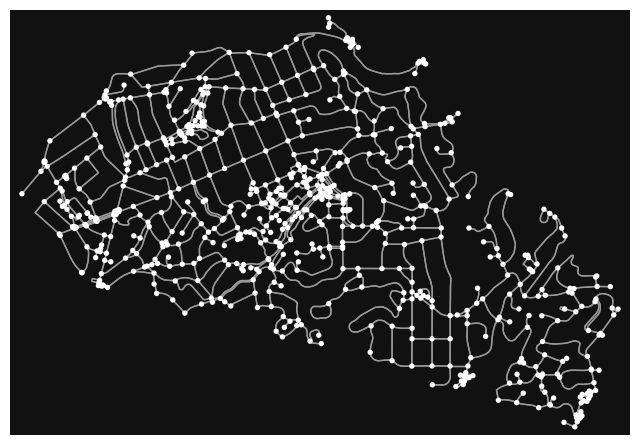

In [17]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Piedmont, California, USA", network_type="walk")
fig, ax = ox.plot_graph(G)

In [18]:
G = ox.graph_from_point((45.70470520949906, -73.63544688115498), network_type='walk')

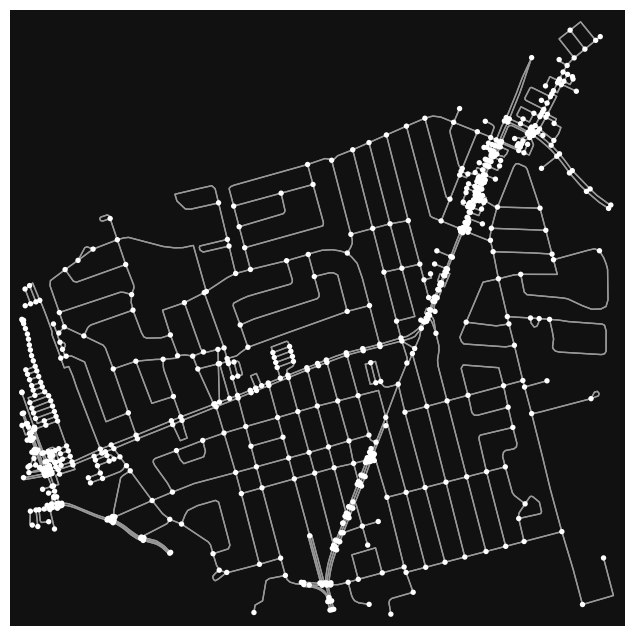

In [19]:
fig, ax = ox.plot_graph(G)

In [20]:
ox.folium.plot_graph_folium(G, )

In [21]:
nodes, edges = ox.utils_graph.graph_to_gdfs(G)

In [22]:
nodes.explore()

In [9]:
edges.explore()

In [10]:
center = [45.503032, -73.566424]

In [11]:
gpd.GeoDataFrame(geometry=[Point(center)], crs='epsg:4326').explore()

In [12]:
# [[p.xy[0][0], p.xy[1][0]] for p in nodes.geometry.to_list()]

In [13]:
source_ = [45.503032, -73.566424]
distance = 500

In [23]:
# # All map calculations here
# # Build the graph
# graph = ox.graph_from_point(source_, network_type='walk', dist=distance + 250)
# nodes, edges = ox.utils_graph.graph_to_gdfs(graph)

# # Get UTM crs for distance based geoprocessing
# utm_crs = nodes.estimate_utm_crs()

# # Construct GeoDataFrames
# source = gpd.GeoDataFrame(geometry=[Point(source_[::-1])], crs='epsg:4326')
# buffer = source.to_crs(utm_crs).buffer(distance).to_crs('epsg:4326')

# # Merge source to graph
# graph_ = gnx.read_geograph_with_coordinates_attributes(graph)
# gnx.spatial_points_merge(graph_, source, inplace=True, discretization_tol=gnx.get_default_discretization_tolerance("epsg:4326"))

# # # Clip
# # nodes = nodes.clip(buffer)
# # edges = edges.clip(buffer)

In [15]:
mp = wkt.loads('MULTIPOINT (-73.5648183 45.5087339, -73.56490936377612 45.508775220560004, -73.56500041428203 45.50881657035281, -73.56509146466493 45.508857920416546, -73.56518251504785 45.508899270480285, -73.56527356543077 45.50894062054402, -73.56536461581368 45.508981970607756, -73.5654556661966 45.509023320671496, -73.56554671657952 45.50906467073523, -73.5656364 45.5091054, -73.5648183 45.5087339, -73.56475222918165 45.508808964285535, -73.56468599786159 45.50888388695109, -73.5646197440232 45.50895878974744, -73.56455349018484 45.50903369254379, -73.56448723634645 45.50910859534013, -73.5644622 45.5091369, -73.5758009 45.5026822, -73.5758777 45.5027206, -73.5582566 45.5057161, -73.55833200127998 45.50578177993575, -73.558339 45.5057877, -73.5582566 45.5057161, -73.558301 45.5056355, -73.5580907 45.5030103, -73.55803185792305 45.50309115548826, -73.5579730158461 45.50317201097651, -73.55791417376916 45.50325286646477, -73.55785533169222 45.50333372195302, -73.55779648961528 45.503414577441276, -73.55773713000873 45.50349505289532, -73.55767759665335 45.50357540076148, -73.55761806329797 45.503655748627644, -73.55755852994258 45.5037360964938, -73.5574989965872 45.50381644435997, -73.5574728 45.5038518, -73.5687475 45.5042528, -73.56882636861152 45.504314279607314, -73.56891407972547 45.50436150711366, -73.56900418990864 45.504404867866526, -73.5690943000918 45.50444822861939, -73.56918441027497 45.50449158937226, -73.56927451882918 45.5045349535101, -73.56936462627992 45.5045783199409, -73.56945473373067 45.50462168637169, -73.5695252 45.5046556, -73.5698009 45.5031778, -73.56987122493162 45.50310670566835, -73.56994154986324 45.5030356113367, -73.57001187479486 45.502964517005054, -73.57008219972649 45.5028934226734, -73.5701525246581 45.50282232834175, -73.57022284958971 45.5027512340101, -73.57029317452134 45.50268013967845, -73.57036349945295 45.5026090453468, -73.57043382438457 45.50253795101515, -73.57050414931619 45.5024668566835, -73.5705744742478 45.502395762351846, -73.57064480571212 45.50232467448305, -73.57071513894242 45.502253588361256, -73.57078547015742 45.50218250024554, -73.57085580137242 45.50211141212982, -73.5709221 45.5020444, -73.5710946 45.5018649, -73.5711654797077 45.5017943587569, -73.57123637490483 45.50172383308054, -73.57130727010194 45.50165330740418, -73.57137816529905 45.50158278172782, -73.57144906049618 45.50151225605146, -73.57151995569329 45.501441730375106, -73.571561 45.5014009, -73.5710946 45.5018649, -73.57100431857003 45.501821896937265, -73.57091403714007 45.50177889387454, -73.57082375571012 45.5017358908118, -73.57073347428016 45.501692887749066, -73.5706431928502 45.50164988468634, -73.57055291142024 45.5016068816236, -73.57046262999027 45.501563878560866, -73.57037234831803 45.50152087601341, -73.57028164165631 45.50147877730181, -73.5702651 45.5014711, -73.5710946 45.5018649, -73.5711843861703 45.501908927759686, -73.57127408359808 45.50195313566817, -73.57136371000347 45.501997487753336, -73.57145333640884 45.502041839838505, -73.57154296281422 45.50208619192368, -73.5716325892196 45.50213054400885, -73.57172221562497 45.50217489609402, -73.57181184203036 45.50221924817919, -73.57190146843574 45.50226360026436, -73.57199109484111 45.502307952349526, -73.5720698 45.5023469, -73.5710946 45.5018649, -73.57102628295915 45.501937925899036, -73.57095656782494 45.50200960729467, -73.5709221 45.5020444, -73.5677493 45.5053748, -73.5676948 45.5054375, -73.5688688 45.5072278, -73.5689234 45.5071697, -73.561255 45.5093357, -73.56132027313991 45.50925994105857, -73.56138554627982 45.509184182117146, -73.56145081941973 45.50910842317572, -73.56151609255964 45.5090326642343, -73.56158136569957 45.50895690529287, -73.561607 45.5089272, -73.5646038 45.505187, -73.56466685073568 45.50510938167284, -73.56472990674936 45.50503176763328, -73.56479296276305 45.50495415359371, -73.56485601877674 45.50487653955414, -73.56491907479042 45.50479892551458, -73.56498213080411 45.50472131147501, -73.5650451868178 45.50464369743544, -73.56510824283149 45.50456608339587, -73.56517129884517 45.50448846935631, -73.56523435485886 45.50441085531674, -73.56529741087255 45.50433324127717, -73.56536046688623 45.50425562723761, -73.5653782 45.5042338, -73.5626974 45.5042779, -73.56260681165554 45.50423554729233, -73.56251622331106 45.504193194584666, -73.5624256349666 45.50415084187699, -73.56233504662214 45.504108489169326, -73.56224445827768 45.50406613646166, -73.5621538699332 45.50402378375399, -73.56206328158873 45.50398143104633, -73.56197269324427 45.503939078338654, -73.56188210489981 45.50389672563099, -73.5618382 45.5038751, -73.5722728 45.4965721, -73.57218263300116 45.49652885751718, -73.5721623 45.4965191, -73.5715574 45.4973418, -73.57164871516551 45.49738256199855, -73.5716907 45.4974013, -73.5689811 45.5000823, -73.5688905006671 45.500039970803485, -73.56879973342346 45.499998003027954, -73.56870895211875 45.49995606551832, -73.56861897244305 45.49991244986632, -73.56852930168056 45.499868187530716, -73.56843963091805 45.49982392519511, -73.56834996015556 45.4997796628595, -73.56826028939305 45.499735400523896, -73.56817061863056 45.4996911381883, -73.56808094786807 45.49964687585269, -73.56799100505206 45.499603169896105, -73.5679010060563 45.49955957883322, -73.56781100706056 45.49951598777034, -73.56781 45.4995155, -73.5689811 45.5000823, -73.56904949714234 45.50000934911982, -73.5691168203534 45.49993540756642, -73.5691829 45.4998626, -73.5663404 45.5030354, -73.56624477949221 45.503006130437775, -73.5661942 45.5029906, -73.5663404 45.5030354, -73.56639276829485 45.50295020868325, -73.5664044 45.5029313, -73.5653782 45.5042338, -73.56544200319635 45.50415679901432, -73.56550583087711 45.50407981832084, -73.56556965855789 45.50400283762737, -73.56563348623865 45.50392585693389, -73.56569731391943 45.50384887624042, -73.56576114160019 45.50377189554694, -73.56582496928095 45.50369491485347, -73.56588792246798 45.50361722191503, -73.5658889 45.503616, -73.5653782 45.5042338, -73.56531514398631 45.50431141403957, -73.56525208797262 45.50438902807913, -73.56518903195894 45.5044666421187, -73.56512597594525 45.50454425615827, -73.56506291993156 45.50462187019784, -73.56499986391788 45.5046994842374, -73.56493680790419 45.50477709827697, -73.5648737518905 45.504854712316536, -73.56481069587682 45.5049323263561, -73.56474763986313 45.50500994039567, -73.56468458384944 45.505087554435235, -73.56462153097225 45.50516517102273, -73.5646038 45.505187, -73.5638904 45.5061282, -73.56379955113667 45.50608640906251, -73.56370868421492 45.50604465738551, -73.56361781729318 45.506002905708506, -73.56352695037143 45.5059611540315, -73.56343608575013 45.50591939734874, -73.56334522425553 45.505877633862326, -73.56325436276092 45.50583587037591, -73.5631635012663 45.505794106889496, -73.5630726397717 45.505752343403074, -73.56298177827709 45.50571057991666, -73.56289091678248 45.505668816430244, -73.56280005528788 45.50562705294383, -73.56270919379327 45.505585289457414, -73.56261833229865 45.505543525971, -73.56252747080406 45.50550176248458, -73.56243660930944 45.50545999899816, -73.56234574781483 45.50541823551175, -73.56225488632023 45.50537647202533, -73.56216402482562 45.50533470853892, -73.56207316333101 45.505292945052496, -73.5619843 45.5052521, -73.5638904 45.5061282, -73.5639506098417 45.50604835782142, -73.56401078661042 45.50596849070363, -73.56407096337915 45.50588862358583, -73.5641311401479 45.505808756468035, -73.56419131691662 45.50572888935024, -73.5642057 45.5057098, -73.5611036 45.50927, -73.56116898917351 45.50919434118699, -73.56123437834704 45.50911868237397, -73.56129976752055 45.50904302356096, -73.56136515669407 45.508967364747946, -73.56143054586758 45.508891705934936, -73.5614566 45.5088584, -73.5647756 45.5052808, -73.56486592299721 45.5053237156835, -73.56495622563337 45.505366674197255, -73.56504652826952 45.505409632711, -73.56513683090569 45.50545259122475, -73.56522713354184 45.505495549738505, -73.56531743617799 45.50553850825226, -73.56540773881414 45.50558146676601, -73.5654980414503 45.50562442527976, -73.56558834408645 45.50566738379351, -73.5656786467226 45.50571034230726, -73.56576894935876 45.50575330082101, -73.56585925199491 45.505796259334765, -73.56594955463106 45.50583921784852, -73.56603985726721 45.50588217636227, -73.56613015990337 45.505925134876016, -73.56622046253952 45.50596809338977, -73.56631076517567 45.50601105190352, -73.56640106781182 45.50605401041727, -73.5664454 45.5060751, -73.5647756 45.5052808, -73.5648381456563 45.505202774101235, -73.56490069131259 45.50512474820246, -73.5649632369689 45.505046722303696, -73.56502578262518 45.50496869640492, -73.56508832828148 45.50489067050616, -73.56515087393777 45.50481264460739, -73.56521341959407 45.50473461870862, -73.56527596525036 45.50465659280985, -73.56533851090666 45.50457856691108, -73.56540105656295 45.50450054101231, -73.56546360221924 45.504422515113546, -73.56552614093634 45.504344483653924, -73.5655488 45.5043162, -73.5647756 45.5052808, -73.56471400054363 45.50535957503991, -73.564652410429 45.50543835738425, -73.56459082031436 45.50551713972859, -73.56452923019974 45.50559592207293, -73.56446764008511 45.505674704417274, -73.56440604997049 45.50575348676161, -73.56434437052692 45.50583219903357, -73.56428252138494 45.50591077818879, -73.56422067224295 45.505989357344006, -73.56415882310097 45.50606793649923, -73.56409697395897 45.50614651565445, -73.5640559 45.5061987, -73.5640559 45.5061987, -73.56398800998423 45.50627210502805, -73.56391924739923 45.50634471154914, -73.56385048481422 45.50641731807023, -73.56378172222922 45.506489924591314, -73.56371295964423 45.5065625311124, -73.56364419705923 45.50663513763349, -73.56357543447423 45.506707744154575, -73.56350667188924 45.50678035067566, -73.56343790930424 45.50685295719675, -73.5633747 45.5069197, -73.5640559 45.5061987, -73.56411774914199 45.50612012084478, -73.56417959828399 45.506041541689555, -73.56424144742597 45.50596296253434, -73.56430329656796 45.50588438337912, -73.56436514570994 45.5058058042239, -73.56442673814597 45.50572702370053, -73.56448832826061 45.50564824135619, -73.56454991837523 45.50556945901185, -73.56461150848986 45.505490676667506, -73.5646730986045 45.50541189432317, -73.56473468911054 45.50533311228488, -73.5647756 45.5052808, -73.5655488 45.5043162, -73.56563912437777 45.50435911278094, -73.56572944167519 45.504402040461834, -73.56581975897261 45.504444968142735, -73.56591007627003 45.50448789582363, -73.56600039356744 45.504530823504524, -73.56609071086486 45.504573751185426, -73.56618102816228 45.50461667886632, -73.5662713454597 45.504659606547214, -73.56636166275712 45.504702534228116, -73.56645198005452 45.50474546190901, -73.56654229735194 45.504788389589905, -73.56663261464936 45.504831317270806, -73.56672293194679 45.5048742449517, -73.5668132492442 45.504917172632595, -73.56690356654161 45.5049601003135, -73.56699388383903 45.50500302799439, -73.56708420113645 45.505045955675286, -73.56717451843387 45.50508888335619, -73.5672261 45.5051134, -73.5655488 45.5043162, -73.56548626928841 45.50439423787498, -73.56542372363211 45.50447226377375, -73.56536117797582 45.50455028967252, -73.56529863231953 45.50462831557129, -73.56523608666323 45.50470634147006, -73.56517354100694 45.50478436736883, -73.56511099535064 45.504862393267594, -73.56504844969434 45.50494041916637, -73.56498590403805 45.50501844506513, -73.56492335838176 45.505096470963906, -73.56486081272546 45.50517449686267, -73.56479826706916 45.50525252276144, -73.5647756 45.5052808, -73.5655488 45.5043162, -73.56561105684273 45.504237943463316, -73.56567331368545 45.50415968692663, -73.56573557052818 45.504081430389945, -73.5657978273709 45.50400317385326, -73.56586008421363 45.503924917316574, -73.56592234105636 45.50384666077989, -73.56598459789909 45.50376840424321, -73.56604685474181 45.50369014770652, -73.56610911158454 45.50361189116984, -73.56617136842726 45.50353363463316, -73.56623362526999 45.50345537809647, -73.56629588211271 45.50337712155979, -73.56635813895544 45.503298865023105, -73.56640971971044 45.50321322655987, -73.5664299 45.5031794, -73.5664932 45.5030732, -73.56656791745145 45.503139662789955, -73.5666083 45.5031624, -73.5664932 45.5030732, -73.56659313088392 45.503069482971654, -73.5666531 45.5030827, -73.5664932 45.5030732, -73.56644200711582 45.50315910277642, -73.5664299 45.5031794, -73.5691112 45.5001442, -73.56904287593174 45.500217219324135, -73.56897445510074 45.500290147950025, -73.56890600449738 45.50036304866949, -73.56883755389401 45.50043594938896, -73.56876910329065 45.500508850108424, -73.56870065268728 45.50058175082789, -73.56863220208392 45.50065465154736, -73.5685715 45.5007193, -73.5691112 45.5001442, -73.56920077266888 45.50018866049124, -73.56929042633068 45.500232957454166, -73.5693800799925 45.50027725441709, -73.56946980152956 45.50032141277169, -73.56955976671865 45.50036507356364, -73.56964973190773 45.50040873435559, -73.56973969709681 45.50045239514753, -73.5698296622859 45.50049605593948, -73.56991962747497 45.50053971673143, -73.57000959266406 45.50058337752338, -73.57009955785314 45.50062703831532, -73.57018952304222 45.50067069910727, -73.57027948823131 45.50071435989922, -73.5703214 45.5007347, -73.5691112 45.5001442, -73.56917877246285 45.50007048458598, -73.5692463449257 45.499996769171965, -73.56931391738856 45.49992305375794, -73.56938148985141 45.49984933834392, -73.56944906231426 45.4997756229299, -73.5695166347771 45.499701907515885, -73.56958420723996 45.499628192101866, -73.56965175669893 45.499554455639775, -73.5696561 45.4995497, -73.5716907 45.4974013, -73.57159938288856 45.497360542360965, -73.5715574 45.4973418, -73.5723978 45.4966348, -73.5724864 45.4966765, -73.5618269 45.5083939, -73.56176232655602 45.5084702562069, -73.56169775311203 45.5085466124138, -73.56163317966805 45.5086229686207, -73.56156860622407 45.5086993248276, -73.5615465 45.5087296, -73.5618269 45.5083939, -73.56189733245392 45.508322912188135, -73.56196776490786 45.50825192437627, -73.56203819736179 45.5081809365644, -73.56210554287873 45.5081070217221, -73.56217268754871 45.508032916436896, -73.56223983221868 45.5079588111517, -73.56230697688866 45.50788470586651, -73.56237412155863 45.507810600581315, -73.5624412662286 45.50773649529612, -73.5624544 45.507722, -73.5619824 45.5084706, -73.56204865092312 45.508395694625115, -73.56211490184623 45.50832078925023, -73.56218115276934 45.50824588387534, -73.56224740369245 45.50817097850045, -73.56231365461556 45.508096073125564, -73.56237990553866 45.50802116775068, -73.56244615646177 45.50794626237579, -73.56251240738489 45.5078713570009, -73.5625791 45.5077975, -73.5754604 45.5002308, -73.57537082903137 45.500186336065404, -73.575348 45.500175, -73.574682 45.5008984, -73.57459252218064 45.500853754658245, -73.5745765 45.5008456, -73.574682 45.5008984, -73.5746311 45.5009514, -73.574682 45.5008984, -73.57475640214139 45.50083158476562, -73.5747655 45.5008238, -73.5710519 45.5046512, -73.57096279078644 45.50460608658288, -73.5709601 45.5046049, -73.5706596 45.5052001, -73.5705698001434 45.50515610389016, -73.570561 45.5051519, -73.5668027 45.4968923, -73.56684786300526 45.49680307950167, -73.566851 45.4967969, -73.5668027 45.4968923, -73.56671417955414 45.49684579202341, -73.5667007 45.496839, -73.5668027 45.4968923, -73.5668936119056 45.49685064637318, -73.566946 45.4968267, -73.5668027 45.4968923, -73.56672635882133 45.49695689120962, -73.5667014 45.496978, -73.5651977 45.4982305, -73.5652868846531 45.49827573381091, -73.56537606930623 45.498320967621815, -73.56546525426438 45.49836620083127, -73.56555444003916 45.498411432430586, -73.56564362581393 45.4984566640299, -73.56573281158872 45.49850189562922, -73.5658219973635 45.498547127228534, -73.56591118313828 45.49859235882785, -73.5659367 45.4986053, -73.5635034 45.4995899, -73.5635863144377 45.49964580345268, -73.56366922887538 45.49970170690536, -73.56375214331308 45.499757610358046, -73.56383505775078 45.499813513810736, -73.56391797218846 45.49986941726342, -73.56400088662616 45.4999253207161, -73.56408380106386 45.499981224168785, -73.56416671550154 45.50003712762147, -73.56424962993924 45.50009303107415, -73.56433254437694 45.500148934526834, -73.56441545881462 45.500204837979524, -73.56449837325232 45.50026074143221, -73.56458352444486 45.50031306917146, -73.5646278 45.5003387, -73.5635034 45.4995899, -73.56358176107148 45.49952777478388, -73.56366012214295 45.49946564956776, -73.56373848321442 45.49940352435164, -73.5638168442859 45.499341399135524, -73.56389476717098 45.499278725224066, -73.56397268578905 45.49921604596946, -73.56405060440713 45.49915336671486, -73.5641285230252 45.49909068746025, -73.56420644164326 45.49902800820565, -73.56428436026134 45.498965328951044, -73.56436227887941 45.49890264969644, -73.56444019749749 45.49883997044183, -73.56451811611555 45.498777291187224, -73.56459603473363 45.49871461193262, -73.56467394595371 45.49865192348366, -73.56475184909826 45.49858922499828, -73.5647776 45.4985685, -73.5635034 45.4995899, -73.56342163435723 45.499532329350686, -73.56333986871446 45.499474758701375, -73.56325810307169 45.49941718805206, -73.56317633742891 45.499359617402746, -73.56309457178615 45.499302046753435, -73.56301280614338 45.499244476104124, -73.5629310405006 45.49918690545481, -73.56284927485784 45.499129334805495, -73.56276751276096 45.4990717591207, -73.56268575400647 45.49901417868946, -73.5626598 45.4989959, -73.5633661 45.4996899, -73.56344851519682 45.499746536872536, -73.56353093039367 45.49980317374507, -73.5636133455905 45.49985981061761, -73.56369576078734 45.49991644749014, -73.56377817598417 45.49997308436268, -73.56386059118101 45.500029721235215, -73.56394300637784 45.500086358107744, -73.56402542157468 45.50014299498028, -73.56410783677151 45.500199631852816, -73.56419025196836 45.50025626872535, -73.56427266716518 45.50031290559789, -73.56435508236203 45.50036954247042, -73.56443806516414 45.50042533650855, -73.5644762 45.5004505, -73.5633661 45.4996899, -73.56328355767002 45.49963344857165, -73.56320101534004 45.49957699714331, -73.56311847301008 45.49952054571496, -73.5630359306801 45.49946409428661, -73.56295338835012 45.499407642858266, -73.56287084602015 45.499351191429916, -73.56278830369018 45.49929474000157, -73.5627057613602 45.499238288573224, -73.56262274139785 45.49918259293169, -73.56253632665778 45.49913226905365, -73.5625314 45.4991294, -73.5633661 45.4996899, -73.56329490733006 45.49976012537823, -73.56322371466013 45.49983035075646, -73.5631684 45.4998877, -73.5642373 45.4973635, -73.56414702201118 45.49732048971363, -73.56405674402235 45.497277479427254, -73.56396646603353 45.497234469140885, -73.5638761880447 45.497191458854516, -73.56378591005588 45.49714844856814, -73.56369563206705 45.49710543828177, -73.56360535407823 45.497062427995395, -73.5635150760894 45.497019417709026, -73.56342479810058 45.49697640742266, -73.56333434164792 45.49693377727411, -73.56324210060971 45.49689627327764, -73.56314323091199 45.4968853, -73.56305181653914 45.496921850286135, -73.56298300624337 45.496994331853585, -73.56291391503694 45.497066625734334, -73.56284482383052 45.497138919615075, -73.56277573262408 45.497211213495824, -73.56270664141765 45.49728350737657, -73.5626375502112 45.49735580125732, -73.5625912 45.4974043, -73.5612252 45.5004209, -73.56129620715502 45.500350487047115, -73.56136718832124 45.500280047916576, -73.561438113511 45.500209552402836, -73.56150903870078 45.5001390568891, -73.56157996389054 45.50006856137536, -73.56165090020163 45.49999807705288, -73.56172183885437 45.49992759508676, -73.56179295340026 45.499857290671535, -73.56186409769136 45.49978701628186, -73.56193524198245 45.499716741892186, -73.56200638627355 45.49964646750251, -73.56207753056465 45.49957619311284, -73.56214867485575 45.49950591872316, -73.5621556 45.4994964, -73.5593281 45.5026842, -73.55938761114169 45.502603835679466, -73.55944712228337 45.50252347135893, -73.55950663342507 45.502443107038395, -73.55956485745082 45.50236184196994, -73.55961997767011 45.50227840479942, -73.5596750978894 45.502194967628895, -73.559698 45.5021603, -73.5662234 45.5011546, -73.56629765843678 45.5010876247466, -73.56636783724663 45.501016504180456, -73.56643598996378 45.500943324899616, -73.56650414268094 45.50087014561878, -73.5665722953981 45.50079696633794, -73.5665772 45.5007917, -73.5662234 45.5011546, -73.56631262718517 45.50119974985523, -73.56640185437033 45.50124489971046, -73.5664908647903 45.50129045647412, -73.56657811464694 45.50133931814125, -73.5666653645036 45.50138817980837, -73.56675261436025 45.5014370414755, -73.5668398642169 45.50148590314262, -73.56692711407355 45.50153476480975, -73.56701436393021 45.50158362647687, -73.56710161378686 45.501632488144, -73.56718886364351 45.50168134981113, -73.56727611350016 45.501730211478254, -73.5672802 45.5017325, -73.5662234 45.5011546, -73.56613513233006 45.5011076019315, -73.56604630335848 45.501061700960754, -73.56595654496246 45.50101761660587, -73.56586678656645 45.50097353225099, -73.56577702817044 45.50092944789611, -73.56568726977443 45.50088536354123, -73.56559751137841 45.500841279186346, -73.5655077529824 45.50079719483146, -73.56541759905852 45.50075393197487, -73.5653281 45.5007117, -73.5653281 45.5007117, -73.56541853713927 45.5007543746276, -73.56550868402272 45.500797652106925, -73.56559844241873 45.50084173646181, -73.56568820081475 45.50088582081669, -73.56577795921076 45.50092990517157, -73.56586771760676 45.50097398952645, -73.56595747600278 45.50101807388133, -73.5660472343988 45.501062158236216, -73.56613604790746 45.50110808943015, -73.5662234 45.5011546, -73.5653281 45.5007117, -73.5652371570911 45.50067011409708, -73.56514650755854 45.50062794087742, -73.56505863638088 45.50058020560601, -73.56497076520321 45.50053247033461, -73.56488289402554 45.50048473506321, -73.56479572325159 45.50043575010632, -73.56470914295006 45.50038571160726, -73.5646278 45.5003387, -73.5651992 45.5008866, -73.5651377210493 45.50096546912337, -73.5650762420986 45.50104433824674, -73.5650147631479 45.501123207370114, -73.5649532841972 45.501202076493485, -73.56489180524652 45.501280945616855, -73.56483032629582 45.501359814740226, -73.56476884734512 45.5014386838636, -73.56470736839442 45.50151755298697, -73.56464588944372 45.50159642211034, -73.56458621482743 45.501676592816736, -73.56453076804418 45.5017598133324, -73.56447532126093 45.50184303384806, -73.56441987447768 45.501926254363724, -73.56436442769443 45.50200947487939, -73.56430898091118 45.50209269539505, -73.56425353412793 45.50217591591071, -73.5642173 45.5022303, -73.5651992 45.5008866, -73.56511210773571 45.50083745798639, -73.56502501547142 45.500788315972784, -73.56493792320714 45.50073917395917, -73.56485083094286 45.50069003194556, -73.56476404866507 45.50064038254313, -73.56468057471788 45.50058531803424, -73.56459710077068 45.50053025352534, -73.5645136268235 45.50047518901645, -73.5644762 45.5004505, -73.5660232 45.5013279, -73.56595098358058 45.501397072167556, -73.56588102338478 45.50146850947085, -73.56581156706288 45.50154045263834, -73.56574211074098 45.50161239580582, -73.56567265441907 45.501684338973305, -73.56560319809718 45.501756282140796, -73.56553374177528 45.50182822530828, -73.5655021 45.501861, -73.5660232 45.5013279, -73.56611301693684 45.50137186496171, -73.56620283387366 45.501415829923424, -73.5662926508105 45.501459794885136, -73.56638246774733 45.50150375984685, -73.56647228468415 45.50154772480856, -73.56656210162099 45.50159168977027, -73.56665191855782 45.501635654731984, -73.56674173549465 45.5016796196937, -73.56683155243148 45.50172358465541, -73.56692136936832 45.50176754961712, -73.56701118630514 45.50181151457883, -73.56710100324197 45.501855479540545, -73.5671462 45.5018776, -73.5619843 45.5052521, -73.56191786543188 45.50532684254583, -73.56185143086374 45.50540158509166, -73.56178499629561 45.50547632763749, -73.561743 45.5055238, -73.5619843 45.5052521, -73.56207516149462 45.505293863486415, -73.56216602298922 45.50533562697283, -73.56225688448383 45.50537739045925, -73.56234774597844 45.50541915394567, -73.56243860747304 45.50546091743208, -73.56252946896765 45.5055026809185, -73.56262033046227 45.50554444440491, -73.56271119195686 45.50558620789133, -73.56280205345148 45.50562797137775, -73.56289291494609 45.50566973486416, -73.56298377644069 45.50571149835058, -73.5630746379353 45.50575326183699, -73.56316549942991 45.50579502532341, -73.56325636092451 45.50583678880982, -73.56334722241913 45.505878552296245, -73.56343808391374 45.50592031578266, -73.56352894865438 45.50596207220572, -73.56361981557612 45.50600382388272, -73.56371068249787 45.506045575559725, -73.56380154941961 45.50608732723673, -73.5638904 45.5061282, -73.5668362 45.5025843, -73.5667971 45.50264, -73.5655021 45.501861, -73.5655715563219 45.501789056832514, -73.56564101264381 45.50171711366502, -73.5657104689657 45.50164517049754, -73.56577992528761 45.501573227330056, -73.56584938160951 45.501501284162565, -73.5659188379314 45.50142934099508, -73.56599030082464 45.50135941232489, -73.5660232 45.5013279, -73.572618 45.5061262, -73.57252756604235 45.506083518720494, -73.57251 45.5060752, -73.5642173 45.5022303, -73.56427274678325 45.50214707948434, -73.5643281935665 45.502063858968675, -73.56438364034975 45.50198063845301, -73.564439087133 45.50189741793735, -73.56449453391625 45.50181419742169, -73.5645499806995 45.501730976906025, -73.5646057133319 45.501647962591825, -73.5646671922826 45.501569093468454, -73.56472867123328 45.50149022434509, -73.56479015018398 45.50141135522172, -73.56485162913468 45.50133248609835, -73.56491310808538 45.50125361697498, -73.56497458703608 45.50117474785161, -73.56503606598677 45.501095878728236, -73.56509754493747 45.501017009604865, -73.56515902388817 45.500938140481495, -73.5651992 45.5008866, -73.5642173 45.5022303, -73.5641186311306 45.502214037951774, -73.56401996226121 45.50219777590354, -73.56392129339181 45.50218151385531, -73.56382262452242 45.50216525180708, -73.56372556988453 45.50214163637893, -73.56362916201128 45.50211507471528, -73.56353275413804 45.50208851305162, -73.56343688965914 45.50206013592936, -73.56334174250273 45.50202936226161, -73.56324659534631 45.50199858859386, -73.5632355 45.501995, -73.5642173 45.5022303, -73.56431457874133 45.502253469947846, -73.56441185748268 45.5022766398957, -73.56450913644288 45.50229980892464, -73.56460641548951 45.50232297759066, -73.56470369453615 45.50234614625668, -73.56480097358279 45.502369314922696, -73.56489825262943 45.502392483588714, -73.5649697 45.5024095, -73.5616955 45.5055751, -73.56171061759466 45.50567395068706, -73.5617257351893 45.50577280137412, -73.56174085278396 45.505871652061174, -73.56168435460609 45.50594760537227, -73.56161469333455 45.506019350109, -73.56154503206301 45.50609109484572, -73.56147537079148 45.50616283958245, -73.561459 45.5061797, -73.5616955 45.5055751, -73.5616126641971 45.505521558468516, -73.56152278503447 45.505477724199544, -73.56143283663211 45.505434028834664, -73.56134288822973 45.50539033346979, -73.56125293982737 45.50534663810491, -73.56116270470505 45.50530355208664, -73.56107169970677 45.50526210223398, -73.5609803788749 45.50522136876948, -73.5609767 45.5052198, -73.5613991 45.5062439, -73.5613069316999 45.50620510561308, -73.5612147633998 45.506166311226146, -73.5611225950997 45.50612751683922, -73.5610304267996 45.5060887224523, -73.5609382584995 45.50604992806537, -73.56084653474622 45.506010096540585, -73.56075488176778 45.505970099896416, -73.56066322878935 45.505930103252254, -73.56057157581091 45.505890106608085, -73.56047992283249 45.50585010996392, -73.5604653 45.5058438, -73.5576486 45.5088267, -73.5575949100267 45.50891102177071, -73.55754970527205 45.50900014289652, -73.55750603080158 45.509090099540956, -73.55746141272029 45.50917959382469, -73.55741679463898 45.509269088108425, -73.5573956 45.5093116, -73.558242 45.5079868, -73.55830840540955 45.50791203155336, -73.55837548224561 45.50783786850098, -73.55844299133994 45.50776409504924, -73.55851280297568 45.50769249876741, -73.55858256860765 45.507620855794855, -73.558626 45.507575, -73.558242 45.5079868, -73.55818210650263 45.508066860005506, -73.5581248581647 45.50814884867059, -73.55806665106401 45.50823015115008, -73.5580086258654 45.50831158591657, -73.55795148081188 45.50839364956784, -73.5579449 45.5084031, -73.558242 45.5079868, -73.55833525106382 45.508022889971215, -73.5583578 45.5080324, -73.5707675 45.5009485, -73.57069820370378 45.50102059731847, -73.57062890740757 45.501092694636945, -73.57055961111136 45.50116479195542, -73.57049031481515 45.50123688927389, -73.57042101851893 45.50130898659236, -73.57035172222271 45.501381083910836, -73.570337 45.5013963, -73.5707675 45.5009485, -73.57067681653388 45.500906351346735, -73.57058613306776 45.500864202693464, -73.57049608317035 45.50082073014997, -73.57040637267325 45.50077654840364, -73.5703214 45.5007347, -73.562568 45.4978256, -73.56264289825877 45.497759341032065, -73.56272561846791 45.49770409527096, -73.56281401247311 45.49765751182964, -73.56290538841174 45.49761694382459, -73.5630015147605 45.49758938071383, -73.56309853838509 45.497566275172964, -73.56319784263823 45.497554499549516, -73.5632974091404 45.49754761023474, -73.56339740331642 45.49754868947737, -73.56349708806299 45.497553422307654, -73.56359583949778 45.49756917521623, -73.56369375182196 45.49758923698841, -73.56379119813533 45.497611691743145, -73.5638886444487 45.49763414649789, -73.5639505 45.4976484, -73.5628148 45.4968972, -73.56289233352763 45.4968340450153, -73.56296986705526 45.4967708900306, -73.56304939851162 45.496710509617024, -73.56313387833582 45.49665700111954, -73.56322502191611 45.49661634055457, -73.56331742416532 45.49657810674305, -73.56341457100706 45.49655802439288, -73.56351386364959 45.4965461512661, -73.56361315629212 45.49653427813933, -73.56371277123215 45.49654124321678, -73.56381241191319 45.496549712849664, -73.56391183698892 45.49655940214087, -73.56400834264413 45.49658560631067, -73.56410484829932 45.496611810480466, -73.5642013 45.496638, -73.5628148 45.4968972, -73.56287298908349 45.49681587330965, -73.56293117816698 45.49673454661931, -73.56298415282488 45.4966503685165, -73.56302122286081 45.49655749326449, -73.5630365452682 45.49645867947973, -73.56302384612104 45.496360247440315, -73.563018 45.4963284, -73.5642013 45.496638, -73.5641047943448 45.4966117958302, -73.56400828868959 45.4965855916604, -73.5639117830344 45.4965593874906, -73.56381235620593 45.49654970811445, -73.56371271552489 45.49654123848157, -73.56361310077943 45.496534284777375, -73.56351380813692 45.49654615790415, -73.56341451549439 45.49655803103093, -73.56331737250493 45.49657812811887, -73.56322497025573 45.49661636193038, -73.56313383110472 45.49665703103514, -73.56304935128053 45.496710539532636, -73.5629698237077 45.496770925339376, -73.56289229018007 45.49683408032408, -73.5628148 45.4968972, -73.5642013 45.496638, -73.56429054564016 45.496683069519264, -73.5643791624352 45.496729405937295, -73.56446777923024 45.496775742355325, -73.5645563960253 45.49682207877336, -73.5645769 45.4968328, -73.56781 45.4995155, -73.56774055444036 45.49958745355619, -73.56767108036992 45.49965937958238, -73.56760160101763 45.49973130050844, -73.56753212166534 45.4998032214345, -73.56746264231305 45.49987514236056, -73.56739316296076 45.49994706328662, -73.56732368360846 45.50001898421267, -73.56725420425617 45.500090905138734, -73.56718472490388 45.500162826064795, -73.56711524555159 45.500234746990856, -73.5670457661993 45.50030666791691, -73.56697628684701 45.50037858884297, -73.56690680749472 45.50045050976903, -73.56683732814243 45.50052243069509, -73.56676784879014 45.500594351621146, -73.56669836943784 45.50066627254721, -73.56662889008555 45.50073819347327, -73.5665772 45.5007917, -73.56781 45.4995155, -73.56789999899574 45.499559091062885, -73.5679899979915 45.499602682125776, -73.56807994448033 45.49964638057102, -73.56816961524282 45.49969064290663, -73.56825928600533 45.499734905242235, -73.56834895676782 45.49977916757784, -73.56843862753031 45.49982342991345, -73.56852829829282 45.49986769224905, -73.56861796905531 45.499911954584654, -73.56870793630439 45.49995559625073, -73.56879871760911 45.499997533760364, -73.56888948688895 45.50003949715304, -73.56898008622186 45.50008182634956, -73.5689811 45.5000823, -73.56781 45.4995155, -73.56772084007974 45.49947021745788, -73.5676316801595 45.49942493491577, -73.56754163405184 45.49938145328352, -73.56745135781813 45.49933843931335, -73.56736108158444 45.49929542534317, -73.56727080535074 45.499252411373, -73.56718052911705 45.49920939740283, -73.56709016508246 45.49916657116069, -73.56699928133258 45.49912485612732, -73.56690839758272 45.499083141093934, -73.5668192 45.4990422, -73.5665772 45.5007917, -73.56650904728284 45.50086487928084, -73.56644089456569 45.50093805856168, -73.56637274184853 45.50101123784252, -73.56630300243604 45.50108280488074, -73.56622874399926 45.501149780134135, -73.5662234 45.5011546, -73.5665772 45.5007917, -73.56664667935229 45.50071977907394, -73.56671615870458 45.50064785814788, -73.56678563805687 45.500575937221825, -73.56685511740916 45.500504016295764, -73.56692459676145 45.5004320953697, -73.56699407611374 45.50036017444364, -73.56706355546604 45.50028825351759, -73.56713303481833 45.50021633259153, -73.56720251417062 45.50014441166547, -73.56727199352291 45.500072490739406, -73.5673414728752 45.50000056981335, -73.56741095222749 45.49992864888729, -73.56748043157978 45.49985672796123, -73.56754991093207 45.49978480703517, -73.56761939028436 45.499712886109116, -73.56768886963665 45.499640965183055, -73.56775833505495 45.49956903080235, -73.56781 45.4995155, -73.5665772 45.5007917, -73.56666766438512 45.50083431683969, -73.56675812877023 45.50087693367938, -73.56684859315536 45.50091955051907, -73.56693905754047 45.500962167358765, -73.56702952192559 45.50100478419846, -73.5671199896663 45.501047393894346, -73.5671247 45.5010496, -73.5649697 45.5024095, -73.56487242095336 45.50238633133398, -73.56477514190674 45.50236316266796, -73.5646778628601 45.50233999400194, -73.56458058381345 45.502316825335924, -73.56448330476681 45.5022936566699, -73.56438602588769 45.50227048730058, -73.56428874714635 45.50224731735273, -73.5642173 45.5022303, -73.5702839 45.505699, -73.57034403570015 45.50561910196405, -73.57040419942444 45.505539225019454, -73.57046436314874 45.50545934807485, -73.57052452687304 45.505379471130254, -73.57058469059734 45.50529959418565, -73.5706173 45.5052563, -73.5702839 45.505699, -73.57021479181628 45.50577127765175, -73.57014567475743 45.505843546815655, -73.57007655039746 45.50591580899704, -73.57000742603749 45.50598807117842, -73.56993830167751 45.50606033335981, -73.56986917731754 45.506132595541196, -73.56980005295758 45.50620485772258, -73.56973092859761 45.50627711990397, -73.56966180423763 45.506349382085354, -73.56959267987766 45.50642164426674, -73.56952355551769 45.50649390644812, -73.56945443115772 45.50656616862951, -73.56938757635587 45.50664050989789, -73.56932163462037 45.506715687604164, -73.56925569288488 45.50679086531043, -73.56918975114938 45.5068660430167, -73.5691238094139 45.50694122072297, -73.5690578676784 45.50701639842924, -73.56899192594291 45.507091576135515, -73.56892598420741 45.50716675384179, -73.5689234 45.5071697, -73.5702839 45.505699, -73.57019555104883 45.50565220345236, -73.57010616826729 45.505607362417976, -73.57001678548576 45.505562521383595, -73.56992740270422 45.50551768034921, -73.56983801992268 45.50547283931483, -73.56974863714115 45.50542799828044, -73.5696592543596 45.50538315724606, -73.56956987157807 45.50533831621168, -73.5695517 45.5053292, -73.5695517 45.5053292, -73.56946228448574 45.50528442427212, -73.56937286897146 45.50523964854424, -73.56928345345719 45.50519487281636, -73.5691940379429 45.50515009708848, -73.56910462242864 45.5051053213606, -73.56901520571478 45.505060548028936, -73.56892577977983 45.50501579311683, -73.56883635384487 45.50497103820473, -73.56874693192945 45.504926275262314, -73.56865751149304 45.50488150936513, -73.56856809105662 45.50483674346795, -73.5684786706202 45.50479197757076, -73.56838925018378 45.504747211673575, -73.5683305 45.5047178, -73.5695517 45.5053292, -73.56964108278154 45.50537404103438, -73.56973046556308 45.50541888206877, -73.56981984834462 45.50546372310315, -73.56990923112616 45.505508564137536, -73.5699986139077 45.505553405171916, -73.57008799668922 45.5055982462063, -73.57017737947076 45.505643087240685, -73.57026613387794 45.505689116859244, -73.5702839 45.505699, -73.5683305 45.5047178, -73.56841992043643 45.50476256589719, -73.56850934087284 45.504807331794375, -73.56859876130926 45.504852097691554, -73.56868818174567 45.50489686358874, -73.5687776021821 45.50494162948593, -73.56886702598345 45.50498638866057, -73.56895645191841 45.50503114357267, -73.56904587547876 45.50507590322815, -73.56913529099303 45.50512067895603, -73.5692247065073 45.50516545468391, -73.56931412202158 45.50521023041179, -73.56940353753585 45.50525500613968, -73.56949295305013 45.505299781867556, -73.5695517 45.5053292, -73.5742149 45.5026164, -73.57414946681321 45.50269202075156, -73.57408403362642 45.50276764150312, -73.57401860043963 45.50284326225468, -73.57395316725284 45.50291888300624, -73.57388773406605 45.502994503757805, -73.57382230087926 45.503070124509364, -73.5737715 45.503126, -73.5702651 45.5014711, -73.57019583195388 45.50154322446039, -73.57012654599919 45.501615331715136, -73.57005725023369 45.50168742953953, -73.56998796095033 45.50175953359774, -73.56991867166697 45.50183163765596, -73.5698869 45.5018647, -73.5702651 45.5014711, -73.57033440301673 45.501399009285244, -73.570337 45.5013963, -73.5702651 45.5014711, -73.57035580666172 45.5015131987116, -73.57044616588107 45.5015560363377, -73.57053644731103 45.50159903940044, -73.57062672874099 45.50164204246317, -73.57071701017094 45.5016850455259, -73.5708072916009 45.50172804858864, -73.57089757303086 45.50177105165137, -73.57098785446082 45.5018140547141, -73.57107813589079 45.50185705777684, -73.5710946 45.5018649, -73.5737415 45.5031643, -73.5738299 45.5032077, -73.5595909 45.5010161, -73.5596853640821 45.50104891062625, -73.55977982816418 45.501081721252504, -73.55987429224628 45.501114531878756, -73.55996875632836 45.501147342505, -73.56006322041046 45.50118015313125, -73.56015768449254 45.5012129637575, -73.56025215483653 45.50124575634289, -73.5602592 45.5012482, -73.5571771 45.5001905, -73.55723663064536 45.500111022915284, -73.55731212200283 45.500045440486616, -73.55738761336028 45.49997985805795, -73.55746310471773 45.49991427562928, -73.55753859607518 45.49984869320061, -73.55761408743263 45.49978311077194, -73.5576301 45.4997692, -73.5589992 45.499885, -73.55891178052396 45.49983644245467, -73.55882245528137 45.49979155314548, -73.55873246634503 45.499747941319825, -73.5586424774087 45.499704329494165, -73.55855248847236 45.49966071766851, -73.55846249953602 45.49961710584285, -73.5583725105997 45.4995734940172, -73.55828252166336 45.49952988219154, -73.55819253272702 45.49948627036588, -73.55810375089014 45.49944050488026, -73.5580481 45.4994048, -73.5589992 45.499885, -73.55908620338879 45.499934278352754, -73.55917531856879 45.49997964887946, -73.5592644337488 45.500025019406166, -73.5593535489288 45.50007038993287, -73.5594426641088 45.50011576045958, -73.55953177928879 45.500161130986285, -73.5596208944688 45.50020650151299, -73.5597100096488 45.5002518720397, -73.5597991248288 45.500297242566404, -73.55988824000879 45.5003426130931, -73.55997735518879 45.50038798361981, -73.5600041 45.5004016, -73.5600041 45.5004016, -73.55991498482 45.50035622947329, -73.55982586964 45.500310858946584, -73.55973675446 45.50026548841988, -73.55964763928 45.50022011789317, -73.5595585241 45.500174747366465, -73.55946940892 45.50012937683976, -73.55938029374 45.50008400631305, -73.55929117856 45.500038635786346, -73.55920206338 45.49999326525965, -73.5591129482 45.49994789473294, -73.5590252450441 45.499899911284786, -73.5589992 45.499885, -73.5576301 45.4997692, -73.55755460864255 45.49983478242867, -73.5574791172851 45.49990036485734, -73.55740362592763 45.49996594728601, -73.55732813457018 45.500031529714676, -73.55725264321273 45.500097112143344, -73.5571886725254 45.500172723933346, -73.5571771 45.5001905, -73.5580481 45.4994048, -73.55813303200388 45.49945743420813, -73.55822302094022 45.499501046033785, -73.55831300987654 45.499544657859445, -73.55840299881288 45.4995882696851, -73.55849298774922 45.49963188151076, -73.55858297668556 45.49967549333641, -73.5586729656219 45.49971910516207, -73.55876295455823 45.49976271698773, -73.55885294349457 45.499806328813385, -73.5589413982051 45.49985289373029, -73.5589992 45.499885, -73.5580481 45.4994048, -73.55812003895986 45.49933533932009, -73.55819197791973 45.49926587864019, -73.5582639168796 45.49919641796028, -73.55833585583946 45.49912695728037, -73.55840779479932 45.499057496600464, -73.5584794876436 45.49898778570254, -73.55855012796678 45.49891700473941, -73.55862076828996 45.49884622377628, -73.55869140861313 45.498775442813155, -73.5587620489363 45.49870466185002, -73.55883268925948 45.49863388088689, -73.55890332958266 45.498563099923764, -73.55897396990584 45.498492318960636, -73.55904461022901 45.49842153799751, -73.55911525055218 45.49835075703437, -73.55918589087537 45.498279976071245, -73.55925653119854 45.49820919510812, -73.55932717152172 45.49813841414499, -73.5593702 45.4980953, -73.557101 45.4989211, -73.55718976599857 45.498967149937904, -73.55727852550461 45.49901321239646, -73.55736728501064 45.49905927485502, -73.55745604451668 45.49910533731357, -73.55754562468893 45.49914977811522, -73.55763530619772 45.49919401867329, -73.55772498770654 45.49923825923137, -73.55781466921533 45.499282499789445, -73.55790435072413 45.49932674034753, -73.5579813 45.4993647, -73.5755089 45.504863, -73.5754427 45.5048493, -73.5755089 45.504863, -73.57560212068346 45.50489863293976, -73.57569083157567 45.50494478895348, -73.57577954246788 45.5049909449672, -73.5757833 45.5049929, -73.5755089 45.504863, -73.57560886256084 45.50486026422378, -73.5757072270216 45.50484659157585, -73.5758015 45.5048212, -73.5608834 45.5051771, -73.5608437 45.5052197, -73.5608834 45.5051771, -73.560917 45.5051353, -73.5642057 45.5057098, -73.56414552323128 45.505789667117796, -73.56408534646253 45.50586953423559, -73.5640251696938 45.505949401353384, -73.56396499292508 45.50602926847118, -73.56390479782576 45.50610912176649, -73.5638904 45.5061282, -73.557639 45.5027564, -73.55755459873706 45.502702767670065, -73.55747019747412 45.502649135340135, -73.55738579621118 45.5025955030102, -73.55730139494824 45.50254187068027, -73.5572169936853 45.50248823835033, -73.55713259242235 45.5024346060204, -73.55704819115941 45.502380973690464, -73.5569713 45.5023303, -73.5569713 45.5023303, -73.55705485675183 45.50238520930543, -73.55713925801479 45.50243884163536, -73.55722365927772 45.5024924739653, -73.55730806054066 45.50254610629523, -73.5573924618036 45.502599738625165, -73.55747686306654 45.502653370955095, -73.55756126432948 45.50270700328503, -73.557639 45.5027564, -73.5571652 45.5021505, -73.5572384981278 45.502082475118804, -73.5573117962556 45.50201445023762, -73.55738510996272 45.50194644214877, -73.55745842959817 45.50187844044984, -73.5575264 45.5018154, -73.5575264 45.5018154, -73.55745308036455 45.501883401698926, -73.5573797607291 45.50195140339786, -73.55730644859112 45.502019413178026, -73.55723315046332 45.50208743805922, -73.5571652 45.5021505, -73.5606721 45.5028737, -73.56060729107713 45.50294985644108, -73.56054248215428 45.503026012882145, -73.5604776732314 45.50310216932322, -73.5604346 45.5031528, -73.57207 45.4996315, -73.57215979835804 45.499675502896416, -73.57224959671608 45.49971950579283, -73.57233939507412 45.49976350868924, -73.57242919343217 45.49980751158566, -73.5725189917902 45.499851514482074, -73.57260879014825 45.49989551737849, -73.5726985885063 45.49993952027491, -73.57278873122723 45.49998280001599, -73.5728794933199 45.500024779088555, -73.5728977 45.5000332, -73.57207 45.4996315, -73.57198008255446 45.499587740986584, -73.5718901812285 45.49954394884584, -73.5718365 45.4995178, -73.5668994 45.5032297, -73.56680002217342 45.50321856233486, -73.56670237943403 45.50320058987195, -73.5666097225119 45.503162977443395, -73.5666083 45.5031624, -73.5668994 45.5032297, -73.56682660942494 45.503161132280326, -73.5667408730112 45.50311377868723, -73.5666531 45.5030827, -73.575348 45.500175, -73.57525770571785 45.50013202392982, -73.57516741143567 45.50008904785964, -73.57507711715351 45.50004607178946, -73.57498682287134 45.50000309571928, -73.57489652858918 45.4999601196491, -73.574806234307 45.49991714357893, -73.57471628133447 45.499873460466056, -73.57462646589508 45.499829492445336, -73.57453665045568 45.49978552442462, -73.57444683501629 45.4997415564039, -73.57435681059171 45.499698019184045, -73.57426668273615 45.499654695176254, -73.57417655488058 45.49961137116846, -73.5741063 45.4995776, -73.575348 45.500175, -73.5754375686626 45.50021946857977, -73.5754604 45.5002308, -73.5573956 45.5093116, -73.55742640654834 45.509216463484506, -73.55745721309668 45.509121326969016, -73.55748801964502 45.509026190453525, -73.55751882619336 45.508931053938035, -73.55755266102133 45.5088369804493, -73.55759082419142 45.5087445542233, -73.5576304613035 45.50865274518591, -73.5576474 45.5086174, -73.5573956 45.5093116, -73.55744021808131 45.50922210571626, -73.5574848361626 45.50913261143253, -73.5575290980089 45.50904294259689, -73.55757247957078 45.50895284242991, -73.55762213233486 45.50886614535902, -73.5576486 45.5088267, -73.5679383 45.4975614, -73.56796877651223 45.49765639492585, -73.5679639770007 45.4977552111011, -73.56791104591413 45.497839334845054, -73.5678953 45.4978581, -73.5679383 45.4975614, -73.56788151436163 45.49748171951538, -73.5678394 45.4974413, -73.5679383 45.4975614, -73.567863396341 45.4976276528631, -73.567788492682 45.49769390572621, -73.56771358902301 45.49776015858931, -73.56763868536402 45.49782641145241, -73.56756378170502 45.49789266431551, -73.56748972611756 45.4979598336552, -73.5674239 45.4980235, -73.5636601 45.5047385, -73.56375055635576 45.50478113387891, -73.56384102784179 45.504823735641956, -73.56393149932784 45.504866337405005, -73.56402197081387 45.50490893916805, -73.5640616 45.5049276, -73.5639505 45.4976484, -73.56385305368663 45.49762594524526, -73.56375560737327 45.497603490490526, -73.56365816105989 45.497581035735784, -73.56355977206026 45.497563421709486, -73.56346087616285 45.49754937454328, -73.56336088198684 45.49754829530065, -73.56326088781083 45.497547216058024, -73.56316157329235 45.49755880041425, -73.5630625324439 45.4975718846039, -73.56296640609513 45.497599447714656, -73.56287194122434 45.4976315593475, -73.56278099087017 45.49767306031297, -73.56269375801315 45.49772195232312, -73.56261554282567 45.497783541097526, -73.562568 45.4978256, -73.5639505 45.4976484, -73.56387767495852 45.497579868887854, -73.56379842799089 45.49752387967257, -73.56370025471442 45.49750485317032, -73.56360208143795 45.49748582666807, -73.56350320029293 45.49747093989156, -73.56340428290673 45.49745626505908, -73.56330438472315 45.497458773264334, -73.56320443998007 45.49746209716695, -73.56310557724782 45.49747590877385, -73.56300698490695 45.49749223788876, -73.5629069877607 45.4974929933617, -73.56280794469208 45.49748268616361, -73.56271035245545 45.49746238215305, -73.56262046342765 45.49741856477429, -73.5625912 45.4974043, -73.559698 45.5021603, -73.55964287978071 45.502243737170524, -73.55958775956141 45.50232717434105, -73.5595313599368 45.50240971615969, -73.5594718487951 45.50249008048022, -73.55941233765341 45.50257044480075, -73.55935282651173 45.50265080912129, -73.5593281 45.5026842, -73.5587688 45.501543, -73.55883030951465 45.501464154713865, -73.5588674 45.5014166, -73.5588674 45.5014166, -73.55880589907937 45.50149545199276, -73.5587688 45.501543, -73.5587366 45.5011095, -73.55864237985286 45.501075995315674, -73.55854815970571 45.50104249063135, -73.558454086782 45.501008579961834, -73.5583603441888 45.500973763959095, -73.55826700727457 45.50093787217114, -73.55817367036035 45.50090198038318, -73.55808033344611 45.50086608859523, -73.5579870981239 45.50082993394867, -73.5579157 45.5008022, -73.5579157 45.5008022, -73.55800891456764 45.50083840834684, -73.5581021785245 45.50087448890424, -73.55819551543873 45.5009103806922, -73.55828885235296 45.50094627248015, -73.55838224374311 45.50098201980806, -73.55847603917417 45.501016695694695, -73.55857021150072 45.501050332249655, -73.55866443164787 45.50108383693398, -73.5587366 45.5011095, -73.5621524 45.5017512, -73.56205995871647 45.501713066244704, -73.5620342 45.501702, -73.5684156 45.5095632, -73.56832433368858 45.50952232879789, -73.5682583 45.5094927, -73.5690002 45.508941, -73.56909067641614 45.50898359129164, -73.56918110560177 45.509026282723696, -73.56927018725666 45.509071706365674, -73.5692795 45.5090765, -73.5690002 45.508941, -73.56905211711742 45.50902644918618, -73.5690993219075 45.50911460647626, -73.5691383 45.5091874, -73.5690002 45.508941, -73.5689229275032 45.50900396009615, -73.56885113951904 45.50907357679912, -73.5687783292395 45.509142123473794, -73.56870551121877 45.509210662045824, -73.5686345 45.5092775, -73.5686345 45.5092775, -73.56870731802073 45.509208961427966, -73.56878013604147 45.50914042285593, -73.56885292076316 45.509071849430065, -73.5689247087473 45.5090022327271, -73.5690002 45.508941, -73.5694711 45.5091916, -73.56951345021845 45.50927079897146, -73.56958593016823 45.5093396949574, -73.5696586010963 45.509408371566636, -73.56973481640867 45.50947302499079, -73.5697486 45.5094856, -73.5689485 45.5094559, -73.56885036147158 45.50943669507257, -73.56875222294315 45.50941749014515, -73.5686909 45.5093905, -73.5689485 45.5094559, -73.56904752727775 45.50946981395928, -73.56914655455549 45.50948372791856, -73.56924518968628 45.50950007351543, -73.5693435706248 45.509517995316, -73.56944195156332 45.509535917116565, -73.56954033250184 45.509553838917135, -73.56963871344037 45.509571760717705, -73.5696801 45.5095793, -73.5696801 45.5095793, -73.56958171906147 45.50956137819943, -73.56948333812295 45.50954345639886, -73.56938495718444 45.509525534598296, -73.56928657624591 45.50950761279773, -73.56918819530739 45.50948969099716, -73.56908918573717 45.50947566723649, -73.56899015845943 45.50946175327721, -73.5689485 45.5094559, -73.5696801 45.5095793, -73.56973100106407 45.50949883131679, -73.5697486 45.5094856, -73.5691383 45.5091874, -73.5692172193509 45.50912598553873, -73.5692795 45.5090765, -73.5691383 45.5091874, -73.56909109520993 45.50909924270992, -73.56904347086001 45.5090113265346, -73.5690002 45.508941, -73.5698704 45.5094819, -73.56977099345448 45.50948218803758, -73.5697486 45.5094856, -73.5699111 45.5094546, -73.56989400044274 45.509370347407135, -73.5699167 45.5093088, -73.5686909 45.5093905, -73.56878381354639 45.50942367217429, -73.56888195207482 45.50944287710172, -73.5689485 45.5094559, -73.5682583 45.5094927, -73.56834953674989 45.50953363721373, -73.5684156 45.5095632, -73.5682583 45.5094927, -73.56816670266304 45.50945257609364, -73.56807510591699 45.50941245083836, -73.56798350975681 45.50937232424565, -73.5679814 45.5093714, -73.5699167 45.5093088, -73.56988209698913 45.509402622340836, -73.5699111 45.5094546, -73.5699167 45.5093088, -73.56982253253857 45.50927514752299, -73.56972836507714 45.50924149504599, -73.56963419761571 45.50920784256898, -73.56954003015429 45.509174190091976, -73.56944408404914 45.50914602763536, -73.5694227 45.5091398, -73.5697486 45.5094856, -73.5696731959383 45.50941999519918, -73.56959945342449 45.50935254952028, -73.5695269734747 45.50928365353434, -73.56946827923424 45.509210043468414, -73.5694711 45.5091916, -73.5697486 45.5094856, -73.56968402881274 45.509557635403986, -73.5696801 45.5095793, -73.5697486 45.5094856, -73.56984781544513 45.50948015467118, -73.5698704 45.5094819, -73.5659719 45.4964801, -73.56604227613587 45.49640905639253, -73.5660467 45.4964046, -73.5659719 45.4964801, -73.56606207018118 45.49652333584655, -73.56615224036234 45.496566571693094, -73.56624241054352 45.49660980753964, -73.5663324398319 45.49665332988388, -73.56642173268614 45.49669834972597, -73.56651102554036 45.49674336956805, -73.5666003183946 45.49678838941014, -73.56668961124885 45.49683340925223, -73.5667007 45.496839, -73.5618317 45.4969946, -73.56192281231493 45.49703581342096, -73.562013919394 45.497077038408875, -73.562056 45.4970961, -73.562056 45.4970961, -73.56196490306526 45.49705485260147, -73.56187379075031 45.497013639180516, -73.5618317 45.4969946, -73.562056 45.4970961, -73.5621172841087 45.49716823380253, -73.5621303 45.497175, -73.5621556 45.4994964, -73.56222719673669 45.49942658662525, -73.56229879347339 45.49935677325049, -73.56237039021008 45.49928695987574, -73.56244195050503 45.49921710923242, -73.5625133523422 45.49914709653606, -73.5625314 45.4991294, -73.5621556 45.4994964, -73.56208591256437 45.4995679136022, -73.56201476827327 45.49963818799188, -73.56194362398217 45.49970846238155, -73.56187247969108 45.499778736771226, -73.56180133539998 45.4998490111609, -73.56173019662641 45.499919291120115, -73.56165925797367 45.499989773086234, -73.56158832007641 45.50006025581258, -73.56151739488665 45.50013075132632, -73.56144646969689 45.50020124684005, -73.56137554450713 45.50027174235379, -73.5613045729978 45.500342191211395, -73.56123356584277 45.50041260416428, -73.5612252 45.5004209, -73.5621556 45.4994964, -73.56224922491616 45.49953153367436, -73.56234284983232 45.49956666734872, -73.56243647474848 45.499601801023076, -73.5625305346028 45.49963575099776, -73.56262463357261 45.499669594518274, -73.56271873254242 45.499703438038786, -73.56281272195743 45.49973756206795, -73.56290485036988 45.49977645108463, -73.56299697878234 45.49981534010131, -73.5630891071948 45.499854229117986, -73.5631684 45.4998877, -73.5593702 45.4980953, -73.55929955967683 45.49816608096313, -73.55922891935366 45.49823686192626, -73.55915827903047 45.498307642889394, -73.5590876387073 45.49837842385252, -73.55901699838412 45.49844920481565, -73.55894635806095 45.49851998577878, -73.55887571773776 45.49859076674191, -73.55880507741459 45.49866154770504, -73.55873443709142 45.49873232866817, -73.55866379676824 45.4988031096313, -73.55859315644507 45.498873890594425, -73.55852251612188 45.49894467155756, -73.55845161430402 45.49901518666723, -73.55837967534416 45.49908464734713, -73.55830773638428 45.49915410802704, -73.55823579742442 45.49922356870695, -73.55816385846455 45.499293029386855, -73.55809191950468 45.499362490066765, -73.5580481 45.4994048, -73.563018 45.4963284, -73.56293084618578 45.49627939333946, -73.56283518435056 45.496252208548654, -73.562735772946 45.496250200667305, -73.56263820764242 45.496269537147725, -73.56254291708639 45.4962998638675, -73.5624963 45.4963147, -73.563018 45.4963284, -73.56303605496784 45.49642675658665, -73.56302621485577 45.496525506159024, -73.5629961559433 45.4966202959088, -73.56295001954228 45.49670821338627, -73.5628918304588 45.49678954007662, -73.5628336413753 45.49687086676697, -73.5628148 45.4968972, -73.5661963 45.49901, -73.56613272245959 45.49893514118418, -73.56604702901956 45.49888359863538, -73.5660462 45.4988831, -73.5661963 45.49901, -73.56609667831646 45.49901869023409, -73.56599828956448 45.49900618272006, -73.56590303076422 45.49897824347046, -73.56581355263631 45.49893359299872, -73.56572407450842 45.498888942526975, -73.56563464790317 45.49884418910521, -73.56554527383337 45.498799330709716, -73.56545589976356 45.49875447231422, -73.56550430924045 45.49868582985106, -73.56559168316396 45.49865242948429, -73.56568592571972 45.49867621095312, -73.5657770536973 45.49871738973044, -73.56586451907131 45.498765274812534, -73.56594841981737 45.498819686803955, -73.56603232056344 45.498874098795376, -73.5660462 45.4988831, -73.5660462 45.4988831, -73.5659472940536 45.49886834826225, -73.56584782720644 45.49885804573112, -73.56575762485198 45.49881895350084, -73.56576226421807 45.498761111032756, -73.56583884964027 45.49869680960895, -73.56591239548709 45.49862916126951, -73.5659367 45.4986053, -73.5660462 45.4988831, -73.56596229925394 45.49882868800858, -73.56587839850788 45.49877427601716, -73.56579212871206 45.49872420180607, -73.56570100073446 45.498683023028754, -73.56560818520272 45.49865127053607, -73.56551575069938 45.49867388190304, -73.5654465874495 45.49874610686318, -73.56553048896205 45.49879190992642, -73.56561986303187 45.498836768321915, -73.5657092724231 45.49888155613985, -73.56579875055101 45.49892620661159, -73.56588822867892 45.49897085708334, -73.56598208725734 45.49900284420432, -73.56608019821465 45.49902012783219, -73.56617981989818 45.49901143759809, -73.5661963 45.49901, -73.5660462 45.4988831, -73.56613189344003 45.4989346425488, -73.56619575828367 45.49900919846767, -73.5661963 45.49901, -73.5747037 45.5048525, -73.57461404418007 45.5048082146169, -73.57452416977152 45.50476436726022, -73.5745021 45.5047536, -73.5745323 45.5050329, -73.57451309952393 45.5051298346146, -73.57445095434203 45.50520670376431, -73.57438197968837 45.50527910885497, -73.5743536 45.5053089, -73.5748306 45.5044227, -73.5748888 45.5043826, -73.5753726 45.5046854, -73.57545310458313 45.50467438748693, -73.57554309607187 45.504717994018556, -73.57550809624338 45.504783087663725, -73.5754427 45.5048493, -73.5703231 45.5075676, -73.57037352731571 45.50748124558014, -73.57042395463144 45.50739489116028, -73.57047438194715 45.50730853674042, -73.57052480926286 45.50722218232056, -73.57057523657859 45.5071358279007, -73.5706256638943 45.50704947348083, -73.57067609121002 45.50696311906098, -73.57072651852575 45.50687676464111, -73.57077694584146 45.50679041022126, -73.57082737315717 45.50670405580139, -73.57087780047289 45.506617701381536, -73.57080945905784 45.506562380813214, -73.57072323361344 45.50651173327885, -73.5706561 45.5064723, -73.5664454 45.5060751, -73.56635509736385 45.506032141486244, -73.5662647947277 45.50598918297249, -73.56617449209155 45.50594622445875, -73.5660841894554 45.505903265944994, -73.56599388681924 45.50586030743124, -73.56590358418309 45.50581734891749, -73.56581328154694 45.50577439040374, -73.56572297891078 45.505731431889984, -73.56563267627462 45.50568847337624, -73.56554237363846 45.505645514862486, -73.56545207100231 45.505602556348734, -73.56536176836616 45.50555959783498, -73.56527146573 45.50551663932123, -73.56518116309385 45.50547368080748, -73.5650908604577 45.50543072229373, -73.56500055782155 45.50538776377998, -73.5649102551854 45.505344805266226, -73.56481994344603 45.505301865901416, -73.5647756 45.5052808, -73.5706852 45.5080929, -73.57077582378655 45.508135176817675, -73.57086625604636 45.50817786020513, -73.57095656046488 45.50822081497199, -73.5710468648834 45.50826376973885, -73.5711371693019 45.508306724505715, -73.5711573 45.5083163, -73.5672261 45.5051134, -73.56713578270258 45.505070472319105, -73.56704546540516 45.5050275446382, -73.56695514810775 45.50498461695731, -73.56686483081033 45.504941689276414, -73.56677451351291 45.50489876159551, -73.56668419621549 45.50485583391462, -73.56659387891807 45.504812906233724, -73.56650356162066 45.50476997855282, -73.56641324432324 45.50472705087193, -73.56632292702582 45.50468412319103, -73.5662326097284 45.50464119551013, -73.56614229243098 45.50459826782924, -73.56605197513358 45.50455534014834, -73.56596165783616 45.50451241246744, -73.56587134053873 45.50446948478655, -73.56578102324131 45.50442655710565, -73.5656907059439 45.50438362942475, -73.5656003857984 45.50434070773737, -73.5655488 45.5043162, -73.5751847 45.5067435, -73.57527750500115 45.50671286968104, -73.57537665460482 45.50670433463697, -73.5754745946013 45.50668465497151, -73.5755737070409 45.50667136120167, -73.5756435 45.506662, -73.5759859 45.5061916, -73.57591884408912 45.50626578561057, -73.57585178817824 45.50633997122114, -73.57578473226735 45.50641415683171, -73.57571767635648 45.50648834244228, -73.57565062044559 45.506562528052854, -73.57558530358692 45.50663634245977, -73.5756435 45.506662, -73.5759859 45.5061916, -73.57589612175576 45.50614755608032, -73.57580634351152 45.50610351216065, -73.57571656526727 45.50605946824097, -73.57562678702303 45.50601542432129, -73.5755370087788 45.50597138040162, -73.57544723053455 45.50592733648194, -73.5753574522903 45.50588329256226, -73.57526767404606 45.50583924864258, -73.57517789580181 45.50579520472291, -73.57508811755757 45.50575116080323, -73.57499833654363 45.50570712253078, -73.57490854883054 45.50566309791748, -73.574849 45.5056339, -73.5756435 45.506662, -73.5755443875604 45.506675293769845, -73.5754452751208 45.506688587539685, -73.5753478503602 45.50671107351822, -73.57524792810314 45.50671342116392, -73.5751847 45.5067435, -73.5756435 45.506662, -73.57560797198026 45.506609711103515, -73.57567502789114 45.50653552549294, -73.57574208380203 45.50646133988237, -73.57580913971292 45.506387154271806, -73.57587619562379 45.506312968661234, -73.57594325153468 45.50623878305066, -73.5759859 45.5061916, -73.5659367 45.4986053, -73.5658649344769 45.49867490867681, -73.56578834905469 45.49873921010062, -73.56572805624542 45.498802048855424, -73.56581487006183 45.4988516811159, -73.5659134196059 45.49886480945576, -73.56601251283894 45.49887807558859, -73.5660462 45.4988831, -73.5659367 45.4986053, -73.56584751422521 45.498560068400685, -73.56575832845043 45.49851483680137, -73.56566914267565 45.498469605202054, -73.56557995690088 45.49842437360274, -73.5654907711261 45.49837914200342, -73.56540158584701 45.49833390942672, -73.5653124011939 45.49828867561581, -73.56522321654079 45.4982434418049, -73.5651977 45.4982305, -73.5741515 45.4969161, -73.57422123369975 45.49684442565926, -73.5742292 45.496792, -73.5741515 45.4969161, -73.57408177172888 45.49698777962198, -73.57401204345777 45.497059459243964, -73.57394231518666 45.497131138865946, -73.57387343905587 45.49720358863158, -73.5738454 45.497237, -73.5741515 45.4969161, -73.5740613601926 45.496872800864644, -73.5739712203852 45.49682950172928, -73.57388108057782 45.496786202593924, -73.57379112993956 45.49674251254068, -73.5737012414122 45.496698694135304, -73.57361135288484 45.49665487572993, -73.57352146435748 45.49661105732456, -73.57343159291756 45.49656720392176, -73.57334171960117 45.49652335435681, -73.57325183337048 45.4964795312404, -73.5731619471398 45.49643570812399, -73.5730720609091 45.49639188500758, -73.5729821746784 45.496348061891176, -73.5728922884477 45.49630423877477, -73.5728758 45.4962962, -73.5737977 45.497294, -73.57370722846713 45.497251398336424, -73.57361675693426 45.497208796672844, -73.57352628540137 45.49716619500927, -73.5734358138685 45.49712359334569, -73.57334534233563 45.49708099168212, -73.57325487080276 45.49703839001854, -73.57316439926988 45.496995788354965, -73.57307392773701 45.49695318669139, -73.57298345567628 45.49691058614882, -73.57289298335202 45.49686798616594, -73.57280251102775 45.49682538618305, -73.57271203870349 45.496782786200164, -73.57262156637921 45.49674018621728, -73.57253109405495 45.4966975862344, -73.5724864 45.4966765, -73.5742292 45.496792, -73.57421251387981 45.496853388145794, -73.5741515 45.4969161, -73.5737872 45.4999216, -73.5738777439176 45.4999640476028, -73.57396828783521 45.50000649520561, -73.57405883175282 45.50004894280841, -73.57414937567044 45.50009139041122, -73.57423991958805 45.50013383801402, -73.57433046350566 45.500176285616824, -73.57442100742327 45.50021873321963, -73.57451170669457 45.500260847182425, -73.57460247056584 45.500302822409296, -73.57469323443712 45.500344797636174, -73.57478399830839 45.50038677286305, -73.57487476217966 45.50042874808993, -73.57496552605095 45.5004707233168, -73.5750031 45.5004881, -73.5741063 45.4995776, -73.57419642785557 45.49962092400779, -73.57428655571113 45.499664248015584, -73.5743766835667 45.499707572023375, -73.57446663910426 45.49975125124652, -73.57455645454365 45.49979521926724, -73.57464626998305 45.49983918728796, -73.57473608542244 45.49988315530868, -73.57482614397865 45.49992661969885, -73.57491643826083 45.499969595769024, -73.57500673254299 45.5000125718392, -73.57509702682515 45.50005554790938, -73.57518732110732 45.50009852397956, -73.57527761538948 45.50014150004974, -73.575348 45.500175, -73.5620342 45.501702, -73.56212645209266 45.501740584946994, -73.5621524 45.5017512, -73.5624538 45.5019787, -73.56254544387853 45.50201871486707, -73.56263761987437 45.502057490965264, -73.56272979587021 45.50209626706345, -73.56282197186606 45.50213504316164, -73.5628561 45.5021494, -73.560275 45.5031569, -73.5603194 45.5031032, -73.560275 45.5031569, -73.56021061411379 45.50323341400157, -73.5602097 45.5032345, -73.5611805 45.5012066, -73.56108583743482 45.501174366496464, -73.56099117486961 45.501142132992925, -73.5608965128427 45.50110989790933, -73.56080185991415 45.501077636119, -73.5607642 45.5010648, -73.5631684 45.4998877, -73.56307627158753 45.49984881098332, -73.56298414317509 45.499809921966644, -73.56289201476262 45.499771032949965, -73.562799721361 45.49973256637833, -73.56270562239119 45.499698722857815, -73.56261152342138 45.4996648793373, -73.56251742445158 45.49963103581679, -73.56242343064383 45.49959690609399, -73.56232980572767 45.49956177241963, -73.56223618081151 45.49952663874527, -73.5621556 45.4994964, -73.5631684 45.4998877, -73.56310385887812 45.49996408352956, -73.56303931775625 45.500040467059115, -73.56297477663438 45.500116850588675, -73.56291082290576 45.50019372643774, -73.56284689360238 45.500270622758656, -73.562782964299 45.50034751907956, -73.56271903499564 45.500424415400474, -73.56265511843422 45.50050132231234, -73.5626188 45.5005449, -73.5631684 45.4998877, -73.56323813381282 45.49981612751617, -73.56330932648275 45.49974590213794, -73.5633661 45.4996899, -73.5720728 45.4975838, -73.57216303113589 45.497626908492386, -73.57225326227179 45.49767001698478, -73.57234349715229 45.49771311763801, -73.57243373357637 45.49775621505982, -73.57252397000046 45.497799312481646, -73.57261420642456 45.49784240990347, -73.57270444284865 45.49788550732529, -73.5727507 45.4979076, -73.5720728 45.4975838, -73.57198256397864 45.49754070173498, -73.57189232795727 45.49749760346995, -73.57180209193591 45.49745450520492, -73.5717768 45.4974424, -73.5720895 45.4985967, -73.57199967769094 45.49855274601504, -73.57190985538188 45.49850879203008, -73.5718200330728 45.498464838045116, -73.57173021076373 45.49842088406016, -73.57164038845467 45.498376930075196, -73.57154973646281 45.49833473078121, -73.5714589437137 45.498292823633136, -73.57136862621385 45.498249896378134, -73.57127830871401 45.49820696912314, -73.57118799121416 45.49816404186814, -73.5711246 45.4981335, -73.5733904 45.4987203, -73.5734238225193 45.49881099341095, -73.57335586239812 45.49888435158656, -73.57328790227693 45.498957709762166, -73.57321994215576 45.49903106793778, -73.5731823 45.4990717, -73.5732016 45.4981243, -73.57311152485589 45.49808086650585, -73.57302144971179 45.49803743301171, -73.57293137456767 45.49799399951756, -73.5728411785494 45.49795081788483, -73.57275094399583 45.49790771654678, -73.5727507 45.4979076, -73.5727507 45.4979076, -73.57284093455357 45.49795070133805, -73.5729311310029 45.49799388207263, -73.573021206147 45.49803731556677, -73.57311128129112 45.49808074906092, -73.57320135643522 45.49812418255507, -73.5732016 45.4981243, -73.5727507 45.4979076, -73.57266046357591 45.497864502578174, -73.57257022715183 45.49782140515636, -73.57247999072773 45.497778307734535, -73.57238975430364 45.49773521031271, -73.57229951787956 45.49769211289089, -73.5722092855764 45.49764900684211, -73.5721190544405 45.49760589834972, -73.5720728 45.4975838, -73.5691579 45.5019662, -73.5692279784772 45.501894862723404, -73.56929805695441 45.50182352544681, -73.56936813543163 45.501752188170215, -73.56943821390884 45.50168085089362, -73.56950829238605 45.501609513617026, -73.56957837086325 45.50153817634043, -73.5695731 45.5015067, -73.5681025 45.501036, -73.56803357464308 45.50110845201981, -73.56796464928617 45.501180904039614, -73.56789572392925 45.50125335605943, -73.56782679857234 45.50132580807924, -73.56775787321543 45.501398260099045, -73.56768894785851 45.50147071211885, -73.5676200225016 45.50154316413867, -73.56755109714469 45.501615616158475, -73.56748217178777 45.50168806817828, -73.5674457 45.5017264, -73.5703214 45.5007347, -73.5704111104971 45.50077888174633, -73.57050082099421 45.500823063492646, -73.57059092227642 45.500866428663684, -73.57068160574254 45.500908577316956, -73.5707675 45.5009485, -73.5703214 45.5007347, -73.57023143481092 45.50069103920806, -73.57014146962183 45.500647378416105, -73.57005150443275 45.50060371762416, -73.56996153924366 45.500560056832214, -73.56987157405459 45.50051639604027, -73.56978160886551 45.500472735248316, -73.56969164367642 45.50042907445637, -73.56960167848734 45.500385413664425, -73.56951171329825 45.50034175287248, -73.56942184663106 45.50029789088863, -73.56933219296926 45.500253593925706, -73.56924253930745 45.50020929696278, -73.56915292697202 45.50016491656005, -73.5691112 45.5001442, -73.5703214 45.5007347, -73.57025260753626 45.50080727821253, -73.57018381968403 45.50087986079417, -73.57011505776806 45.50095246794886, -73.57004628006023 45.50102506014406, -73.56997749899435 45.501097649158226, -73.56990871792847 45.501170238172385, -73.56983993686259 45.501242827186545, -73.5697851 45.5013007, -73.5690543 45.5019193, -73.56906481827816 45.501851734256995, -73.56913500128655 45.50178049981776, -73.56921079941462 45.50175035989601, -73.56928091791667 45.50167906196006, -73.56935103641871 45.50160776402411, -73.56942115492076 45.501536466088154, -73.5694878 45.5014687, -73.5690543 45.5019193, -73.5689860456087 45.50199238445845, -73.56891779121737 45.50206546891689, -73.56884953682606 45.50213855337534, -73.56881473894983 45.50220534938734, -73.5688883 45.5022407, -73.5685715 45.5007193, -73.56866164951869 45.50076257891266, -73.56875179903737 45.500805857825334, -73.56884194855604 45.500849136738, -73.56893209807473 45.50089241565066, -73.56902224759341 45.50093569456333, -73.56895938031093 45.50100679624364, -73.56902347668611 45.50105312809543, -73.56911465595998 45.501094193165954, -73.56912 45.5010966, -73.5685715 45.5007193, -73.56863995060337 45.500646399280534, -73.56870840120673 45.50057349856107, -73.5687768518101 45.5005005978416, -73.56884530241348 45.500427697122134, -73.56891375301684 45.50035479640267, -73.56898220362021 45.5002818956832, -73.56905061012759 45.500208953631414, -73.5691112 45.5001442, -73.5683717 45.5009348, -73.56846199828641 45.50097776765612, -73.56855229657282 45.50102073531224, -73.56864259485921 45.50106370296835, -73.56873289314562 45.50110667062447, -73.56882319143203 45.50114963828059, -73.56891346905867 45.501192649110656, -73.5689861 45.5012276, -73.5697851 45.5013007, -73.56969508407487 45.50125714390719, -73.56960506814973 45.501213587814384, -73.56951505222457 45.50117003172157, -73.56942503629944 45.50112647562876, -73.56933470990154 45.501083586267846, -73.56925819625208 45.501116633404365, -73.56917876315758 45.50112664682208, -73.56912 45.5010966, -73.5697851 45.5013007, -73.569875130407 45.50134422615096, -73.56996538728819 45.501387279281886, -73.57005574570836 45.501430120335854, -73.57014625479961 45.50147264152182, -73.5702263 45.5015101, -73.5697851 45.5013007, -73.56985388106588 45.50122811098584, -73.56992266213176 45.50115552197168, -73.56999144319764 45.501082932957516, -73.57006022426351 45.501010343943356, -73.57012899808903 45.50093774807047, -73.57019776158654 45.5008651424142, -73.57026655405028 45.500792564201674, -73.5703214 45.5007347, -73.5682647 45.5023152, -73.5683302760068 45.502239703064085, -73.5683958520136 45.50216420612817, -73.56839210441612 45.502082210715834, -73.56830537126557 45.5020333151453, -73.56821582360652 45.50198880428417, -73.56812627594746 45.50194429342304, -73.568043 45.5019029, -73.5688774 45.5010889, -73.56896763442913 45.50113200133126, -73.5690478 45.5011708, -73.5688883 45.5022407, -73.56879816744917 45.502197385761214, -73.56886208587389 45.502125116285846, -73.5689303402652 45.502052031827404, -73.5689985946565 45.501978947368954, -73.5690543 45.5019193, -73.5694878 45.5014687, -73.5693976727004 45.501425374835634, -73.5693075454008 45.50138204967128, -73.5692174181012 45.501338724506915, -73.5691272908016 45.50129539934255, -73.56903715471947 45.50125209246677, -73.5689861 45.5012276, -73.5694878 45.5014687, -73.56941768149795 45.50153999793595, -73.56934756299592 45.501611295871896, -73.56927744449386 45.50168259380785, -73.56920732599183 45.5017538917438, -73.56913152466834 45.50178402852015, -73.56906134165995 45.50185526295938, -73.5690543 45.5019193, -73.5695731 45.5015067, -73.56954674152061 45.5015703738318, -73.5694766630434 45.50164171110839, -73.5694065845662 45.501713048384985, -73.56933650608899 45.50178438566158, -73.56926642761177 45.501855722938174, -73.56919634913456 45.50192706021477, -73.5691579 45.5019662, -73.5686322 45.5025014, -73.5687214016079 45.502546600366664, -73.56881060321581 45.50259180073333, -73.56889980482372 45.5026370011, -73.56895041233521 45.502723209718525, -73.5689925 45.5027951, -73.5692072 45.5012417, -73.56911486075502 45.5012033316003, -73.5690478 45.5011708, -73.5685687 45.5037475, -73.568516932295 45.50368848802418, -73.5684718 45.5037074, -73.5685687 45.5037475, -73.56848291054567 45.50376072209907, -73.5684718 45.5037074, -73.5684718 45.5037074, -73.56839100610536 45.503700710028305, -73.5683851 45.5037483, -73.5684718 45.5037074, -73.56850545617914 45.503771240676706, -73.5685687 45.5037475, -73.5684718 45.5037074, -73.56856034046889 45.50370585380469, -73.5685687 45.5037475, -73.5718365 45.4995178, -73.57192640132597 45.49956159214074, -73.57201630265192 45.49960538428148, -73.57207 45.4996315, -73.5707885 45.4995851, -73.5708067 45.4995315, -73.5707885 45.4995851, -73.57084132803836 45.499668095284235, -73.5708752 45.499694, -73.5713494 45.4997971, -73.5713954 45.4997752, -73.5713494 45.4997971, -73.5713355 45.4998429, -73.5713355 45.4998429, -73.5713494 45.4997971, -73.5713355 45.4998429, -73.57141778520852 45.49988718902185, -73.5714845 45.4998632, -73.5708067 45.4995315, -73.5708635 45.4995116, -73.5708067 45.4995315, -73.5707885 45.4995851, -73.5714959 45.4996715, -73.57159558627262 45.49967941497323, -73.57169527581873 45.49968728862537, -73.57179496226539 45.499695201339996, -73.57189342741866 45.499692207074666, -73.5719209 45.4996836, -73.5714959 45.4996715, -73.57156553677538 45.4995997314866, -73.5716336 45.499531, -73.5714845 45.4998632, -73.57139103760979 45.49988520920097, -73.5713355 45.4998429, -73.5714845 45.4998632, -73.57146010817662 45.499784284550906, -73.5713954 45.4997752, -73.5704013 45.499333, -73.57049342517448 45.499304237081404, -73.5705717764331 45.49935546983969, -73.5705561 45.4994087, -73.5704013 45.499333, -73.57041873351075 45.49941707804053, -73.57051462837427 45.499428899519145, -73.5705561 45.4994087, -73.5708635 45.4995116, -73.57096257409644 45.4995014012106, -73.5710423 45.4995242, -73.5708635 45.4995116, -73.5708067 45.4995315, -73.5713954 45.4997752, -73.57148715433902 45.499803052227115, -73.5714845 45.4998632, -73.5713954 45.4997752, -73.5713494 45.4997971, -73.5711191 45.4996843, -73.571058 45.4997099, -73.5708752 45.499694, -73.5708046457599 45.499624287763346, -73.5707885 45.4995851, -73.5708752 45.499694, -73.57097319140175 45.499712279866976, -73.571058 45.4997099, -73.5711374 45.4996365, -73.57109110979118 45.49955499836982, -73.5710423 45.4995242, -73.5711658 45.500204, -73.57107636380834 45.50015937451086, -73.57098682185908 45.50011487132499, -73.57089688530878 45.500071151570644, -73.57080694875849 45.5000274318163, -73.57071701220818 45.49998371206195, -73.57062707248814 45.499939998841946, -73.57053706329495 45.49989642883918, -73.57044705410176 45.499852858836405, -73.57035704490858 45.49980928883364, -73.57026703571539 45.499765718830865, -73.57017693772002 45.49972233294457, -73.5700868055072 45.49967901800241, -73.5699966732944 45.49963570306025, -73.5699065410816 45.499592388118096, -73.56981640886877 45.499549073175935, -73.5698008 45.4995288, -73.5711658 45.500204, -73.5712560834684 45.500246998782934, -73.5713463669368 45.50028999756588, -73.5714167 45.5003243, -73.5705561 45.4994087, -73.57046201249572 45.49943264903835, -73.5703886456606 45.49937595568999, -73.5704013 45.499333, -73.5705561 45.4994087, -73.57054884001691 45.49932275337077, -73.57045288890258 45.499306057610475, -73.5704013 45.499333, -73.571058 45.4997099, -73.5709581467143 45.499710812853884, -73.5708752 45.499694, -73.571058 45.4997099, -73.5711191 45.4996843, -73.5710423 45.4995242, -73.57111550153066 45.4995881159907, -73.5711374 45.4996365, -73.5710423 45.4995242, -73.57094601155266 45.49950108441814, -73.5708635 45.4995116, -73.572269 45.5024415, -73.5721964706981 45.50251034402926, -73.5721626762741 45.502600434589475, -73.5721525 45.5026528, -73.5696767 45.5026772, -73.56974626371716 45.50260536067056, -73.56981582743431 45.50253352134111, -73.56988534514657 45.5024616376619, -73.56995458855307 45.502389489545806, -73.57002383195957 45.502317341429716, -73.57009307536607 45.50224519331362, -73.57016231877257 45.50217304519752, -73.57023156217907 45.502100897081434, -73.57023819980587 45.50203962295042, -73.57014868311398 45.50199504984336, -73.57005916642208 45.5019504767363, -73.5699696497302 45.501905903629236, -73.5698869 45.5018647, -73.5698869 45.5018647, -73.56995618928336 45.50179259594178, -73.57002547856672 45.50172049188357, -73.57009476785008 45.50164838782535, -73.57016406409404 45.501576290461166, -73.57023333807109 45.50150417169918, -73.5702651 45.5014711, -73.5698869 45.5018647, -73.56997641669189 45.50190927310706, -73.57006593338379 45.50195384621412, -73.57015545007567 45.501998419321176, -73.57024496676756 45.50204299242824, -73.57022632776447 45.502106351075845, -73.57015708435797 45.50217849919194, -73.57008784095147 45.50225064730804, -73.57001859754497 45.50232279542413, -73.56994935413847 45.502394943540224, -73.56988011073196 45.50246709165632, -73.56981056880602 45.50253895199298, -73.56974100508886 45.502610791322425, -73.5696767 45.5026772, -73.5666825 45.5025327, -73.56662427185506 45.502613998727774, -73.56656604371013 45.502695297455546, -73.56650781556519 45.50277659618332, -73.56644965745306 45.502857941513994, -73.5664044 45.5029313, -73.5666825 45.5025327, -73.56662217357594 45.5024640223389, -73.5666644 45.5024204, -73.5654532 45.5034779, -73.5653979589458 45.50356125721883, -73.56538076368435 45.50365873257948, -73.56536823797686 45.50375794501142, -73.5653651 45.5037828, -73.5654532 45.5034779, -73.56535787460547 45.503447682965735, -73.56526254921096 45.50341746593147, -73.56516722381643 45.503387248897205, -73.56507216328492 45.503356214174225, -73.56497722512292 45.50332480167043, -73.5649745 45.5033239, -73.5653651 45.5037828, -73.56537762570747 45.50368358756806, -73.56539014253163 45.50358437401674, -73.56543936084955 45.503498782894226, -73.5654532 45.5034779, -73.5647047 45.503683, -73.56464977214438 45.50376656390904, -73.5645982 45.503845, -73.5654986 45.502666, -73.56558900125144 45.50270875059927, -73.56567940250288 45.50275150119854, -73.56576980375432 45.50279425179781, -73.56586020500576 45.50283700239708, -73.5659506062572 45.50287975299635, -73.56604100750864 45.50292250359562, -73.56613140876009 45.50296525419489, -73.5661942 45.5029906, -73.5654986 45.502666, -73.56542877625974 45.502737586627916, -73.56535895251949 45.502809173255834, -73.56528912877923 45.502880759883745, -73.56521930503897 45.50295234651166, -73.56514222897538 45.50301510078437, -73.56506079207426 45.50307281842584, -73.56500401712371 45.50315326789304, -73.56498632453047 45.50325142566386, -73.5649745 45.5033239, -73.5645982 45.503845, -73.56465313893686 45.50376144335325, -73.5647047 45.503683, -73.5649745 45.5033239, -73.56506943816201 45.50335531250379, -73.56516448757833 45.50338638154176, -73.56525981297285 45.50341659857602, -73.56535513836737 45.50344681561028, -73.56545046376189 45.50347703264455, -73.5654532 45.5034779, -73.5649745 45.5033239, -73.56499060255946 45.50322520497693, -73.56501651942261 45.503129826082585, -73.56508094581737 45.503055507949405, -73.56516449378184 45.50300060580772, -73.56523785538099 45.502933327816486, -73.56530767912125 45.502861741188575, -73.56537750286151 45.50279015456066, -73.56544732660176 45.50271856793274, -73.5654986 45.502666, -73.5635473 45.5031399, -73.56364358119188 45.503166917237145, -73.5637392883179 45.50319585578847, -73.56383456376969 45.5032262299251, -73.56392914896121 45.50325863411693, -73.56402319179574 45.50329263331212, -73.5640361 45.5032973, -73.5640361 45.5032973, -73.56394205716546 45.50326330080481, -73.56384764110175 45.50323039922949, -73.56375236608514 45.50320002372604, -73.56365679290407 45.503170638846214, -73.56356051580316 45.50314360705539, -73.5635473 45.5031399, -73.5649282 45.5033089, -73.56483308990177 45.503278011992364, -73.56473798623766 45.503247104176616, -73.56464288257357 45.50321619636086, -73.56454778108592 45.50318528184987, -73.56445268218884 45.50315435936979, -73.5644362 45.503149, -73.5658889 45.503616, -73.56582596806592 45.50369371024822, -73.56576214038515 45.5037706909417, -73.56569831270438 45.50384767163517, -73.56563448502362 45.50392465232865, -73.56557065734285 45.50400163302212, -73.56550682966208 45.5040786137156, -73.56544300198132 45.50415559440907, -73.56537919827362 45.504232594970965, -73.5653782 45.5042338, -73.5658889 45.503616, -73.56595140983055 45.50353794539677, -73.5660139196611 45.50345989079355, -73.56607642949164 45.50338183619032, -73.5661389393222 45.5033037815871, -73.56620144915274 45.50322572698387, -73.56626260980015 45.50314666312104, -73.5662734 45.5031312, -73.5644362 45.503149, -73.56453129889708 45.503179922480086, -73.56462639955852 45.503210839532635, -73.56472150322261 45.50324174734839, -73.56481660688672 45.503272655164146, -73.5649117153607 45.503303548172234, -73.5649282 45.5033089, -73.5625023 45.5006902, -73.56259508430412 45.500727497089834, -73.56268786860824 45.50076479417967, -73.56278235955234 45.500795696414805, -73.56286973307373 45.50075705001632, -73.56292248338553 45.500674492945734, -73.56284000538845 45.50062516717771, -73.56274600270973 45.50059105711479, -73.562652000031 45.50055694705187, -73.5626188 45.5005449, -73.5625023 45.5006902, -73.56243904968106 45.50076765575013, -73.5623757578827 45.500845077634494, -73.5623293 45.5009019, -73.5626188 45.5005449, -73.56271280267872 45.50057901006292, -73.56280680535745 45.50061312012584, -73.56290000368286 45.50064918497354, -73.56289064715065 45.500728589958285, -73.56281711281898 45.500791245713316, -73.56272063833156 45.5007779668313, -73.56262785402744 45.50074066974147, -73.56253506972332 45.50070337265163, -73.5625023 45.5006902, -73.5626188 45.5005449, -73.56268277480885 45.5004680416291, -73.56274669857946 45.50039114070942, -73.56281062788284 45.500314244388505, -73.5628745571862 45.50023734806759, -73.56293848648959 45.50016045174668, -73.56300270496521 45.50008379779346, -73.56306724608709 45.500007414263905, -73.56313178720896 45.499931030734345, -73.5631684 45.4998877, -73.5671247 45.5010496, -73.5670342273039 45.5010070008537, -73.5669437629188 45.50096438401401, -73.56685329853367 45.50092176717432, -73.56676283414856 45.500879150334626, -73.56667236976344 45.50083653349494, -73.56658190537833 45.50079391665525, -73.5665772 45.5007917, -73.5623293 45.5009019, -73.56239259672589 45.50082448214358, -73.56245588448748 45.50074705695943, -73.5625023 45.5006902, -73.5743536 45.5053089, -73.57442257465364 45.50523649490934, -73.57449154930728 45.50516408981867, -73.57452909936204 45.505073920421154, -73.5745323 45.5050329, -73.5751812 45.5055649, -73.57511002441413 45.505635139465504, -73.5750823 45.5056641, -73.5751812 45.5055649, -73.57525271712757 45.50549500507555, -73.57532423425515 45.5054251101511, -73.57539575138271 45.50535521522665, -73.57546726851028 45.50528532030219, -73.57553877774882 45.5052154174376, -73.5756091331036 45.50514435321274, -73.57567948845838 45.50507328898789, -73.57575348886344 45.505007324743495, -73.5757833 45.5049929, -73.5748538 45.5042308, -73.5748518879171 45.504130880669095, -73.57485808177209 45.50403107267262, -73.57488113722287 45.50393735995373, -73.5749076 45.5039012, -73.5748538 45.5042308, -73.57490268610829 45.50431801975395, -73.5749343 45.5043607, -73.5748538 45.5042308, -73.5748263 45.5043258, -73.5753859 45.5048217, -73.5754427 45.5048493, -73.5690933 45.4997485, -73.5691482 45.4997746, -73.5691608 45.4995014, -73.5691058 45.4994767, -73.5691058 45.4994767, -73.5691566 45.4994176, -73.5691058 45.4994767, -73.5691608 45.4995014, -73.5691506 45.4996859, -73.5692061 45.4997122, -73.5689106 45.4996899, -73.56884406957947 45.49976455723772, -73.56877753915893 45.49983921447544, -73.5687325 45.4998882, -73.5689106 45.4996899, -73.56895763824589 45.499765147052145, -73.56904941587408 45.49980485683639, -73.5690999 45.4998267, -73.5689106 45.4996899, -73.5689752 45.4996203, -73.5693147 45.4995065, -73.5693713 45.4995343, -73.5691566 45.4994176, -73.56922235042909 45.49934225493504, -73.5692652 45.4992943, -73.5691566 45.4994176, -73.5691058 45.4994767, -73.5691566 45.4994176, -73.56925406695538 45.49940078056994, -73.569346485939 45.499437277210816, -73.5694278 45.4994734, -73.5690731 45.4995134, -73.5691275 45.4995382, -73.5695052 45.4995078, -73.56943793420646 45.49958179534686, -73.56937070493909 45.49965582386491, -73.56930347374899 45.499729850618984, -73.56923623969443 45.49980387480666, -73.5691829 45.4998626, -73.5692652 45.4992943, -73.56919889821604 45.49936915378745, -73.5691566 45.4994176, -73.5691829 45.4998626, -73.56911569346764 45.49993664918641, -73.56904835029303 45.50001057232395, -73.5689811 45.5000823, -73.5691829 45.4998626, -73.56925013789984 45.49978857929515, -73.56931735727802 45.49971454178469, -73.56938461386223 45.49964053809888, -73.56945182519864 45.49956649328691, -73.5695052 45.4995078, -73.5672846 45.4979285, -73.56737463314094 45.49797202049554, -73.56746466628188 45.49801554099108, -73.56755469942283 45.498059061486614, -73.56764473256376 45.49810258198216, -73.56773476570471 45.4981461024777, -73.56782479884565 45.498189622973236, -73.5679148319866 45.498233143468774, -73.56800486512753 45.49827666396431, -73.56809489826848 45.49832018445985, -73.56818493140942 45.49836370495539, -73.56826543744683 45.49841675874694, -73.5682764 45.4984394, -73.5690617 45.4996111, -73.5690077 45.4995861, -73.5692566 45.4995701, -73.569313 45.4995972, -73.5690303 45.499646, -73.5689752 45.4996203, -73.5691275 45.4995382, -73.5690731 45.4995134, -73.569803 45.4990718, -73.56974442698575 45.498990934556026, -73.5697004 45.4989265, -73.569803 45.4990718, -73.56973648206085 45.499146468358575, -73.5696729 45.499199, -73.5692042 45.4996273, -73.5692609 45.4996532, -73.5693911 45.4991553, -73.56930070207572 45.49911255361617, -73.56921079238838 45.49906877864478, -73.56912088270103 45.49902500367338, -73.56903097301367 45.49898122870198, -73.56894106332632 45.49893745373058, -73.56885115363897 45.49889367875919, -73.5688132 45.4988752, -73.5693911 45.4991553, -73.5694808442874 45.499199413069256, -73.5695705885748 45.49924352613851, -73.5696149 45.4992739, -73.5689752 45.4996203, -73.5690303 45.499646, -73.5689752 45.4996203, -73.5689106 45.4996899, -73.5690077 45.4995861, -73.5690617 45.4996111, -73.5690359 45.4995548, -73.5690915 45.4995781, -73.5690915 45.4995781, -73.5690359 45.4995548, -73.5700207 45.4975804, -73.57011072104044 45.49762394551154, -73.57020072248734 45.49766753151336, -73.57029072393425 45.49771111751517, -73.57038072538116 45.49775470351699, -73.57047072682808 45.497798289518805, -73.57056072827498 45.49784187552062, -73.57065072972189 45.497885461522436, -73.5707407311688 45.497929047524245, -73.57083079371483 45.49797250661753, -73.5708406 45.4979772, -73.5678394 45.4974413, -73.56791154752267 45.497510544024806, -73.5679383 45.4975614, -73.5678394 45.4974413, -73.56775001266081 45.49739646805165, -73.56766062532162 45.497351636103296, -73.56757123798243 45.497306804154945, -73.56748185064325 45.497261972206594, -73.56739246330406 45.49721714025825, -73.56730307596487 45.4971723083099, -73.56721368862569 45.49712747636155, -73.5671243012865 45.4970826444132, -73.56703491394731 45.497037812464846, -73.56694552660812 45.496992980516495, -73.5669228 45.496979, -73.5678394 45.4974413, -73.56793003459242 45.497483553646646, -73.56802066918486 45.4975258072933, -73.56811130377729 45.49756806093995, -73.56820193836971 45.497610314586595, -73.56829257296214 45.49765256823325, -73.56838320755458 45.4976948218799, -73.568473842147 45.497737075526544, -73.568562 45.4977791, -73.5678953 45.4978581, -73.56780897242245 45.497907866987916, -73.56771529479194 45.4979417118114, -73.56761821694636 45.49796570955916, -73.56752141842124 45.49799066581597, -73.56742664616705 45.49802257537311, -73.5674239 45.4980235, -73.5678953 45.4978581, -73.56795283335637 45.497777025867734, -73.56797058331631 45.497680824422595, -73.56794624539975 45.49758457186818, -73.5679383 45.4975614, -73.5678953 45.4978581, -73.56799369716403 45.49784584513974, -73.5680904932344 45.49782073496724, -73.56818728930475 45.49779562479475, -73.56828408537511 45.497770514622246, -73.5683304 45.4977585, -73.5673635 45.4978683, -73.56743594483515 45.49780969427742, -73.56737232598678 45.4978784132833, -73.5674341834339 45.49792664966412, -73.5675071193384 45.49787244706049, -73.56757703772105 45.49780095286661, -73.5676469547147 45.497729457314314, -73.56771687170836 45.49765796176201, -73.56778792565261 45.49758760542119, -73.5678347 45.4975095, -73.5671915 45.4965063, -73.56711330505993 45.49656863419083, -73.56703511011985 45.49663096838165, -73.56695691517977 45.49669330257248, -73.56687872023969 45.496755636763304, -73.566851 45.4967969, -73.5674239 45.4980235, -73.56751867225418 45.49799159044286, -73.56761540397136 45.497966404929606, -73.56771248181694 45.497942407181846, -73.56780632972111 45.49790905547349, -73.56789289764016 45.497859720196175, -73.5678953 45.4978581, -73.5674239 45.4980235, -73.56749577919035 45.49795397747176, -73.56757009029104 45.4978870843226, -73.56764499395004 45.4978208314595, -73.56771989760902 45.4977545785964, -73.56779480126802 45.4976883257333, -73.56786970492702 45.49762207287019, -73.5679383 45.4975614, -73.5688132 45.4988752, -73.56872329222286 45.49883142110544, -73.5686333844457 45.49878764221088, -73.56854347666857 45.49874386331632, -73.56845356889141 45.49870008442176, -73.56836366111428 45.4986563055272, -73.56827375333712 45.49861252663264, -73.56818384555999 45.498568747738084, -73.56809393465788 45.49852497526194, -73.56800402280074 45.498481204747385, -73.56791411094359 45.49843743423283, -73.56782419908644 45.49839366371827, -73.5677342872293 45.49834989320372, -73.56764427245717 45.49830633735918, -73.56755384147128 45.49826364969361, -73.5674634104854 45.49822096202805, -73.5674404 45.4982101, -73.5688132 45.4988752, -73.56890310968734 45.498918974971396, -73.56899301937469 45.4989627499428, -73.56908292906203 45.49900652491419, -73.56917283874938 45.49905029988559, -73.56926274843674 45.49909407485699, -73.5693527873272 45.4991375776312, -73.5693911 45.4991553, -73.5688132 45.4988752, -73.56874076774001 45.49894414610849, -73.56866408497787 45.49900822114573, -73.5686074 45.4990535, -73.5680199 45.4993389, -73.56793114757085 45.4993671136989, -73.56784079710263 45.499324255877056, -73.56775044614467 45.49928139917514, -73.5677458 45.4992792, -73.5678583 45.4991817, -73.5677824006087 45.49924680977194, -73.5677458 45.4992792, -73.5686074 45.4990535, -73.5686855333396 45.498991088612875, -73.56876066189969 45.49892523107972, -73.5688132 45.4988752, -73.5695383 45.5034511, -73.56962853264885 45.50349420532547, -73.56971875583915 45.50353733044401, -73.5697348 45.503545, -73.5696184 45.5039618, -73.56966667902167 45.50387422639629, -73.56966603632272 45.50378125484716, -73.569646 45.5037409, -73.5701699 45.5033515, -73.5700995604989 45.5034225799169, -73.57001027741794 45.5034613897137, -73.56991185148762 45.503447633062386, -73.56981702081085 45.50345946828403, -73.56974771923487 45.50353156052749, -73.5697348 45.503545, -73.5697348 45.503545, -73.56980410157598 45.50347290775654, -73.56989338605918 45.503445199057516, -73.56999183179325 45.503462541671986, -73.57008644777352 45.50343583067097, -73.57015678727461 45.50336475075408, -73.5701699 45.5033515, -73.5697348 45.503545, -73.5696654924944 45.503617086542896, -73.56963025170174 45.50370146675729, -73.569646 45.5037409, -73.5697348 45.503545, -73.56964457839712 45.50350187155961, -73.56955434612516 45.50345876544545, -73.5695383 45.5034511, -73.5751055 45.5005354, -73.57501471317396 45.50049347451789, -73.5750031 45.5004881, -73.5657839 45.5001157, -73.56587679044695 45.50015273192899, -73.56596922677844 45.50019086096408, -73.56606115742144 45.500230215212575, -73.56615308806445 45.500269569461075, -73.56624501870748 45.50030892370957, -73.56633694935049 45.50034827795807, -73.56642919233119 45.500386565388524, -73.56652856946307 45.50039081487226, -73.5665989 45.5003633, -73.567591 45.5000298, -73.56750009547503 45.49998813025868, -73.56740919095007 45.499946460517364, -73.5673182864251 45.49990479077604, -73.56722738190015 45.49986312103472, -73.56714617685347 45.499812802963895, -73.56709953272984 45.499730911091135, -73.56701107414226 45.49968427335661, -73.56692261555466 45.49963763562207, -73.56683415696708 45.499590997887545, -73.56674569837949 45.49954436015302, -73.56665723979191 45.49949772241849, -73.5666094 45.4994725, -73.567591 45.5000298, -73.56752171296851 45.50010190622212, -73.56745242593703 45.50017401244424, -73.56738313890556 45.50024611866637, -73.56731385187408 45.50031822488849, -73.5672445648426 45.50039033111061, -73.56717527356311 45.5004624332503, -73.56710597742546 45.500534530721175, -73.5670666 45.5005755, -73.5670666 45.5005755, -73.56713589613766 45.50050340252912, -73.56720519227531 45.50043130505825, -73.56727447962318 45.50035919914019, -73.56734376665467 45.50028709291807, -73.56741305368615 45.50021498669595, -73.56748234071763 45.500142880473824, -73.56755162774911 45.500070774251704, -73.567591 45.5000298, -73.5670666 45.5005755, -73.56699849677396 45.500648725341264, -73.56694422229705 45.50071912910101, -73.56703556884172 45.500759820731325, -73.5671215 45.5007981, -73.5663711 45.4993561, -73.5664607613743 45.499400381350014, -73.56655042274859 45.49944466270003, -73.5666094 45.4994725, -73.5663418 45.499394, -73.566433040293 45.49943492931631, -73.56652428058601 45.499475858632614, -73.566613545728 45.499520919281714, -73.56670269102548 45.4995662306041, -73.56679183632298 45.49961154192649, -73.56688098162046 45.49965685324888, -73.56697012691794 45.49970216457127, -73.56705210981895 45.49975737042135, -73.56706975361153 45.49985195821493, -73.56700399765039 45.49992619378421, -73.56693602345702 45.49999953892063, -73.56686804926366 45.500072884057055, -73.56680007507029 45.500146229193476, -73.56673210087693 45.500219574329904, -73.56666412668358 45.500292919466325, -73.5665989 45.5003633, -73.5665989 45.5003633, -73.56666687419336 45.500289954863575, -73.56673484838673 45.500216609727154, -73.56680282258009 45.50014326459073, -73.56687079677346 45.50006991945431, -73.56693877096681 45.49999657431788, -73.56700674516017 45.49992322918146, -73.56706981844793 45.49984791674543, -73.56704924452856 45.49975451949333, -73.56696652367434 45.499700333092356, -73.56687737837684 45.49965502176997, -73.56678823307936 45.49960971044758, -73.56669908778188 45.49956439912519, -73.5666099424844 45.4995190878028, -73.5665205926629 45.49947420427392, -73.5664293523699 45.49943327495762, -73.5663418 45.499394, -73.5665989 45.5003633, -73.56650636862877 45.500391798125996, -73.56640845061689 45.50037888667039, -73.56631651997387 45.50033953242189, -73.56622458933086 45.5003001781734, -73.56613265868783 45.5002608239249, -73.56604072804483 45.5002214696764, -73.5659487974018 45.500182115427904, -73.5658561444808 45.50014451075077, -73.5657839 45.5001157, -73.5677802 45.5001189, -73.5678706952469 45.50016145126659, -73.56796119049379 45.50020400253319, -73.56805567351344 45.50022110256094, -73.56815484660216 45.500208269070555, -73.56824826125428 45.5002340354955, -73.56833937045661 45.50027525579697, -73.56843047965893 45.50031647609843, -73.56852158886124 45.500357696399895, -73.56861269806356 45.500398916701364, -73.56870380726589 45.500440137002826, -73.5687949164682 45.50048135730429, -73.56888602567052 45.50052257760575, -73.56897713487284 45.50056379790722, -73.569003 45.5005755, -73.5662672 45.5078069, -73.56626993454037 45.507736717312234, -73.56617909489772 45.50769490631703, -73.56608825525505 45.507653095321814, -73.56599741561239 45.50761128432661, -73.5659125 45.5075722, -73.5662672 45.5078069, -73.56616794301323 45.507794732396405, -73.56606868602645 45.50778256479282, -73.5660414 45.5077792, -73.5660414 45.5077792, -73.56614065457501 45.50779138719211, -73.56623991156178 45.5078035547957, -73.5662672 45.5078069, -73.5663587 45.5083474, -73.56628644927987 45.5082922928701, -73.5662755239676 45.508192891473975, -73.5662717 45.5081581, -73.5662265 45.5078746, -73.566220907338 45.50796211898035, -73.56631250186358 45.50800224930412, -73.5663251 45.5080852, -73.5662717 45.5081581, -73.5663251 45.5080852, -73.5662717 45.5081581, -73.56628262531228 45.50825750139613, -73.56632687390787 45.50833283396931, -73.5663587 45.5083474, -73.5662717 45.5081581, -73.5661779162309 45.5081387415764, -73.56608750354756 45.50809601515962, -73.56599709086422 45.50805328874284, -73.56591984011231 45.50799805807122, -73.5658872 45.507919, -73.5658872 45.507919, -73.56592534405526 45.5080114392169, -73.5660101725656 45.50805947077621, -73.56610058524895 45.50810219719299, -73.56619099793228 45.50814492360977, -73.5662717 45.5081581, -73.5607812 45.5017155, -73.56083991685303 45.50163455352899, -73.5608992 45.501558, -73.5607812 45.5017155, -73.56084474356771 45.501650388079305, -73.5608659 45.5016209, -73.5749551 45.5074069, -73.57502625804993 45.50733663954221, -73.57509741609988 45.50726637908442, -73.57516857414981 45.50719611862663, -73.57523973219976 45.50712585816884, -73.5753108902497 45.50705559771105, -73.57525995116268 45.50700373637707, -73.57517124783283 45.50695756583157, -73.57508254450296 45.50691139528607, -73.57499384117311 45.506865224740565, -73.57490513784325 45.506819054195056, -73.5748164345134 45.50677288364955, -73.57472773118353 45.50672671310405, -73.57463902785368 45.50668054255855, -73.57455032452381 45.506634372013046, -73.57446162119396 45.50658820146754, -73.5743729178641 45.506542030922034, -73.57428421453425 45.50649586037653, -73.57419551120438 45.50644968983103, -73.57410680787453 45.50640351928552, -73.57401810454468 45.50635734874002, -73.5740134 45.5063549, -73.5721525 45.5026528, -73.57217157632844 45.502554636393235, -73.57223030921841 45.5024782248716, -73.572269 45.5024415, -73.5749076 45.5039012, -73.57481885494333 45.50385537238544, -73.574779 45.5038271, -73.5749076 45.5039012, -73.57486085715884 45.50398634999319, -73.57485466330385 45.50408615798966, -73.5748522539536 45.50418601796602, -73.5748538 45.5042308, -73.5735649 45.5054534, -73.57347042205087 45.505420654005704, -73.57340338847654 45.50535175078595, -73.5733432 45.5052843, -73.5732957 45.5057263, -73.5732533 45.5057117, -73.5731731 45.505712, -73.57309804768074 45.50577741454231, -73.5730273081823 45.50584809638835, -73.57297315913678 45.50593193713652, -73.5729385 45.5059878, -73.5731731 45.505712, -73.5732533 45.5057117, -73.5738585 45.5054533, -73.57381609344561 45.505543863150045, -73.57380603987275 45.50563981822543, -73.57387659541466 45.50571021027931, -73.57394965941165 45.505778486180866, -73.57401368006968 45.505854566858964, -73.57407054887062 45.50593682218998, -73.57412741767155 45.506019077520996, -73.57408007160545 45.50609724629285, -73.5740692 45.5061106, -73.5731644 45.5058424, -73.57310762888416 45.50591336152159, -73.57305504786288 45.50599842171323, -73.573038 45.506026, -73.5731658 45.5056808, -73.57324813106956 45.50569966431525, -73.5732533 45.5057117, -73.5731658 45.5056808, -73.57307077664507 45.50564964626238, -73.5730593 45.5056459, -73.5732533 45.5057117, -73.5732957 45.5057263, -73.5732533 45.5057117, -73.57317810718848 45.505676315731854, -73.5731658 45.5056808, -73.5732533 45.5057117, -73.5731731 45.505712, -73.573038 45.506026, -73.5730603358859 45.50611230487932, -73.57315021478298 45.506156115938396, -73.57324043655355 45.50619924402803, -73.57333065832412 45.50624237211767, -73.57342088009469 45.506285500207305, -73.57351110186525 45.50632862829694, -73.5735715 45.50639055591947, -73.57365811852759 45.50643235450106, -73.57375070329196 45.5064701442008, -73.57384328805634 45.506507933900544, -73.5738606 45.506515, -73.573038 45.506026, -73.57309058102128 45.50594093980836, -73.57314316204256 45.50585587961673, -73.5731644 45.5058424, -73.5738606 45.506515, -73.57376801523563 45.50647721030026, -73.57367543047127 45.506439420600515, -73.5735828457069 45.506401630900776, -73.573527971965 45.50633669259417, -73.57343775019443 45.50629356450453, -73.57334752842387 45.506250436414895, -73.5732573066533 45.50620730832526, -73.57316708488273 45.50616418023562, -73.57307688115193 45.506121016212575, -73.5730372215721 45.50604468226981, -73.573038 45.506026, -73.5729385 45.5059878, -73.57299122051177 45.50590282619439, -73.57305154263233 45.505823881689295, -73.57312228213077 45.505753199843255, -73.5731731 45.505712, -73.5740692 45.5061106, -73.57400378164785 45.50618623358515, -73.57393836329571 45.506261867170295, -73.57395716478999 45.50632298126143, -73.5740134 45.5063549, -73.5740692 45.5061106, -73.57413233520482 45.506033050364856, -73.5740803414288 45.50595098619733, -73.57402347262786 45.50586873086631, -73.5739622434612 45.50579024011624, -73.57388916349623 45.50572198091378, -73.57381744013051 45.50565230299696, -73.57380879122289 45.5055594577274, -73.57385119777727 45.505468894577355, -73.5738585 45.5054533, -73.5730593 45.5056459, -73.57315433013827 45.505677033020376, -73.5731658 45.5056808, -73.5730593 45.5056459, -73.57300899249962 45.505732322778904, -73.57295885306542 45.5058188446671, -73.57290781982834 45.50590483746703, -73.5728729 45.5059626, -73.5730593 45.5056459, -73.57311038364497 45.505559932208264, -73.5731676272994 45.5054779684613, -73.57323180049744 45.50540160146296, -73.57330066345725 45.50532909013442, -73.5733432 45.5052843, -73.5739854 45.5091416, -73.5740688 45.5091802, -73.5756363 45.5095269, -73.57556641723146 45.50959842900573, -73.57549653446291 45.50966995801146, -73.57542665169437 45.50974148701719, -73.5753493519218 45.50977267961403, -73.57525859527674 45.5097306887653, -73.57516783863167 45.50968869791657, -73.5750770819866 45.509646707067844, -73.57498632534154 45.509604716219116, -73.57489556869648 45.50956272537039, -73.57480481205143 45.50952073452166, -73.57471405540636 45.50947874367293, -73.5746232987613 45.5094367528242, -73.57453254211623 45.50939476197547, -73.57444178547117 45.50935277112674, -73.5743510288261 45.509310780278014, -73.57426027218105 45.509268789429285, -73.57416951553598 45.509226798580556, -73.57407875889092 45.50918480773183, -73.5740688 45.5091802, -73.574443 45.5085728, -73.57437504307617 45.50864616113756, -73.57430708615234 45.50871952227512, -73.57425867439052 45.50880535267455, -73.574258 45.508807, -73.574443 45.5085728, -73.57435285096916 45.50852952007117, -73.57426270193834 45.50848624014233, -73.5741725529075 45.5084429602135, -73.57408240387667 45.50839968028467, -73.57399225484583 45.50835640035584, -73.57390210581501 45.508313120427, -73.57381195678417 45.508269840498166, -73.57372180775334 45.508226560569334, -73.5736316587225 45.508183280640495, -73.57354150969167 45.50814000071166, -73.57345136066084 45.50809672078283, -73.57336121163 45.508053440854, -73.57327106259918 45.50801016092516, -73.57318123578834 45.50796624254054, -73.57309287031701 45.50791942861655, -73.5730045048457 45.507872614692566, -73.57291613937439 45.50782580076858, -73.57282777390307 45.50777898684459, -73.57273940843176 45.507732172920605, -73.57265104296044 45.50768535899662, -73.57256267748912 45.50763854507263, -73.5724743120178 45.50759173114864, -73.5724063 45.5075557, -73.5724063 45.5075557, -73.57249466547131 45.507602513923985, -73.57258303094262 45.50764932784797, -73.57267139641395 45.50769614177196, -73.57275976188527 45.507742955695946, -73.57284812735658 45.50778976961993, -73.57293649282789 45.50783658354392, -73.5730248582992 45.50788339746791, -73.57311322377052 45.507930211391894, -73.57320167783385 45.50797684977719, -73.57329182686468 45.508020129706026, -73.57338197589551 45.50806340963486, -73.57347212492634 45.50810668956369, -73.57356227395718 45.50814996949253, -73.573652422988 45.50819324942136, -73.57374257201884 45.50823652935019, -73.57383272104967 45.508279809279024, -73.57392287008051 45.50832308920786, -73.57401301911135 45.508366369136695, -73.57410316814217 45.50840964906553, -73.57419331717301 45.508452928994366, -73.57428346620384 45.5084962089232, -73.57437361523468 45.50853948885203, -73.574443 45.5085728, -73.5705866 45.5039356, -73.57049636379827 45.503892502112606, -73.57054735063497 45.503823546411176, -73.57061646228367 45.50375127207262, -73.57068557393238 45.50367899773406, -73.5707374 45.5036248, -73.5704523 45.5040893, -73.5705213 45.5040799, -73.5704523 45.5040893, -73.57041367760775 45.50403803067036, -73.57049232450022 45.50401989436904, -73.570505 45.5040251, -73.5704523 45.5040893, -73.57038339081583 45.50416173819434, -73.57031515627239 45.50423483968556, -73.5702756 45.5042771, -73.5706508 45.5041406, -73.57066149090078 45.50419947288003, -73.5706749 45.5042059, -73.5706749 45.5042059, -73.57064082825585 45.50415163069044, -73.5706508 45.5041406, -73.570505 45.5040251, -73.57042247416592 45.504027524127046, -73.570439622406 45.50408409947132, -73.5704523 45.5040893, -73.570505 45.5040251, -73.5705213 45.5040799, -73.5705213 45.5040799, -73.570505 45.5040251, -73.5705213 45.5040799, -73.5704523 45.5040893, -73.5702756 45.5042771, -73.57034393637495 45.50420409219317, -73.57041170742342 45.50413056591316, -73.5704523 45.5040893, -73.5702756 45.5042771, -73.57036574800337 45.5043203820689, -73.57045592541444 45.50436360279001, -73.57054612697858 45.50440677312502, -73.57063632854273 45.50444994346004, -73.57072653010688 45.50449311379506, -73.57081673167103 45.504536284130076, -73.57090693323516 45.50457945446509, -73.5709601 45.5046049, -73.5707374 45.5036248, -73.5706682883513 45.503697074338554, -73.5705991767026 45.50376934867711, -73.57053006505389 45.50384162301566, -73.57051893286167 45.50390328136677, -73.5705866 45.5039356, -73.5707374 45.5036248, -73.57082749012412 45.503668202413934, -73.57091758024825 45.50371160482786, -73.5710076947504 45.50375495650034, -73.57109787844867 45.503798164145124, -73.57118806214693 45.50384137178991, -73.57127824584518 45.5038845794347, -73.57136842954344 45.50392778707948, -73.5714586132417 45.50397099472427, -73.5715083 45.5039948, -73.5700808 45.5038951, -73.57003037422936 45.50397424421146, -73.56996027247716 45.504045558603536, -73.5699066 45.5041001, -73.5700808 45.5038951, -73.56999077932225 45.50385155374179, -73.56990076534396 45.50380799362575, -73.56981075136565 45.50376443350971, -73.56971521498124 45.50374322935033, -73.569646 45.5037409, -73.5700808 45.5038951, -73.57017066241731 45.50393897192672, -73.57019359341813 45.504025855098895, -73.5702192 45.504057, -73.569646 45.5037409, -73.56963601491881 45.503647905915095, -73.56970524239412 45.503575742783276, -73.5697348 45.503545, -73.569646 45.5037409, -73.56968221642418 45.50383195124362, -73.569640152193 45.503922343568114, -73.5696184 45.5039618, -73.569646 45.5037409, -73.569745943419 45.50374426348045, -73.56983842691405 45.50377782643071, -73.56992844089235 45.50382138654675, -73.57001845487066 45.50386494666278, -73.5700808 45.5038951, -73.5699066 45.5041001, -73.56997674063514 45.50402882383777, -73.57004682767155 45.503957494977065, -73.5700808 45.5038951, -73.5702192 45.504057, -73.57017753747859 45.503971357489405, -73.5701170325211 45.503912789158136, -73.5700808 45.5038951, -73.5688269 45.5077957, -73.56888897541148 45.507717299468815, -73.56895105082296 45.50763889893763, -73.56901312623442 45.50756049840644, -73.56909355360713 45.50751421475086, -73.56911673723219 45.50757464283814, -73.56904980824767 45.507648942979664, -73.56898287926315 45.50772324312119, -73.56891595027862 45.50779754326272, -73.5688941 45.5078218, -73.5688269 45.5077957, -73.568733306214 45.507760797204995, -73.5686851 45.5077509, -73.5688941 45.5078218, -73.56896102898452 45.507747499858475, -73.56902795796904 45.50767319971695, -73.56909488695356 45.50759889957542, -73.56912397139116 45.50752118206331, -73.56903339196901 45.5075349030166, -73.56897131655754 45.50761330354778, -73.56890924114607 45.507691704078965, -73.5688471657346 45.50777010461015, -73.5688269 45.5077957, -73.5714167 45.5003243, -73.5713267329136 45.500280646583725, -73.57123644944521 45.50023764780079, -73.5711658 45.500204, -73.5578986 45.5054201, -73.55780924922863 45.50537519521567, -73.55771989845726 45.505330290431345, -73.55763054768589 45.505285385647014, -73.5575463 45.505248, -73.5578986 45.5054201, -73.55781356784871 45.5054712766776, -73.55774877113777 45.5055474435093, -73.55768397442681 45.50562361034099, -73.55761917771586 45.50569977717269, -73.55755438100492 45.505775944004384, -73.55748958429398 45.505852110836074, -73.55742478758303 45.50592827766777, -73.55735999087207 45.50600444449947, -73.55729519416113 45.50608061133116, -73.55723039745018 45.506156778162854, -73.5571727 45.5062246, -73.5672802 45.5017325, -73.56719295014335 45.50168363833288, -73.5671057002867 45.50163477666575, -73.56701845043004 45.50158591499863, -73.56693120057339 45.5015370533315, -73.56684395071674 45.50148819166437, -73.5667567008601 45.50143932999725, -73.56666945100343 45.50139046833012, -73.56658220114679 45.501341606663, -73.56649495129014 45.50129274499587, -73.56640603348181 45.501247014383, -73.56631680629664 45.50120186452777, -73.56622757911148 45.50115671467254, -73.5662234 45.5011546, -73.5672802 45.5017325, -73.56721187188224 45.501805515534805, -73.5671462 45.5018776, -73.5672802 45.5017325, -73.56734848927897 45.50165944813913, -73.56741464491515 45.50169031772126, -73.5674457 45.5017264, -73.5581126 45.5089069, -73.55802078490886 45.50886727691279, -73.55796209442049 45.50881772798808, -73.55801698997485 45.50873414283323, -73.5580718855292 45.50865055767837, -73.55812678108356 45.50856697252352, -73.5581816766379 45.508483387368656, -73.5581862 45.5084765, -73.5581126 45.5089069, -73.55820440015955 45.50894655766893, -73.55828620273138 45.50893139365542, -73.55835809456565 45.508861884201636, -73.55842998639991 45.50879237474785, -73.5584553 45.5087679, -73.5584553 45.5087679, -73.55838340816574 45.50883740945379, -73.55831151633147 45.50890691890758, -73.55823672361537 45.50896052140183, -73.5581449234558 45.508920863732904, -73.5581126 45.5089069, -73.5584043 45.5085256, -73.5584983877057 45.50854525036131, -73.55856870050356 45.50847414402926, -73.55863901330142 45.50840303769721, -73.55870932609926 45.50833193136515, -73.558741 45.5082999, -73.5579449 45.5084031, -73.55800204505351 45.50832103634874, -73.55805984285281 45.50823943909999, -73.55811830914998 45.508158321165475, -73.55817541491216 45.50807623232487, -73.5582351722095 45.5079960735662, -73.558242 45.5079868, -73.5581862 45.5084765, -73.55813130444564 45.508560085154855, -73.55807640889128 45.50864367030971, -73.55802151333693 45.508727255464564, -73.55796661778258 45.50881084061942, -73.55801321939819 45.508864011993204, -73.55810503448933 45.508903635080415, -73.5581126 45.5089069, -73.558741 45.5082999, -73.55867068720214 45.50837100633205, -73.55860037440429 45.508442112664106, -73.55853006160643 45.50851321899616, -73.55844715956482 45.508539364891206, -73.5584043 45.5085256, -73.5569554 45.5057758, -73.5570180103644 45.50569782601543, -73.55708062072878 45.50561985203085, -73.55714564732877 45.5055438867403, -73.55721087361103 45.50546808745203, -73.5572760998933 45.50539228816376, -73.55734132617556 45.50531648887549, -73.5573772 45.5052748, -73.5571727 45.5062246, -73.55723749671094 45.506148433168306, -73.55730229342188 45.506072266336616, -73.55736709013284 45.50599609950492, -73.55743188684379 45.50591993267322, -73.55749668355473 45.50584376584153, -73.55756148026568 45.505767599009836, -73.55762627697662 45.50569143217814, -73.55769107368758 45.50561526534645, -73.55775587039852 45.50553909851475, -73.55782066710947 45.505462931683056, -73.5578986 45.5054201, -73.5656364 45.5091054, -73.56554534961708 45.50906404993626, -73.56545429923418 45.50902269987253, -73.56536324885126 45.50898134980879, -73.56527219846834 45.50893999974505, -73.56518114808543 45.50889864968132, -73.56509009770251 45.50885729961758, -73.5649990473196 45.50881594955385, -73.56490799661262 45.508774600203985, -73.5648183 45.5087339, -73.5608659 45.5016209, -73.56080760568224 45.5017021512924, -73.5607812 45.5017155, -73.5664425 45.4982148, -73.56653258733847 45.498258208195615, -73.56662267467694 45.49830161639124, -73.56671270012426 45.49833925041119, -73.56680183632072 45.498293921187944, -73.5668123 45.4982886, -73.5668123 45.4982886, -73.5668156054734 45.49822772332746, -73.56684562702625 45.49815318500221, -73.5669069445712 45.49807419032719, -73.56697233849373 45.497998585397276, -73.5669782 45.497992, -73.5668123 45.4982886, -73.56672316380353 45.49833392922325, -73.56663325001057 45.49830671207015, -73.5665431626721 45.49826330387453, -73.56645307533363 45.498219895678915, -73.5664425 45.4982148, -73.5669189 45.4983575, -73.56700311415945 45.49841142564648, -73.56706207207922 45.49847064759834, -73.56700661665272 45.49855386235466, -73.5669511612262 45.498637077110985, -73.56689570579968 45.49872029186731, -73.56684025037316 45.49880350662363, -73.566809 45.4988504, -73.5665688 45.4987164, -73.56648186336935 45.49866831605685, -73.56652923100889 45.49875636611632, -73.5665564 45.4988044, -73.566809 45.4988504, -73.56686445542653 45.49876718524368, -73.56691991085303 45.498683970487356, -73.56697536627955 45.49860075573103, -73.56703082170607 45.49851754097471, -73.56705057072183 45.49844181395438, -73.56696635656239 45.498387888307896, -73.5669189 45.4983575, -73.5661685 45.4990328, -73.56609702005188 45.499102732946575, -73.56602554010377 45.499172665893155, -73.56595406015565 45.49924259883973, -73.56588258020751 45.4993125317863, -73.56585632330624 45.49937543015343, -73.56594566837099 45.49942034629089, -73.56603501343574 45.49946526242835, -73.56612435850049 45.499510178565814, -73.56621370356524 45.49955509470328, -73.5662163 45.4995564, -73.5665568 45.4992287, -73.56664614165466 45.499273622920036, -73.56673295856453 45.4993190930182, -73.56667023154745 45.49939697319109, -73.5666094 45.4994725, -73.5666094 45.4994725, -73.5665192371944 45.499429260990524, -73.5664295758201 45.49938497964051, -73.5663711 45.4993561, -73.5666094 45.4994725, -73.56669785858759 45.49951913773453, -73.56678631717519 45.49956577546906, -73.56687477576277 45.49961241320359, -73.56696323435035 45.49965905093812, -73.56705169293794 45.49970568867265, -73.5671294032881 45.49976138833963, -73.56717821930694 45.49984058538491, -73.5672691238319 45.499882255126224, -73.56736002835687 45.499923924867545, -73.56745093288183 45.49996559460887, -73.5675418374068 45.50000726435018, -73.567591 45.5000298, -73.5666094 45.4994725, -73.56667212701707 45.499394619827115, -73.56673278360509 45.49931718837028, -73.56664344195043 45.49927226545025, -73.5665568 45.4992287, -73.5662163 45.4995564, -73.56612695493524 45.49951148386254, -73.56603760987049 45.49946656772508, -73.56594826480574 45.49942165158762, -73.56585891974099 45.499376735450156, -73.56588050294648 45.499314564090305, -73.5659519828946 45.49924463114373, -73.56602346284274 45.49917469819716, -73.56609494279085 45.49910476525058, -73.56616642273897 45.499034832304005, -73.5661685 45.4990328, -73.5587579 45.4975082, -73.55884890771205 45.49754964389397, -73.5589399154241 45.497591087787946, -73.55903092313615 45.497632531681916, -73.55912193084819 45.49767397557589, -73.55921293856025 45.49771541946986, -73.5593039462723 45.49775686336383, -73.55939495398435 45.49779830725781, -73.5594859616964 45.49783975115178, -73.5595169 45.4978538, -73.5596521 45.505992, -73.5597172654207 45.50591614838206, -73.55978243084141 45.50584029676412, -73.55984759626212 45.505764445146184, -73.5599128176365 45.50568864166249, -73.55997808197414 45.505612875138, -73.56004334631177 45.50553710861351, -73.56010861064941 45.50546134208902, -73.56017387498704 45.50538557556453, -73.56023913932468 45.50530980904004, -73.56030440366231 45.50523404251556, -73.56036966799995 45.50515827599107, -73.56043493233759 45.50508250946658, -73.5604992 45.5050079, -73.5596521 45.505992, -73.55958642997801 45.5060674151723, -73.55952075995603 45.5061428303446, -73.5594709 45.5062008, -73.5758777 45.5027206, -73.5758009 45.5026822, -73.5613271 45.5036565, -73.56123931604516 45.50360860918105, -73.56114922679261 45.503565234075815, -73.5610585066831 45.503523164361994, -73.56096778770844 45.50348109219023, -73.56087706873377 45.50343902001847, -73.56078634975911 45.5033969478467, -73.56069563078445 45.50335487567494, -73.5606049118098 45.50331280350317, -73.56051419283514 45.50327073133141, -73.5604581 45.503245, -73.5613271 45.5036565, -73.56141435821333 45.50370533437414, -73.56150317988356 45.50375126783211, -73.56159361797742 45.5037938697357, -73.5616368 45.5038106, -73.5604992 45.5050079, -73.56056478322154 45.50493240933136, -73.56063036644308 45.50485691866271, -73.56069594966462 45.50478142799407, -73.56076153288616 45.504705937325426, -73.56082711610769 45.504630446656776, -73.56089269932923 45.504554955988134, -73.56095828255077 45.50447946531949, -73.56102386577231 45.50440397465084, -73.56108944899385 45.5043284839822, -73.5611550322154 45.50425299331356, -73.56122061543694 45.50417750264491, -73.56128619865848 45.504102011976265, -73.56135178188002 45.50402652130762, -73.56141736510155 45.50395103063897, -73.56136106597576 45.50390203216173, -73.56127006350549 45.50386057675914, -73.5612052220266 45.50381283066305, -73.56126742891583 45.50373453441197, -73.5612727 45.5037279, -73.5604992 45.5050079, -73.56043393566236 45.50508366652449, -73.56036867132472 45.50515943304898, -73.56030340698709 45.50523519957346, -73.56023814264945 45.50531096609795, -73.56017287831182 45.50538673262244, -73.56010761397418 45.50546249914693, -73.56004234963655 45.50553826567142, -73.55997708529891 45.50561403219591, -73.55991182096128 45.50568979872039, -73.55984660109749 45.50576560350358, -73.55978143567678 45.50584145512153, -73.55971627025608 45.50591730673946, -73.5596521 45.505992, -73.5604992 45.5050079, -73.56040756576186 45.504967860439535, -73.56031593152373 45.50492782087907, -73.5602242972856 45.5048877813186, -73.56013266304748 45.504847741758134, -73.56004102880935 45.50480770219767, -73.55994939457122 45.50476766263719, -73.55985776033309 45.504727623076725, -73.55976612609496 45.50468758351626, -73.55967449209002 45.50464754342214, -73.55958285902544 45.50460750117601, -73.55949122596085 45.504567458929884, -73.55939927790423 45.50452815678896, -73.5593919 45.5045251, -73.5604992 45.5050079, -73.5605908324221 45.505047943716384, -73.56068246484418 45.505087987432766, -73.56077409726628 45.50512803114915, -73.5607973 45.5051385, -73.5592939 45.5044848, -73.55922862198136 45.50456055473769, -73.5591954 45.5046034, -73.5592939 45.5044848, -73.55935875638944 45.50440868397837, -73.55942361277889 45.504332567956745, -73.55948846916833 45.50425645193511, -73.55955332555777 45.50418033591348, -73.5595997 45.5041258, -73.5684388 45.5033819, -73.5683492767373 45.50333734009162, -73.56825975347459 45.50329278018324, -73.56817023021189 45.503248220274855, -73.56808070694919 45.503203660366474, -73.56799118368649 45.50315910045809, -73.56790166042377 45.50311454054971, -73.56781213716107 45.50306998064133, -73.56772261034928 45.50302542786415, -73.56763308271535 45.502980876738874, -73.56754355508143 45.50293632561359, -73.5674540274475 45.502891774488305, -73.56736449981358 45.50284722336302, -73.56727497217965 45.50280267223774, -73.56718544454573 45.50275812111246, -73.56709591691181 45.50271356998717, -73.56700638927788 45.50266901886189, -73.5669223 45.5026272, -73.5757833 45.5049929, -73.57569458910778 45.504946743986274, -73.57560587821557 45.50490058797256, -73.57551290713639 45.50486437261025, -73.5755089 45.504863, -73.5757833 45.5049929, -73.57570278848095 45.50504975420437, -73.57563243312619 45.505120818429226, -73.57556207777141 45.50519188265408, -73.57549095328443 45.5052621727632, -73.57541943615685 45.505332067687654, -73.57534791902928 45.505401962612105, -73.57527640190172 45.505471857536556, -73.57520488477414 45.505541752461006, -73.5751812 45.5055649, -73.5669782 45.497992, -73.56691235042533 45.49806722602864, -73.56685103288038 45.49814622070366, -73.5668084705519 45.498222544755414, -73.56681916313934 45.49828306628232, -73.5668123 45.4982886, -73.5669782 45.497992, -73.56688799631148 45.49794883410401, -73.56679779262295 45.49790566820801, -73.56670758893443 45.49786250231202, -73.5666173852459 45.49781933641602, -73.56652718155739 45.49777617052003, -73.56643697786886 45.49773300462403, -73.56634677418035 45.497689838728036, -73.56625653544234 45.49764674651714, -73.56616613075627 45.497604003181564, -73.5661473 45.4975951, -73.5612727 45.5037279, -73.56121049311078 45.503806196251084, -73.56126235243542 45.50385706404664, -73.56135335490569 45.50389851944924, -73.56142292227835 45.50394463395728, -73.56135733905681 45.50402012462593, -73.56129175583527 45.504095615294574, -73.56122617261373 45.504171105963216, -73.56116058939219 45.504246596631866, -73.56109500617066 45.50432208730051, -73.56102942294912 45.50439757796915, -73.56096383972758 45.5044730686378, -73.56089825650604 45.50454855930644, -73.5608326732845 45.504624049975085, -73.56076709006295 45.504699540643735, -73.56070150684141 45.50477503131238, -73.56063592361987 45.50485052198102, -73.56057034039833 45.50492601264967, -73.5605047571768 45.50500150331831, -73.5604992 45.5050079, -73.5612727 45.5037279, -73.56118159682207 45.50368666638543, -73.56109049364414 45.503645432770846, -73.56099939046621 45.50360419915627, -73.56090828728829 45.50356296554169, -73.56081718411035 45.503521731927115, -73.56072608093243 45.50348049831254, -73.56063497775449 45.50343926469796, -73.56054405913446 45.50339762729283, -73.56045459497427 45.503352971910715, -73.5603978 45.5033236, -73.5597197 45.5061126, -73.5598048849478 45.506120486242885, -73.5598562 45.5060615, -73.5597197 45.5061126, -73.5597766 45.5060436, -73.5599274 45.5061063, -73.55983509778125 45.506067825327655, -73.5597766 45.5060436, -73.5689925 45.5027951, -73.56894197711893 45.5027088014572, -73.56888491187146 45.50262945452187, -73.56879571026356 45.50258425415521, -73.56870650865565 45.502539053788546, -73.5686322 45.5025014, -73.5689925 45.5027951, -73.56890129753273 45.50275408646607, -73.56881010506447 45.50271305189212, -73.5687207086407 45.50266823806148, -73.56863131221694 45.50262342423084, -73.56854191579316 45.50257861040019, -73.56845251936939 45.50253379656955, -73.56836312427195 45.50248898009322, -73.56827372979588 45.50244416237745, -73.56818433522638 45.502399344848016, -73.56809494026092 45.5023545281084, -73.56800554529546 45.502309711368774, -73.56791615033 45.50226489462916, -73.56782675536454 45.50222007788953, -73.56773736039908 45.50217526114991, -73.56764796543362 45.50213044441029, -73.56755857046815 45.50208562767067, -73.5674691755027 45.50204081093105, -73.5674518 45.5020321, -73.5737392 45.5095323, -73.57366624331335 45.50960069094876, -73.5736005 45.5095737, -73.5736005 45.5095737, -73.57368504657254 45.509583064425485, -73.5737392 45.5095323, -73.5740134 45.5063549, -73.57410210332985 45.5064010705455, -73.57419080665971 45.506447241091, -73.57427950998957 45.50649341163651, -73.57436821331943 45.506539582182015, -73.57445691664928 45.50658575272752, -73.57454561997915 45.50663192327302, -73.574634323309 45.50667809381852, -73.57472302663886 45.50672426436403, -73.57481172996872 45.506770434909534, -73.57490043329858 45.506816605455036, -73.57498913662843 45.50686277600054, -73.5750778399583 45.50690894654604, -73.57516654328815 45.50695511709155, -73.57525524661801 45.50700128763705, -73.5753146642481 45.50705187131811, -73.57524350619815 45.5071221317759, -73.57517234814821 45.50719239223369, -73.57510119009828 45.50726265269148, -73.57503003204833 45.50733291314927, -73.5749588739984 45.50740317360706, -73.5749551 45.5074069, -73.5740134 45.5063549, -73.57392643237591 45.506305537743565, -73.57396148067883 45.506235139952196, -73.57402689903098 45.50615950636705, -73.5740692 45.5061106, -73.565496 45.5079586, -73.56543020980558 45.50803391035998, -73.56536434745561 45.50810915717334, -73.56529795486342 45.5081839370082, -73.56523156227122 45.50825871684306, -73.56516516967903 45.50833349667792, -73.56509877708685 45.50840827651278, -73.56503238449464 45.50848305634764, -73.56496599190245 45.508557836182504, -73.56489959931027 45.508632616017366, -73.5648546 45.5086833, -73.5598562 45.5060615, -73.55992156290392 45.50598581849109, -73.55998692580785 45.50591013698219, -73.56005228871177 45.50583445547328, -73.5601176516157 45.505758773964374, -73.56018301451962 45.50568309245546, -73.56025692571289 45.50564427945526, -73.56034892396666 45.50568347539005, -73.5604201 45.5057138, -73.5598562 45.5060615, -73.55979056562101 45.50613694619471, -73.5597197 45.5061126, -73.5609755 45.5059504, -73.56088349153481 45.50591122815811, -73.56079149326658 45.50587203225727, -73.56069949499835 45.50583283635644, -73.56060749673011 45.50579364045561, -73.56051549846188 45.50575444455477, -73.56042350019365 45.505715248653935, -73.5604201 45.5057138, -73.5609755 45.5059504, -73.56106749968856 45.50598959256695, -73.56115949937713 45.50602878513389, -73.56125149906569 45.50606797770084, -73.56134349875425 45.50610717026779, -73.56143549844283 45.506146362834734, -73.5615274981314 45.50618555540168, -73.56161949781996 45.50622474796862, -73.561618 45.5062478, -73.5609755 45.5059504, -73.56106107155068 45.50600126123275, -73.5611522506733 45.50604232663912, -73.56124342979591 45.50608339204548, -73.56133460891851 45.506124457451854, -73.5614241 45.5061647, -73.561459 45.5061797, -73.56152866127154 45.50610795526327, -73.56159832254306 45.50603621052654, -73.5616679838146 45.50596446578981, -73.56173764508614 45.50589272105309, -73.56172928790926 45.50579603184278, -73.56171417031462 45.505697181155725, -73.56169905271996 45.505598330468665, -73.5616955 45.5055751, -73.5716077 45.504044, -73.57151827668102 45.50399929868745, -73.5715083 45.5039948, -73.5632303 45.5068784, -73.56316126860995 45.506950750999906, -73.5630922372199 45.50702310199981, -73.56302320582985 45.50709545299972, -73.5629541744398 45.50716780399963, -73.56288514304974 45.507240154999536, -73.5628161116597 45.507312505999444, -73.56274708026965 45.50738485699935, -73.56267804887959 45.50745720799926, -73.56260901748955 45.50752955899917, -73.5625479 45.5075958, -73.5630852 45.5068495, -73.56299435846641 45.50680769311331, -73.56290351693282 45.506765886226624, -73.56281240727196 45.506724675723575, -73.56272084350323 45.50668447527264, -73.5626292797345 45.5066442748217, -73.56253771596576 45.50660407437077, -73.56244615219703 45.50656387391984, -73.56235458842829 45.506523673468905, -73.56226302465956 45.50648347301797, -73.56217146089082 45.50644327256703, -73.56207989712209 45.5064030721161, -73.56201538327261 45.50646798270344, -73.56194451330401 45.506507319846044, -73.56185337883042 45.50646615544732, -73.56176224435683 45.5064249910486, -73.56167110988322 45.50638382664988, -73.56157997540963 45.50634266225116, -73.56159111278893 45.50627893662661, -73.561618 45.5062478, -73.5689861 45.5012276, -73.56889597441808 45.501184271433004, -73.56880567613167 45.50114130377689, -73.56871537784527 45.50109833612077, -73.56862507955887 45.501055368464655, -73.56853478127246 45.501012400808534, -73.56844448298605 45.50096943315242, -73.5683717 45.5009348, -73.5689861 45.5012276, -73.56907625562387 45.50127086618253, -73.56916638292347 45.50131419134689, -73.56925651022307 45.50135751651125, -73.56934663752267 45.50140084167561, -73.56943676482227 45.501444166839974, -73.5694878 45.5014687, -73.56912 45.5010966, -73.56902882072613 45.50105553492947, -73.56895532774196 45.50101103042581, -73.56902447211476 45.500938787393544, -73.56893738176053 45.500894952238546, -73.56884723224186 45.50085167332588, -73.56875708272318 45.50080839441321, -73.5686669332045 45.50076511550055, -73.56857678368581 45.500721836587886, -73.5685715 45.5007193, -73.56912 45.5010966, -73.56920903590273 45.50114212590498, -73.5692815142149 45.50109188843081, -73.569365626333 45.5010977288708, -73.56945564225813 45.501141284963616, -73.56954565818327 45.50118484105642, -73.56963567410841 45.501228397149234, -73.56972569003355 45.501271953242046, -73.5697851 45.5013007, -73.5690478 45.5011708, -73.56895778096475 45.5011272504362, -73.5688774 45.5010889, -73.5690478 45.5011708, -73.5691383049271 45.50121325850196, -73.5692072 45.5012417, -73.5737715 45.503126, -73.57383825526388 45.50305168612031, -73.57390368845067 45.50297606536875, -73.57396912163745 45.50290044461719, -73.57403455482424 45.50282482386563, -73.57409998801103 45.50274920311407, -73.57416542119782 45.502673582362505, -73.5742149 45.5026164, -73.5737715 45.503126, -73.57385968028221 45.50316964741718, -73.5738299 45.5032077, -73.5737715 45.503126, -73.57368183788729 45.50308172014516, -73.5736445 45.5031169, -73.5745765 45.5008456, -73.57466586195928 45.500890477098714, -73.574682 45.5008984, -73.5740126 45.5015992, -73.57392222153916 45.50155640124066, -73.573903 45.5015473, -73.573903 45.5015473, -73.57399337917882 45.50159009724316, -73.5740126 45.5015992, -73.5736445 45.5031169, -73.57371969937418 45.503100418133556, -73.5737715 45.503126, -73.5736445 45.5031169, -73.57358351648939 45.503196152832345, -73.5735229832269 45.5032757496933, -73.5735212 45.5032781, -73.5738299 45.5032077, -73.5737415 45.5031643, -73.5738299 45.5032077, -73.57391966534914 45.50325177019509, -73.57400943069827 45.50329584039019, -73.5740991960474 45.50333991058528, -73.57418896139652 45.503383980780384, -73.57427872674565 45.50342805097548, -73.57436849209478 45.503472121170574, -73.57445825744391 45.50351619136567, -73.57454802279304 45.503560261560764, -73.57463778814217 45.50360433175586, -73.574656 45.503619, -73.5738299 45.5032077, -73.57376621848253 45.50328480164934, -73.57370542725923 45.50336418459766, -73.5737024 45.5033682, -73.5738299 45.5032077, -73.57381508488419 45.50314686197828, -73.5737715 45.503126, -73.5754081 45.5002782, -73.5753171726278 45.50023658022264, -73.5752975 45.5002276, -73.5755035 45.500189, -73.57541377209687 45.500144853623375, -73.5753921 45.5001342, -73.5728861 45.5027444, -73.57279634876183 45.50270030107432, -73.5727673 45.502686, -73.5728861 45.5027444, -73.5728159579042 45.50281567472479, -73.57274582724456 45.50288696070167, -73.5727451 45.5028877, -73.5614566 45.5088584, -73.56139282945705 45.508935345863364, -73.56132744028353 45.50901100467638, -73.56126205111 45.50908666348939, -73.56119666193649 45.50916232230241, -73.56113127276298 45.50923798111542, -73.5611036 45.50927, -73.5614566 45.5088584, -73.56136411739621 45.508820364126436, -73.5613457 45.508814, -73.5627374 45.5077888, -73.5628284693239 45.507830108257714, -73.56291951824369 45.50787146154303, -73.56301056716347 45.50791281482836, -73.56310161608324 45.507954168113685, -73.56319266500303 45.50799552139901, -73.5632837139228 45.508036874684336, -73.56337476284259 45.508078227969655, -73.56346581176236 45.50811958125498, -73.56355686068214 45.50816093454031, -73.5636017 45.5081813, -73.5627374 45.5077888, -73.5626709 45.50786, -73.5627374 45.5077888, -73.5628036 45.5077182, -73.5625791 45.5077975, -73.56251209195952 45.50787171363073, -73.56244584103642 45.507946619005615, -73.56237959011331 45.5080215243805, -73.5623133391902 45.50809642975539, -73.56224708826709 45.50817133513028, -73.56218083734397 45.508246240505166, -73.56211458642086 45.50832114588005, -73.56204833549775 45.50839605125494, -73.5619824 45.5084706, -73.5625791 45.5077975, -73.5626617723332 45.50785376083536, -73.5626709 45.50786, -73.5648546 45.5086833, -73.56492099259219 45.50860852016514, -73.5649873851844 45.50853374033028, -73.56505377777658 45.50845896049542, -73.56512017036877 45.508384180660556, -73.56518656296097 45.508309400825695, -73.56525295555316 45.508234620990834, -73.56531934814535 45.50815984115597, -73.56538561878614 45.50808495391984, -73.56545140898055 45.508009643559866, -73.565496 45.5079586, -73.5613496 45.509377, -73.56141923222181 45.50930522804762, -73.56148921370915 45.509233795622, -73.56155919519648 45.509162363196374, -73.56162917668381 45.50909093077075, -73.56169915817115 45.50901949834513, -73.561726 45.5089921, -73.5623869 45.5076201, -73.5624429 45.5075436, -73.5623869 45.5076201, -73.5623576 45.5076602, -73.561405 45.5087521, -73.56131509611923 45.50870831323606, -73.56122476051864 45.50866542865795, -73.5611784 45.5086437, -73.561405 45.5087521, -73.5613457 45.508814, -73.561405 45.5087521, -73.5614611 45.508687, -73.561607 45.5089272, -73.5615417036159 45.50900293889071, -73.56147643047599 45.50907869783214, -73.56141115733608 45.50915445677356, -73.56134588419617 45.509230215714986, -73.56128061105626 45.509305974656414, -73.561255 45.5093357, -73.561607 45.5089272, -73.5616982462713 45.50896811598674, -73.5617249 45.5089801, -73.574779 45.5038271, -73.5748637567841 45.50387976255736, -73.5749076 45.5039012, -73.574779 45.5038271, -73.57471203548454 45.50375403633158, -73.57467370783029 45.503661672968065, -73.574656 45.503619, -73.5728977 45.5000332, -73.57280693790733 45.499991220927434, -73.5727166018633 45.49994834716105, -73.57262680350526 45.499904344264635, -73.57253700514721 45.49986034136822, -73.57244720678918 45.4998163384718, -73.57235740843113 45.49977233557539, -73.57226761007308 45.49972833267898, -73.57217781171505 45.49968432978256, -73.572088013357 45.499640326886144, -73.57207 45.4996315, -73.5715655 45.4993833, -73.57147509622527 45.499340554736946, -73.57138469245054 45.499297809473894, -73.57129437920665 45.49925487612833, -73.5712045767203 45.4992108816577, -73.57111477423395 45.49916688718708, -73.5710249717476 45.49912289271646, -73.57093516926125 45.499078898245834, -73.57084590796147 45.499033834311405, -73.5707572728096 45.498987533017115, -73.57066863765773 45.49894123172283, -73.57058000250585 45.49889493042854, -73.57049136735398 45.49884862913425, -73.5704628 45.4988337, -73.5715655 45.4993833, -73.5716303714709 45.49930792576416, -73.5716305 45.4993077, -73.5715655 45.4993833, -73.57149373056475 45.499452930035964, -73.5714869 45.4994599, -73.5702004 45.4986572, -73.57012212730092 45.49859498618278, -73.5700444949384 45.49853196713018, -73.56996314224453 45.49847399672946, -73.56987803671228 45.49842170634146, -73.56978843172297 45.498377311005115, -73.56969882673364 45.49833291566877, -73.56960922174433 45.49828852033243, -73.56951890262127 45.498245599951986, -73.56942850453116 45.498202842668356, -73.56933810644105 45.498160085384725, -73.56924770835093 45.49811732810109, -73.56915731026082 45.49807457081746, -73.5690669121707 45.49803181353382, -73.56897683003137 45.497988409424465, -73.56888753529583 45.49794339331398, -73.56879824056027 45.49789837720349, -73.56870894582472 45.49785336109301, -73.5686997 45.4978487, -73.5702004 45.4986572, -73.5701404 45.498722, -73.5704628 45.4988337, -73.57055143264809 45.49888000608572, -73.57064006779996 45.49892630738001, -73.57072870295183 45.4989726086743, -73.57081733810371 45.499018909968584, -73.5709062231354 45.49906471746381, -73.57099602562174 45.49910871193443, -73.57108582810808 45.49915270640506, -73.57117563059444 45.499196700875686, -73.57126543308078 45.49924069534631, -73.57135555251078 45.49928403135021, -73.57144595628552 45.49932677661326, -73.57153636006025 45.49936952187631, -73.5715655 45.4993833, -73.5704628 45.4988337, -73.570524 45.4987704, -73.5734008 45.5022211, -73.57349087161734 45.502264540480056, -73.5734953 45.5022667, -73.5734008 45.5022211, -73.57331166490285 45.502175768625946, -73.5732789 45.5021593, -73.5635883 45.5054103, -73.56349832750256 45.50536665427052, -73.5634083550051 45.50532300854104, -73.56331808077925 45.50527999698868, -73.56322745754143 45.50523771899482, -73.5631368343036 45.50519544100095, -73.56304621106577 45.50515316300709, -73.56295558782794 45.50511088501322, -73.56286496459012 45.50506860701935, -73.56277434135228 45.50502632902548, -73.56268371811446 45.50498405103161, -73.56259309487663 45.50494177303775, -73.5625024716388 45.50489949504388, -73.56241184840097 45.50485721705002, -73.5623728 45.504839, -73.5640616 45.5049276, -73.56397112851397 45.50488499823695, -73.56388065702794 45.50484239647391, -73.5637901855419 45.50479979471086, -73.5636997221745 45.504757175715, -73.5636601 45.5047385, -73.5637467 45.5052427, -73.56384399044289 45.50523651984247, -73.56389282566458 45.5051591858832, -73.5638633 45.5051197, -73.5637467 45.5052427, -73.56367887142196 45.50517816426124, -73.5637370794507 45.505106749726544, -73.56383486714937 45.50510557588913, -73.5638633 45.5051197, -73.5638633 45.5051197, -73.56376760905978 45.505098737916626, -73.56368533812972 45.50514806587573, -73.5637175950319 45.505230831834574, -73.5637467 45.5052427, -73.5638633 45.5051197, -73.56388251511768 45.50520589314132, -73.56379603234477 45.50524856052073, -73.5637467 45.5052427, -73.5636852 45.508881, -73.56377897515837 45.508915541918185, -73.5638699235118 45.50895694149458, -73.56396383081812 45.50898973055581, -73.56406229392762 45.50900211662231, -73.56415514580999 45.509037919614904, -73.56425234854827 45.509061254435736, -73.56434775871652 45.509091017650604, -73.5644083 45.5091139, -73.5644622 45.5091369, -73.56452845383836 45.50906199720365, -73.56459470767675 45.50898709440731, -73.56466096151512 45.50891219161096, -73.5647272153535 45.50883728881462, -73.5647933328141 45.50876226568425, -73.5648183 45.5087339, -73.5757427 45.5095764, -73.57581282758406 45.50950511099696, -73.57588295516813 45.50943382199392, -73.57595308275218 45.509362532990885, -73.57596148440837 45.509302463328204, -73.57587075594971 45.50926041161254, -73.57578002749106 45.50921835989688, -73.5756892990324 45.50917630818121, -73.57559857057375 45.50913425646555, -73.5755078421151 45.509092204749884, -73.57541711365644 45.509050153034224, -73.57532638519778 45.50900810131856, -73.57523565673914 45.50896604960289, -73.57514670401211 45.508933717431646, -73.57507670576555 45.5090051334346, -73.57500670751898 45.50907654943755, -73.57493670927241 45.509147965440505, -73.5749009 45.5091845, -73.5749009 45.5091845, -73.57497089824658 45.50911308399705, -73.57504089649314 45.5090416679941, -73.57511089473971 45.50897025199115, -73.57518924243234 45.50894453704486, -73.57527997089099 45.50898658876052, -73.57537069934965 45.50902864047619, -73.5754614278083 45.50907069219185, -73.57555215626695 45.509112743907515, -73.57564288472561 45.509154795623175, -73.57573361318427 45.50919684733884, -73.57582434164291 45.50923889905451, -73.57591507010157 45.50928095077017, -73.57598895819027 45.50932606340122, -73.57591883060621 45.50939735240426, -73.57584870302215 45.509468641407295, -73.5757785754381 45.509539930410334, -73.5757427 45.5095764, -73.5601383 45.4973487, -73.5600470052315 45.49730789233842, -73.559955710463 45.497267084676835, -73.55986441569449 45.49722627701525, -73.559773120926 45.49718546935367, -73.55968182615749 45.49714466169208, -73.55959053138899 45.4971038540305, -73.55949923662048 45.497063046368915, -73.55940665609661 45.49702530115742, -73.55931359240083 45.49698870677907, -73.5592767 45.4969742, -73.5601383 45.4973487, -73.56022892679307 45.49739097037235, -73.56031955358614 45.4974332407447, -73.56041018037921 45.497475511117045, -73.56050080717228 45.497517781489385, -73.56059143396534 45.49756005186173, -73.56068221214586 45.49760199500104, -73.56077310096265 45.49764369899348, -73.56086398977942 45.49768540298592, -73.56095487859619 45.49772710697837, -73.561044 45.497768, -73.5625912 45.4974043, -73.5626810890278 45.49744811737876, -73.56277591335936 45.497476870176364, -73.56287443362893 45.49749323930638, -73.5629744307752 45.49749248383343, -73.56307350459882 45.497481492425756, -73.56317202276536 45.4974643410159, -73.56327184765128 45.497459855362855, -73.56337179239436 45.49745653146024, -73.56347099767771 45.49746616249092, -73.56356991506391 45.49748083732341, -73.56366829434458 45.49749865908094, -73.56376646762105 45.49751768558319, -73.563853966722 45.497557558542624, -73.56392679176348 45.49762608965478, -73.5639505 45.4976484, -73.5625912 45.4974043, -73.56266029120643 45.49733200611925, -73.56272938241287 45.4972597122385, -73.5627984736193 45.497187418357754, -73.56286756482574 45.497115124477006, -73.56293665603216 45.49704283059626, -73.56300560410642 45.49697040112665, -73.56307971241488 45.496904380839204, -73.56317614536869 45.4968853, -73.56327345436914 45.496905613300605, -73.56336421502454 45.49694759548054, -73.56345451261012 45.496990564024735, -73.56354479059894 45.49703357431111, -73.56363506858777 45.49707658459748, -73.56372534657659 45.49711959488385, -73.56381562456542 45.497162605170224, -73.56390590255424 45.49720561545659, -73.56399618054307 45.49724862574297, -73.56408645853189 45.49729163602934, -73.56417673652071 45.49733464631571, -73.5642373 45.4973635, -73.5625912 45.4974043, -73.56253452170517 45.49733266277868, -73.56244448347897 45.497289152804875, -73.56235444525275 45.49724564283106, -73.56226440702655 45.497202132857254, -73.56217436880033 45.49715862288344, -73.5621528 45.4971482, -73.5597766 45.5060436, -73.55986895833387 45.50608193954598, -73.5599274 45.5061063, -73.5597766 45.5060436, -73.5597197 45.5061126, -73.5633128 45.5015835, -73.56337086939469 45.50150208780558, -73.56342893878936 45.50142067561114, -73.56348700818404 45.50133926341672, -73.56354507757872 45.501257851222285, -73.56360314697339 45.50117643902786, -73.56366121636808 45.501095026833426, -73.56371928576276 45.501013614639, -73.56378118425565 45.500935211366, -73.56384655466053 45.500859536336, -73.56391192506541 45.500783861306004, -73.5639772954703 45.50070818627601, -73.56404266587518 45.500632511246, -73.56410803628006 45.500556836216006, -73.56417340668494 45.50048116118601, -73.56424867443944 45.50045498721972, -73.56433813455892 45.5004996737323, -73.5643807 45.5005209, -73.5624963 45.4963147, -73.56259159055604 45.496284373280226, -73.56268709671761 45.496255088239415, -73.56278658529821 45.496246605363794, -73.56288480480579 45.49626285686765, -73.5629753946608 45.496304357357836, -73.563018 45.4963284, -73.5623917 45.4964961, -73.5622919161966 45.496502672105926, -73.56221908671279 45.496562133402264, -73.56215513200588 45.49663900859634, -73.56209117729897 45.49671588379042, -73.56202467217321 45.49679054669073, -73.56195760331276 45.496864720594225, -73.56189053445232 45.49693889449771, -73.5618842 45.4969459, -73.5625314 45.4991294, -73.56245999816285 45.499199412696356, -73.56238848713105 45.49926931372057, -73.56231689039436 45.49933912709532, -73.56224529365765 45.499408940470076, -73.56217369692096 45.499478753844826, -73.5621556 45.4994964, -73.5625314 45.4991294, -73.56244439199588 45.49908010895395, -73.5623566283297 45.49903218413859, -73.56226834138663 45.49898522644061, -73.56217915079667 45.498940031235634, -73.56208888933355 45.4988969909961, -73.5619978188887 45.49885569549896, -73.561906409672 45.49881514553352, -73.56181448930732 45.498775774595195, -73.56172208936171 45.498737537401475, -73.56162935684686 45.49870011310731, -73.56153649566419 45.498663008217335, -73.56144357323161 45.498626056606724, -73.56135065079906 45.49858910499612, -73.5613441 45.4985865, -73.5625314 45.4991294, -73.56261781474005 45.499179723878036, -73.56270105547539 45.49923507017704, -73.56278359780536 45.49929152160539, -73.56286614013534 45.49934797303374, -73.56294868246532 45.499404424462085, -73.5630312247953 45.499460875890435, -73.56311376712526 45.499517327318785, -73.56319630945524 45.49957377874713, -73.56327885178521 45.49963023017548, -73.56336139411519 45.499686681603826, -73.5633661 45.4996899, -73.5749803 45.5044953, -73.5749804778758 45.50441197740758, -73.5749343 45.5043607, -73.5626598 45.4989959, -73.56257790008675 45.49893852052449, -73.56249703393944 45.49887970025508, -73.5624169870566 45.498819773457406, -73.56233997320223 45.49875599102876, -73.56226463641819 45.49869024302931, -73.56219060311402 45.49862301936796, -73.562117476661 45.49855481909173, -73.5620747 45.4985139, -73.5626598 45.4989959, -73.56274155875451 45.49905348043124, -73.56282331866473 45.49911105922128, -73.56290508430749 45.49916862987059, -73.56298684995026 45.4992262005199, -73.56306861559304 45.49928377116921, -73.5631503812358 45.49934134181852, -73.56323214687858 45.49939891246784, -73.56331391252135 45.49945648311715, -73.56339567816411 45.49951405376646, -73.56347744380689 45.49957162441577, -73.5635034 45.4995899, -73.5626598 45.4989959, -73.56272733469875 45.49892214998667, -73.56279433833429 45.498847918780996, -73.56286109283586 45.49877346183693, -73.5628867 45.4987449, -73.5739913 45.5069435, -73.57392315267448 45.50701668430176, -73.57385500534896 45.507089868603515, -73.57378685802342 45.50716305290528, -73.5737187106979 45.50723623720703, -73.57364724696872 45.50730608660154, -73.57357368463835 45.50737382568591, -73.57350012230799 45.50744156477028, -73.5734389 45.5075101, -73.5734389 45.5075101, -73.57349226951986 45.50757372590884, -73.5734517 45.507623, -73.5734389 45.5075101, -73.5735059701211 45.50743617987418, -73.57357953245148 45.507368440789804, -73.57365309478183 45.50730070170543, -73.573724128047 45.50723041944518, -73.57379227537253 45.50715723514342, -73.57386042269805 45.507084050841655, -73.57392857002358 45.5070108665399, -73.5739913 45.5069435, -73.5734389 45.5075101, -73.57334303406942 45.507494123570474, -73.5732877 45.5075455, -73.5734517 45.507623, -73.57348967858721 45.507548769847176, -73.5734389 45.5075101, -73.5732877 45.5075455, -73.57336473736136 45.507491890560296, -73.5734389 45.5075101, -73.5612316 45.5071033, -73.56114099692002 45.50706097882448, -73.56105039384003 45.50701865764896, -73.56095979076005 45.50697633647344, -73.560901 45.5069489, -73.5614715 45.508224, -73.56138045012572 45.508182648816266, -73.56128940025147 45.50814129763253, -73.5611983503772 45.508099946448795, -73.56110730050294 45.50805859526506, -73.56101625062867 45.50801724408132, -73.5609252007544 45.50797589289759, -73.56083415088014 45.50793454171386, -73.56074310100587 45.50789319053012, -73.56065220617036 45.50785150161321, -73.56056149441922 45.50780941386906, -73.56047078266809 45.50776732612492, -73.56038007091696 45.50772523838078, -73.5603177 45.5076963, -73.5678557 45.5021004, -73.5677671585742 45.50205391972549, -73.56767861714842 45.50200743945098, -73.56759007572262 45.50196095917647, -73.567543 45.5019363, -73.5595997 45.5041258, -73.55953489819665 45.504201962424446, -73.55947004180722 45.50427807844607, -73.55940518541777 45.5043541944677, -73.55934032902833 45.50443031048933, -73.5592939 45.5044848, -73.5595997 45.5041258, -73.55966425303791 45.50404942654062, -73.55972880607582 45.503973053081246, -73.55979335911373 45.50389667962187, -73.55985791215163 45.503820306162496, -73.55992246518954 45.50374393270312, -73.55998701822745 45.50366755924374, -73.56005157126535 45.503591185784366, -73.56011612430325 45.50351481232499, -73.56018294943215 45.50344044373954, -73.56025289743539 45.503368988203334, -73.56031900239718 45.5032939947515, -73.5603258 45.503286, -73.5595997 45.5041258, -73.55950711006791 45.504088041039594, -73.5594944 45.5040827, -73.5568499 45.4991302, -73.55693930483095 45.49917499705486, -73.55702871348801 45.49921978647372, -73.55711812214508 45.499264575892575, -73.55720753080215 45.499309365311426, -73.5572969394592 45.499354154730284, -73.55738634811628 45.49939894414914, -73.55747575677334 45.499443733568, -73.55756516543042 45.49948852298685, -73.55765457408748 45.49953331240571, -73.557733 45.4995726, -73.5604743 45.5067535, -73.56038446452696 45.50670957292651, -73.56029462905394 45.50666564585301, -73.56020479358091 45.50662171877952, -73.56011495810789 45.50657779170603, -73.56002512263485 45.50653386463253, -73.55993528716182 45.50648993755904, -73.5598685 45.5064594, -73.5604743 45.5067535, -73.560432 45.5068039, -73.5601965 45.5071048, -73.56025658905862 45.50702486687148, -73.56031676150332 45.50694499928837, -73.56038024040866 45.50686773073995, -73.560432 45.5068039, -73.5598422 45.5029409, -73.55977957532369 45.50301886249044, -73.55971695064737 45.50309682498089, -73.55965432597107 45.50317478747134, -73.55959170129475 45.50325274996178, -73.55952907661843 45.503330712452225, -73.55946645194211 45.50340867494267, -73.5594038272658 45.50348663743312, -73.5593412025895 45.503564599923564, -73.55927857791318 45.50364256241401, -73.55921595323686 45.50372052490445, -73.55915332856054 45.5037984873949, -73.55909070388422 45.50387644988535, -73.5591318383445 45.50392838133267, -73.55922384860058 45.5039675490844, -73.55931585885666 45.50400671683613, -73.55940786911275 45.50404588458786, -73.5594944 45.5040827, -73.5687995 45.49801, -73.56889105215717 45.498050195178976, -73.56898131339997 45.49809324059739, -73.56907157464279 45.49813628601581, -73.5691618358856 45.49817933143422, -73.5692425 45.4982178, -73.5687995 45.49801, -73.56871265225 45.49796108425519, -73.5686389 45.4979092, -73.5647776 45.4985685, -73.56469969685546 45.498631198485384, -73.56462179075015 45.49869389329108, -73.56454387213208 45.49875657254569, -73.564465953514 45.49881925180029, -73.56438803489593 45.498881931054896, -73.56431011627787 45.4989446103095, -73.56423219765979 45.499007289564105, -73.56415427904172 45.499069968818716, -73.56407636042364 45.49913264807332, -73.56399844180558 45.499195327327925, -73.5639205231875 45.49925800658253, -73.56384260456943 45.499320685837134, -73.563764385484 45.49938298884765, -73.56368602441253 45.49944511406377, -73.56360766334106 45.499507239279886, -73.56352930226959 45.499569364496004, -73.5635034 45.4995899, -73.5635462 45.498059, -73.56347577728967 45.498129997477896, -73.56340535457932 45.498200994955795, -73.56333493186898 45.49827199243369, -73.56326496217996 45.49834343113394, -73.56319584746015 45.49841570253566, -73.56312673274034 45.49848797393738, -73.56305761802054 45.49856024533909, -73.562989478823 45.49863343279682, -73.56292169141281 45.49870695059752, -73.5628867 45.4987449, -73.5635462 45.498059, -73.56363712012309 45.498100635696446, -73.56372947306683 45.49813880167882, -73.5638232791341 45.49817344878177, -73.5638532 45.4981845, -73.564483 45.4984359, -73.56455502175012 45.498366525166595, -73.56462704350024 45.4982971503332, -73.56459214748833 45.49824549730633, -73.56450158559001 45.49820308808126, -73.56441102321101 45.498160679880456, -73.56432046152487 45.49811827019991, -73.56422989983874 45.49807586051936, -73.5641393381526 45.49803345083881, -73.5640497463611 45.49799697672532, -73.56397739441567 45.498066007124365, -73.56390504247024 45.498135037523404, -73.5638532 45.4981845, -73.5638532 45.4981845, -73.56392555194543 45.49811546960096, -73.56399790389086 45.49804643920192, -73.56407444782394 45.49800306295375, -73.56416500951008 45.498045472634296, -73.5642555711962 45.49808788231485, -73.56434613288233 45.498130291995395, -73.56443669456847 45.49817270167595, -73.56452725819263 45.498215107217504, -73.56461781644698 45.498257524222915, -73.56460662762491 45.498316815891826, -73.5645346058748 45.49838619072523, -73.564483 45.4984359, -73.5638532 45.4981845, -73.56375939393273 45.49814985289705, -73.56366612047337 45.49811391603242, -73.56357520035029 45.498072280335975, -73.5635462 45.498059, -73.5735323 45.4977118, -73.57344130479206 45.4976703286589, -73.57335030958413 45.49762885731779, -73.57325931437619 45.49758738597669, -73.57316831916826 45.49754591463559, -73.57307732396032 45.49750444329449, -73.57298632875239 45.49746297195338, -73.57289533354445 45.49742150061228, -73.57280433833651 45.49738002927118, -73.57271334312858 45.49733855793008, -73.57262234792064 45.49729708658897, -73.57253135271272 45.49725561524787, -73.57244043447973 45.497214566771554, -73.57236989021814 45.49728544347546, -73.57229934595655 45.49735632017938, -73.57222880169496 45.49742719688329, -73.57215825743339 45.497498073587195, -73.5721224 45.4975341, -73.5604849 45.4983316, -73.56039539194092 45.498287009561516, -73.56030586260096 45.498242461864734, -73.56021633326101 45.49819791416796, -73.56012680392107 45.49815336647118, -73.5600372745811 45.498108818774405, -73.55994774524116 45.498064271077624, -73.55985821590122 45.49801972338085, -73.55976868656127 45.49797517568407, -73.55967915722131 45.49793062798729, -73.55958923877631 45.49788687103342, -73.5595819 45.4978833, -73.5604849 45.4983316, -73.5605744092933 45.49837618796268, -73.56066587211397 45.49841655055864, -73.56075782293627 45.498455857635356, -73.56084977375855 45.498495164712075, -73.56094172458084 45.498534471788794, -73.56103367540312 45.49857377886551, -73.56112988448771 45.498594529061364, -73.5611441 45.4985952, -73.5587238 45.497493, -73.55865056879307 45.49756109178603, -73.55857779533676 45.497629677674205, -73.55850502188044 45.49769826356238, -73.55843224842413 45.49776684945054, -73.55835947496782 45.497835435338715, -73.5582867015115 45.49790402122689, -73.55821392805518 45.49797260711506, -73.55814115459887 45.498041193003225, -73.55806838114256 45.4981097788914, -73.55799506238802 45.498177781353796, -73.55792172196607 45.49824576063379, -73.55784838154412 45.49831373991378, -73.55777504112217 45.49838171919378, -73.55770170070022 45.49844969847377, -73.5576894 45.4984611, -73.5595819 45.4978833, -73.55967181956613 45.49792705467548, -73.55976137963322 45.49797153992829, -73.55985090897316 45.49801608762507, -73.5599404383131 45.49806063532184, -73.56002996765307 45.49810518301862, -73.56011949699301 45.498149730715404, -73.56020902633296 45.49819427841218, -73.56029855567292 45.49823882610896, -73.56038808501286 45.498283373805734, -73.56047759492486 45.49832796052275, -73.5604849 45.4983316, -73.5571946 45.4969167, -73.5572774 45.4969492, -73.5595169 45.4978538, -73.55942587718117 45.49781238933571, -73.55933486946913 45.49777094544174, -73.55924386175707 45.49772950154776, -73.55915285404502 45.49768805765379, -73.55906184633298 45.49764661375982, -73.55897083862092 45.49760516986584, -73.55887983090888 45.49756372597187, -73.55878882319683 45.497522282077895, -73.5587579 45.4975082, -73.5755732 45.4971767, -73.5754834454476 45.49713260782013, -73.57539369089523 45.49708851564026, -73.57530393634283 45.49704442346039, -73.57521418179044 45.49700033128052, -73.57512442723805 45.49695623910065, -73.57503467268567 45.49691214692078, -73.57494491813328 45.49686805474091, -73.57485516358089 45.49682396256104, -73.5747654090285 45.49677987038117, -73.57467565447612 45.4967357782013, -73.57458574249648 45.49669200843779, -73.57449577705162 45.4966483481729, -73.5744182 45.4966107, -73.5724235 45.4967289, -73.57235642458762 45.49680306797864, -73.57228934917525 45.49687723595727, -73.57222227376288 45.49695140393591, -73.5721551983505 45.49702557191455, -73.57208812293814 45.49709973989318, -73.57202104752577 45.49717390787182, -73.57195397211339 45.49724807585046, -73.5718869036869 45.49732225014593, -73.5718252 45.4973905, -73.5720658 45.5026133, -73.5720235754423 45.50252265185205, -73.5719849476323 45.50243262914303, -73.57205529393396 45.5023615559565, -73.5720698 45.5023469, -73.561044 45.497768, -73.56095311118322 45.497726296007556, -73.56086222236645 45.49768459201512, -73.56077133354968 45.497642888022675, -73.56068044473291 45.49760118403023, -73.56058967164766 45.497559229877176, -73.5604990448546 45.49751695950483, -73.56040841806153 45.49747468913248, -73.56031779126846 45.497432418760134, -73.56022716447539 45.49739014838779, -73.5601383 45.4973487, -73.561044 45.497768, -73.56113373010572 45.49781214190896, -73.56122346021144 45.497856283817924, -73.56131319031716 45.49790042572688, -73.56140244982764 45.49794550592245, -73.561458 45.4979795, -73.5605507 45.4982539, -73.56064284085915 45.498292759517184, -73.56073498171828 45.498331619034374, -73.56082712257744 45.49837047855156, -73.56091922710954 45.498409423062014, -73.56101099032678 45.49844916613638, -73.56110275354403 45.49848890921075, -73.5611782 45.4985204, -73.5610309 45.5014385, -73.56093576575438 45.501407686442775, -73.56084063150875 45.50137687288555, -73.56074549726313 45.50134605932833, -73.5606503630175 45.5013152457711, -73.56055764855068 45.501278051152894, -73.5605344 45.5012679, -73.5613937 45.501561, -73.56148761180745 45.50159535945897, -73.56158317638385 45.50162162894042, -73.5615864 45.5016213, -73.5626064 45.5017961, -73.56269864837616 45.50183470358918, -73.562755 45.5018582, -73.562755 45.5018582, -73.56284752576941 45.501896133916155, -73.56294113014069 45.501931288160016, -73.5630184 45.5019596, -73.562755 45.5018582, -73.56266272171064 45.50181966919732, -73.5626064 45.5017961, -73.5619598 45.5015256, -73.56202831594541 45.50145276068903, -73.5620905 45.5013867, -73.5619598 45.5015256, -73.5618727990291 45.501476296541064, -73.56178546658585 45.50142758344212, -73.5617517 45.5014088, -73.5630184 45.5019596, -73.56292450434233 45.50192519643231, -73.5628311425327 45.501889417081145, -73.562755 45.5018582, -73.5630184 45.5019596, -73.56308550324955 45.50188546812057, -73.5631148 45.5018542, -73.5630184 45.5019596, -73.56309822683154 45.50201983006307, -73.5631702 45.5020731, -73.5628561 45.5021494, -73.56276392400416 45.502110623901814, -73.56267174800833 45.50207184780362, -73.56257957201248 45.50203307170543, -73.56248770836261 45.50199356846595, -73.5624538 45.5019787, -73.5628561 45.5021494, -73.56279717035783 45.502230191685676, -73.5627578 45.5022841, -73.5618101 45.5017056, -73.56173709755659 45.50177394087664, -73.5616865 45.5018228, -73.5618101 45.5017056, -73.56171645319608 45.50167052470792, -73.56162292109458 45.50163514502079, -73.5615864 45.5016213, -73.5617517 45.5014088, -73.56169187822277 45.50148893335741, -73.56163205644555 45.50156906671481, -73.5615864 45.5016213, -73.5617517 45.5014088, -73.56183908909559 45.50145741219985, -73.56192618338305 45.501506549459805, -73.5619598 45.5015256, -73.5617517 45.5014088, -73.56182299915876 45.501338682742706, -73.561868 45.5012944, -73.5615864 45.5016213, -73.56149065488374 45.501596472827536, -73.56139674307629 45.50156211336857, -73.5613937 45.501561, -73.5615864 45.5016213, -73.56164997398413 45.50154506554683, -73.56170979576137 45.50146493218942, -73.5617517 45.5014088, -73.5615864 45.5016213, -73.56167990638022 45.50165674794573, -73.56177352405967 45.50169190052777, -73.5618101 45.5017056, -73.5615864 45.5016213, -73.56151612690812 45.50169244556953, -73.5614642 45.5017451, -73.5591757 45.4970877, -73.55924215556693 45.49701297612415, -73.5592767 45.4969742, -73.558887 45.4973547, -73.55898288295892 45.49738309820752, -73.55907556851595 45.49742018907693, -73.55916699968853 45.497460690196434, -73.5592282 45.4974878, -73.5601017 45.4976665, -73.5600201456359 45.49760863044241, -73.5599385912718 45.49755076088481, -73.55984060455762 45.49753692239587, -73.55974107709423 45.49752721239944, -73.5597225 45.4975254, -73.5601017 45.4976665, -73.56018224526134 45.497725766017886, -73.56026279052267 45.49778503203578, -73.56035242704645 45.497826025619524, -73.56044828005541 45.49785452475413, -73.56054413306437 45.49788302388874, -73.56063998607333 45.49791152302335, -73.56073583908228 45.49794002215796, -73.56081598187718 45.497998527544794, -73.56089401225603 45.49806106761177, -73.56097204263487 45.49812360767874, -73.56105315946945 45.498180975770595, -73.5610707 45.498184, -73.5601017 45.4976665, -73.56000480624601 45.497686227875946, -73.55990480747668 45.497685731758025, -73.55980480870736 45.4976852356401, -73.55970501904285 45.49768255101487, -73.5596877 45.4976793, -73.5592282 45.5061988, -73.5591368471612 45.506158122502036, -73.55904549432238 45.506117445004065, -73.55895414148357 45.5060767675061, -73.55886318226631 45.506035217997244, -73.55877224846816 45.505993612176106, -73.55868140415815 45.50595181398757, -73.55859100273302 45.505909063755595, -73.55850060130788 45.50586631352361, -73.55841019988276 45.505823563291635, -73.558339 45.5057877, -73.5592282 45.5061988, -73.5592767107744 45.50628215737507, -73.55936650739531 45.50632581802334, -73.55945721269487 45.506367919669756, -73.55955138662881 45.50640092748356, -73.5596378 45.5064162, -73.5592282 45.5061988, -73.55932520670304 45.50622007253341, -73.55941632180341 45.50626120330563, -73.55950713346735 45.506303075034666, -73.55959794513129 45.506344946763704, -73.5596718 45.506379, -73.5671215 45.5007981, -73.56703015345533 45.50075740836968, -73.56693880691067 45.50071671673937, -73.567002534204 45.50064438425187, -73.5670666 45.5005755, -73.569003 45.5005755, -73.56891189079768 45.500534279698535, -73.56882078159536 45.500493059397066, -73.56872967239303 45.500451839095604, -73.56863856319072 45.50041061879414, -73.5685474539884 45.50036939849268, -73.56845634478609 45.50032817819121, -73.56836523558376 45.50028695788975, -73.56827412638144 45.50024573758829, -73.56818300099802 45.50020462575185, -73.56808382790932 45.50021745924224, -73.56798688132423 45.500216082475646, -73.56789638607734 45.50017353120905, -73.56780589083044 45.50013097994245, -73.5677802 45.5001189, -73.5588377 45.4971593, -73.55874110297677 45.49713728299425, -73.55865385058952 45.49708847388309, -73.55856467723227 45.497044569186485, -73.55846822576255 45.497018166270195, -73.55837766337427 45.49697776723098, -73.55829135029619 45.49692726918597, -73.5581965209485 45.49689695774991, -73.55810011951772 45.496870372713836, -73.5580030703797 45.496846503682406, -73.55790504637096 45.496826722537115, -73.55780702236221 45.496806941391824, -73.55772488268539 45.496753257960826, -73.55764493639884 45.496694051764315, -73.5575519933682 45.496657151993944, -73.5575234 45.4966458, -73.5744182 45.4966107, -73.57450816544485 45.49665436026489, -73.57459813088973 45.49669802052978, -73.5746880138291 45.4967418497687, -73.5747777683815 45.49678594194857, -73.57486752293389 45.49683003412844, -73.57495727748628 45.49687412630831, -73.57504703203865 45.49691821848818, -73.57513678659105 45.49696231066805, -73.57522654114344 45.49700640284793, -73.57531629569583 45.4970504950278, -73.5754060502482 45.49709458720767, -73.5754958048006 45.49713867938754, -73.5755732 45.4971767, -73.568043 45.5019029, -73.56813254765905 45.50194741086113, -73.5682220953181 45.50199192172226, -73.56831164297715 45.50203643258339, -73.56839687559885 45.50208733795698, -73.56839125922127 45.5021694937595, -73.56832568321447 45.50224499069542, -73.5682647 45.5023152, -73.5715423 45.4972518, -73.57145230561358 45.4972081994219, -73.57136231122715 45.497164598843796, -73.5712723168407 45.49712099826569, -73.57118232245428 45.49707739768759, -73.57109232806785 45.497033797109495, -73.57100233368142 45.49699019653139, -73.57091233929498 45.49694659595329, -73.57082234490855 45.49690299537519, -73.57073235052212 45.496859394797085, -73.57064235613569 45.49681579421898, -73.57055236174926 45.49677219364088, -73.57046227300994 45.49672878880908, -73.57037210509452 45.4966855482375, -73.57028193717912 45.496642307665915, -73.57019176926372 45.49659906709434, -73.5701689 45.4965881, -73.5716304 45.4974649, -73.57156166519378 45.4975375327505, -73.57149289512427 45.49761013218257, -73.57142412505473 45.497682731614645, -73.57135535498522 45.49775533104672, -73.57128658491568 45.49782793047879, -73.57121781484616 45.497900529910865, -73.57114904477663 45.497973129342945, -73.5710965 45.4980286, -73.5714309 45.4973736, -73.57134158404438 45.497328626006706, -73.57125226808877 45.497283652013415, -73.57116295213315 45.49723867802012, -73.57107363977768 45.49719369687787, -73.57098432744459 45.497148715691154, -73.5708950151115 45.49710373450444, -73.57080570277842 45.497058753317724, -73.57071639044533 45.49701377213101, -73.57062707811224 45.496968790944294, -73.57053776577915 45.49692380975758, -73.57044845344606 45.496878828570864, -73.57035914111297 45.49683384738415, -73.57026982877989 45.496788866197434, -73.5701805164468 45.496743885010716, -73.57009120411371 45.496698903824004, -73.5700495 45.4966779, -73.5714309 45.4973736, -73.57136074975016 45.49744486669944, -73.57129059950033 45.49751613339887, -73.57122047057136 45.49758742107778, -73.57115034539521 45.49765871244942, -73.57108022021906 45.49773000382106, -73.5710516 45.4977591, -73.5718252 45.4973905, -73.57189226372803 45.49731632145604, -73.57195933308837 45.497242148005, -73.57202640850075 45.49716798002636, -73.57209348391312 45.49709381204772, -73.5721605593255 45.49701964406909, -73.57222763473787 45.49694547609045, -73.57229471015025 45.496871308111814, -73.57236178556262 45.49679714013318, -73.5724235 45.4967289, -73.5716072 45.4972882, -73.57167529502213 45.49721496703645, -73.57174337847412 45.49714172330931, -73.57181146192612 45.49706847958218, -73.57187954537811 45.496995235855046, -73.5719476288301 45.49692199212791, -73.5720157122821 45.49684874840077, -73.57208379573409 45.496775504673636, -73.57215187918608 45.4967022609465, -73.5722131 45.4966364, -73.5714913 45.49731, -73.57140121838563 45.49726657993063, -73.57131113106674 45.497223171694365, -73.57122104374785 45.4971797634581, -73.57113095642896 45.49713635522183, -73.57104086911008 45.49709294698557, -73.5709507817912 45.4970495387493, -73.5708606944723 45.497006130513036, -73.57077060715342 45.49696272227677, -73.57068051983453 45.496919314040504, -73.57059043251564 45.49687590580424, -73.57050034519675 45.49683249756798, -73.57041025787787 45.49678908933171, -73.57032017055897 45.49674568109545, -73.57023008324009 45.49670227285918, -73.57013999592121 45.496658864622916, -73.5700996 45.4966394, -73.5714957 45.4974051, -73.57142589904616 45.49747670884612, -73.57135609809232 45.49754831769224, -73.57128629713847 45.49761992653837, -73.57121649618463 45.49769153538449, -73.5711466952308 45.49776314423061, -73.57107689427696 45.49783475307673, -73.57100709332312 45.49790636192285, -73.5709512 45.4979638, -73.5717768 45.4974424, -73.57186702612694 45.49748551888363, -73.5719572621483 45.49752861714866, -73.57204749816967 45.497571715413685, -73.5720728 45.4975838, -73.5717405 45.4973473, -73.57180830607254 45.49727379941138, -73.57187611214508 45.49720029882276, -73.57194391821761 45.49712679823415, -73.57201172429015 45.49705329764553, -73.57207953036269 45.49697979705691, -73.57214733643522 45.49690629646829, -73.57221514250776 45.496832795879676, -73.5722829485803 45.496759295291056, -73.5723424 45.4966949, -73.5701689 45.4965881, -73.5702590679154 45.49663134057158, -73.57034923583082 45.49667458114316, -73.57043940374622 45.496717821714746, -73.57052953649766 45.49676113523819, -73.57061953088409 45.49680473581629, -73.57070952527052 45.49684833639439, -73.57079951965694 45.496891936972496, -73.57088951404339 45.4969355375506, -73.57097950842982 45.4969791381287, -73.57106950281624 45.4970227387068, -73.57115949720267 45.4970663392849, -73.57124949158911 45.497109939863, -73.57133948597554 45.497153540441104, -73.57142948036197 45.49719714101921, -73.5715194747484 45.49724074159731, -73.5715423 45.4972518, -73.5699223 45.4965919, -73.5699986543924 45.496527324474044, -73.5700308 45.4965002, -73.5699223 45.4965919, -73.56984584936724 45.4966563616223, -73.56976939873448 45.49672082324461, -73.56969294810172 45.49678528486691, -73.56961649746896 45.49684974648922, -73.56953849690485 45.49691230949019, -73.56946011522537 45.49697440869524, -73.5693841659917 45.4970394601553, -73.5693082203318 45.49710451595245, -73.5692724 45.4971352, -73.5700996 45.4966394, -73.57018968731889 45.496682808236265, -73.57027977463778 45.49672621647253, -73.57036986195666 45.4967696247088, -73.57045994927556 45.49681303294506, -73.57055003659444 45.49685644118133, -73.57064012391334 45.496899849417595, -73.57073021123222 45.49694325765386, -73.57082029855111 45.49698666589013, -73.57091038587 45.497030074126386, -73.57100047318887 45.49707348236265, -73.57109056050777 45.49711689059892, -73.57118064782665 45.49716029883518, -73.57127073514555 45.49720370707145, -73.57136082246443 45.497247115307715, -73.57145090978332 45.49729052354398, -73.5714913 45.49731, -73.5700495 45.4966779, -73.57013881233308 45.49672288118672, -73.57022812466617 45.49676786237343, -73.57031743699926 45.49681284356015, -73.57040674933235 45.49685782474686, -73.57049606166544 45.49690280593358, -73.57058537399853 45.49694778712029, -73.57067468633161 45.49699276830701, -73.5707639986647 45.49703774949372, -73.57085331099779 45.49708273068044, -73.57094262333088 45.49712771186716, -73.57103193566397 45.49717269305387, -73.57112124799706 45.49721767424059, -73.57121056228354 45.497262651548354, -73.57129987823915 45.49730762554165, -73.57138919419477 45.49735259953495, -73.5714309 45.4973736, -73.5700495 45.4966779, -73.56997027692293 45.49673892216041, -73.56989105384588 45.49679994432082, -73.56981183076881 45.49686096648122, -73.56973277188006 45.49692218267245, -73.56965948204854 45.496990216491945, -73.56958619221702 45.49705825031145, -73.5695605 45.4970821, -73.5700308 45.4965002, -73.56995439520958 45.49656471591086, -73.5699223 45.4965919, -73.5699832 45.4966334, -73.56990549534758 45.49669634431661, -73.56982779069517 45.49675928863322, -73.56975008604276 45.49682223294983, -73.56967238139035 45.49688517726644, -73.56959467628974 45.496948121029746, -73.56951697078169 45.497011064290035, -73.56943926205737 45.497074003579556, -73.56936155333305 45.497136942869076, -73.5693279 45.4971642, -73.5759872 45.4995496, -73.57589707446657 45.499506271161756, -73.57580694893313 45.49946294232351, -73.5757168233997 45.499419613485266, -73.57562669786627 45.49937628464702, -73.57553657233285 45.49933295580877, -73.57544644679942 45.49928962697052, -73.57535632126599 45.49924629813228, -73.57526619573255 45.49920296929403, -73.57517607019912 45.49915964045579, -73.57508594466569 45.49911631161754, -73.57499578138376 45.499073061427296, -73.57490560006066 45.4990298488254, -73.57481541873756 45.4989866362235, -73.57472524232806 45.49894341336921, -73.57463506734763 45.49890018753314, -73.5745448923672 45.49885696169706, -73.57445471738677 45.498813735860985, -73.57436454240634 45.498770510024904, -73.5742865 45.4987331, -73.5711519 45.498106, -73.57124176473447 45.49814986718021, -73.57133162946893 45.49819373436043, -73.57142149420339 45.49823760154064, -73.57151135893785 45.498281468720855, -73.57160122367232 45.498325335901065, -73.57169162332366 45.49836807787494, -73.57178237679133 45.498410075590435, -73.571873130259 45.49845207330592, -73.57196388372667 45.49849407102141, -73.57205463719433 45.4985360687369, -73.5721191 45.4985659, -73.5693249 45.4972931, -73.5692356610494 45.49724797340625, -73.5692288 45.4972445, -73.5693249 45.4972931, -73.56922897547152 45.49731518052672, -73.56915284502438 45.497379817467966, -73.5690774463245 45.497445506402016, -73.56900204762462 45.49751119533607, -73.5689691 45.4975399, -73.5692724 45.4971352, -73.56919562926561 45.49719928006196, -73.5692288 45.4972445, -73.5692724 45.4971352, -73.5693483456599 45.49707014420285, -73.56942429131979 45.4970050884057, -73.56950152489154 45.496941595608334, -73.56957995097672 45.496879552520696, -73.56965688959572 45.49681568866751, -73.56973334022848 45.4967512270452, -73.56980979086124 45.4966867654229, -73.56988624149402 45.49662230380059, -73.5699223 45.4965919, -73.5711246 45.4981335, -73.5712147511175 45.49817676065681, -73.57130506861735 45.49821968791181, -73.57139538611719 45.49826261516681, -73.57148572093504 45.49830550524926, -73.57157668917073 45.498347035721174, -73.5716670016394 45.498389953070635, -73.57175682394846 45.4984339070556, -73.57184664625754 45.49847786104056, -73.5719364685666 45.49852181502552, -73.57202629087567 45.49856576901048, -73.5720895 45.4985967, -73.5708863 45.4979273, -73.57095641483312 45.49785599845601, -73.57102649213215 45.497784660022255, -73.5710516 45.4977591, -73.5711826 45.4980724, -73.57124997324732 45.4979985024659, -73.57131787694645 45.49792509564673, -73.57138631552898 45.49785218364208, -73.5714547541115 45.497779271637434, -73.57152319269403 45.49770635963279, -73.57159163127656 45.49763344762814, -73.57166006985909 45.49756053562349, -73.5717137 45.4975034, -73.5710965 45.4980286, -73.57116527006951 45.497956000567925, -73.57123404013905 45.49788340113585, -73.57130281020856 45.49781080170378, -73.5713715802781 45.4977382022717, -73.57144035034761 45.497665602839625, -73.57150912041715 45.49759300340755, -73.57157789048667 45.49752040397548, -73.5716304 45.4974649, -73.5708526 45.4980669, -73.57078410340213 45.49813975750532, -73.57071560680428 45.498212615010644, -73.57064711020642 45.49828547251597, -73.57057861360856 45.4983583300213, -73.57051011701071 45.49843118752662, -73.57044162041285 45.49850404503194, -73.5703986 45.4985498, -73.5709935 45.4981374, -73.57092475713945 45.498210025192414, -73.57085600160495 45.49828263839008, -73.57078724607045 45.498355251587746, -73.57071849053594 45.49842786478541, -73.57064973500144 45.49850047798308, -73.57058097946694 45.49857309118075, -73.57051222393244 45.49864570437842, -73.5704753 45.4986847, -73.5709512 45.4979638, -73.57102095239424 45.49789214389234, -73.57109075334809 45.49782053504621, -73.57116055430193 45.49774892620009, -73.57123035525576 45.49767731735397, -73.5713001562096 45.49760570850785, -73.57136995716345 45.49753409966173, -73.5714397581173 45.49746249081561, -73.5714957 45.4974051, -73.5708406 45.4979772, -73.57075051574049 45.497933786007614, -73.57066051429358 45.4978902000058, -73.57057051284667 45.49784661400398, -73.57048051139975 45.497803028002174, -73.57039050995284 45.49775944200036, -73.57030050850594 45.49771585599854, -73.57021050705903 45.49767226999673, -73.57012050561212 45.49762868399491, -73.5700304874425 45.49758513255079, -73.5700207 45.4975804, -73.5693279 45.4971642, -73.56940560872432 45.49710126071048, -73.56948331744863 45.49703832142096, -73.56956102446883 45.496975380027536, -73.56963872970147 45.49691243642723, -73.56971643447314 45.49684949225784, -73.56979413912555 45.49678654794123, -73.56987184377795 45.496723603624616, -73.56994954843036 45.496660659308006, -73.5699832 45.4966334, -73.5710516 45.4977591, -73.57112172517616 45.49768780862836, -73.57119185035229 45.49761651725672, -73.57126197552844 45.497545225885084, -73.57133211929776 45.4974739528089, -73.5714022695476 45.49740268610947, -73.5714309 45.4973736, -73.5710516 45.4977591, -73.57098152312606 45.49783043885154, -73.57091142146827 45.49790175334468, -73.5708863 45.4979273, -73.5710516 45.4977591, -73.5709604477466 45.497717974986934, -73.5708692954932 45.497676849973864, -73.5707781432398 45.497635724960794, -73.57068700500005 45.49759456892859, -73.57059580896849 45.49755354343262, -73.57050423879407 45.49751335757493, -73.5704419 45.497486, -73.5699457 45.497605, -73.56987919279445 45.49767967791915, -73.56980147598934 45.49772793300151, -73.5697835 45.4977272, -73.5697835 45.4977272, -73.5698672275311 45.49769311316968, -73.56993373473667 45.49761843525053, -73.5699457 45.497605, -73.5752975 45.5002276, -73.57538844285001 45.500269185947786, -73.5754081 45.5002782, -73.5734811 45.4993414, -73.57339072544065 45.49929859300265, -73.5733003508813 45.4992557860053, -73.57320997632195 45.49921297900795, -73.57311960176258 45.4991701720106, -73.57302922720324 45.49912736501325, -73.57293885264389 45.499084558015895, -73.57284847808454 45.499041751018545, -73.57275810352519 45.498998944021196, -73.57266772896584 45.498956137023846, -73.57257735440649 45.4989133300265, -73.57248697984714 45.49887052302915, -73.57239660528778 45.4988277160318, -73.57230623072843 45.49878490903445, -73.5722516 45.4987609, -73.5721816 45.4987219, -73.57213282987775 45.498799689861514, -73.5720630732584 45.49887134189608, -73.57199331663905 45.49894299393064, -73.57192356001971 45.49901464596521, -73.57185380340037 45.499086297999774, -73.57178404678102 45.49915795003434, -73.57171429016168 45.49922960206891, -73.5716435332343 45.499300208836395, -73.5716305 45.4993077, -73.5722516 45.4987609, -73.57234266951474 45.49880216870399, -73.5724330440741 45.49884497570134, -73.57252341863345 45.49888778269869, -73.5726137931928 45.49893058969604, -73.57270416775215 45.49897339669339, -73.5727945423115 45.499016203690736, -73.57288491687085 45.499059010688086, -73.5729752914302 45.499101817685435, -73.57306566598956 45.499144624682785, -73.57315604054891 45.499187431680134, -73.57324641510826 45.49923023867749, -73.57333678966761 45.49927304567484, -73.57342716422696 45.49931585267219, -73.5734811 45.4993414, -73.5741402 45.4986543, -73.5741848 45.4985983, -73.5742865 45.4987331, -73.57437667498043 45.498776325836076, -73.57446684996086 45.498819551672156, -73.57455702494129 45.49886277750823, -73.57464719992171 45.49890600334431, -73.57473737490214 45.49894922918038, -73.57482755216502 45.498992450254086, -73.57491773348812 45.49903566285598, -73.57500791481122 45.49907887545788, -73.57509807058695 45.49912214128712, -73.57518819612037 45.49916547012536, -73.5752783216538 45.499208798963615, -73.57536844718723 45.49925212780186, -73.57545857272066 45.499295456640105, -73.5755486982541 45.49933878547835, -73.57563882378753 45.499382114316596, -73.57572894932096 45.49942544315484, -73.5758190748544 45.49946877199309, -73.57590920038783 45.49951210083133, -73.5759872 45.4995496, -73.5722131 45.4966364, -73.572145016548 45.49670964372714, -73.57207693309601 45.49678288745427, -73.57200884964402 45.49685613118141, -73.57194076619203 45.49692937490854, -73.57187268274004 45.497002618635676, -73.57180459928804 45.49707586236281, -73.57173651583605 45.49714910608995, -73.57166843238406 45.497222349817086, -73.5716072 45.4972882, -73.5721623 45.4965191, -73.5722524645896 45.49656234750024, -73.5722728 45.4965721, -73.5724864 45.4966765, -73.5723978 45.4966348, -73.5724864 45.4966765, -73.57257685630103 45.4967191339388, -73.57266732862529 45.49676173392168, -73.57275780094956 45.496804333904564, -73.57284827327382 45.49684693388745, -73.5729387455981 45.49688953387034, -73.57302921792235 45.49693213385322, -73.57311968958278 45.49697473524591, -73.57321016111565 45.49701733690948, -73.57330063264854 45.49705993857306, -73.57339110418141 45.49710254023663, -73.57348157571428 45.49714514190021, -73.57357204724715 45.497187743563785, -73.57366251878003 45.497230345227365, -73.5737529903129 45.49727294689094, -73.5737977 45.497294, -73.5723424 45.4966949, -73.57227456952891 45.496768378035206, -73.57220676345638 45.496841878623826, -73.57213895738384 45.496915379212446, -73.5720711513113 45.49698887980106, -73.57200334523877 45.49706238038968, -73.57193553916623 45.4971358809783, -73.5718677330937 45.49720938156692, -73.57179992702116 45.49728288215553, -73.5717405 45.4973473, -73.5732496 45.4980768, -73.57315945479658 45.49803351209983, -73.57306930959317 45.497990224199654, -73.57297916438975 45.497946936299485, -73.57288901918633 45.49790364839931, -73.57279887398292 45.49786036049914, -73.5727087287795 45.49781707259896, -73.5726185835761 45.49777378469879, -73.5725285362697 45.497730293539576, -73.57243849219834 45.497686795663626, -73.57234844812697 45.497643297787675, -73.57225840405562 45.497599799911725, -73.57216835998425 45.497556302035775, -73.5721224 45.4975341, -73.5721224 45.4975341, -73.57219294426159 45.497463223296094, -73.57226348852316 45.49739234659218, -73.57233403278475 45.49732146988827, -73.57240457704634 45.49725059318436, -73.57248510012556 45.49723453549145, -73.5725760953335 45.49727600683256, -73.57266709054143 45.497317478173656, -73.57275808574937 45.49735894951476, -73.5728490809573 45.49740042085586, -73.57294007616524 45.49744189219697, -73.57303107137318 45.497483363538066, -73.5731220665811 45.49752483487917, -73.57321306178905 45.49756630622027, -73.57330405699697 45.49760777756138, -73.57339505220492 45.497649248902476, -73.57348604741286 45.49769072024358, -73.5735323 45.4977118, -73.5721224 45.4975341, -73.57221244407137 45.49757759787595, -73.57230248814272 45.4976210957519, -73.5723925322141 45.49766459362785, -73.57248257628545 45.4977080915038, -73.57257262035682 45.49775158937975, -73.57266271717579 45.4977949777383, -73.5727528623792 45.49783826563848, -73.57284300758262 45.49788155353865, -73.57293315278604 45.497924841438824, -73.57302329798945 45.49796812933899, -73.57311344319287 45.49801141723917, -73.57320358839627 45.49805470513934, -73.5732496 45.4980768, -73.5731823 45.4990717, -73.57325026012118 45.49899834182439, -73.57331822024236 45.49892498364878, -73.57338618036354 45.498851625473165, -73.57341240310295 45.49877113069772, -73.5733904 45.4987203, -73.5721191 45.4985659, -73.57202834653232 45.49852390228452, -73.57193759306466 45.498481904569026, -73.57184683959699 45.49843990685354, -73.57175608612933 45.49839790913805, -73.57166533266165 45.498355911422564, -73.57157519047027 45.498312627877475, -73.57148532573581 45.498268760697265, -73.57139546100134 45.49822489351705, -73.57130559626688 45.49818102633684, -73.57121573153242 45.49813715915662, -73.5711519 45.498106, -73.5753921 45.5001342, -73.5754818341274 45.50017833372426, -73.5755035 45.500189, -73.5726934 45.4979674, -73.5726031571365 45.49792431606347, -73.572512914273 45.49788123212694, -73.5724226714095 45.49783814819041, -73.57233242854599 45.497795064253886, -73.5722421856825 45.497751980317354, -73.57215191374223 45.497708957353005, -73.57206163326296 45.49766595229443, -73.57197108786595 45.49762350911076, -73.57188046884679 45.49758122207532, -73.57178984982762 45.49753893503988, -73.5717137 45.4975034, -73.5751596 45.5049012, -73.57507507311202 45.504889255439615, -73.57500486171793 45.504960461875065, -73.5749911 45.5049744, -73.5751596 45.5049012, -73.57508935695165 45.50497237523557, -73.5750156328231 45.50502330828925, -73.5749664 45.5049994, -73.5749664 45.5049994, -73.57505091225474 45.50501133012751, -73.5751211553031 45.50494015489195, -73.5751596 45.5049012, -73.5749664 45.5049994, -73.57487639657045 45.50495581809241, -73.57478891754765 45.504908520143836, -73.5747602 45.5048821, -73.5747602 45.5048821, -73.57484127537383 45.504938811532185, -73.57493127880338 45.504982393439775, -73.5749664 45.5049994, -73.5747602 45.5048821, -73.57485575824633 45.50490882203688, -73.57494575069069 45.504952426623326, -73.5749911 45.5049744, -73.5749911 45.5049744, -73.57506130413654 45.50490318640305, -73.57514197907223 45.50489264667714, -73.5751596 45.5049012, -73.5749911 45.5049744, -73.57490110755565 45.504930795413564, -73.57480972583988 45.50489140485477, -73.5747602 45.5048821, -73.5745021 45.5047536, -73.57459197440855 45.50479744735669, -73.57468182698535 45.50484133846167, -73.5747037 45.5048525, -73.5745021 45.5047536, -73.57457254436133 45.5046826240096, -73.57464301965396 45.50461167872698, -73.5746964 45.5045578, -73.5746964 45.5045578, -73.57462599608797 45.50462881593811, -73.57455552071798 45.504699761143904, -73.5745021 45.5047536, -73.5744001 45.5049394, -73.57441290033795 45.50484576673689, -73.5744597 45.5047965, -73.5744597 45.5047965, -73.57439745454222 45.50487149991688, -73.5744001 45.5049394, -73.5754427 45.5048493, -73.57551297085661 45.50477815221922, -73.57553685466333 45.504714966596204, -73.5754468601813 45.50467136624341, -73.5753726 45.5046854, -73.5754427 45.5048493, -73.5753859 45.5048217, -73.5754427 45.5048493, -73.5755089 45.504863, -73.5748263 45.5043258, -73.5748888 45.5043826, -73.5748263 45.5043258, -73.5748538 45.5042308, -73.5748888 45.5043826, -73.5748263 45.5043258, -73.5748888 45.5043826, -73.5748306 45.5044227, -73.5749343 45.5043607, -73.57500054876829 45.50443536245707, -73.5749803 45.5044953, -73.5749343 45.5043607, -73.57487966844766 45.50427719038944, -73.5748538 45.5042308, -73.5728758 45.4962962, -73.5729656862307 45.49634002311641, -73.5730555724614 45.49638384623282, -73.57314545869208 45.496427669349224, -73.57323534492278 45.49647149246564, -73.57332523115348 45.496515315582045, -73.57341511410247 45.496559145419376, -73.57350497548849 45.496603019413975, -73.57359486401585 45.49664683781934, -73.5736847525432 45.496690656224715, -73.57377464107056 45.49673447463009, -73.5738645456148 45.49677825993659, -73.5739546854222 45.496821559071954, -73.57404482522959 45.49686485820731, -73.57413496503699 45.49690815734267, -73.5741515 45.4969161, -73.5750823 45.5056641, -73.57515261886073 45.50559301537256, -73.5751812 45.5055649, -73.5736382 45.5049692, -73.5735794 45.5050404, -73.5736382 45.5049692, -73.57354791762829 45.50492619891446, -73.57345924534823 45.504879969418845, -73.5734223 45.5048607, -73.5586828 45.5044341, -73.55877458260932 45.50447379826982, -73.55886636521863 45.504513496539644, -73.55895814782795 45.50455319480947, -73.55904992210858 45.50459291230474, -73.5590628 45.5045985, -73.5692795 45.5090765, -73.56920110043781 45.50913852915893, -73.5691383 45.5091874, -73.5692795 45.5090765, -73.56919057559655 45.5090307576893, -73.56910015297827 45.50898805233285, -73.56900967656213 45.508945461041215, -73.5690002 45.508941, -73.5692795 45.5090765, -73.5693674698961 45.5091240031583, -73.5694227 45.5091398, -73.5694227 45.5091398, -73.56933040050112 45.50910492255808, -73.5692795 45.5090765, -73.5694227 45.5091398, -73.56951871131139 45.50916776118893, -73.56961322423672 45.50920034734565, -73.56970739169815 45.509233999822655, -73.56980155915957 45.509267652299656, -73.569895726621 45.50930130477666, -73.5699167 45.5093088, -73.567253 45.5097606, -73.56731971774865 45.5096861117737, -73.56738655247928 45.509611726837186, -73.56745338720991 45.50953734190067, -73.56752022194055 45.50946295696415, -73.56758705667119 45.50938857202763, -73.56765389140183 45.509314187091114, -73.56772072613246 45.509239802154596, -73.56778755148449 45.50916540880015, -73.5678479590361 45.509086030717754, -73.56790374980096 45.50900313139409, -73.56794869406171 45.50891380048419, -73.56799362693641 45.50882446383566, -73.56803856774347 45.50873513117773, -73.56808351762324 45.50864580308412, -73.568128467503 45.508556474990506, -73.56817341738278 45.50846714689689, -73.56821836726255 45.508377818803275, -73.5682641984011 45.50828894153636, -73.5682728 45.5082724, -73.5688515 45.5083659, -73.56894083829178 45.508410829607385, -73.56903017658358 45.508455759214776, -73.56911951487537 45.50850068882216, -73.56920897460934 45.508545371715506, -73.56929906879262 45.50858876570287, -73.5693891629759 45.50863215969023, -73.5694799482152 45.50867408813831, -73.56957074544867 45.50871599115005, -73.56966163443471 45.50875769455185, -73.56975255858072 45.5087993214623, -73.56984348272672 45.508840948372736, -73.56993432269904 45.50888275597476, -73.57002468848123 45.50892558149763, -73.57011505426343 45.50896840702049, -73.5701717 45.5089957, -73.5687685 45.508328, -73.56883500478382 45.50825331992414, -73.56890150956762 45.50817863984828, -73.56896801435144 45.50810395977242, -73.56903451913524 45.508029279696565, -73.56910102391906 45.5079545996207, -73.56916752870288 45.50787991954485, -73.5692340333121 45.50780523931354, -73.56930052686162 45.50773054923474, -73.56936702041115 45.50765585915594, -73.56943351396067 45.50758116907714, -73.5694423 45.5075713, -73.5686494 45.5083352, -73.5685818423842 45.50840825685582, -73.5686664 45.5084469, -73.5686664 45.5084469, -73.56858603808664 45.50840323349919, -73.5686494 45.5083352, -73.5682728 45.5082724, -73.56836164413372 45.50828635896446, -73.5684065 45.5082202, -73.5682728 45.5082724, -73.56822674785305 45.50836116420537, -73.56818179797328 45.508450492298984, -73.56813684809352 45.5085398203926, -73.56809189821375 45.50862914848621, -73.56804694833397 45.50871847657982, -73.56800200435646 45.50880780764275, -73.56795707148174 45.508897144291275, -73.56791213860704 45.508986480939804, -73.56785830397652 45.50907051968502, -73.56779999803202 45.50915152739593, -73.56773318700026 45.50922593360375, -73.56766635226963 45.50930031854027, -73.56759951753898 45.50937470347679, -73.56753268280835 45.509449088413305, -73.56746584807772 45.50952347334982, -73.56739901334707 45.50959785828634, -73.56733217861644 45.50967224322286, -73.56726534388581 45.50974662815938, -73.567253 45.5097606, -73.5682189 45.5081313, -73.56812851694764 45.50808851093779, -73.56803813389527 45.50804572187558, -73.5679477508429 45.50800293281337, -73.56785736779054 45.507960143751156, -73.56776698473817 45.50791735468894, -73.5676766016858 45.507874565626736, -73.56758621863344 45.50783177656452, -73.56749583558107 45.50778898750231, -73.5674054525287 45.5077461984401, -73.56731506947634 45.50770340937789, -73.56722468642397 45.507660620315676, -73.5671343033716 45.50761783125346, -73.56704392002837 45.507575042805676, -73.56695353656055 45.50753225462104, -73.56686315309271 45.50748946643641, -73.56677276962489 45.50744667825178, -73.56668238615707 45.50740389006715, -73.56659200268925 45.50736110188252, -73.56650161922141 45.507318313697894, -73.56641123575359 45.507275525513265, -73.56632085918017 45.50723272276955, -73.5662408 45.5071948, -73.5684065 45.5082202, -73.56834860113625 45.50829776234721, -73.5682728 45.5082724, -73.5679814 45.5093714, -73.56807299616015 45.50941152659271, -73.5681645928791 45.50945165190987, -73.56825619021606 45.50949177581622, -73.5682583 45.5094927, -73.5674741 45.509376, -73.56754294143447 45.50930346823523, -73.56761178286892 45.50923093647046, -73.56768062430339 45.50915840470569, -73.56774946573786 45.509085872940915, -73.56780527907067 45.50900426266641, -73.56784948598538 45.508914564568926, -73.56789369290009 45.50882486647144, -73.5679378998148 45.50873516837396, -73.5679821067295 45.50864547027648, -73.56802388047946 45.5085546464655, -73.56806362673672 45.50846288462684, -73.5681023 45.5083736, -73.5681023 45.5083736, -73.56800335790585 45.50838810730865, -73.5679044158117 45.50840261461729, -73.56780547371754 45.50841712192594, -73.56770653162339 45.50843162923458, -73.56760701775956 45.50843896713374, -73.56751384512592 45.50840795847214, -73.56742353273268 45.508365020474656, -73.56733322033944 45.50832208247717, -73.56724290794621 45.50827914447969, -73.56715136741668 45.50824016920202, -73.56705148631634 45.50823814747317, -73.5669539501621 45.50825851967219, -73.56685733031354 45.50828427836755, -73.566762830741 45.50829455775232, -73.56667261798205 45.50825141081591, -73.56658240522309 45.5082082638795, -73.56649219246412 45.5081651169431, -73.56640197970518 45.508121970006684, -73.5663251 45.5080852, -73.5681023 45.5083736, -73.56806255374275 45.50846536183866, -73.5680228074855 45.50855712367732, -73.5679809133152 45.50864789177533, -73.56793670640049 45.508737589872815, -73.56789249948578 45.5088272879703, -73.56784829257107 45.50891698606778, -73.56780408565636 45.509006684165264, -73.56774760728757 45.50908783101573, -73.5676787658531 45.5091603627805, -73.56760992441865 45.50923289454527, -73.56754108298418 45.50930542631004, -73.5674741 45.509376, -73.5692288 45.4972445, -73.56920437451625 45.4971919804548, -73.5692724 45.4971352, -73.5692288 45.4972445, -73.5693180372036 45.497289630046765, -73.5693249 45.4972931, -73.5692288 45.4972445, -73.56915418681263 45.497311079818786, -73.56907957362525 45.49737765963757, -73.56900496043787 45.49744423945635, -73.56893034725049 45.497510819275135, -73.56885573406312 45.49757739909392, -73.56878112087574 45.497643978912706, -73.5687158 45.4977025, -73.5661421 45.5094965, -73.56621140187775 45.50942440804664, -73.5661379517478 45.50938011321232, -73.56604666305596 45.50933929195877, -73.56595537436412 45.50929847070522, -73.56586408567227 45.50925764945166, -73.56577279698044 45.50921682819811, -73.5657497 45.5092065, -73.5735452 45.5050798, -73.57345426266446 45.505038201911056, -73.57336479036353 45.50499356687168, -73.5733239 45.5049728, -73.5735452 45.5050798, -73.57348290962 45.50515140880948, -73.57341045295242 45.50522032928049, -73.5733432 45.5052843, -73.5733239 45.5049728, -73.57338958205072 45.50489743759333, -73.5734223 45.5048607, -73.5733239 45.5049728, -73.57341306038417 45.50501808162867, -73.57350349469844 45.50506072245794, -73.5735452 45.5050798, -73.5734223 45.5048607, -73.57351096479748 45.504906944499005, -73.57360058063182 45.50495128206499, -73.5736382 45.5049692, -73.5734223 45.5048607, -73.57335528889554 45.5049349191617, -73.5733239 45.5049728, -73.5735794 45.5050404, -73.5736382 45.5049692, -73.5728379 45.5029312, -73.57290632877397 45.502858279062025, -73.5729734 45.5027873, -73.572626 45.5028325, -73.57269535274541 45.50276045704254, -73.5727648410307 45.50268854474729, -73.5727673 45.502686, -73.572626 45.5028325, -73.5725557805638 45.50290369853074, -73.57248556112759 45.50297489706148, -73.5724153416914 45.50304609559221, -73.57234512225519 45.50311729412295, -73.57227490281899 45.50318849265369, -73.57220468338278 45.50325969118443, -73.57213446394658 45.503330889715166, -73.57206424451037 45.503402088245906, -73.57199402507418 45.50347328677665, -73.57192443186112 45.50354507622391, -73.57185742345705 45.503619304747964, -73.57179041505296 45.50369353327201, -73.57172340664889 45.50376776179606, -73.57165639824481 45.50384199032012, -73.57158938984072 45.50391621884417, -73.5715607 45.503948, -73.5729734 45.5027873, -73.57290471846478 45.50285998319422, -73.5728379 45.5029312, -73.5727451 45.5028877, -73.5728152305044 45.50281641387038, -73.57288537260021 45.50274513914558, -73.5728861 45.5027444, -73.5727673 45.502686, -73.57285704010825 45.50273012153395, -73.5728861 45.5027444, -73.5727673 45.502686, -73.5726978117147 45.502757912295245, -73.57262845295712 45.50282994945688, -73.572626 45.5028325, -73.5717272 45.5040364, -73.57166203554847 45.504112237816884, -73.5716292 45.5041519, -73.5715607 45.503948, -73.57162770840408 45.50387377147595, -73.57169471680817 45.503799542951896, -73.57176172521224 45.50372531442785, -73.57182873361631 45.5036510859038, -73.5718957420204 45.50357685737974, -73.57196396042082 45.503503770632136, -73.57203417985703 45.503432572101396, -73.57210439929322 45.503361373570655, -73.57217461872943 45.50329017503992, -73.57224483816563 45.50321897650918, -73.57231505760184 45.50314777797844, -73.57238527703804 45.5030765794477, -73.57245549647425 45.50300538091697, -73.57252571591044 45.50293418238623, -73.57259593534665 45.502862983855486, -73.572626 45.5028325, -73.5716292 45.5041519, -73.57169317243836 45.50407504436649, -73.5717272 45.5040364, -73.5715083 45.5039948, -73.57159797622612 45.50403897799103, -73.5716077 45.504044, -73.5715083 45.5039948, -73.57141811630174 45.503951592355214, -73.57132793260348 45.50390838471043, -73.57123774890522 45.50386517706564, -73.57114756520696 45.503821969420855, -73.57105738150871 45.50377876177607, -73.57096721545183 45.50373551741176, -73.5708771253277 45.503692114997826, -73.57078703520358 45.503648712583896, -73.5707374 45.5036248, -73.5712174 45.5046369, -73.57116179846604 45.50472001720081, -73.5711181 45.5047854, -73.5711181 45.5047854, -73.57117366868943 45.50470226083568, -73.5712174 45.5046369, -73.5709601 45.5046049, -73.57086989843584 45.50456172966498, -73.5707796968717 45.504518559329966, -73.57068949530755 45.50447538899495, -73.57059929374341 45.50443221865993, -73.57050909217926 45.50438904832491, -73.57041889061512 45.5043458779899, -73.57032873519493 45.50430261139329, -73.5702756 45.5042771, -73.5709601 45.5046049, -73.57104933964459 45.5046497533173, -73.5710519 45.5046512, -73.5627578 45.5022841, -73.56281676913787 45.50220333713666, -73.5628561 45.5021494, -73.5627578 45.5022841, -73.56266614764395 45.50224410192966, -73.5625744952879 45.502204103859334, -73.56248284293184 45.502164105789, -73.5623911905758 45.502124107718664, -73.56229953821975 45.50208410964834, -73.5622078858637 45.502044111578, -73.56211623350764 45.50200411350767, -73.56202458115159 45.50196411543733, -73.56193292879554 45.501924117367004, -73.5618412764395 45.50188411929667, -73.56174965178663 45.50184405904914, -73.5616865 45.5018228, -73.5628608 45.5023228, -73.56295441667459 45.50235795562885, -73.56301748662109 45.50228146599205, -73.56308016551048 45.50220354708019, -73.56314284439988 45.50212562816834, -73.5631702 45.5020731, -73.5631148 45.5018542, -73.56304685464887 45.50192756364708, -73.5630184 45.5019596, -73.5631148 45.5018542, -73.56320836010335 45.50188949911617, -73.5632945 45.5019241, -73.5632945 45.5019241, -73.56335656902468 45.50184966979581, -73.56341344389574 45.501767418661835, -73.56347031876682 45.50168516752786, -73.5635271936379 45.501602916393885, -73.56358406850897 45.50152066525991, -73.56364094338005 45.501438414125936, -73.56369781825111 45.50135616299196, -73.56375778533769 45.50127615043949, -73.56381816406248 45.501196435888794, -73.56387854278726 45.50111672133809, -73.56393892151205 45.50103700678739, -73.56399930023683 45.50095729223669, -73.56405967896163 45.500877577686, -73.56412005768641 45.5007978631353, -73.56418511523148 45.50072216741358, -73.56425480623783 45.50065045156013, -73.56432449724416 45.50057873570668, -73.5643807 45.5005209, -73.5632945 45.5019241, -73.56320170626289 45.5018868263853, -73.5631148 45.5018542, -73.5620905 45.5013867, -73.56202196050896 45.501459517154395, -73.5619598 45.5015256, -73.561868 45.5012944, -73.56179671742585 45.50136453411716, -73.5617517 45.5014088, -73.5616865 45.5018228, -73.56177953399038 45.50185717423024, -73.56187118634644 45.50189717230057, -73.56196283870248 45.50193717037091, -73.56205449105853 45.50197716844124, -73.56214614341458 45.50201716651157, -73.56223779577064 45.502057164581906, -73.56232944812669 45.50209716265224, -73.56242110048274 45.50213716072257, -73.56251275283878 45.502177158792904, -73.56260440519483 45.50221715686324, -73.5626960575509 45.50225715493357, -73.5627578 45.5022841, -73.5616865 45.5018228, -73.56161663447894 45.50189194686567, -73.56155272965988 45.501968863535524, -73.56148882484082 45.50204578020537, -73.56142492002176 45.50212269687522, -73.5613610152027 45.50219961354507, -73.5613366 45.502229, -73.5616865 45.5018228, -73.56175869961886 45.501753613826004, -73.5618101 45.5017056, -73.5631702 45.5020731, -73.56308986920654 45.502013544190376, -73.5630184 45.5019596, -73.5631702 45.5020731, -73.56312046318678 45.50215345124862, -73.56305778429738 45.50223137016047, -73.56299510540799 45.50230928907233, -73.56292098827845 45.50234540234929, -73.5628608 45.5023228, -73.5643807 45.5005209, -73.56429121732336 45.50047625866168, -73.5642044997194 45.50044516681946, -73.56413912931451 45.50052084184946, -73.56407375890963 45.500596516879455, -73.56400838850475 45.50067219190945, -73.56394301809986 45.50074786693945, -73.56387764769498 45.50082354196945, -73.5638122772901 45.50089921699945, -73.56374690688521 45.50097489202945, -73.56368883672154 45.5010563036196, -73.56363076732687 45.50113771581403, -73.56357269793219 45.50121912800846, -73.5635146285375 45.50130054020289, -73.56345655914284 45.50138195239732, -73.56339848974815 45.50146336459174, -73.56334042035347 45.501544776786176, -73.5633128 45.5015835, -73.5643807 45.5005209, -73.56431100899366 45.50059261585344, -73.56424131798732 45.50066433170689, -73.56417162698098 45.50073604756034, -73.56410837176871 45.500813291378975, -73.56404799304393 45.500893005929676, -73.56398761431913 45.50097272048038, -73.56392723559435 45.50105243503107, -73.56386685686957 45.50113214958177, -73.56380647814477 45.50121186413247, -73.56374609941999 45.501291578683166, -73.563686810482 45.50137208217518, -73.56362993561092 45.501454333309155, -73.56357306073984 45.50153658444313, -73.56351618586876 45.501618835577105, -73.5634593109977 45.50170108671108, -73.56340243612662 45.501783337845055, -73.56334556125555 45.50186558897903, -73.5632945 45.5019241, -73.5646278 45.5003387, -73.56454125534786 45.50028859986839, -73.56445787718096 45.500233437740924, -73.56437496274326 45.50017753428824, -73.56429204830557 45.50012163083556, -73.56420913386788 45.500065727382875, -73.56412621943018 45.50000982393019, -73.5640433049925 45.49995392047751, -73.5639603905548 45.49989801702482, -73.5638774761171 45.499842113572136, -73.56379456167942 45.49978621011945, -73.56371164724172 45.49973030666677, -73.56362873280402 45.49967440321409, -73.56354581836634 45.499618499761404, -73.5635034 45.4995899, -73.5646278 45.5003387, -73.56471438030152 45.50038873849906, -73.56480096060304 45.50043877699813, -73.56488820946372 45.500487622629876, -73.56497608064139 45.500535357901285, -73.56506395181906 45.500583093172686, -73.56515182299671 45.50063082844409, -73.56524265834216 45.500672629680714, -73.5653281 45.5007117, -73.5644762 45.5004505, -73.5645596739472 45.50050556450889, -73.56464314789439 45.50056062901779, -73.56472662184159 45.50061569352668, -73.56481178179143 45.50066799837064, -73.56489887405573 45.500717140384246, -73.56498596632001 45.50076628239786, -73.56507305858429 45.50081542441147, -73.56516015084858 45.50086456642508, -73.5651992 45.5008866, -73.5644762 45.5004505, -73.56439273688154 45.50039541918133, -73.56431032168472 45.500338782308795, -73.56422790648787 45.50028214543626, -73.56414549129104 45.50022550856372, -73.5640630760942 45.50016887169119, -73.56398066089737 45.50011223481865, -73.56389824570053 45.500055597946115, -73.5638158305037 45.49999896107358, -73.56373341530686 45.499942324201044, -73.56365100011003 45.49988568732851, -73.56356858491318 45.49982905045598, -73.56348616971636 45.49977241358344, -73.56340375451953 45.49971577671091, -73.5633661 45.4996899, -73.5607642 45.5010648, -73.56085885292855 45.50109706179033, -73.5609535111213 45.5011293081285, -73.56104817368649 45.50116154163204, -73.56114283625169 45.501193775135576, -73.5611805 45.5012066, -73.5607642 45.5010648, -73.56076079399294 45.50116474197875, -73.5607596 45.5012041, -73.5605344 45.5012679, -73.56062622925724 45.50130742895395, -73.56072136350286 45.501338242511174, -73.56081649774849 45.5013690560684, -73.56091163199412 45.50139986962562, -73.56100676623976 45.50143068318285, -73.5610309 45.5014385, -73.5605344 45.5012679, -73.56046024227717 45.50133498649946, -73.5603971 45.5013918, -73.5605344 45.5012679, -73.56044435617234 45.50122444510357, -73.56035476264306 45.501180026646374, -73.5603174 45.5011615, -73.5606877 45.5012157, -73.5607762564993 45.5012585476812, -73.560784 45.5012606, -73.5603971 45.5013918, -73.56047143793099 45.50132491299067, -73.5605344 45.5012679, -73.5603174 45.5011615, -73.56040699058302 45.50120592440133, -73.56049659254242 45.50125032585056, -73.5605344 45.5012679, -73.5608203 45.5009996, -73.56089814434193 45.50093686640226, -73.5609563 45.5008889, -73.5608203 45.5009996, -73.56072938104579 45.50095797720423, -73.56063815968247 45.50091700571673, -73.5606239 45.5009106, -73.5609563 45.5008889, -73.56087916667504 45.500952543137295, -73.5608203 45.5009996, -73.5606239 45.5009106, -73.56071512008874 45.50095157432556, -73.56080620288819 45.50099284402566, -73.5608203 45.5009996, -73.5606239 45.5009106, -73.56069768179712 45.500843100026565, -73.56077696333806 45.50080939932502, -73.5608188 45.500828, -73.5611041 45.5013245, -73.56100835431408 45.50129564235579, -73.56091260862817 45.50126678471159, -73.56081519539993 45.50126148810935, -73.5608007 45.5012637, -73.5608007 45.5012637, -73.56089856925834 45.50126255326099, -73.56099431494425 45.5012914109052, -73.56109006063016 45.50132026854941, -73.5611041 45.5013245, -73.5608007 45.5012637, -73.56088736869577 45.5013114682417, -73.56098227973 45.501342962615546, -73.5610728 45.501373, -73.5610728 45.501373, -73.56097788896578 45.50134150562616, -73.56088297793157 45.501310011252315, -73.5608007 45.5012637, -73.5608188 45.500828, -73.56073146299572 45.50081219497821, -73.56065768119859 45.50087969495164, -73.5606239 45.5009106, -73.560302 45.5013588, -73.56035845443324 45.50127625972519, -73.5602657751768 45.50124988293216, -73.5602592 45.5012482, -73.5602592 45.5012482, -73.56016472861197 45.501215410422574, -73.56007026452988 45.50118259979632, -73.55997580044779 45.50114978917007, -73.5598813363657 45.50111697854382, -73.55978687228361 45.50108416791757, -73.55969240820153 45.50105135729132, -73.55959794411943 45.501018546665065, -73.5595909 45.5010161, -73.5602592 45.5012482, -73.56035607704976 45.50127299591155, -73.56030583163897 45.50135319787957, -73.560302 45.5013588, -73.5608027 45.5028611, -73.5608618328916 45.50278256001832, -73.56092755043696 45.50270718625476, -73.5609932679823 45.502631812491195, -73.56105898552765 45.50255643872764, -73.56112470307299 45.50248106496407, -73.56119042061835 45.502405691200515, -73.56125613816369 45.50233031743695, -73.5612759 45.5023062, -73.5608027 45.5028611, -73.5608920899518 45.50290460307362, -73.56098370619695 45.50294468097254, -73.5610752060553 45.502985026677656, -73.56116626422687 45.50302634213651, -73.56125676139668 45.503068889313354, -73.56134725856649 45.50311143649021, -73.56143775573628 45.503153983667055, -73.56152825290609 45.5031965308439, -73.5616187500759 45.50323907802075, -73.56170924724569 45.5032816251976, -73.5617997444155 45.50332417237445, -73.56189024158529 45.503366719551295, -73.56191863675753 45.50342403854544, -73.5619052 45.5034412, -73.5607571 45.502913, -73.56084786156818 45.50295497867734, -73.56093871564839 45.50299675829087, -73.56102956972862 45.5030385379044, -73.56112042380884 45.503080317517934, -73.56121127788906 45.50312209713147, -73.56130213196928 45.503163876745, -73.56139298604951 45.50320565635853, -73.56148384012972 45.503247435972064, -73.56157469420995 45.503289215585596, -73.56166554829018 45.50333099519913, -73.56175640237039 45.50337277481266, -73.56184725645062 45.50341455442619, -73.5619052 45.5034412, -73.5613055 45.502264, -73.5613963086427 45.50230587828089, -73.56148711728541 45.50234775656179, -73.5615779259281 45.502389634842686, -73.5616687345708 45.50243151312358, -73.56175954321351 45.50247339140448, -73.56185035185621 45.502515269685375, -73.56194109600959 45.50255728693193, -73.56203170382625 45.50259959796549, -73.56212210711404 45.502642342590114, -73.56221238348067 45.502685356281255, -73.56230265984732 45.50272836997239, -73.5623922 45.5027721, -73.5591137 45.5083605, -73.559022353122 45.508319809117985, -73.558931006244 45.50827911823596, -73.558839659366 45.508238427353945, -73.55874831248799 45.50819773647193, -73.55865682799812 45.50815735713241, -73.55856464770541 45.508118596952436, -73.55847234980358 45.50808011192527, -73.55838004615359 45.508041640709955, -73.5583578 45.5080324, -73.5611784 45.5086437, -73.56126894802156 45.50868613884768, -73.56135898492309 45.508729649065096, -73.561405 45.5087521, -73.5611784 45.5086437, -73.56108737918647 45.50860228488795, -73.56099635837296 45.508560869775906, -73.56090533755943 45.508519454663855, -73.56081429304392 45.508478092023445, -73.56072304711107 45.5084371752819, -73.56063180117822 45.50839625854035, -73.56054055524537 45.50835534179881, -73.56044930931252 45.508314425057264, -73.56035806337968 45.50827350831572, -73.56026681744683 45.50823259157417, -73.56017557151398 45.50819167483263, -73.56008432558113 45.508150758091084, -73.5600251 45.5081242, -73.5607956 45.5091276, -73.5607046213008 45.509086092455, -73.56061364260161 45.50904458491001, -73.5605226639024 45.50900307736501, -73.5604316852032 45.50896156982001, -73.56034070650401 45.50892006227501, -73.5602497278048 45.50887855473002, -73.5601587491056 45.50883704718502, -73.56006777040639 45.50879553964002, -73.5599767917072 45.50875403209503, -73.559885813008 45.50871252455003, -73.55979483430879 45.50867101700503, -73.5597038556096 45.508629509460036, -73.5596735 45.5086156, -73.5588307 45.5093762, -73.55892149593845 45.509418105817744, -73.5589528 45.5094322, -73.5598779 45.5096285, -73.55994524899963 45.50955458036627, -73.55989812982631 45.50950453878479, -73.5598068443748 45.509463710285615, -73.5597155589233 45.50942288178644, -73.55962427347181 45.50938205328727, -73.55953298802031 45.509341224788095, -73.55944170256882 45.50930039628892, -73.55936239587302 45.50931699233448, -73.55933026760486 45.50938356492628, -73.55942155305637 45.509424393425455, -73.55951283850786 45.50946522192463, -73.55960412395936 45.5095060504238, -73.55969540941085 45.509546878922976, -73.55978669486235 45.50958770742215, -73.5598779 45.5096285, -73.5598779 45.5096285, -73.5597866145485 45.509587671500825, -73.55969532909701 45.50954684300165, -73.5596040436455 45.50950601450248, -73.559512758194 45.509465186003304, -73.55942147274251 45.50942435750414, -73.55933018729101 45.509383529004964, -73.55936245512734 45.50931692729925, -73.55944178288266 45.50930043221024, -73.55953306833416 45.50934126070941, -73.55962435378567 45.509382089208586, -73.55971563923715 45.50942291770776, -73.55980692468866 45.50946374620694, -73.55989821014015 45.50950457470611, -73.55994518974529 45.5095546454015, -73.5598779 45.5096285, -73.5741848 45.4985983, -73.5741402 45.4986543, -73.5707545 45.5052451, -73.57069304705422 45.505298425440756, -73.5706173 45.5052563, -73.570561 45.5051519, -73.57065085619803 45.505195780145456, -73.5706596 45.5052001, -73.570561 45.5051519, -73.57056892730414 45.50522946016875, -73.5706173 45.5052563, -73.5706173 45.5052563, -73.5705571362757 45.5053361769446, -73.5704969725514 45.5054160538892, -73.5704368088271 45.5054959308338, -73.57037664510281 45.5055758077784, -73.57031648137851 45.505655684723, -73.5702839 45.505699, -73.5706173 45.5052563, -73.57054131348357 45.50520359850401, -73.570561 45.5051519, -73.5706173 45.5052563, -73.57070469429304 45.50530490285528, -73.5707545 45.5052451, -73.5745181 45.5008948, -73.57460750266898 45.50093960133449, -73.5746311 45.5009514, -73.5746801 45.500774, -73.5747655 45.5008238, -73.5746311 45.5009514, -73.574682 45.5008984, -73.5746311 45.5009514, -73.57454168252721 45.500906628226815, -73.5745181 45.5008948, -73.5747655 45.5008238, -73.57469090730696 45.50089039790716, -73.574682 45.5008984, -73.5747655 45.5008238, -73.5746801 45.500774, -73.5739564 45.5014914, -73.57404792299054 45.50153169319508, -73.5740684 45.5015407, -73.5738539 45.5015987, -73.5739423924872 45.501645273369554, -73.5739588 45.5016539, -73.5740684 45.5015407, -73.57397687227919 45.50150041755155, -73.5739564 45.5014914, -73.5739588 45.5016539, -73.5738703019522 45.50160733719824, -73.5738539 45.5015987, -73.5733293 45.5021048, -73.57341846321577 45.50215007602206, -73.5734533 45.5021678, -73.5734533 45.5021678, -73.57336415692089 45.502122484343225, -73.5733293 45.5021048, -73.5732789 45.5021593, -73.57336811604141 45.502204469478535, -73.5734008 45.5022211, -73.5734953 45.5022667, -73.5734052391228 45.50222323735542, -73.5734008 45.5022211, -73.5750031 45.5004881, -73.57491233612873 45.50044612477312, -73.57482157225745 45.50040414954625, -73.57473080838618 45.50036217431937, -73.57464004451491 45.50032019909249, -73.57454928064364 45.500278223865614, -73.57445851677235 45.50023624863874, -73.57436794639946 45.50019385785172, -73.57427740248185 45.50015141024891, -73.57418685856425 45.50010896264611, -73.57409631464664 45.50006651504331, -73.57400577072903 45.5000240674405, -73.57391522681141 45.4999816198377, -73.5738246828938 45.49993917223489, -73.5737872 45.4999216, -73.5750031 45.5004881, -73.57509387839315 45.50053004374144, -73.5751055 45.5005354, -73.5746495 45.5049836, -73.57473952570302 45.50502713587941, -73.57482955140605 45.50507067175881, -73.57491957710907 45.505114207638215, -73.57500960281209 45.50515774351762, -73.57509962851512 45.50520127939702, -73.57518965421814 45.50524481527643, -73.57519314417442 45.50530216001277, -73.57512113879987 45.50537155184251, -73.57504913342531 45.50544094367225, -73.57497712805075 45.50551033550199, -73.5749065 45.5055784, -73.574849 45.5056339, -73.5749387877131 45.50567792461331, -73.57502857500695 45.50572195008142, -73.5751183532512 45.5057659940011, -73.57520813149544 45.505810037920774, -73.57529790973967 45.505854081840454, -73.57538768798392 45.50589812576013, -73.57547746622816 45.505942169679805, -73.57556724447241 45.505986213599485, -73.57565702271665 45.506030257519164, -73.5757468009609 45.506074301438844, -73.57583657920514 45.506118345358516, -73.57592635744939 45.506162389278195, -73.5759859 45.5061916, -73.574849 45.5056339, -73.5749065 45.5055784, -73.5747763 45.5044027, -73.57474029236887 45.5044682044093, -73.5747709 45.5044828, -73.5747709 45.5044828, -73.57475256224954 45.50442691523394, -73.5747763 45.5044027, -73.5572104 45.509492, -73.5571683 45.5095757, -73.5572104 45.509492, -73.5572826 45.5095342, -73.5572104 45.509492, -73.5572401 45.5094385, -73.5573898 45.5095978, -73.5574103 45.5095476, -73.5573898 45.5095978, -73.55730380114022 45.50954676875414, -73.5572826 45.5095342, -73.557434 45.5095025, -73.5574103 45.5095476, -73.557434 45.5095025, -73.55735085358391 45.50944694428054, -73.557335 45.5094363, -73.557434 45.5095025, -73.55748192164613 45.50941473034106, -73.55752760571458 45.50932578270629, -73.55757284868051 45.50923660269713, -73.55761809164643 45.50914742268797, -73.55766253555845 45.50905784865434, -73.55770574004914 45.50896766344499, -73.5577417 45.5089173, -73.5572643 45.5093825, -73.5572401 45.5094385, -73.5572643 45.5093825, -73.557335 45.5094363, -73.5572643 45.5093825, -73.557309810634 45.509298985853604, -73.55734756482224 45.509206386602685, -73.55738248639176 45.50911277006388, -73.55741227104899 45.50901730868848, -73.55744218273202 45.508921887917595, -73.5574781719166 45.508828728921586, -73.55752362626069 45.50873971449142, -73.55757272871934 45.508652604729285, -73.55764644942384 45.508617233601356, -73.5576474 45.5086174, -73.5572401 45.5094385, -73.5572104 45.509492, -73.5572401 45.5094385, -73.5572643 45.5093825, -73.5572401 45.5094385, -73.55715051626434 45.50939415886369, -73.55705956881678 45.509352582887665, -73.5570502 45.5093483, -73.5572826 45.5095342, -73.55736862004919 45.50958519559919, -73.5573898 45.5095978, -73.5572826 45.5095342, -73.5572104 45.509492, -73.557335 45.5094363, -73.5572643 45.5093825, -73.557335 45.5094363, -73.5574180227642 45.509492042449025, -73.557434 45.5095025, -73.5574103 45.5095476, -73.55732731477188 45.50949189467163, -73.557313 45.5094818, -73.5574103 45.5095476, -73.557434 45.5095025, -73.5574103 45.5095476, -73.5573898 45.5095978, -73.5571683 45.5095757, -73.5572104 45.509492, -73.5681737 45.5081983, -73.56808271472023 45.50815685120169, -73.56799146529353 45.50811594225247, -73.56790021586683 45.50807503330326, -73.56780896644013 45.50803412435404, -73.56771771701342 45.50799321540482, -73.56762646758672 45.5079523064556, -73.56753521816002 45.50791139750638, -73.56744396873331 45.50787048855716, -73.56735271930661 45.50782957960794, -73.56726146987991 45.50778867065873, -73.56717022045319 45.50774776170951, -73.56707897102649 45.507706852760286, -73.56698772159979 45.50766594381107, -73.56689647217308 45.50762503486185, -73.56680522274638 45.50758412591263, -73.56671397331968 45.50754321696341, -73.56662272389298 45.507502308014196, -73.56653147446627 45.50746139906497, -73.56644022503957 45.507420490115756, -73.56634897561287 45.50737958116654, -73.56625772424069 45.5073386765575, -73.56616646987918 45.507297778617385, -73.5661567 45.5072934, -73.5663251 45.5080852, -73.5662717 45.5081581, -73.5663251 45.5080852, -73.56641531275896 45.5081283469364, -73.56650552551791 45.508171493872815, -73.56659573827687 45.50821464080922, -73.56668595103582 45.508257787745634, -73.56677616379478 45.50830093468204, -73.56687151215306 45.50828011821671, -73.56696824717854 45.50825477389097, -73.56706623631541 45.508237213084094, -73.56716556379004 45.5082433801282, -73.5672562557255 45.50828549052914, -73.56734656811874 45.508328428526625, -73.56743688051198 45.50837136652411, -73.5675271929052 45.508414304521594, -73.56762179011874 45.508438857647036, -73.56772115483498 45.5084294851174, -73.56782009692914 45.508414977808755, -73.5679190390233 45.508400470500106, -73.56801798111745 45.508385963191465, -73.5681023 45.5083736, -73.5663251 45.5080852, -73.56629890092846 45.50799629032429, -73.56620730640289 45.50795616000053, -73.5662265 45.5078746, -73.5689234 45.5071697, -73.56883039985055 45.50713294442623, -73.5687552 45.5071737, -73.5689234 45.5071697, -73.5689893417355 45.50709452229373, -73.56905528347099 45.507019344587455, -73.56912122520649 45.50694416688118, -73.56918716694197 45.50686898917491, -73.56925310867747 45.50679381146865, -73.56931905041296 45.506718633762375, -73.56938499214846 45.5066434560561, -73.56945172222564 45.506569000530476, -73.5695208465856 45.50649673834909, -73.56958997094557 45.50642447616771, -73.56965909530554 45.50635221398632, -73.56972821966552 45.506279951804935, -73.56979734402549 45.50620768962355, -73.56986646838546 45.50613542744216, -73.56993559274542 45.50606316526078, -73.5700047171054 45.50599090307939, -73.57007384146537 45.50591864089801, -73.57014296582534 45.50584637871662, -73.57021208351813 45.505774110158995, -73.57028119170185 45.50570183250724, -73.5702839 45.505699, -73.5689234 45.5071697, -73.5688688 45.5072278, -73.5694423 45.5075713, -73.56937580645048 45.5076459900788, -73.56930931290096 45.507720680157604, -73.56924281935143 45.5077953702364, -73.56917631622662 45.50787005178943, -73.56910981144281 45.507944731865294, -73.569043306659 45.508019411941156, -73.5689768018752 45.50809409201701, -73.56891029709138 45.50816877209287, -73.56884379230756 45.50824345216873, -73.56877728752376 45.50831813224459, -73.5687685 45.508328, -73.5687197 45.5072074, -73.56862949937704 45.50716422769848, -73.56853929875409 45.507121055396965, -73.56844909813113 45.507077883095455, -73.56835889750818 45.50703471079394, -73.56826869688521 45.50699153849242, -73.56817849626226 45.506948366190905, -73.5680880796977 45.50690565275735, -73.5680804 45.5069021, -73.5687552 45.5071737, -73.56883715684876 45.50713561493103, -73.5689234 45.5071697, -73.5686851 45.5077509, -73.56878103949046 45.50777785042301, -73.5688269 45.5077957, -73.5607596 45.5012041, -73.56085920748548 45.50119546367789, -73.5609166 45.5011913, -73.5607596 45.5012041, -73.56076285884559 45.50110415330221, -73.5607642 45.5010648, -73.5607596 45.5012041, -73.560784 45.5012606, -73.560784 45.5012606, -73.56069421767982 45.501220357645906, -73.5606877 45.5012157, -73.560784 45.5012606, -73.5607596 45.5012041, -73.5632355 45.501995, -73.56333064715642 45.502025773667754, -73.56342579431282 45.502056547335506, -73.5635215117764 45.50208541563003, -73.56361791964964 45.50211197729368, -73.56371432752289 45.50213853895734, -73.56381111850041 45.50216335544923, -73.5639097873698 45.50217961749746, -73.5640084562392 45.50219587954569, -73.56410712510859 45.50221214159392, -73.56420579397798 45.50222840364215, -73.5642173 45.5022303, -73.570337 45.5013963, -73.57026770477196 45.50146839820215, -73.5702651 45.5014711, -73.570337 45.5013963, -73.57040634677075 45.50132425138656, -73.57047564306697 45.50125215406809, -73.57054493936319 45.50118005674962, -73.57061423565939 45.501107959431145, -73.57068353195561 45.50103586211267, -73.57075282825183 45.5009637647942, -73.5707675 45.5009485, -73.570337 45.5013963, -73.57024716487041 45.50135237222415, -73.5702248 45.5013414, -73.5702248 45.5013414, -73.57031462081832 45.50138535697938, -73.570337 45.5013963, -73.5749065 45.5055784, -73.57497850537456 45.50550900817026, -73.57505051074911 45.50543961634052, -73.57512251612367 45.50537022451078, -73.57519452149823 45.50530083268104, -73.57518793220024 45.505243982519104, -73.57509790649722 45.5052004466397, -73.5750078807942 45.5051569107603, -73.57491785509117 45.50511337488089, -73.57482782938816 45.505069839001486, -73.57473780368514 45.50502630312209, -73.5746495 45.5049836, -73.5749065 45.5055784, -73.574849 45.5056339, -73.5738454 45.497237, -73.57391190128305 45.497162403904916, -73.57398162955417 45.497090724282934, -73.57405135782528 45.49701904466095, -73.5741210860964 45.49694736503897, -73.5741515 45.4969161, -73.5696755 45.4988475, -73.5697004 45.4989265, -73.5699552 45.498769, -73.5698951 45.4987598, -73.5699552 45.498769, -73.57005124770822 45.49879645681085, -73.5700537 45.4987974, -73.5699552 45.498769, -73.57005200563303 45.49874427560918, -73.5701112 45.4987338, -73.5695076 45.4990372, -73.56958879825433 45.4990955681719, -73.56964885037067 45.49917274263282, -73.569658 45.4991995, -73.5697004 45.4989265, -73.5696755 45.4988475, -73.5697004 45.4989265, -73.56975681617293 45.49900906643042, -73.569803 45.4990718, -73.5693708 45.4988173, -73.5693739 45.498763, -73.5692447 45.4988925, -73.56914504002481 45.498884764216605, -73.56905605032031 45.4988391480737, -73.56896706061582 45.49879353193079, -73.56887807091132 45.498747915787874, -73.5687963 45.498706, -73.5682764 45.4984394, -73.5682157 45.4985099, -73.5682764 45.4984394, -73.56820757978087 45.49837465279458, -73.56811754663993 45.49833113229904, -73.56802751349899 45.4982876118035, -73.56793748035804 45.49824409130796, -73.5678474472171 45.49820057081242, -73.56775741407615 45.498157050316884, -73.56766738093522 45.498113529821346, -73.56757734779427 45.49807000932581, -73.56748731465333 45.49802648883027, -73.56739728151238 45.49798296833473, -73.56730724837145 45.49793944783919, -73.5672846 45.4979285, -73.5687942 45.4981282, -73.56869496463543 45.498140542707034, -73.56859941400899 45.498165111219784, -73.56852079706465 45.498220006132804, -73.56848107368442 45.49831177787717, -73.56844135030421 45.498403549621536, -73.568437 45.4984136, -73.568437 45.4984136, -73.56847672338023 45.498321828255634, -73.56851644676044 45.49823005651127, -73.5685896092751 45.49816998999498, -73.56868409687893 45.49814189441805, -73.5687833322435 45.498129551711, -73.5687942 45.4981282, -73.5686434 45.4984312, -73.5687371425272 45.498466018652955, -73.5688308850544 45.49850083730592, -73.56888590797944 45.49858212072866, -73.5688981 45.4986026, -73.5686434 45.4984312, -73.56872372471827 45.49837396468101, -73.56881839591145 45.498341756527054, -73.56891306710463 45.49830954837309, -73.5689282 45.4983044, -73.5688981 45.4986026, -73.56884694548587 45.498516674359564, -73.56875948485296 45.4984743172311, -73.56866574232576 45.49843949857814, -73.5686434 45.4984312, -73.5687963 45.498706, -73.5688852897045 45.49875161614291, -73.56897427940899 45.498797232285824, -73.56906326911349 45.49884284842873, -73.5691530734417 45.49888557258884, -73.5692447 45.4988925, -73.5693739 45.498763, -73.5693708 45.4988173, -73.5691879 45.4986566, -73.56922727573314 45.49857475218462, -73.5692918 45.4985427, -73.5689282 45.4983044, -73.56883352880682 45.498336608153956, -73.56873885761364 45.49836881630792, -73.5686554899461 45.49842074325714, -73.5686434 45.4984312, -73.5690918 45.4983859, -73.5691593355057 45.498312150725646, -73.56922597591779 45.498237605682554, -73.5692425 45.4982178, -73.5692918 45.4985427, -73.56920224102205 45.49858718808232, -73.5691879 45.4986566, -73.5696084 45.4985533, -73.56957615987282 45.498458639690476, -73.5695465041127 45.49836371062901, -73.5695476 45.4983547, -73.5698345 45.4986179, -73.56991482637598 45.49855907748596, -73.5699226 45.4985516, -73.5698345 45.4986179, -73.56988109661677 45.49870290436419, -73.5698951 45.4987598, -73.5698951 45.4987598, -73.5699552 45.498769, -73.5698951 45.4987598, -73.56987120082502 45.49866269784022, -73.5698345 45.4986179, -73.5623073 45.4966563, -73.56225768068127 45.496743121214045, -73.56220806136254 45.49682994242809, -73.5621584420438 45.49691676364214, -73.56210882469925 45.49700358598345, -73.562084 45.4970471, -73.5623073 45.4966563, -73.56240201555424 45.49668837720327, -73.56249671707683 45.496720496070296, -73.5625327 45.4967327, -73.5626873 45.4967851, -73.56274855571581 45.49670605737049, -73.56280981143163 45.49662701474099, -73.56282722530972 45.49653060802143, -73.56281281557446 45.496445822452465, -73.56272822389127 45.49643701410655, -73.56267305781252 45.496520420963314, -73.56261789173377 45.496603827820074, -73.56256272565503 45.49668723467684, -73.5625327 45.4967327, -73.5626873 45.4967851, -73.56262353724702 45.496862134447525, -73.56255973289107 45.49693913447455, -73.56249592853513 45.49701613450158, -73.56243212417918 45.497093134528605, -73.56234915837207 45.49708997701298, -73.5623508319934 45.497021317728155, -73.56240414483216 45.4969367142931, -73.56245745767092 45.49685211085804, -73.56251077050968 45.49676750742299, -73.5625327 45.4967327, -73.5625327 45.4967327, -73.56247939031132 45.496817305419775, -73.56242607747257 45.49690190885483, -73.5623727646338 45.49698651228989, -73.56231945179505 45.49707111572494, -73.5624031510249 45.49711341524616, -73.56246967973601 45.49704781193507, -73.56253348409196 45.49697081190804, -73.5625972884479 45.496893811881016, -73.56266109280385 45.49681681185399, -73.5626873 45.4967851, -73.5625327 45.4967327, -73.56258783438018 45.49664927222074, -73.56264300045893 45.49656586536398, -73.56269816653767 45.49648245850722, -73.56276199145825 45.49642618709486, -73.56283238941019 45.496476368090356, -73.5628229114243 45.49657591791599, -73.56278193102092 45.49666299082819, -73.5627206753051 45.49674203345769, -73.5626873 45.4967851, -73.5625327 45.4967327, -73.56243799847742 45.49670058113298, -73.56234329231857 45.496668475984826, -73.5623073 45.4966563, -73.5695476 45.4983547, -73.56957323342803 45.4984500473494, -73.56960547355523 45.49854470765893, -73.5696084 45.4985533, -73.5695476 45.4983547, -73.56963801544738 45.49839742056737, -73.56972843089476 45.498440141134736, -73.56981870821869 45.498483149546054, -73.56990273834954 45.498536474589265, -73.5699226 45.4985516, -73.5699226 45.4985516, -73.56984360122225 45.49861211123673, -73.5698345 45.4986179, -73.5699226 45.4985516, -73.56999875967982 45.49861640511684, -73.57007491935964 45.49868121023369, -73.5701118 45.4987227, -73.5699226 45.4985516, -73.5698411509949 45.49849408503892, -73.5697510033282 45.498450806426916, -73.56966058788082 45.498408085859545, -73.56957017243344 45.49836536529217, -73.5695476 45.4983547, -73.5609931 45.4964981, -73.56106473222736 45.49642832304103, -73.56113636445474 45.496358546082064, -73.5612079966821 45.4962887691231, -73.56127962890946 45.49621899216413, -73.56135126113683 45.496149215205165, -73.5614228933642 45.4960794382462, -73.5615088832505 45.496042132017166, -73.56159975851178 45.49608303119735, -73.56168973200852 45.4961266748668, -73.56177970550527 45.49617031853625, -73.56186967900202 45.4962139622057, -73.56195965249876 45.49625760587515, -73.56204962599551 45.496301249544594, -73.56213959949226 45.496344893214044, -73.56223017564943 45.496386739139446, -73.5622398 45.4963862, -73.5609931 45.4964981, -73.5609076 45.4965464, -73.5618502 45.4969254, -73.56191466873523 45.49684895536528, -73.56197913747046 45.496772510730565, -73.56204360620569 45.49669606609584, -73.56210807494094 45.49661962146113, -73.56217254367617 45.49654317682641, -73.562217 45.496474, -73.5610913 45.4965455, -73.5610338 45.496518, -73.5610913 45.4965455, -73.56116361104753 45.49647642676057, -73.56123592209505 45.49640735352114, -73.56130823314258 45.49633828028171, -73.56138054419011 45.49626920704228, -73.56145285523765 45.49620013380285, -73.56152744717636 45.49613449037281, -73.56161858579293 45.49617290143694, -73.56170832982967 45.49621701501616, -73.5617980738664 45.496261128595364, -73.56188781790313 45.49630524217458, -73.56197756193987 45.496349355753786, -73.5620673059766 45.496393469333, -73.56215705001333 45.496437582912215, -73.562217 45.496474, -73.5622364 45.4964214, -73.5622398 45.4963862, -73.5622364 45.4964214, -73.562217 45.496474, -73.5622364 45.4964214, -73.56214662406494 45.49637735137367, -73.56205684812986 45.49633330274734, -73.56196707219479 45.496289254121, -73.56187729625971 45.49624520549467, -73.56178752032464 45.49620115686834, -73.56169774438956 45.496157108242, -73.5616079684545 45.496113059615666, -73.56151346158086 45.49608573913506, -73.56142865205534 45.49613139377492, -73.56135719922649 45.496201354429935, -73.56128574639766 45.49627131508496, -73.56121429356882 45.49634127573999, -73.56114284073999 45.496411236395005, -73.56107138791116 45.49648119705003, -73.5610338 45.496518, -73.561669 45.4969995, -73.5616000436911 45.49707192256185, -73.56153108738222 45.4971443451237, -73.56146213107333 45.49721676768554, -73.56139317476445 45.49728919024739, -73.56132421845555 45.49736161280924, -73.5612544942229 45.49743329048924, -73.5611842053511 45.49750442047239, -73.56111391647931 45.49757555045553, -73.5610443 45.497646, -73.5609684 45.4966597, -73.56089713573441 45.49672985272233, -73.56082587146882 45.496800005444655, -73.56075460720322 45.496870158166985, -73.56068334293764 45.496940310889315, -73.56061207867205 45.497010463611645, -73.56054064723158 45.497080445546004, -73.56046898697596 45.497150193719925, -73.56039732672035 45.49721994189385, -73.56032566646473 45.497289690067774, -73.560308 45.4973069, -73.5609684 45.4966597, -73.5610272 45.496605, -73.5609684 45.4966597, -73.5609051 45.4966331, -73.5608152 45.4965952, -73.56090362700738 45.49654850254592, -73.5609076 45.4965464, -73.5601372 45.4972581, -73.56020929646752 45.49718880389667, -73.56028113874885 45.49711924322809, -73.56035298103018 45.497049682559506, -73.56042481085794 45.4969801091441, -73.56049602453997 45.496909905073764, -73.560567238222 45.49683970100343, -73.5606209 45.4967868, -73.5593273 45.4969173, -73.55939911920862 45.49684771944365, -73.55947226618936 45.49677953206059, -73.5595454131701 45.496711344677536, -73.55961856015085 45.49664315729448, -73.5596924949399 45.49657583167534, -73.55976693976412 45.49650906365795, -73.5598413774051 45.49644228763623, -73.5598476 45.4964367, -73.5609051 45.4966331, -73.5609684 45.4966597, -73.5618356 45.4970826, -73.5619166953768 45.497138402085895, -73.5619254 45.4971493, -73.5618356 45.4970826, -73.5617648432713 45.497153264597536, -73.56169408654262 45.497223929195066, -73.56162332981391 45.4972945937926, -73.56155257308522 45.49736525839014, -73.56148181635653 45.49743592298768, -73.56141102870293 45.497506556596306, -73.56134021799976 45.49757716710768, -73.56126940729658 45.49764777761904, -73.56119842100362 45.49771820610715, -73.5611651 45.4977493, -73.5618842 45.4969459, -73.56195126886044 45.496871726096515, -73.56201833772089 45.49679755219302, -73.56208513696909 45.49672314442149, -73.56214909167599 45.49664626922741, -73.56221304638291 45.49656939403334, -73.5622824919162 45.49650329282158, -73.56238227571963 45.496496720715655, -73.5623917 45.4964961, -73.5618842 45.4969459, -73.56197327933631 45.496991330811845, -73.56206251326294 45.497036455713925, -73.562084 45.4970471, -73.5619254 45.4971493, -73.5618784760064 45.4972376070712, -73.56183155201279 45.497325914142394, -73.56178462801918 45.497414221213596, -73.56173770402556 45.49750252828479, -73.56169051721986 45.49759069103977, -73.5616411845798 45.497677675467244, -73.56159185193972 45.49776465989472, -73.56154251929965 45.497851644322196, -73.5614918 45.4978883, -73.5619254 45.4971493, -73.56184786266603 45.497089245451, -73.5618356 45.4970826, -73.5614918 45.4978883, -73.56155981977425 45.49782113973383, -73.56160915241432 45.497734155306354, -73.5616584850544 45.49764717087888, -73.56170723581779 45.4975598669294, -73.5617541598114 45.497471559858205, -73.56180108380501 45.497383252787, -73.56184800779862 45.49729494571581, -73.56189493179224 45.497206638644606, -73.5619254 45.4971493, -73.5614918 45.4978883, -73.561458 45.4979795, -73.5614918 45.4978883, -73.56157194556592 45.49794779392456, -73.5615766 45.497951, -73.5611651 45.4977493, -73.56123713501695 45.497679958660406, -73.56130794572012 45.497609348149034, -73.5613787564233 45.49753873763767, -73.56144956712647 45.4974681271263, -73.5615203254047 45.4973974640815, -73.56159108213339 45.497326799483965, -73.56166183886208 45.49725613488643, -73.56173259559077 45.4971854702889, -73.56180335231947 45.49711480569136, -73.5618356 45.4970826, -73.5609076 45.4965464, -73.56081917774132 45.49659310645193, -73.5608152 45.4965952, -73.5609076 45.4965464, -73.5609931 45.4964981, -73.5610338 45.496518, -73.56110525282884 45.496448039344976, -73.56117670565767 45.49637807868996, -73.5612481584865 45.49630811803493, -73.56131961131535 45.496238157379906, -73.56139106414419 45.49616819672489, -73.56146380471048 45.496099713103916, -73.56156012553953 45.49609162915067, -73.56165051756977 45.49613393636932, -73.56174029350485 45.49617798499565, -73.56183006943992 45.49622203362198, -73.561919845375 45.49626608224832, -73.56200962131007 45.49631013087465, -73.56209939724515 45.49635417950098, -73.56218917318022 45.49639822812732, -73.5622364 45.4964214, -73.5610338 45.496518, -73.5610913 45.4965455, -73.5610272 45.496605, -73.5609684 45.4966597, -73.5724417 45.5043897, -73.57237219517042 45.50446159593382, -73.5723497 45.504485, -73.5724417 45.5043897, -73.57253050120165 45.504435654025805, -73.5725787 45.504458, -73.5735212 45.5032781, -73.57358171733736 45.50319849097085, -73.57364270084797 45.50311923813851, -73.5736445 45.5031169, -73.5735212 45.5032781, -73.5736110565981 45.503321981332576, -73.57370028457615 45.50336712962086, -73.5737024 45.5033682, -73.5723497 45.504485, -73.57241909422198 45.50441299724888, -73.5724417 45.5043897, -73.5723497 45.504485, -73.57244064473761 45.50452656420399, -73.5724916 45.504552, -73.5718826 45.5049588, -73.57197365083185 45.50500014907034, -73.5720525 45.5050359, -73.5718826 45.5049588, -73.57181307246087 45.505030674343544, -73.5717645 45.5050809, -73.5725787 45.504458, -73.57248873781805 45.504414396364034, -73.5724417 45.5043897, -73.5725787 45.504458, -73.57251078146594 45.5045313961796, -73.5724916 45.504552, -73.5724916 45.504552, -73.5724015988309 45.50450845058285, -73.5723497 45.504485, -73.5724916 45.504552, -73.57255959805546 45.50447867755371, -73.5725787 45.504458, -73.5720525 45.5050359, -73.57196142533448 45.50499460344862, -73.5718826 45.5049588, -73.5720525 45.5050359, -73.5719838681532 45.50510863011071, -73.5719274 45.5051684, -73.5729119 45.505475, -73.57284382971882 45.50554820545345, -73.572804 45.5055938, -73.562004 45.497187, -73.56195436777105 45.49727381383443, -73.5619047355421 45.49736062766887, -73.56185510331315 45.4974474415033, -73.5618054710842 45.49753425533773, -73.56175610070748 45.49762121714696, -73.56170733714937 45.49770852187421, -73.56165857359127 45.49779582660147, -73.56160981003316 45.49788313132872, -73.5615766 45.497951, -73.562004 45.497187, -73.56209473754689 45.49722903210185, -73.5621303 45.497175, -73.562084 45.4970471, -73.56213358412533 45.49696025869034, -73.56218320344406 45.4968734374763, -73.5622328227628 45.496786616262256, -73.56228244208152 45.49669979504821, -73.5623073 45.4966563, -73.562084 45.4970471, -73.56199453806514 45.49700242347358, -73.56190566690879 45.49695658421837, -73.5618842 45.4969459, -73.562084 45.4970471, -73.56217364325721 45.497091418014804, -73.5621528 45.4971482, -73.5621303 45.497175, -73.56206207898612 45.49710945068472, -73.562056 45.4970961, -73.5621303 45.497175, -73.56206300362426 45.497214332085, -73.562004 45.497187, -73.5621528 45.4971482, -73.56224283822621 45.497191709973805, -73.56233287645243 45.49723521994762, -73.56242291467863 45.497278729921426, -73.56251295290485 45.49732223989524, -73.56258457170475 45.497381280109714, -73.5625912 45.4974043, -73.5621528 45.4971482, -73.56215624826805 45.497082818244884, -73.562084 45.4970471, -73.5602025 45.4972888, -73.56029164682018 45.497322950343154, -73.560308 45.4973069, -73.5610443 45.497646, -73.5611145888718 45.49757487001686, -73.56118487774359 45.497503740033714, -73.56125516661538 45.49743261005057, -73.56132487810058 45.4973609200056, -73.56139383440947 45.49728849744375, -73.56146279071835 45.4972160748819, -73.56153174702725 45.49714365232005, -73.56160070333613 45.497071229758205, -73.561669 45.4969995, -73.5717585 45.4995916, -73.57168746706392 45.499661986298996, -73.57161657027736 45.49973251035919, -73.57154571605709 45.499803077203175, -73.57147486183682 45.499873644047156, -73.57140486410876 45.49994503554956, -73.57133703469457 45.50001851459788, -73.57126920857877 45.500091996691054, -73.5712126 45.5001541, -73.5717585 45.4995916, -73.57184847081119 45.499635249205426, -73.5719209 45.4996836, -73.5712126 45.5001541, -73.57128003606253 45.5000802663102, -73.57134786217833 45.500006784217035, -73.57141569282994 45.499933306311014, -73.57148617271478 45.499862379044764, -73.57155702693505 45.499791812200776, -73.57162788115532 45.499721245356795, -73.57169878956454 45.49965073297862, -73.5717585 45.4995916, -73.5712126 45.5001541, -73.5713025730798 45.50019774452898, -73.5713921 45.500234, -73.5594014 45.4994646, -73.5593121276443 45.499419539523885, -73.55922418749456 45.4993719500739, -73.5591824 45.499349, -73.5595203 45.4990329, -73.55945221268644 45.49910614013744, -73.55938412537289 45.49917938027488, -73.55931603805932 45.49925262041232, -73.55924789339757 45.499325773269966, -73.5591824 45.499349, -73.5591824 45.499349, -73.55927005084595 45.49939713864563, -73.55935883945153 45.49944311744179, -73.5594014 45.4994646, -73.5591824 45.499349, -73.55909811426618 45.499397642265954, -73.55902831403166 45.49946925181324, -73.55895851379715 45.499540861360515, -73.55888871356264 45.49961247090779, -73.55881891332811 45.49968408045507, -73.5588071 45.4996962, -73.5591824 45.499349, -73.55926872415566 45.49930351501551, -73.55933681146922 45.49923027487807, -73.55940489878279 45.49915703474064, -73.55947298609635 45.4990837946032, -73.5595203 45.4990329, -73.5588071 45.4996962, -73.55887690023451 45.499624590452726, -73.55894670046902 45.49955298090545, -73.55901650070355 45.499481371358165, -73.55908630093806 45.49940976181089, -73.5591663733502 45.49935443917153, -73.5591824 45.499349, -73.559624 45.4983639, -73.55953401474598 45.49832028057705, -73.5594468550914 45.49829308199325, -73.55937662525665 45.498364270266954, -73.55930639542191 45.498435458540655, -73.55923616558718 45.498506646814356, -73.55916593575243 45.49857783508806, -73.5590957059177 45.49864902336176, -73.55902547608295 45.49872021163546, -73.55895524624822 45.49879139990916, -73.55888501641348 45.49886258818286, -73.55881478657874 45.49893377645656, -73.558744556744 45.49900496473026, -73.55867432690926 45.49907615300396, -73.5586582 45.4990925, -73.559624 45.4983639, -73.55971369783192 45.49840810745352, -73.5597826949524 45.498455777019736, -73.55971226319116 45.49852676551887, -73.55964183142993 45.49859775401799, -73.55957139966868 45.498668742517125, -73.55950096790744 45.49873973101625, -73.5594305361462 45.498810719515376, -73.55936010438496 45.49888170801451, -73.55928967262372 45.49895269651363, -73.55921924086248 45.49902368501276, -73.55914880910123 45.49909467351189, -73.55907837733999 45.499165662011016, -73.55900794557876 45.49923665051015, -73.5589948 45.4992499, -73.5586111 45.4996085, -73.55867044117184 45.49952801009179, -73.55873047352847 45.49944809634886, -73.55879896520679 45.499375234218775, -73.55886745688511 45.49930237208869, -73.55893594856343 45.4992295099586, -73.55894 45.4992252, -73.55894 45.4992252, -73.55887150832169 45.49929806213008, -73.55880301664337 45.49937092426017, -73.55873452496503 45.49944378639025, -73.55867395133541 45.499523248932974, -73.55861461016356 45.49960373884119, -73.5586111 45.4996085, -73.5589948 45.4992499, -73.55906523176124 45.49917891150088, -73.55913566352248 45.499107923001745, -73.55920609528371 45.49903693450262, -73.55927652704496 45.498965946003494, -73.5593469588062 45.49889495750436, -73.55941739056745 45.49882396900524, -73.55948782232868 45.498752980506104, -73.55955825408992 45.49868199200698, -73.55962868585117 45.498611003507854, -73.55969911761241 45.49854001500872, -73.55976954937366 45.498469026509596, -73.55973043928341 45.49841635845494, -73.55964074145149 45.49837215100142, -73.559624 45.4983639, -73.5586582 45.4990925, -73.55872842983473 45.4990213117263, -73.55879865966948 45.4989501234526, -73.55886888950421 45.4988789351789, -73.55893911933896 45.4988077469052, -73.55900934917369 45.4987365586315, -73.55907957900843 45.4986653703578, -73.55914980884317 45.4985941820841, -73.5592200386779 45.4985229938104, -73.55929026851265 45.498451805536696, -73.55936049834739 45.498380617262995, -73.55943072818212 45.498309428989295, -73.55951335139069 45.498310264228884, -73.55960333664471 45.49835388365184, -73.559624 45.4983639, -73.5575234 45.4966458, -73.55761634303065 45.496682699770375, -73.55770090690322 45.496733980763395, -73.55777884042408 45.49679664148736, -73.55787488987019 45.49682063698592, -73.55797291387894 45.49684041813122, -73.55807046219338 45.49686219398629, -73.55816686362417 45.49688877902236, -73.55826326505495 45.49691536405843, -73.55835110967138 45.49696223180907, -73.55843855304403 45.49701004357071, -73.55853500451376 45.497036446487, -73.55862716783727 45.4970731611693, -73.55871390039158 45.497122935299345, -73.55880702548033 45.49715731692721, -73.5588377 45.4971593, -73.5702263 45.5015101, -73.57013572685565 45.50146771479596, -73.57004524272328 45.5014251406234, -73.56995488430312 45.50138229956943, -73.56986466554916 45.50133916680494, -73.5697851 45.5013007, -73.5592767 45.4969742, -73.55936976369578 45.49701079437835, -73.55946282739157 45.497047388756705, -73.55955434022803 45.49708767701759, -73.55964563499653 45.49712848467917, -73.55973692976504 45.49716929234076, -73.55982822453353 45.49721010000234, -73.55991951930204 45.497250907663926, -73.56001081407054 45.49729171532551, -73.56010210883905 45.497332522987094, -73.5601383 45.4973487, -73.5592767 45.4969742, -73.5592102115487 45.49704889457256, -73.5591757 45.4970877, -73.5572774 45.4969492, -73.5571946 45.4969167, -73.560308 45.4973069, -73.56022325013343 45.49729851966917, -73.5602025 45.4972888, -73.560308 45.4973069, -73.56037965282854 45.49723714420033, -73.56045131308416 45.497167396026406, -73.56052297333977 45.497097647852485, -73.56059450244504 45.497027765693716, -73.56066576671064 45.49695761297139, -73.56073703097623 45.49688746024906, -73.56080829524181 45.49681730752673, -73.5608795595074 45.49674715480441, -73.560950823773 45.49667700208208, -73.5609684 45.4966597, -73.5598476 45.4964367, -73.55977316570035 45.496503479744995, -73.55969872087613 45.496570247762385, -73.55962467754641 45.49663745467777, -73.55955153056567 45.496705642060824, -73.55947838358493 45.49677382944388, -73.55940523660419 45.49684201682694, -73.55933328993925 45.496911463648935, -73.5593273 45.4969173, -73.557313 45.5094818, -73.55739516741951 45.509538781018115, -73.5574103 45.5095476, -73.5571187 45.5068979, -73.55720898420294 45.5069408972395, -73.5572239 45.506948, -73.5571187 45.5068979, -73.5571612 45.5068253, -73.5573226 45.5069956, -73.55723252573084 45.50695216484992, -73.5572239 45.506948, -73.5573226 45.5069956, -73.55738383779084 45.50691654727036, -73.5574403 45.5068513, -73.5573226 45.5069956, -73.5572573547888 45.50706772145365, -73.55720017880526 45.50714976355812, -73.5571513 45.5072199, -73.5573226 45.5069956, -73.5573451 45.5069985, -73.5574403 45.5068513, -73.55737535540513 45.50692723889714, -73.5573226 45.5069956, -73.5574403 45.5068513, -73.55734740429305 45.506814376224526, -73.5573378 45.5068104, -73.5574403 45.5068513, -73.55752597891791 45.5068995764289, -73.55761677050775 45.50694149166732, -73.5577075620976 45.50698340690574, -73.55779835368746 45.50702532214416, -73.5578804 45.5070632, -73.5574403 45.5068513, -73.55750331690456 45.50677457131552, -73.55756933259457 45.50669945854249, -73.55763534828458 45.50662434576946, -73.5576944 45.5065649, -73.5572052 45.5067498, -73.55729615279151 45.506791364280964, -73.5573378 45.5068104, -73.5572052 45.5067498, -73.5571612 45.5068253, -73.5572052 45.5067498, -73.55711107295123 45.50672067458021, -73.55701867620186 45.506682427479575, -73.55692695309787 45.506642992756206, -73.5569115 45.5066315, -73.5572239 45.506948, -73.557163879336 45.507027980774396, -73.55710451840461 45.50710845611114, -73.5570485 45.5071844, -73.5572239 45.506948, -73.55731396089483 45.506991462963725, -73.5573226 45.5069956, -73.5572239 45.506948, -73.55713361394811 45.506905006641965, -73.5571187 45.5068979, -73.5573378 45.5068104, -73.5574029803561 45.506734571465955, -73.55746761824521 45.506658269806145, -73.55753225613434 45.506581968146335, -73.5575867 45.5065177, -73.5573378 45.5068104, -73.55724685007135 45.5067688294518, -73.5572052 45.5067498, -73.5573378 45.5068104, -73.55743046214442 45.50684794300663, -73.5574403 45.5068513, -73.5571612 45.5068253, -73.5571187 45.5068979, -73.5571612 45.5068253, -73.5572052 45.5067498, -73.5578976 45.5086805, -73.5578415755417 45.50876333272343, -73.557788 45.5088469, -73.5578976 45.5086805, -73.55795604596119 45.50859935771989, -73.55801449192236 45.50851821543978, -73.5580676 45.5084407, -73.5576474 45.5086174, -73.55760636845375 45.508708549991766, -73.5575674416023 45.50880066019858, -73.5575311330428 45.50889382398813, -73.55750010087505 45.50898888130371, -73.55746929432671 45.5090840178192, -73.55743848777837 45.50917915433469, -73.55740768123003 45.50927429085018, -73.5573956 45.5093116, -73.5576474 45.5086174, -73.55774511431999 45.50863844383689, -73.5577743 45.508646, -73.5576474 45.5086174, -73.55757320582039 45.50865176588596, -73.55752408169589 45.50873886369043, -73.55747856431334 45.50882784727067, -73.55744248294832 45.508920970773275, -73.55741255847997 45.50901638745725, -73.55738277382274 45.50911184883265, -73.55734792916161 45.509205492991825, -73.55731017497337 45.509298092242744, -73.55726526503032 45.5093825, -73.5572643 45.5093825, -73.5577743 45.508646, -73.55767703679396 45.50862292810664, -73.5576474 45.5086174, -73.557788 45.5088469, -73.55784174669324 45.50876307967418, -73.5578976 45.5086805, -73.557788 45.5088469, -73.55787725065768 45.50889093838425, -73.55796807741876 45.508932777352484, -73.5580589117429 45.5089745999009, -73.55814974606706 45.50901642244932, -73.5582405803912 45.509058244997746, -73.55833141471535 45.509100067546164, -73.55842224903951 45.50914189009458, -73.55851308336365 45.509183712643, -73.5586039176878 45.509225535191426, -73.55869475201195 45.509267357739844, -73.5587855863361 45.50930918028826, -73.55887638921259 45.5093510709872, -73.55896734570236 45.50939262226437, -73.5589785 45.5093976, -73.5577417 45.5089173, -73.55769046763393 45.50899954313947, -73.55764726314324 45.50908972834881, -73.55760209864778 45.50917894705284, -73.55755685568185 45.509268127062, -73.55751161271593 45.50935730707116, -73.55746496717677 45.50944574819971, -73.557434 45.5095025, -73.5577417 45.5089173, -73.5578331820391 45.508957053950006, -73.55792368143138 45.50899959639936, -73.55801418082365 45.50904213884873, -73.55810468021593 45.509084681298084, -73.5581953560369 45.50912684152562, -73.55828639169324 45.509168223719946, -73.5583773459476 45.509209784802856, -73.55846830020198 45.50925134588576, -73.55855927703114 45.50929285672541, -73.55865075051557 45.50933326219093, -73.5587412744453 45.50937575077744, -73.5588091 45.5094076, -73.5580676 45.5084407, -73.55812546454683 45.50835922323739, -73.55818102386134 45.50827607780714, -73.55823658317584 45.508192932376886, -73.55829214249034 45.50810978694663, -73.558332 45.5080725, -73.5580676 45.5084407, -73.55801098531043 45.508523083774264, -73.55795253934924 45.50860422605437, -73.5578976 45.5086805, -73.558332 45.5080725, -73.5582678268249 45.508146175740904, -73.5582122675104 45.50822932117116, -73.5581567081959 45.50831246660141, -73.55810114888139 45.50839561203166, -73.5580676 45.5084407, -73.558332 45.5080725, -73.55842557810367 45.50810468051307, -73.55851675042892 45.50814576100852, -73.55860792275419 45.50818684150397, -73.55869909507945 45.50822792199942, -73.5587902674047 45.50826900249487, -73.55888144205281 45.50831007783429, -73.5589726201739 45.508351145464275, -73.55906379864098 45.508392212326115, -73.55915497710805 45.508433279187955, -73.55924615557514 45.508474346049795, -73.55933733404221 45.50851541291164, -73.55942851250929 45.50855647977348, -73.55951969097636 45.50859754663532, -73.5595429 45.508608, -73.5583578 45.5080324, -73.5582648741965 45.5079954986381, -73.558242 45.5079868, -73.5583578 45.5080324, -73.55845011612082 45.5080708412499, -73.55854241402267 45.50810932627707, -73.5586347119245 45.50814781130424, -73.5587263078978 45.508187934427205, -73.55881765477581 45.50822862530922, -73.5589090016538 45.50826931619124, -73.55900034853181 45.50831000707326, -73.5590916954098 45.50835069795528, -73.5591137 45.5083605, -73.558864 45.5075057, -73.55877267516587 45.5074650489844, -73.5587421 45.5074509, -73.558864 45.5075057, -73.5587997 45.5075635, -73.558864 45.5075057, -73.55893065707303 45.507432030748845, -73.55899829274195 45.50735837332361, -73.55906592841085 45.50728471589838, -73.5591396 45.5072209, -73.558864 45.5075057, -73.55895248953207 45.507550727617094, -73.55904366424919 45.50759180280376, -73.5591348389663 45.507632877990424, -73.55922601368341 45.50767395317709, -73.55931718840053 45.507715028363755, -73.55940836311763 45.50775610355042, -73.55949953783474 45.507797178737086, -73.55959071255185 45.50783825392375, -73.55968188726897 45.507879329110416, -73.55977306198608 45.50792040429708, -73.55986423670319 45.50796147948375, -73.5599554114203 45.50800255467041, -73.5599857 45.5080162, -73.5586723 45.5074178, -73.5587421 45.5074509, -73.5586723 45.5074178, -73.55860099143582 45.50748790690102, -73.55857046577115 45.50755011437858, -73.558626 45.507575, -73.558733 45.5076254, -73.55864253212883 45.50758279058284, -73.558626 45.507575, -73.558733 45.5076254, -73.5587997 45.5075635, -73.558733 45.5076254, -73.55866188101079 45.507694108336544, -73.55859360969592 45.50776717698621, -73.55852533838103 45.50784024563589, -73.55845706706616 45.50791331428556, -73.55838879575128 45.50798638293523, -73.5583787 45.5080054, -73.558733 45.5076254, -73.55882613289103 45.507660066118376, -73.55891709071848 45.50770161938088, -73.55900804854595 45.50774317264339, -73.5590990063734 45.50778472590589, -73.55918996420085 45.507826279168405, -73.55928092202831 45.50786783243091, -73.55937187985576 45.50790938569342, -73.55946283768321 45.50795093895592, -73.55955379551067 45.50799249221843, -73.55964475333812 45.50803404548093, -73.55973571116557 45.50807559874344, -73.55982666899303 45.508117152005944, -73.559885 45.5081438, -73.5587997 45.5075635, -73.55888989853321 45.50760667386359, -73.55898096167445 45.507647977622746, -73.55907226492205 45.50768876630961, -73.5591633031006 45.507730138060346, -73.5592540645381 45.50777211854943, -73.55934482597559 45.50781409903852, -73.5594358953653 45.507855406117876, -73.55952701611781 45.50789660088042, -73.55961813687033 45.50793779564297, -73.55970925762284 45.50797899040551, -73.55980037837536 45.50802018516805, -73.55989149912787 45.508061379930595, -73.5599339 45.5080819, -73.5587997 45.5075635, -73.558864 45.5075057, -73.5587997 45.5075635, -73.558733 45.5076254, -73.5587421 45.5074509, -73.5586723 45.5074178, -73.5587421 45.5074509, -73.55883285368854 45.507492897238194, -73.558864 45.5075057, -73.558626 45.507575, -73.55871645921067 45.50761762782189, -73.558733 45.5076254, -73.558626 45.507575, -73.55855720335032 45.50753016736333, -73.55862895832244 45.50746051818943, -73.5586723 45.5074178, -73.558626 45.507575, -73.55855693699667 45.50764731043922, -73.55848706175098 45.507718846766224, -73.55841812426914 45.507791269604986, -73.5583506151748 45.507865043056725, -73.55828395133526 45.507939578348825, -73.558242 45.5079868, -73.5583787 45.5080054, -73.55844190242448 45.50792954452651, -73.55851017373935 45.50785647587684, -73.55857844505424 45.507783407227166, -73.55864671636911 45.507710338577496, -73.558714987684 45.50763726992783, -73.558733 45.5076254, -73.5583787 45.5080054, -73.55846825119649 45.508048074616184, -73.55856021622078 45.508087348453635, -73.55865218124507 45.50812662229109, -73.55874414626935 45.50816589612854, -73.55883611129363 45.50820516996599, -73.55892807631793 45.50824444380344, -73.55902004134221 45.50828371764089, -73.55911171131586 45.50832365860625, -73.5591354 45.5083345, -73.5573451 45.5069985, -73.5573226 45.5069956, -73.5578804 45.5070632, -73.55778960841015 45.50702128476158, -73.55769881682029 45.50697936952316, -73.55760802523044 45.50693745428474, -73.55751723364058 45.50689553904632, -73.5574403 45.5068513, -73.5589311 45.5094622, -73.55883956560064 45.50942193272131, -73.5588091 45.5094076, -73.5589785 45.5093976, -73.55888747566328 45.50935619805448, -73.55879668137634 45.509314288741066, -73.55870584705218 45.50927246619264, -73.55861501272804 45.50923064364422, -73.55852417840389 45.509188821095805, -73.55843334407975 45.50914699854738, -73.55834250975559 45.50910517599896, -73.55825167543144 45.50906335345054, -73.5581608411073 45.509021530902125, -73.55807000678314 45.5089797083537, -73.557979172459 45.50893788580528, -73.55788834357696 45.50889605144101, -73.55779752251401 45.50885420013353, -73.557788 45.5088469, -73.5590647 45.5094403, -73.55915555544193 45.509482076652205, -73.55924641088387 45.509523853304415, -73.55933726632581 45.50956562995662, -73.55942812176777 45.50960740660883, -73.5595189772097 45.50964918326103, -73.55960983265165 45.50969095991324, -73.55970068809359 45.50973273656545, -73.5597592 45.5097589, -73.5590244 45.5094195, -73.55908293096304 45.509338419013545, -73.55914146192609 45.50925733802709, -73.55919999288915 45.509176257040636, -73.5592585238522 45.50909517605418, -73.55931705481524 45.50901409506772, -73.55937558577828 45.508933014081265, -73.55943411674134 45.50885193309481, -73.55949264770439 45.508770852108356, -73.55955117866743 45.5086897711219, -73.5595937 45.5086308, -73.5589528 45.5094322, -73.558861872452 45.50939058728554, -73.5588307 45.5093762, -73.5588091 45.5094076, -73.55890028101649 45.50944864229266, -73.5589311 45.5094622, -73.5588091 45.5094076, -73.55871858742779 45.50936508561804, -73.55862781918051 45.50932313301225, -73.55853645328621 45.5092824880902, -73.55844549903183 45.50924092700729, -73.55835454477747 45.50919936592438, -73.55826359052311 45.50915780484147, -73.55817252216809 45.50911649450559, -73.55808199307441 45.5090740164025, -73.55799149368212 45.50903147395314, -73.55790099428985 45.50898893150378, -73.55781049489758 45.508946389054415, -73.5577417 45.5089173, -73.5597592 45.5097589, -73.55966806719296 45.5097177370014, -73.55957721175102 45.5096759603492, -73.55948635630908 45.509634183696996, -73.55939550086714 45.509592407044785, -73.5593046454252 45.50955063039258, -73.55921378998325 45.50950885374037, -73.5591229345413 45.50946707708817, -73.5590647 45.5094403, -73.5595429 45.508608, -73.55945172153292 45.50856693313816, -73.55936054306585 45.508525866276315, -73.55926936459876 45.508484799414475, -73.55917818613169 45.508443732552635, -73.55908700766462 45.50840266569079, -73.55899582919754 45.50836159882895, -73.55890465075979 45.508320531902, -73.55881347486498 45.50827945932992, -73.55872230253972 45.50823837883446, -73.55863113021445 45.50819729833901, -73.5585399578892 45.50815621784356, -73.55844878556393 45.50811513734811, -73.55835716695724 45.50807534816841, -73.558332 45.5080725, -73.5596444 45.5086536, -73.55973573599533 45.50869431530371, -73.55982707199067 45.50873503060741, -73.559918407986 45.50877574591112, -73.56000974398134 45.50881646121483, -73.56010107997668 45.50885717651853, -73.56019241597201 45.50889789182224, -73.56028367373463 45.508938781740156, -73.56037476127733 45.50898004940298, -73.56046542604588 45.509022231622836, -73.56055632560218 45.509063873591494, -73.5606475890827 45.50910474972483, -73.56073906795409 45.509145142992715, -73.56083025337114 45.50918618359147, -73.56091994228159 45.50923035483734, -73.5609625 45.5092635, -73.5596931 45.5085901, -73.55978421414636 45.5086313093719, -73.55987532829273 45.5086725187438, -73.55996644243909 45.508713728115694, -73.56005755658546 45.508754937487595, -73.56014867073182 45.508796146859495, -73.56023978487819 45.508837356231396, -73.56033089902455 45.50887856560329, -73.56042201317092 45.50891977497519, -73.56051312731728 45.50896098434709, -73.56060424146365 45.50900219371899, -73.56069535561001 45.509043403090885, -73.56078646925725 45.509084613562905, -73.5608183 45.5090991, -73.5595914 45.5085425, -73.5595001937236 45.50850149493759, -73.55940898744718 45.50846048987518, -73.55931822288602 45.50841852062893, -73.5592274925589 45.50837647527783, -73.55913649833384 45.508335001887644, -73.5591354 45.5083345, -73.5596735 45.5086156, -73.55976445586556 45.508657157336664, -73.55985543456477 45.50869866488166, -73.55994641326397 45.508740172426656, -73.56003739196316 45.508781679971655, -73.56012837066237 45.508823187516654, -73.56021934936157 45.50886469506165, -73.56031032806077 45.508906202606646, -73.56040130675997 45.508947710151645, -73.56049228545918 45.508989217696644, -73.56058326415838 45.50903072524164, -73.56067424285757 45.509072232786636, -73.56076522155678 45.509113740331635, -73.5607956 45.5091276, -73.5595937 45.5086308, -73.55953520120435 45.5087119041674, -73.5594766702413 45.50879298515385, -73.55941813927825 45.50887406614031, -73.5593596083152 45.50895514712676, -73.55930107735216 45.50903622811322, -73.5592425463891 45.50911730909967, -73.55918401542606 45.50919839008613, -73.55912548446301 45.50927947107259, -73.55906695349996 45.50936055205904, -73.5590244 45.5094195, -73.5596414 45.5085659, -73.5597006830774 45.50848536729401, -73.55975996615479 45.50840483458801, -73.55981924923219 45.50832430188202, -73.55987853230958 45.508243769176026, -73.5599348 45.5081677, -73.5591354 45.5083345, -73.559043999768 45.50829394913191, -73.5589520347437 45.50825467529446, -73.55886006971942 45.50821540145701, -73.55876810469513 45.50817612761955, -73.55867613967085 45.5081368537821, -73.55858417464655 45.508097579944646, -73.55849220962227 45.508058306107195, -73.55840024459799 45.50801903226974, -73.5583787 45.5080054, -73.5591354 45.5083345, -73.55922639327899 45.50837597546575, -73.55931712862618 45.50841800991977, -73.55940788606637 45.50845999470982, -73.55949909234278 45.508500999772224, -73.55959029861918 45.50854200483463, -73.5595914 45.5085425, -73.5595858 45.5064719, -73.5596579 45.5065017, -73.5595858 45.5064719, -73.5596378 45.5064162, -73.5595858 45.5064719, -73.55949519256255 45.50642958815438, -73.55940458512511 45.50638727630877, -73.55931397768765 45.50634496446315, -73.55922337025021 45.506302652617535, -73.55913276281277 45.50626034077192, -73.55904215537532 45.506218028926305, -73.55895154793787 45.50617571708069, -73.55886093189962 45.50613342408692, -73.55876961003324 45.506092677292955, -73.55867841080345 45.50605165656056, -73.55858721157367 45.506010635828154, -73.55849601234388 45.50596961509575, -73.5584048131141 45.505928594363354, -73.55831361388431 45.50588757363095, -73.5582711 45.5058748, -73.5597722 45.5065497, -73.5596799975082 45.506510987043306, -73.5596579 45.5065017, -73.5597722 45.5065497, -73.5597027601976 45.506621659112305, -73.5596333203952 45.5066936182246, -73.5595638805928 45.50676557733691, -73.55949444079042 45.506837536449204, -73.55942485045529 45.506909349191076, -73.55935484780939 45.506980760876004, -73.55928482234738 45.50705215019363, -73.5592159612861 45.50712451946152, -73.5592106 45.5071398, -73.5592106 45.5071398, -73.5592733492566 45.50706384674085, -73.5593433747186 45.506992457423216, -73.55941338411583 45.50692105235682, -73.5594830636551 45.50684932635255, -73.55955250345748 45.50677736724025, -73.55962194325988 45.50670540812795, -73.55969138306227 45.506633449015645, -73.55976082286467 45.50656148990335, -73.5597722 45.5065497, -73.5592106 45.5071398, -73.55929656241392 45.507187918845354, -73.55938733679866 45.507229871331276, -73.55947811118341 45.5072718238172, -73.55956888556814 45.507313776303114, -73.55965965995289 45.50735572878904, -73.55975043433763 45.50739768127496, -73.55984120872237 45.507439633760875, -73.5599319831071 45.5074815862468, -73.56002275749185 45.50752353873272, -73.5601135318766 45.507565491218635, -73.56020430626133 45.50760744370456, -73.5602477 45.5076245, -73.5591396 45.5072209, -73.5590655365528 45.507285142644434, -73.5589979008839 45.50735880006967, -73.55893026521498 45.5074324574949, -73.558864 45.5075057, -73.5591396 45.5072209, -73.55923166242162 45.50725862395081, -73.55932221576717 45.507301051437324, -73.55941276911271 45.50734347892383, -73.55950337521496 45.50738579294195, -73.55959417708732 45.50742768590049, -73.55968497895968 45.50746957885902, -73.5597759229099 45.50751116201022, -73.55986691511536 45.50755263993863, -73.55995790732084 45.50759411786704, -73.5600488995263 45.507635595795456, -73.56013989173175 45.507677073723876, -73.5601994 45.5077042, -73.5591812 45.5071734, -73.55927186849976 45.50721557326899, -73.55936273282046 45.507257330606336, -73.55945359714117 45.50729908794369, -73.55954446146187 45.50734084528104, -73.55963532578258 45.5073826026184, -73.55972619010329 45.50742435995575, -73.55981705442399 45.5074661172931, -73.5599079187447 45.507507874630456, -73.5599987830654 45.507549631967805, -73.5600896473861 45.50759138930516, -73.5601805117068 45.50763314664251, -73.5602285 45.5076552, -73.559092 45.5070863, -73.55916155313191 45.50701445042211, -73.55923110626381 45.506942600844226, -73.55930065939572 45.50687075126634, -73.55937021252763 45.506798901688455, -73.55943976565952 45.50672705211057, -73.55950931879143 45.506655202532684, -73.55957887192334 45.5065833529548, -73.5596484214342 45.50651149987311, -73.5596579 45.5065017, -73.5596579 45.5065017, -73.55958835466384 45.50657355712125, -73.55951880153194 45.506645406699135, -73.55944924840004 45.50671725627702, -73.55937969526813 45.50678910585491, -73.55931014213623 45.50686095543279, -73.55924058900433 45.50693280501068, -73.55917103587242 45.50700465458856, -73.55910148274052 45.50707650416645, -73.559092 45.5070863, -73.5596579 45.5065017, -73.55975008913738 45.50654044484416, -73.5597722 45.5065497, -73.5596579 45.5065017, -73.5595858 45.5064719, -73.5599327 45.5064063, -73.55984044116623 45.506367725013995, -73.5598183 45.5063584, -73.5599327 45.5064063, -73.56002364445641 45.50644788251857, -73.5601145889128 45.50648946503715, -73.5602055333692 45.50653104755572, -73.56029659053895 45.50657238124766, -73.56038783780733 45.50661329497874, -73.5604791209246 45.506654128696425, -73.56057038966507 45.50669499453262, -73.56066104668851 45.50673719457211, -73.5607515717191 45.506779682439046, -73.56084209674968 45.50682217030598, -73.5608526 45.5068271, -73.5599327 45.5064063, -73.5598685 45.5064594, -73.5597285 45.5063189, -73.5598183 45.5063584, -73.5597285 45.5063189, -73.5596718 45.506379, -73.5597285 45.5063189, -73.55980435029849 45.50625384326488, -73.5598759512312 45.506184041954995, -73.5599464 45.5061135, -73.5596378 45.5064162, -73.559737537709 45.50641593689765, -73.5597414 45.5064156, -73.5596378 45.5064162, -73.55953962590459 45.506397827757795, -73.55944618079229 45.50636279911711, -73.55935547549272 45.5063206974707, -73.5592669671409 45.50627488928408, -73.5592282 45.5061988, -73.5596378 45.5064162, -73.5595858 45.5064719, -73.5596718 45.506379, -73.55958098833607 45.506337128270964, -73.55949017667213 45.506295256541925, -73.55939936500819 45.506253384812894, -73.55930763663069 45.506213751592746, -73.5592282 45.5061988, -73.5596718 45.506379, -73.5597414 45.5064156, -73.5596718 45.506379, -73.5597285 45.5063189, -73.5598183 45.5063584, -73.5597285 45.5063189, -73.5598183 45.5063584, -73.559910459938 45.506397214247755, -73.5599327 45.5064063, -73.5598183 45.5063584, -73.5597414 45.5064156, -73.5598685 45.5064594, -73.55977505695817 45.50642392789677, -73.5597414 45.5064156, -73.5598685 45.5064594, -73.55995909909673 45.506501580939755, -73.56004893456975 45.50654550801325, -73.56013877004278 45.506589435086745, -73.5602286055158 45.50663336216024, -73.56031844098884 45.50667728923373, -73.56040827646187 45.50672121630723, -73.5604743 45.5067535, -73.5598685 45.5064594, -73.5599327 45.5064063, -73.5598685 45.5064594, -73.5598075 45.5065175, -73.5601994 45.5077042, -73.56010840779454 45.507662722071586, -73.56001741558909 45.507621244143174, -73.55992642338362 45.50757976621476, -73.55983543117816 45.50753828828634, -73.5597444389727 45.50749681035793, -73.55965356087906 45.507455083603425, -73.5595627590067 45.50741319064489, -73.55947199036963 45.507371226204334, -73.55938143702409 45.50732879871782, -73.55929088367854 45.50728637123132, -73.559200330333 45.50724394374481, -73.5591396 45.5072209, -73.5602847 45.5077435, -73.56037567937904 45.50778500605485, -73.56046665875807 45.507826512109716, -73.56055763813711 45.50786801816457, -73.56064861751615 45.50790952421943, -73.56073959689519 45.50795103027429, -73.56083057627423 45.50799253632915, -73.56092155565327 45.50803404238401, -73.56101253503229 45.50807554843887, -73.56110351441133 45.508117054493724, -73.56119449379037 45.50815856054859, -73.5612854731694 45.50820006660344, -73.56137645254844 45.5082415726583, -73.56146743192748 45.50828307871316, -73.56155841130652 45.50832458476802, -73.56164939068556 45.508366090822875, -73.5616821 45.5083879, -73.5603389 45.5076662, -73.56042972629056 45.50770803999216, -73.56052055258112 45.50774987998432, -73.56061137887167 45.507791719976474, -73.56070220458517 45.50783356119037, -73.56079316682877 45.507875104784794, -73.56088412907238 45.50791664837922, -73.56097509131598 45.50795819197365, -73.56106605355959 45.50799973556808, -73.5611570158032 45.508041279162505, -73.56124797804681 45.50808282275693, -73.56133894029041 45.50812436635136, -73.56142990253402 45.50816590994579, -73.5614979 45.5081966, -73.5602477 45.5076245, -73.56015606152965 45.50758514681505, -73.56006528714491 45.50754319432913, -73.55997451276018 45.507501241843215, -73.55988373837543 45.50745928935729, -73.55979296399069 45.50741733687137, -73.55970218960596 45.507375384385455, -73.55961141522121 45.50733343189953, -73.55952064083647 45.50729147941361, -73.55942986645172 45.507249526927694, -73.55933909206699 45.50720757444177, -73.55924831768225 45.50716562195585, -73.5592106 45.5071398, -73.5602285 45.5076552, -73.56013763567928 45.50761344266265, -73.56004677135859 45.507571685325296, -73.55995590703787 45.507529927987946, -73.55986504271718 45.50748817065059, -73.55977417839647 45.50744641331324, -73.55968331407577 45.50740465597588, -73.55959244975506 45.50736289863853, -73.55950158543435 45.507321141301176, -73.55941072111365 45.50727938396383, -73.55931985679294 45.50723762662648, -73.55922899247224 45.50719586928912, -73.5591812 45.5071734, -73.5603177 45.5076963, -73.56040841175113 45.50773838774414, -73.56049912350225 45.50778047548828, -73.56058983525338 45.50782256323243, -73.56068054700452 45.50786465097657, -73.56077154747896 45.50790610977185, -73.56086259735322 45.507947460955585, -73.56095364722749 45.507988812139324, -73.56104469710175 45.508030163323056, -73.56113574697602 45.50807151450679, -73.56122679685029 45.50811286569053, -73.56131784672455 45.50815421687426, -73.56140889659882 45.50819556805799, -73.5614715 45.508224, -73.5603015 45.5076494, -73.56036076257858 45.5075688522081, -73.56042002515716 45.5074883044162, -73.56047928773575 45.5074077566243, -73.56053855031433 45.50732720883241, -73.56059781289291 45.50724666104051, -73.5606570754715 45.50716611324861, -73.56071633805009 45.50708556545671, -73.56077560062866 45.50700501766482, -73.5607995 45.5069726, -73.5602471 45.5077262, -73.56019204317577 45.50780967901596, -73.56013629014674 45.50789268568786, -73.56007906940778 45.507974696583666, -73.5600344 45.5080387, -73.5616821 45.5083879, -73.5615949177139 45.50834123949751, -73.56150393833487 45.508299733442655, -73.56141295895583 45.50825822738779, -73.56132197957679 45.508216721332936, -73.56123100019775 45.50817521527808, -73.56114002081871 45.508133709223216, -73.56104904143967 45.50809220316836, -73.56095806206064 45.508050697113504, -73.5608670826816 45.50800919105864, -73.56077610330256 45.507967685003784, -73.56068512392352 45.50792617894892, -73.56059414454448 45.507884672894065, -73.56050316516544 45.50784316683921, -73.5604121857864 45.507801660784345, -73.56032120640738 45.50776015472949, -73.5602847 45.5077435, -73.5616821 45.5083879, -73.56164055857677 45.50847345729364, -73.56157671622074 45.50855042581692, -73.5615128738647 45.508627394340195, -73.5614611 45.508687, -73.5617632 45.5083072, -73.56167006744766 45.508272757941015, -73.56157836930034 45.50823286496197, -73.5614979 45.5081966, -73.5617632 45.5083072, -73.5618316317541 45.50823485362259, -73.56189829554488 45.508160315451164, -73.56196495933565 45.50808577727974, -73.56203162312643 45.508011239108306, -73.5620982869172 45.50793670093688, -73.56216495070798 45.507862162765456, -73.56223226647745 45.50778823467606, -73.5623022193352 45.50771677421362, -73.5623576 45.5076602, -73.5620962 45.5085212, -73.56218749974398 45.508561996528634, -73.56227879948796 45.50860279305728, -73.56237009923194 45.508643589585915, -73.56246139897593 45.50868438611456, -73.5625526987199 45.5087251826432, -73.56264399846388 45.50876597917184, -73.56273529820785 45.50880677570048, -73.56282659795184 45.50884757222912, -73.56291789769583 45.50888836875776, -73.5630091974398 45.5089291652864, -73.56310049718378 45.50896996181504, -73.56319179692777 45.509010758343685, -73.56328309667174 45.50905155487232, -73.56337439641572 45.509092351400966, -73.56346539289866 45.50913381950813, -73.56355636917421 45.50917533236502, -73.56364734544977 45.50921684522191, -73.56373832172531 45.509258358078796, -73.56382929800087 45.509299870935685, -73.56392027427641 45.509341383792574, -73.56401125055196 45.509382896649456, -73.56410222682752 45.509424409506344, -73.5641296 45.5094369, -73.5614979 45.5081966, -73.56156718570774 45.508124492505914, -73.56163647141548 45.50805238501183, -73.5617065154754 45.507981017368316, -73.56177688999578 45.507909972123024, -73.561723657104 45.507864233928316, -73.56163102419974 45.50782656238666, -73.5615383912955 45.507788890845, -73.56144575839126 45.507751219303344, -73.561353125487 45.50771354776168, -73.56126049258276 45.50767587622003, -73.56116785967852 45.507638204678365, -73.56107522677426 45.50760053313671, -73.56098259387002 45.507562861595055, -73.5609035219544 45.50752158609841, -73.56096523091998 45.50744289681345, -73.56102693988555 45.50736420752849, -73.56108864885113 45.50728551824353, -73.5611503578167 45.507206828958566, -73.5611961 45.5071485, -73.5614979 45.5081966, -73.56140680107292 45.50815535921955, -73.56131583882932 45.50811381562512, -73.56122487658571 45.508072272030695, -73.56113391434211 45.50803072843627, -73.56104295209849 45.50798918484184, -73.56095198985489 45.50794764124741, -73.56086102761128 45.507906097652985, -73.56077006536768 45.50786455405856, -73.56067913592771 45.507822938961226, -73.56058831193825 45.50778109397482, -73.56049748564769 45.50773925398266, -73.56040665935713 45.507697413990506, -73.5603389 45.5076662, -73.5614979 45.5081966, -73.56158912049372 45.50823754223348, -73.56168081864105 45.50827743521253, -73.5617632 45.5083072, -73.5599848 45.50819, -73.5599348 45.5081677, -73.5599848 45.50819, -73.5600251 45.5081242, -73.5599848 45.50819, -73.56007559496108 45.508231907935325, -73.56016638992214 45.50827381587065, -73.56025718488323 45.50831572380598, -73.5603479798443 45.508357631741305, -73.56043877480538 45.508399539676624, -73.56052956976644 45.50844144761195, -73.56062036472753 45.50848335554728, -73.5607111596886 45.5085252634826, -73.56080195464968 45.50856717141793, -73.56089274961076 45.508609079353256, -73.56098354457183 45.50865098728858, -73.56107433977378 45.50869289470186, -73.561124 45.5087158, -73.559885 45.5081438, -73.5599348 45.5081677, -73.559885 45.5081438, -73.5599339 45.5080819, -73.559885 45.5081438, -73.55979404217254 45.508102246737494, -73.55970308434509 45.50806069347499, -73.55961212651764 45.50801914021248, -73.55952116869018 45.50797758694997, -73.55943021086273 45.507936033687464, -73.55933925303528 45.50789448042496, -73.55924829520782 45.50785292716245, -73.55915733738037 45.50781137389995, -73.55906637955292 45.50776982063744, -73.55897542172546 45.50772826737494, -73.55888446389801 45.50768671411243, -73.55879350607056 45.50764516084992, -73.558733 45.5076254, -73.5599857 45.5080162, -73.5599339 45.5080819, -73.5599857 45.5080162, -73.5600344 45.5080387, -73.5599857 45.5080162, -73.55989452528289 45.507975124813335, -73.55980335056577 45.50793404962667, -73.55971217584866 45.507892974440004, -73.55962100113155 45.50785189925334, -73.55952982641443 45.507810824066674, -73.55943865169733 45.50776974888001, -73.55934747698022 45.50772867369334, -73.55925630226311 45.50768759850668, -73.559165127546 45.50764652332001, -73.55907395282888 45.50760544813335, -73.55898277811177 45.50756437294668, -73.55889160339466 45.50752329776002, -73.558864 45.5075057, -73.560069 45.5080547, -73.5600344 45.5080387, -73.560069 45.5080547, -73.5600251 45.5081242, -73.560069 45.5080547, -73.56016015282255 45.50809582375155, -73.5602513056451 45.50813694750311, -73.56034245846764 45.50817807125466, -73.56043361129018 45.50821919500622, -73.56052476411273 45.50826031875777, -73.56061591693528 45.50830144250932, -73.56070706975783 45.50834256626088, -73.56079822258037 45.50838369001243, -73.56088937540292 45.50842481376399, -73.56098052822546 45.50846593751554, -73.561071681048 45.50850706126709, -73.56116283387055 45.50854818501865, -73.56125456380389 45.50858798503397, -73.56134668705047 45.508626886011996, -73.56143389137877 45.50867528754336, -73.5614611 45.508687, -73.5600251 45.5081242, -73.56011634593285 45.508165116741544, -73.5602075918657 45.50820603348309, -73.56029883779856 45.50824695022463, -73.56039008373139 45.50828786696618, -73.56048132966424 45.508328783707725, -73.56057257559709 45.50836970044927, -73.56066382152994 45.50841061719081, -73.5607550674628 45.50845153393236, -73.56084625809795 45.50849257309224, -73.56093727891148 45.50853398820429, -73.561028299725 45.508575403316335, -73.56111932053852 45.508616818428386, -73.5611784 45.5086437, -73.5600251 45.5081242, -73.5599848 45.50819, -73.5600251 45.5081242, -73.560069 45.5080547, -73.5599339 45.5080819, -73.55984330830724 45.50803959335226, -73.55975218755472 45.50799839858971, -73.5596610668022 45.50795720382717, -73.55956994604969 45.50791600906463, -73.55947882529718 45.507874814302085, -73.55938770454466 45.50783361953954, -73.55929682518504 45.50779189691481, -73.55920606374755 45.50774991642572, -73.55911528083327 45.50770798317844, -73.55902397758565 45.507667194491574, -73.55893267433805 45.50762640580471, -73.55884227964653 45.50758366507788, -73.5587997 45.5075635, -73.5599339 45.5080819, -73.5599857 45.5080162, -73.5599339 45.5080819, -73.559885 45.5081438, -73.5599348 45.5081677, -73.5598753422013 45.50824810275762, -73.5598160591239 45.50832863546361, -73.55975677604651 45.50840916816961, -73.55969749296911 45.5084897008756, -73.5596414 45.5085659, -73.5599348 45.5081677, -73.559885 45.5081438, -73.5599348 45.5081677, -73.5599848 45.50819, -73.5600344 45.5080387, -73.56009162939301 45.50795669514469, -73.56014885013198 45.50787468424888, -73.56020412818047 45.50779135532377, -73.5602471 45.5077262, -73.5600344 45.5080387, -73.560069 45.5080547, -73.5600344 45.5080387, -73.5599857 45.5080162, -73.5604201 45.5057138, -73.56048502289494 45.50563774069608, -73.56054994578987 45.50556168139216, -73.56061486868481 45.50548562208824, -73.56067979157974 45.505409562784315, -73.56074450878616 45.50533332852312, -73.56080916784562 45.505257044802505, -73.5608437 45.5052197, -73.5604201 45.5057138, -73.5603787 45.5057623, -73.5604201 45.5057138, -73.56032810174624 45.50567460406521, -73.56023610349247 45.50563540813042, -73.56016822075195 45.50570022166168, -73.56010285784802 45.50577590317058, -73.5600374949441 45.50585158467949, -73.55997213204017 45.5059272661884, -73.55990676913625 45.506002947697304, -73.5598562 45.5060615, -73.5604201 45.5057138, -73.56051209826823 45.505752995900835, -73.56060409653647 45.505792191801675, -73.5606960948047 45.50583138770251, -73.56078809307293 45.50587058360334, -73.56088009134116 45.50590977950418, -73.56097210290226 45.50594894410097, -73.5609755 45.5059504, -73.5617249 45.5089801, -73.56163366574992 45.50893915726088, -73.561607 45.5089272, -73.5617249 45.5089801, -73.5617727 45.5089167, -73.5618191 45.5088549, -73.56172943882508 45.50881061829945, -73.5617138 45.5088029, -73.5618191 45.5088549, -73.5617924 45.5088904, -73.5618191 45.5088549, -73.56187869142585 45.50877594827131, -73.5619430667224 45.50869942493374, -73.56200744201897 45.508622901596176, -73.5620738 45.5085548, -73.5614611 45.508687, -73.5615465 45.5087296, -73.5614611 45.508687, -73.561405 45.5087521, -73.5614611 45.508687, -73.56137449398169 45.50863977183009, -73.56128281702652 45.50859987844115, -73.56119077630294 45.50856079129473, -73.56109962348039 45.508519667543176, -73.56100847065784 45.50847854379162, -73.56091731783529 45.50843742004007, -73.56082616501274 45.50839629628852, -73.5607350121902 45.50835517253696, -73.56064385936766 45.50831404878541, -73.56055270654511 45.50827292503386, -73.56046155372256 45.5082318012823, -73.56037040090001 45.50819067753075, -73.56027924807746 45.50814955377919, -73.56018809525492 45.50810843002764, -73.56009694243238 45.50806730627609, -73.560069 45.5080547, -73.5614611 45.508687, -73.56152615437585 45.50861138331875, -73.5615899967319 45.50853441479547, -73.56165383908792 45.50845744627219, -73.5616821 45.5083879, -73.5613457 45.508814, -73.561405 45.5087521, -73.5613457 45.508814, -73.56143858176073 45.50885098072501, -73.5614566 45.5088584, -73.5613457 45.508814, -73.56125415606344 45.50877454104056, -73.56116290186156 45.5087336630997, -73.561124 45.5087158, -73.5613457 45.508814, -73.56128466313176 45.5088916168294, -73.56121876555949 45.50896683325028, -73.56115286798722 45.50904204967115, -73.56108697041495 45.50911726609203, -73.5610225 45.5091837, -73.5617727 45.5089167, -73.5617249 45.5089801, -73.5615465 45.5087296, -73.56160895093949 45.508651618382856, -73.56167352438347 45.50857526217595, -73.56173809782744 45.508498905969056, -73.56180267127144 45.50842254976215, -73.5618269 45.5083939, -73.5615465 45.5087296, -73.5614611 45.508687, -73.5617138 45.5088029, -73.56180347343049 45.50884715693014, -73.5618191 45.5088549, -73.561124 45.5087158, -73.56121486713239 45.508757548499325, -73.56130712971306 45.508796099783204, -73.5613457 45.508814, -73.561124 45.5087158, -73.56103319863143 45.508673905951625, -73.56094240367037 45.5086319980163, -73.56085160870929 45.50859009008097, -73.56076081374822 45.508548182145645, -73.56067001878714 45.50850627421032, -73.56057922382607 45.508464366275, -73.56048842886499 45.50842245833967, -73.56039763390392 45.50838055040435, -73.56030683894284 45.50833864246902, -73.56021604398175 45.508296734533694, -73.56012524902069 45.50825482659837, -73.5600344540596 45.50821291866304, -73.5599848 45.50819, -73.5624544 45.507722, -73.56238725533002 45.507796105285195, -73.56232011066004 45.50787021057039, -73.56225296599007 45.50794431585559, -73.56218582132009 45.50801842114078, -73.56211867665012 45.508092526425976, -73.56205153198013 45.50816663171117, -73.5619815417832 45.50823803887065, -73.56191110932926 45.50830902668252, -73.56184067687533 45.508380014494385, -73.5618269 45.5083939, -73.5624544 45.507722, -73.56237010558374 45.50766819989548, -73.5623576 45.5076602, -73.5625479 45.5075958, -73.56261580140972 45.50752244885105, -73.56268483279977 45.50745009785114, -73.56275386418982 45.50737774685123, -73.56282289557987 45.507305395851326, -73.56289192696993 45.50723304485142, -73.56296095835998 45.50716069385151, -73.56302998975002 45.5070883428516, -73.56309902114008 45.507015991851695, -73.56316805253013 45.50694364085179, -73.5632303 45.5068784, -73.5625479 45.5075958, -73.56245843751893 45.50755111818625, -73.5624429 45.5075436, -73.5594709 45.5062008, -73.5595362165791 45.50612508002479, -73.55960188660109 45.50604966485248, -73.5596521 45.505992, -73.558339 45.5057877, -73.55826347909601 45.50572215865337, -73.5582566 45.5057161, -73.558339 45.5057877, -73.55842846961282 45.505832202925326, -73.55851887103795 45.50587495315731, -73.55860927246309 45.50591770338929, -73.55869969199031 45.50596041470826, -73.55879062578846 45.5060020205294, -73.55888155958662 45.50604362635055, -73.55897260349015 45.50608498824937, -73.55906395632896 45.50612566574734, -73.55915530916778 45.506166343245305, -73.5592282 45.5061988, -73.5608567 45.506999, -73.5607995 45.5069726, -73.5608567 45.506999, -73.560901 45.5069489, -73.5608567 45.506999, -73.56094821757198 45.50703930550856, -73.56103973514395 45.50707961101712, -73.56113125271592 45.50711991652568, -73.5611961 45.5071485, -73.5607572 45.506953, -73.5607995 45.5069726, -73.5607572 45.506953, -73.5607956 45.5069024, -73.5607572 45.506953, -73.56066631625013 45.50691128496663, -73.56057543250026 45.506869569933244, -73.5604845487504 45.50682785489987, -73.560432 45.5068039, -73.5608526 45.5068271, -73.5607956 45.5069024, -73.5608526 45.5068271, -73.5609015 45.5068496, -73.5608526 45.5068271, -73.56076207496942 45.50678461213307, -73.56067154993882 45.50674212426613, -73.56058097860735 45.50669973736425, -73.56048971213262 45.50665886646625, -73.56039842901535 45.50661803274857, -73.56030717616713 45.506577131471516, -73.56021608528378 45.50653587220586, -73.56012514082738 45.50649428968729, -73.56003419637099 45.50645270716871, -73.55994325191459 45.50641112465014, -73.5599327 45.5064063, -73.5609635 45.5068782, -73.5609015 45.5068496, -73.5609635 45.5068782, -73.560901 45.5069489, -73.5609635 45.5068782, -73.56105489953111 45.50691877247479, -73.56114629906224 45.506959344949585, -73.56123769859336 45.50699991742437, -73.56132909812449 45.50704048989917, -73.5614204976556 45.507081062373956, -73.56151189718673 45.50712163484875, -73.56160329671785 45.50716220732354, -73.56169469451079 45.50720278371253, -73.5617858486959 45.50724390110713, -73.56187683105661 45.50728540062567, -73.56196781341733 45.507326900144214, -73.56205879577804 45.50736839966275, -73.56214977813876 45.50740989918129, -73.56224076049946 45.507451398699835, -73.56233174286018 45.50749289821837, -73.5624227252209 45.50753439773691, -73.5624429 45.5075436, -73.5607995 45.5069726, -73.56074020614564 45.507053124708435, -73.56068094356705 45.50713367250033, -73.56062168098848 45.507214220292234, -73.56056241840989 45.50729476808413, -73.5605031558313 45.507375315876025, -73.56044389325272 45.50745586366792, -73.56038463067414 45.507536411459824, -73.56032536809555 45.50761695925172, -73.5603015 45.5076494, -73.5607995 45.5069726, -73.5607572 45.506953, -73.5607995 45.5069726, -73.5608567 45.506999, -73.560901 45.5069489, -73.5608365 45.5069212, -73.560901 45.5069489, -73.56099161264757 45.506991200644585, -73.56108221572755 45.507033521820105, -73.56117281880753 45.507075842995626, -73.5612316 45.5071033, -73.560901 45.5069489, -73.5608567 45.506999, -73.560901 45.5069489, -73.5609635 45.5068782, -73.5607956 45.5069024, -73.5608365 45.5069212, -73.5607956 45.5069024, -73.5608526 45.5068271, -73.5607956 45.5069024, -73.5607572 45.506953, -73.5609015 45.5068496, -73.56096749258919 45.506774468034465, -73.56103336095688 45.506699226037306, -73.5610992293246 45.50662398404015, -73.5611650976923 45.50654874204299, -73.56123096606 45.50647350004583, -73.5612968344277 45.50639825804868, -73.5613627027954 45.50632301605152, -73.5613797 45.5063036, -73.5609015 45.5068496, -73.5609635 45.5068782, -73.5609015 45.5068496, -73.5608526 45.5068271, -73.5598075 45.5065175, -73.5598685 45.5064594, -73.5598075 45.5065175, -73.55989858045625 45.50655878378, -73.55998966091248 45.50660006756, -73.5600806352239 45.506641583235236, -73.5601714035026 45.50668354892744, -73.56026216203671 45.50672553569303, -73.56035292057084 45.50676752245861, -73.560432 45.5068039, -73.560432 45.5068039, -73.5604743 45.5067535, -73.560432 45.5068039, -73.56036893373849 45.506881493579556, -73.56030597523628 45.5069591711895, -73.56024588617765 45.50703910431802, -73.5601965 45.5071048, -73.560432 45.5068039, -73.56034116322876 45.50676208327022, -73.56025040469464 45.50672009650463, -73.56015964616051 45.50667810973905, -73.56006887601144 45.50663614809168, -73.55997786186691 45.50659471944009, -73.55988678141067 45.50655343566009, -73.5598075 45.5065175, -73.560432 45.5068039, -73.56052294593758 45.506845478951995, -73.56061382968745 45.50688719398537, -73.56070471343732 45.506928909018754, -73.5607572 45.506953, -73.5582711 45.5058748, -73.55836363177386 45.50591007130409, -73.55845483100364 45.5059510920365, -73.55854603023343 45.505992112768894, -73.55863722946322 45.5060331335013, -73.558728428693 45.5060741542337, -73.55881968565272 45.506115046012354, -73.5589106338236 45.50615661101461, -73.55900124126104 45.50619892286023, -73.55909184869849 45.50624123470585, -73.55918245613593 45.50628354655146, -73.55927306357339 45.506325858397076, -73.55936367101083 45.506368170242695, -73.55945427844827 45.50641048208831, -73.55954488588571 45.506452793933924, -73.5595858 45.5064719, -73.5582711 45.5058748, -73.55820782278886 45.50595133300398, -73.55814330623173 45.506027737282615, -73.55807878643529 45.50610413882623, -73.55801426663885 45.50618054036985, -73.55794974684241 45.50625694191346, -73.55788522704596 45.50633334345708, -73.55782070724952 45.506409745000695, -73.55775618745308 45.50648614654431, -73.5577542 45.5064885, -73.5581403 45.5056966, -73.55807266792434 45.50577026072455, -73.55800503584868 45.505843921449106, -73.55793740377301 45.50591758217365, -73.5578705940231 45.50599198365946, -73.55780437249757 45.5060669150251, -73.55773815097204 45.50614184639074, -73.55767192944651 45.50621677775637, -73.55760570792098 45.50629170912201, -73.55753962720053 45.506366764251105, -73.5575215 45.5063875, -73.5583966 45.5057084, -73.55846151219191 45.505632331561465, -73.55852642438381 45.50555626312293, -73.55859133657573 45.505480194684395, -73.55865624876763 45.50540412624586, -73.55872116095955 45.50532805780732, -73.55878607315145 45.50525198936878, -73.55885098534337 45.50517592093024, -73.55891589753527 45.50509985249171, -73.55898080972719 45.50502378405317, -73.55904572191909 45.504947715614634, -73.55911063411101 45.504871647176095, -73.55917554533976 45.50479557791569, -73.559239 45.5047212, -73.5575867 45.5065177, -73.55752206211088 45.50659400165981, -73.55745742422175 45.50667030331962, -73.55739278633264 45.50674660497943, -73.5573378 45.5068104, -73.5575215 45.5063875, -73.5575874691293 45.50631234678563, -73.55765369065483 45.506237415419996, -73.55771991218036 45.50616248405436, -73.55778613370589 45.50608755268872, -73.55785235523142 45.50601262132308, -73.55791877648636 45.50593786987617, -73.55798640856202 45.50586420915162, -73.55805404063769 45.505790548427065, -73.55812167271334 45.50571688770252, -73.5581403 45.5056966, -73.5576508 45.5064436, -73.55771726803216 45.50636888721193, -73.55778373606432 45.506294174423864, -73.55785020409648 45.506219461635794, -73.55791667212864 45.50614474884773, -73.5579831401608 45.50607003605966, -73.55804960819296 45.50599532327159, -73.55811607622512 45.50592061048353, -73.55818254425729 45.50584589769546, -73.5582158 45.5058003, -73.5581803 45.5067953, -73.55809591241666 45.506746462975954, -73.55800531276499 45.506704134461735, -73.55791471311332 45.50666180594751, -73.55782411346165 45.50661947743328, -73.55773351380996 45.50657714891906, -73.5576944 45.5065649, -73.5581803 45.5067953, -73.55811822151873 45.50687292489481, -73.55805314238138 45.50694885055505, -73.55798806324404 45.50702477621529, -73.5579673 45.507049, -73.55824 45.5067764, -73.5581595852136 45.506723072348386, -73.5580691157386 45.50668046631483, -73.55797864626362 45.50663786028128, -73.55788763741609 45.506596421095956, -73.55779656864331 45.506555111549545, -73.5577263 45.5065233, -73.55824 45.5067764, -73.55818386562098 45.50685668299479, -73.55811798557085 45.506931881683194, -73.55805416953959 45.507008872034234, -73.5580069 45.5070659, -73.55824 45.5067764, -73.55832897739047 45.506745924564854, -73.55823746199478 45.50670561451609, -73.55814625793818 45.506664604516565, -73.55805497088299 45.50662378005937, -73.55796377114984 45.506582760446065, -73.55787257141671 45.50654174083276, -73.55778137168357 45.50650072121946, -73.5577542 45.5064885, -73.5609625 45.5092635, -73.5608807389841 45.50920998233725, -73.56079013078826 45.50916769021819, -73.56069865191688 45.50912729695031, -73.5606072170934 45.509086804935365, -73.56051587681425 45.50904611698196, -73.5604254944564 45.50900332645279, -73.56033454955521 45.5089617476354, -73.56024338878203 45.50892064173226, -73.5601520630585 45.50887990350204, -73.56006072706316 45.50883918819834, -73.55996939106782 45.50879847289463, -73.55987805507249 45.50875775759093, -73.55978671907715 45.508717042287216, -73.55969538308182 45.50867632698351, -73.5596444 45.5086536, -73.5610225 45.5091837, -73.56092933035572 45.50915001143897, -73.56083847759471 45.50910822953466, -73.5608183 45.5090991, -73.5610225 45.5091837, -73.56109074882694 45.50911295335914, -73.56115664639921 45.50903773693827, -73.56122254397148 45.50896252051739, -73.56128844154375 45.50888730409652, -73.5613457 45.508814, -73.5608183 45.5090991, -73.56072722020897 45.50905781490465, -73.5606361060626 45.50901660553276, -73.56054499191625 45.50897539616086, -73.56045387776987 45.508934186788956, -73.56036276362352 45.508892977417055, -73.56027164947714 45.50885176804516, -73.56018053533079 45.50881055867326, -73.56008942118441 45.50876934930136, -73.55999830703806 45.50872813992946, -73.55990719289169 45.508686930557566, -73.55981607874533 45.508645721185665, -73.55972496459896 45.508604511813765, -73.5596931 45.5085901, -73.5608183 45.5090991, -73.56090921654152 45.50914074223134, -73.56100056882221 45.50918101951964, -73.5610225 45.5091837, -73.5582158 45.5058003, -73.55815371430374 45.50587830374299, -73.55808724627158 45.50595301653106, -73.55802077823942 45.50602772931912, -73.55795431020726 45.50610244210719, -73.55788784217509 45.506177154895255, -73.55782137414293 45.506251867683325, -73.55775490611077 45.506326580471395, -73.55768843807861 45.50640129325946, -73.5576508 45.5064436, -73.558301 45.5056355, -73.5582566 45.5057161, -73.558301 45.5056355, -73.55836528135654 45.50555889773371, -73.55842956271309 45.50548229546742, -73.55849384406963 45.505405693201126, -73.55855812542617 45.505329090934836, -73.55862240678273 45.505252488668546, -73.55868668813928 45.505175886402256, -73.55875096949582 45.505099284135966, -73.55881525085236 45.505022681869676, -73.5588795322089 45.504946079603386, -73.55894381356545 45.504869477337095, -73.5590091563288 45.50479379340627, -73.55907571996826 45.50471916578469, -73.5591177 45.5046721, -73.5597414 45.5064156, -73.5598364183891 45.50644617203721, -73.5598685 45.5064594, -73.5597414 45.5064156, -73.5596416652397 45.5064165011875, -73.5596378 45.5064162, -73.5597414 45.5064156, -73.5596718 45.506379, -73.5597414 45.5064156, -73.5598183 45.5063584, -73.5624429 45.5075436, -73.56235191763928 45.50750210048146, -73.56226093527857 45.507460600962915, -73.56216995291786 45.50741910144438, -73.56207897055714 45.50737760192584, -73.56198798819644 45.507336102407294, -73.56189700583572 45.507294602888756, -73.561806023475 45.50725310337022, -73.56171495922274 45.50721178620147, -73.56162356400193 45.50717120402037, -73.5615321644708 45.50713063154558, -73.56144076493969 45.50709005907079, -73.56134936540856 45.507049486596, -73.56125796587745 45.50700891412121, -73.56116656634632 45.50696834164642, -73.5610751668152 45.506927769171625, -73.56098376728407 45.50688719669684, -73.5609635 45.5068782, -73.5624429 45.5075436, -73.56253245791032 45.5075880874867, -73.5625479 45.5075958, -73.5624429 45.5075436, -73.5623869 45.5076201, -73.5628036 45.5077182, -73.5627374 45.5077888, -73.5626709 45.50786, -73.5627374 45.5077888, -73.5626709 45.50786, -73.56258824161775 45.507803718705766, -73.5625791 45.5077975, -73.5626709 45.50786, -73.56260464970426 45.50793490592976, -73.5625383994085 45.508009811859516, -73.56247214911275 45.508084717789274, -73.562405898817 45.50815962371904, -73.56233964852125 45.508234529648796, -73.5622733982255 45.50830943557855, -73.56220714792975 45.50838434150831, -73.562140897634 45.50845924743807, -73.5621101 45.5085003, -73.5623576 45.5076602, -73.562441885989 45.507714013293466, -73.5624544 45.507722, -73.5623576 45.5076602, -73.5623869 45.5076201, -73.5623576 45.5076602, -73.56226289908014 45.50762810411212, -73.5621702427124 45.507590554373806, -73.562078845757 45.50754997609703, -73.56198764556646 45.50750896050047, -73.561896655932 45.50746747693238, -73.56180566629754 45.50742599336429, -73.56171467666309 45.5073845097962, -73.56162368702863 45.50734302622812, -73.56153269739417 45.50730154266003, -73.56144170775971 45.50726005909194, -73.56135071812525 45.50721857552385, -73.5612597284908 45.50717709195576, -73.5611961 45.5071485, -73.5623576 45.5076602, -73.56228764714226 45.50773166046244, -73.56221772746608 45.50780315197419, -73.5621510636753 45.50787769014561, -73.56208439988453 45.50795222831704, -73.56201773609375 45.50802676648846, -73.56195107230297 45.508101304659895, -73.56188440851221 45.50817584283132, -73.56181774472144 45.508250381002746, -73.5617632 45.5083072, -73.5611961 45.5071485, -73.56113439103443 45.50722718928496, -73.56107268206885 45.50730587856992, -73.56101097310328 45.507384567854885, -73.5609492641377 45.50746325713985, -73.56091392911044 45.50753493731294, -73.56100656201468 45.507572608854595, -73.56109919491892 45.50761028039626, -73.56119182782318 45.50764795193791, -73.56128446072742 45.50768562347957, -73.56137709363166 45.50772329502123, -73.56146972653592 45.507760966562884, -73.56156235944016 45.507798638104546, -73.5616549923444 45.5078363096462, -73.56174762524866 45.507873981187856, -73.56175868105913 45.507928354605255, -73.56168830653874 45.507999399850554, -73.56161854420182 45.508071042343836, -73.56154925849408 45.50814314983792, -73.5614979 45.5081966, -73.5611961 45.5071485, -73.56128724528301 45.50718963728282, -73.56137823491747 45.50723112085091, -73.56146922455193 45.507272604419, -73.56156021418639 45.50731408798709, -73.56165120382084 45.50735557155517, -73.56174219345529 45.50739705512326, -73.56183318308975 45.50743853869135, -73.5619241727242 45.50748002225944, -73.56201516235866 45.50752150582753, -73.5621064857299 45.507562247648806, -73.56219788268528 45.50760282592558, -73.56229145174633 45.507638049784774, -73.5623576 45.5076602, -73.5611961 45.5071485, -73.56110459124962 45.50710817447511, -73.56101307367764 45.50706786896655, -73.56092155610567 45.50702756345799, -73.5608567 45.506999, -73.5608365 45.5069212, -73.5607956 45.5069024, -73.5608365 45.5069212, -73.560901 45.5069489, -73.5576944 45.5065649, -73.55762536690088 45.506635702606125, -73.55755935121086 45.50671081537916, -73.55749333552085 45.50678592815218, -73.5574403 45.5068513, -73.5576944 45.5065649, -73.55778662851769 45.50660196431977, -73.55787722816936 45.506644292834, -73.55796782782103 45.50668662134822, -73.55805842747272 45.50672894986245, -73.55814902712439 45.506771278376675, -73.5581803 45.5067953, -73.5577542 45.5064885, -73.55781871979644 45.50641209845639, -73.5578832395929 45.50633569691277, -73.55794775938934 45.506259295369155, -73.55801227918577 45.50618289382554, -73.55807679898223 45.50610649228192, -73.55814131877867 45.50603009073831, -73.55820583578517 45.5059536868391, -73.55826837967051 45.50587624517504, -73.5582711 45.5058748, -73.5577542 45.5064885, -73.55784539973314 45.50652951961331, -73.55793659946627 45.50657053922661, -73.55802779919942 45.506611558839914, -73.5581190464809 45.506652472186104, -73.5582102890231 45.506693396160934, -73.55830171164904 45.50673391465492, -73.55826840926144 45.50676742378384, -73.55824 45.5067764, -73.5577263 45.5065233, -73.55781739236336 45.506564557360704, -73.55790846113614 45.506605866907115, -73.55799933294867 45.50664760254626, -73.55808980242367 45.506690208579805, -73.55818027189865 45.50673281461336, -73.55824 45.5067764, -73.5607973 45.5051385, -73.560705792841 45.505098181855956, -73.56061416041891 45.505058138139574, -73.56052252799682 45.50501809442319, -73.5604992 45.5050079, -73.5607973 45.5051385, -73.5608254 45.5050985, -73.5599464 45.5061135, -73.55987573607273 45.506184257398075, -73.55980412496177 45.50625404803854, -73.5597285 45.5063189, -73.5604231 45.5058841, -73.56051587019705 45.50591964076821, -73.56060713282754 45.50596052025299, -73.56069839545802 45.50600139973777, -73.56078965808851 45.506042279222555, -73.560880920719 45.506083158707334, -73.56097218334949 45.50612403819211, -73.56106344597998 45.5061649176769, -73.56115470861047 45.50620579716168, -73.56124597124096 45.506246676646455, -73.56133727684792 45.50628745960299, -73.5613797 45.5063036, -73.5610078 45.5051717, -73.5610930793705 45.50522092481294, -73.56118371559144 45.50526317496622, -73.56127435181239 45.5053054251195, -73.56136498803333 45.50534767527279, -73.56145562425428 45.50538992542607, -73.56154626047523 45.50543217557936, -73.56163689669617 45.50547442573264, -73.56172755316045 45.50551663235981, -73.561743 45.5055238, -73.5610078 45.5051717, -73.56106081017046 45.50508788756922, -73.5611177809475 45.50500570283484, -73.5611548 45.5049523, -73.561743 45.5055238, -73.5618093228906 45.505448958879136, -73.56187575745874 45.50537421633331, -73.56194219202686 45.50529947378748, -73.5619843 45.5052521, -73.561743 45.5055238, -73.56165233095399 45.505481620425364, -73.56156169473304 45.50543937027208, -73.5614710585121 45.50539712011879, -73.56138042229115 45.50535486996551, -73.5612897860702 45.50531261981222, -73.56119914984926 45.505270369658945, -73.56110851362831 45.50522811950566, -73.56101856520242 45.50518466706862, -73.5610078 45.5051717, -73.561743 45.5055238, -73.56181060273325 45.50559080548248, -73.56182076712466 45.505690287567035, -73.56183093151606 45.50578976965159, -73.56182438367135 45.50588507274123, -73.561756433456 45.505958440092506, -73.56168848324064 45.50603180744378, -73.56162053302529 45.50610517479506, -73.56155258280994 45.50617854214634, -73.5615253 45.506208, -73.5613797 45.5063036, -73.5613138316323 45.50637884199716, -73.5612479632646 45.50645408399432, -73.56118209489689 45.50652932599147, -73.5611162265292 45.50660456798863, -73.5610503581615 45.50667980998579, -73.5609844897938 45.50675505198295, -73.56091862142608 45.5068302939801, -73.5609015 45.5068496, -73.5613797 45.5063036, -73.5614678454407 45.5062699313002, -73.5615253 45.506208, -73.5613797 45.5063036, -73.56128752267318 45.50626528887724, -73.56119626004269 45.50622440939246, -73.5611049974122 45.50618352990768, -73.56101373478171 45.5061426504229, -73.56092247215122 45.506101770938116, -73.56083120952073 45.50606089145334, -73.56073994689024 45.50602001196856, -73.56064868425975 45.50597913248377, -73.56055742162926 45.505938252998995, -73.56046615899876 45.505897373514216, -73.5604231 45.5058841, -73.5609488 45.5052629, -73.56088428639559 45.50533930677224, -73.56081977279116 45.50541571354449, -73.56075525918675 45.50549212031673, -73.56069074558232 45.505568527088975, -73.5606262319779 45.50564493386122, -73.56056171837348 45.505721340633464, -73.56049777174572 45.50579815715513, -73.5604966 45.5058138, -73.5604966 45.5058138, -73.56055139546466 45.505733566584105, -73.56061590906907 45.50565715981187, -73.5606804226735 45.505580753039624, -73.56074493627791 45.50550434626738, -73.56080944988234 45.505427939495135, -73.56087396348676 45.50535153272289, -73.56093847709117 45.50527512595065, -73.5609488 45.5052629, -73.5604653 45.5058438, -73.56055697900204 45.50588373667466, -73.56064863198047 45.50592373331883, -73.56074028495891 45.505963729963, -73.56083193793734 45.50600372660716, -73.56092359091576 45.50604372325133, -73.56101574791973 45.506082543992406, -73.56110791621983 45.50612133837933, -73.56120008451992 45.506160132766254, -73.56129225282002 45.50619892715318, -73.56138442112012 45.50623772154011, -73.5613991 45.5062439, -73.5602242 45.5057995, -73.56029003051395 45.50572422616237, -73.5602904 45.5057238, -73.5602904 45.5057238, -73.56035588850129 45.505648227146416, -73.56042137700257 45.50557265429283, -73.56048686550386 45.505497081439245, -73.56055235400515 45.505421508585655, -73.56061784250645 45.50534593573207, -73.56068329681162 45.50527033325924, -73.5607487505015 45.50519473025348, -73.5607583 45.5051837, -73.5602904 45.5057238, -73.56022457321528 45.50579907709971, -73.5602242 45.5057995, -73.5603787 45.5057623, -73.5604201 45.5057138, -73.5609767 45.5052198, -73.56106806005765 45.505260444490744, -73.56115906505595 45.50530189434341, -73.5612493424357 45.50534489055479, -73.56133929083806 45.50538858591966, -73.56142923924043 45.50543228128454, -73.5615191876428 45.505475976649414, -73.56160910325596 45.505519737793776, -73.56169331640805 45.50557174931581, -73.5616955 45.5055751, -73.560917 45.5051353, -73.56097472214657 45.50505365389365, -73.56103004232627 45.50497034916558, -73.5610547 45.5049252, -73.560917 45.5051353, -73.5608834 45.5051771, -73.5613369 45.5043779, -73.56128407602297 45.504462758331336, -73.561234731416 45.50454972547101, -73.5611882933617 45.50463828563889, -73.56114254204746 45.5047272059248, -73.5611037 45.5048043, -73.5610547 45.5049252, -73.56100321773181 45.505010743386265, -73.56094701071582 45.50509343523006, -73.560917 45.5051353, -73.5610547 45.5049252, -73.56095815296136 45.50489914880549, -73.5609554 45.5048984, -73.5610547 45.5049252, -73.56115122427 45.504951335493885, -73.5611548 45.5049523, -73.5611548 45.5049523, -73.56109782922297 45.505034484734374, -73.56104085844593 45.505116669468755, -73.5610078 45.5051717, -73.5611548 45.5049523, -73.561189 45.5048821, -73.5611548 45.5049523, -73.56105827467614 45.50492616840461, -73.5610547 45.5049252, -73.5612095 45.5048311, -73.561189 45.5048821, -73.5612095 45.5048311, -73.56111256120896 45.504806546639486, -73.5611037 45.5048043, -73.5612095 45.5048311, -73.56125728132643 45.50474325385697, -73.56130506265286 45.50465540771394, -73.5613528439793 45.504567561570916, -73.56140062530572 45.50447971542789, -73.5614427 45.5044173, -73.5610125 45.5047819, -73.5611037 45.5048043, -73.5610125 45.5047819, -73.56105502348522 45.504691397063915, -73.56109899163269 45.50460158231123, -73.56114494784991 45.50451277746107, -73.56119332795133 45.50442526894729, -73.5612438 45.5043471, -73.5609554 45.5048984, -73.56105194536096 45.50492445738994, -73.5610547 45.5049252, -73.5609554 45.5048984, -73.56090260492282 45.504983285284055, -73.56084693782896 45.50506635859301, -73.5608254 45.5050985, -73.5611037 45.5048043, -73.56114879355917 45.504715055755604, -73.5611945448734 45.50462613546969, -73.56124124375083 45.504537713081355, -73.56129101701713 45.50445098843225, -73.5613369 45.5043779, -73.5611037 45.5048043, -73.5610125 45.5047819, -73.5611037 45.5048043, -73.56120063513276 45.50482886783919, -73.5612095 45.5048311, -73.5615954 45.5038737, -73.56153628958698 45.503954359525615, -73.56147533585661 45.50403361811747, -73.56141368851755 45.50411235347704, -73.56135294350679 45.50419178926034, -73.56129451875128 45.50427292173924, -73.5612909 45.5042781, -73.5616831 45.5037378, -73.56159148703303 45.503699770766666, -73.56150104678261 45.50365710273291, -73.56141060653219 45.50361443469915, -73.56132016628177 45.503571766665395, -73.56122972603136 45.50352909863164, -73.56113928578094 45.50348643059788, -73.56104884553052 45.503443762564125, -73.5609584052801 45.50340109453037, -73.56086796502969 45.50335842649661, -73.56077752477928 45.503315758462854, -73.56068708452887 45.5032730904291, -73.56059664427845 45.50323042239534, -73.56050911404387 45.50318351800311, -73.560508 45.5031809, -73.5616831 45.5037378, -73.56174407675687 45.50365916098826, -73.56180264990985 45.503578110474685, -73.56186122306282 45.50349705996111, -73.5618664 45.5034823, -73.5618716 45.5038195, -73.56192844086549 45.503737225362286, -73.56198528173098 45.503654950724574, -73.56204212259647 45.50357267608686, -73.56210441140796 45.503494510711114, -73.56216790268029 45.50341725232426, -73.56223139395262 45.503339993937416, -73.56229488522494 45.50326273555057, -73.5623102 45.5032441, -73.5617862 45.5039453, -73.5618382 45.5038751, -73.5617862 45.5039453, -73.56172676499568 45.50402572064574, -73.56166732999137 45.50410614129149, -73.56160789498705 45.50418656193723, -73.56154845998273 45.504266982582976, -73.5614943 45.5043455, -73.5614943 45.5043455, -73.561550969929 45.50426358641094, -73.56161040493332 45.5041831657652, -73.56166983993764 45.504102745119454, -73.56172927494195 45.50402232447371, -73.5617862 45.5039453, -73.5614943 45.5043455, -73.56158034401018 45.504393925808344, -73.56167020415124 45.50443780239717, -73.56176006429232 45.504481678986004, -73.56184992443337 45.50452555557483, -73.56193978457445 45.50456943216366, -73.56203005653148 45.50461244147607, -73.56212065023715 45.50465478118112, -73.56221112933122 45.504697366783596, -73.5622845 45.5047319, -73.5614427 45.5044173, -73.56138942882166 45.504500300204704, -73.56134164749523 45.50458814634773, -73.5612938661688 45.50467599249076, -73.56124608484237 45.504763838633785, -73.5612095 45.5048311, -73.5614427 45.5044173, -73.56153433909252 45.50445540336689, -73.56162448683047 45.5044986859886, -73.56171463456842 45.50454196861032, -73.56180478230637 45.50458525123203, -73.56189493004432 45.50462853385375, -73.56198507778227 45.50467181647546, -73.56207522552022 45.504715099097176, -73.56216537325817 45.504758381718894, -73.5622381 45.5047933, -73.561189 45.5048821, -73.56109363992739 45.50485229432421, -73.5610866 45.5048508, -73.561189 45.5048821, -73.5612095 45.5048311, -73.561189 45.5048821, -73.5611548 45.5049523, -73.5610866 45.5048508, -73.56118220300422 45.50487973474506, -73.561189 45.5048821, -73.5607583 45.5051837, -73.56069284631012 45.505259303005765, -73.56062739262023 45.50533490601153, -73.56056190858254 45.50541048273129, -73.56049642008125 45.505486055584875, -73.56043093157996 45.505561628438464, -73.56036544307867 45.505637201292046, -73.56029995457739 45.505712774145636, -73.5602904 45.5057238, -73.5608254 45.5050985, -73.56088106709386 45.505015426691045, -73.56093578640056 45.504931749315624, -73.5609554 45.5048984, -73.5608254 45.5050985, -73.5607973 45.5051385, -73.5608437 45.5052197, -73.5608834 45.5051771, -73.5608437 45.5052197, -73.5607774209535 45.50529449927632, -73.56071276189404 45.505370782996934, -73.56064791514729 45.505446907071985, -73.56058299225235 45.505522966375906, -73.56051806935741 45.50559902567983, -73.56045314646248 45.50567508498375, -73.5604201 45.5057138, -73.561684 45.5039066, -73.56162387466294 45.503986458671406, -73.56156215243564 45.50406513755457, -73.56150121836967 45.50414442065369, -73.56144174165846 45.504224802726256, -73.56138499671034 45.5043071399645, -73.561383 45.5043101, -73.5616368 45.5038106, -73.5615446912158 45.503771827975065, -73.5614553824548 45.503726851724636, -73.56136742360634 45.50367930332283, -73.5613271 45.5036565, -73.5618382 45.5038751, -73.56192835434929 45.503918348604955, -73.56201894269375 45.50396070131262, -73.56210953103822 45.50400305402029, -73.5622001193827 45.504045406727954, -73.56229070772716 45.50408775943562, -73.56238129607162 45.504130112143294, -73.56247188441608 45.50417246485096, -73.56256247276056 45.504214817558626, -73.56265306110502 45.50425717026629, -73.5626974 45.5042779, -73.5618382 45.5038751, -73.5617862 45.5039453, -73.5612438 45.5043471, -73.5612909 45.5042781, -73.5612438 45.5043471, -73.56118977399761 45.50443123956499, -73.56114159837436 45.50451887009234, -73.56109587850086 45.50460779878789, -73.56105202548302 45.50469767011141, -73.5610125 45.5047819, -73.5612909 45.5042781, -73.56134910599175 45.50419680754925, -73.56140985100251 45.50411737176595, -73.56147142610197 45.50403858033108, -73.56153255533627 45.503959455123415, -73.56159166574929 45.5038787955978, -73.5615954 45.5038737, -73.5612909 45.5042781, -73.5612438 45.5043471, -73.561383 45.5043101, -73.56143969815903 45.50422773065596, -73.56149907779248 45.504147278378575, -73.56155994862691 45.50406794680525, -73.56162167085422 45.50398926792209, -73.56168196221755 45.50390953191148, -73.561684 45.5039066, -73.5622381 45.5047933, -73.56214795226205 45.504750017378285, -73.5620578045241 45.504706734756574, -73.56196765678615 45.50466345213486, -73.5618775090482 45.504620169513146, -73.56178736131025 45.50457688689143, -73.5616972135723 45.50453360426972, -73.56160706583435 45.504490321648, -73.5615169180964 45.50444703902629, -73.5614427 45.5044173, -73.5622845 45.5047319, -73.56219402090595 45.50468931439752, -73.5621035418119 45.50464672879504, -73.56201288819506 45.50460451762848, -73.56192279318519 45.50456113566878, -73.56183293304412 45.50451725907995, -73.56174307290304 45.50447338249112, -73.56165321276198 45.50442950590229, -73.56156335262091 45.50438562931346, -73.5614943 45.5043455, -73.5622817 45.5048328, -73.56235370779115 45.5048601521577, -73.5623728 45.504839, -73.5623358 45.5047585, -73.56238995591055 45.50481340675641, -73.5623728 45.504839, -73.5623728 45.504839, -73.56246342323783 45.50488127799387, -73.56255404647567 45.50492355598773, -73.56264466971349 45.5049658339816, -73.56273529295132 45.505008111975464, -73.56282591618915 45.505050389969334, -73.56291653942698 45.5050926679632, -73.5630071626648 45.50513494595707, -73.56309778590264 45.50517722395093, -73.56318840914047 45.5052195019448, -73.56327903237829 45.505261779938664, -73.5633695869999 45.50530420215113, -73.56345955949735 45.505347847880614, -73.5635495319948 45.5053914936101, -73.5635883 45.5054103, -73.5623728 45.504839, -73.56230277869902 45.5048519732799, -73.5622817 45.5048328, -73.5623728 45.504839, -73.56236315291694 45.50477268299397, -73.5623358 45.5047585, -73.559239 45.5047212, -73.55914630752241 45.50468367529808, -73.5591177 45.5046721, -73.559239 45.5047212, -73.55917409651674 45.50479727586852, -73.5591091852261 45.50487334507611, -73.5590442730342 45.50494941351465, -73.55897936084229 45.50502548195319, -73.55891444865038 45.50510155039172, -73.55884953645847 45.50517761883026, -73.55878462426656 45.5052536872688, -73.55871971207465 45.505329755707336, -73.55865479988273 45.505405824145875, -73.55858988769083 45.505481892584406, -73.55852497549891 45.505557961022944, -73.55846006330701 45.50563402946148, -73.5583966 45.5057084, -73.5590327 45.5046375, -73.5591177 45.5046721, -73.5590327 45.5046375, -73.5590628 45.5045985, -73.5590327 45.5046375, -73.5589677993614 45.50471357829592, -73.55890288407701 45.50478964408948, -73.55883794723323 45.50486569147837, -73.55877304990337 45.504941772596766, -73.5587081525735 45.50501785371517, -73.55864325524364 45.50509393483356, -73.55857835791377 45.505170015951954, -73.5585134605839 45.50524609707035, -73.55844856325403 45.50532217818874, -73.55838366592417 45.505398259307135, -73.5583187685943 45.50547434042553, -73.55825387126443 45.50555042154392, -73.5582341 45.5055736, -73.5590898 45.5045634, -73.5590628 45.5045985, -73.5590898 45.5045634, -73.55918331438532 45.504598826708516, -73.5591954 45.5046034, -73.5590898 45.5045634, -73.55915408784332 45.504486803177606, -73.55921837568664 45.50441020635522, -73.55928266352997 45.50433360953282, -73.5593469513733 45.50425701271043, -73.55941123921662 45.50418041588804, -73.5594757746676 45.50410403103947, -73.5594944 45.5040827, -73.5593 45.5046462, -73.55920744699489 45.50460833262783, -73.5591954 45.5046034, -73.5591177 45.5046721, -73.55905113636055 45.50474672762158, -73.5589845727211 45.50482135524316, -73.55892007286158 45.504897768459394, -73.55885579150504 45.504974370725684, -73.5587915101485 45.505050972991974, -73.55872722879195 45.505127575258264, -73.55866294743541 45.50520417752455, -73.55859866607886 45.50528077979084, -73.55853438472232 45.50535738205713, -73.55847010336578 45.50543398432342, -73.55840582200923 45.50551058658971, -73.55834154065268 45.505587188856, -73.558301 45.5056355, -73.5591177 45.5046721, -73.5591567 45.5046386, -73.5591177 45.5046721, -73.5590327 45.5046375, -73.5591177 45.5046721, -73.55921039911767 45.50470960831351, -73.559239 45.5047212, -73.5591954 45.5046034, -73.5591567 45.5046386, -73.5591954 45.5046034, -73.559258470867 45.504525915290166, -73.5592939 45.5044848, -73.5591954 45.5046034, -73.5592879453875 45.50464128601783, -73.5593 45.5046462, -73.5591954 45.5046034, -73.5591018740375 45.5045680037697, -73.5590898 45.5045634, -73.5590628 45.5045985, -73.5590898 45.5045634, -73.5590628 45.5045985, -73.5590327 45.5046375, -73.5590628 45.5045985, -73.55897103217198 45.50455876760991, -73.55887924956266 45.504519069340084, -73.55878746695335 45.50447937107026, -73.55869568434403 45.50443967280044, -73.5586828 45.5044341, -73.5591567 45.5046386, -73.5591177 45.5046721, -73.5591567 45.5046386, -73.5591954 45.5046034, -73.5603194 45.5031032, -73.560275 45.5031569, -73.5603194 45.5031032, -73.56041127556422 45.50314267759876, -73.5604346 45.5031528, -73.5603194 45.5031032, -73.5603830315051 45.50302605707058, -73.56044666301018 45.502948914141164, -73.56051029451528 45.502871771211744, -73.56057390149778 45.50279460806397, -73.56063882718702 45.50271855297732, -73.56070381941545 45.50264255290993, -73.5607688116439 45.502566552842545, -73.56083380387234 45.502490552775164, -73.56089882682099 45.50241457904402, -73.56096405355316 45.50233878176542, -73.5610298790894 45.502263502294255, -73.5610764 45.5022103, -73.560508 45.5031809, -73.5604346 45.5031528, -73.560508 45.5031809, -73.5604581 45.503245, -73.560508 45.5031809, -73.56059407109294 45.50322920841412, -73.56068451134335 45.503271876447876, -73.56077495159377 45.503314544481626, -73.56086539184419 45.50335721251538, -73.5609558320946 45.50339988054914, -73.56104627234502 45.503442548582896, -73.56113671259543 45.50348521661665, -73.56122715284585 45.50352788465041, -73.56131759309626 45.50357055268417, -73.56140803334668 45.503613220717924, -73.5614984735971 45.50365588875168, -73.56158891384752 45.50369855678544, -73.56168026259638 45.50373801017805, -73.5616831 45.5037378, -73.560508 45.5031809, -73.5605715380108 45.50310456204068, -73.56063833143618 45.503030140012186, -73.56070512486157 45.502955717983696, -73.5607293 45.5029457, -73.5603978 45.5033236, -73.5604581 45.503245, -73.5603978 45.5033236, -73.5603258 45.503286, -73.5603978 45.5033236, -73.56033289511798 45.50339967467575, -73.56026799023596 45.503475749351495, -73.56020308535395 45.50355182402724, -73.56013818047192 45.50362789870299, -73.5600732755899 45.503703973378734, -73.56000837070788 45.50378004805448, -73.55994346582585 45.50385612273023, -73.55987856100984 45.50393219746227, -73.55981354912458 45.50400818033316, -73.55974825733861 45.504083923205336, -73.55968296994321 45.50415966986181, -73.55962006595836 45.50423740433007, -73.55955727135314 45.504315230017056, -73.55949514069079 45.50439358412002, -73.55943339301237 45.50447224303058, -73.5593919 45.5045251, -73.5603978 45.5033236, -73.56048667219174 45.50336944332469, -73.5605767997619 45.50341273835165, -73.56066782917118 45.50345413336319, -73.56075893234912 45.50349536697777, -73.56085003552704 45.50353660059235, -73.56094113870498 45.50357783420692, -73.5610322418829 45.503619067821504, -73.56112334506084 45.50366030143608, -73.56121444823877 45.50370153505065, -73.5612727 45.5037279, -73.5602097 45.5032345, -73.56030117758571 45.503274875628655, -73.5603258 45.503286, -73.5602097 45.5032345, -73.56027408347639 45.50315798396543, -73.560275 45.5031569, -73.5602097 45.5032345, -73.56014539015958 45.5033110783548, -73.56008108031914 45.5033876567096, -73.56001677047871 45.50346423506439, -73.55995243769732 45.50354079414173, -73.55988807149924 45.5036173251322, -73.5598237027553 45.50369385398167, -73.55975933401135 45.503770382831156, -73.5596949652674 45.50384691168063, -73.55963059652345 45.50392344053011, -73.5595662277795 45.503999969379585, -73.5595008106749 45.50407558548246, -73.5594944 45.5040827, -73.5603258 45.503286, -73.56026010236401 45.503361358494345, -73.56019034778332 45.50343300143777, -73.5601228984812 45.50350679771528, -73.5600583454433 45.503583171174654, -73.5599937924054 45.50365954463403, -73.55992923936748 45.50373591809341, -73.55986468632958 45.503812291552784, -73.55980013329167 45.50388866501216, -73.55973558025377 45.50396503847154, -73.55967102721586 45.50404141193091, -73.55960647417795 45.50411778539029, -73.5595997 45.5041258, -73.5603258 45.503286, -73.56023438633676 45.503245481789506, -73.5602097 45.5032345, -73.5603258 45.503286, -73.5603978 45.5033236, -73.5604346 45.5031528, -73.5604994011872 45.50307663697811, -73.56056421011006 45.50300048053703, -73.56062901903293 45.502924324095964, -73.5606721 45.5028737, -73.5604346 45.5031528, -73.560508 45.5031809, -73.5604346 45.5031528, -73.56034286618296 45.50311298911188, -73.5603194 45.5031032, -73.5604581 45.503245, -73.56054892577839 45.50328683921138, -73.56063964475305 45.503328911383136, -73.56073036372771 45.5033709835549, -73.56082108270236 45.50341305572667, -73.56091180167702 45.50345512789843, -73.56100252065168 45.50349720007019, -73.56109323962635 45.50353927224196, -73.56118401405458 45.503581224308704, -73.56127282732389 45.50362712217181, -73.5613271 45.5036565, -73.5604581 45.503245, -73.5603978 45.5033236, -73.5604581 45.503245, -73.560508 45.5031809, -73.5593919 45.5045251, -73.55948390807353 45.50456426112518, -73.55957554113812 45.50460430337131, -73.5596671742027 45.504644345617436, -73.55975880811393 45.50468438592603, -73.55985044235206 45.5047244254865, -73.55994207659019 45.50476446504697, -73.56003371082832 45.504804504607435, -73.56012534506644 45.50484454416791, -73.56021697930457 45.504884583728376, -73.5603086135427 45.504924623288844, -73.56040024778083 45.50496466284931, -73.56049188201897 45.50500470240978, -73.5604992 45.5050079, -73.5593919 45.5045251, -73.55945364767841 45.50444644108944, -73.55951539535681 45.50436778217888, -73.55957786943537 45.50428970139251, -73.55964066404059 45.50421187570552, -73.55970438416703 45.50413482187032, -73.55976967455386 45.504059077792206, -73.5598349549192 45.5039833251275, -73.55989985124565 45.50390724315359, -73.55996475612767 45.503831168477845, -73.56002966100968 45.5037550938021, -73.5600945658917 45.50367901912635, -73.56015947077373 45.50360294445061, -73.56022437565575 45.503526869774866, -73.56028928053777 45.50345079509912, -73.56035418541978 45.50337472042337, -73.5603978 45.5033236, -73.5594944 45.5040827, -73.55958686802751 45.50412075886795, -73.5595997 45.5041258, -73.5594944 45.5040827, -73.55940238260443 45.50404354904175, -73.55931037234835 45.50400438129002, -73.55921836209227 45.50396521353829, -73.55912635183618 45.503926045786564, -73.55909443815062 45.503871801035636, -73.55915706282694 45.50379383854519, -73.55921968750326 45.50371587605474, -73.55928231217958 45.5036379135643, -73.5593449368559 45.50355995107385, -73.5594075615322 45.50348198858341, -73.55947018620851 45.50340402609296, -73.55953281088483 45.503326063602515, -73.55959543556115 45.50324810111207, -73.55965806023747 45.50317013862163, -73.55972068491377 45.503092176131176, -73.55978330959009 45.50301421364073, -73.5598422 45.5029409, -73.5594944 45.5040827, -73.55956006338036 45.5040072983151, -73.55962443212431 45.50393076946562, -73.55968880086826 45.50385424061614, -73.55975316961221 45.503777711766666, -73.55981753835616 45.50370118291719, -73.5598819071001 45.50362465406771, -73.55994627450167 45.503548124089335, -73.56001061172059 45.50347156874088, -73.56007492156101 45.50339499038608, -73.56013923140145 45.503318412031284, -73.56020354124188 45.50324183367648, -73.5602097 45.5032345, -73.5594944 45.5040827, -73.559429444329 45.50415872510348, -73.55936515648567 45.50423532192587, -73.55930086864235 45.504311918748265, -73.55923658079902 45.50438851557065, -73.5591722929557 45.50446511239305, -73.55910800511238 45.50454170921544, -73.5590898 45.5045634, -73.5607293 45.5029457, -73.56065623762817 45.503010188720246, -73.56058944420278 45.503084610748736, -73.5605226507774 45.50315903277723, -73.560508 45.5031809, -73.5607293 45.5029457, -73.56082155133784 45.50298296160609, -73.56091190148084 45.503025820113514, -73.56100225162385 45.50306867862094, -73.56109260176684 45.50311153712837, -73.56118295190986 45.503154395635804, -73.56127330205285 45.50319725414323, -73.56136365219587 45.50324011265066, -73.56145400233886 45.503282971158086, -73.56154435248187 45.50332582966551, -73.56163470262487 45.50336868817295, -73.56172505276788 45.503411546680375, -73.5618154029109 45.5034544051878, -73.5618664 45.5034823, -73.5614642 45.5017451, -73.56153442837463 45.501673910293576, -73.5615864 45.5016213, -73.5614642 45.5017451, -73.56140430011948 45.50182385382964, -73.56133927372511 45.50189982466639, -73.56127424733074 45.50197579550313, -73.56120922093638 45.50205176633987, -73.56114419454201 45.502127737176615, -73.5611325 45.5021414, -73.5613366 45.502229, -73.56140050481906 45.50215208333015, -73.56146440963812 45.5020751666603, -73.56152831445719 45.50199824999045, -73.56159221927625 45.5019213333206, -73.56165612409531 45.50184441665075, -73.5616865 45.5018228, -73.5613366 45.502229, -73.56142723928441 45.50227124358082, -73.56151787856884 45.50231348716165, -73.56160851785324 45.50235573074247, -73.56169915713765 45.5023979743233, -73.56178979642208 45.50244021790412, -73.56188043570648 45.50248246148495, -73.56197106623893 45.50252472382759, -73.56206167665079 45.50256702930316, -73.56215230847098 45.50260928888187, -73.56224295007614 45.502651527482875, -73.56233359168131 45.50269376608388, -73.562418 45.5027331, -73.5618664 45.5034823, -73.56177794154235 45.50343663500739, -73.56168759139935 45.503393776499955, -73.56159724125634 45.50335091799253, -73.56150689111334 45.5033080594851, -73.56141654097033 45.50326520097767, -73.56132619082733 45.503222342470245, -73.56123584068432 45.50317948396281, -73.56114549054132 45.50313662545538, -73.56105514039831 45.503093766947956, -73.56096479025531 45.50305090844053, -73.5608744401123 45.5030080499331, -73.5607840899693 45.50296519142567, -73.5607293 45.5029457, -73.5618664 45.5034823, -73.56181220003442 45.503564895503956, -73.56175362688145 45.50364594601753, -73.56169505372849 45.50372699653111, -73.5616831 45.5037378, -73.5619052 45.5034412, -73.56181434591977 45.503399420386465, -73.56172349183956 45.50335764077293, -73.56163263775933 45.5033158611594, -73.5615417836791 45.50327408154587, -73.56145092959889 45.503232301932336, -73.56136007551866 45.5031905223188, -73.56126922143844 45.50314874270527, -73.56117836735822 45.50310696309174, -73.561087513278 45.5030651834782, -73.56099665919777 45.50302340386467, -73.56090580511756 45.502981624251134, -73.56081495103733 45.5029398446376, -73.5607571 45.502913, -73.5619052 45.5034412, -73.56190996627284 45.50337599309842, -73.56181946910304 45.50333344592158, -73.56172897193323 45.50329089874473, -73.56163847476344 45.50324835156788, -73.56154797759363 45.50320580439103, -73.56145748042383 45.50316325721418, -73.56136698325403 45.50312071003734, -73.56127648608422 45.50307816286049, -73.56118598891442 45.50303561568364, -73.56109514928801 45.50299382039385, -73.56100364942967 45.50295347468873, -73.56091212568313 45.502913183950355, -73.5608202014397 45.50287381475594, -73.5608027 45.5028611, -73.5623102 45.5032441, -73.56224670872767 45.50332135838685, -73.56218321745534 45.503398616773694, -73.56211972618301 45.50347587516055, -73.56205623491068 45.50355313354739, -73.56199899235666 45.50363510520056, -73.56194215149118 45.50371737983827, -73.56188531062568 45.50379965447598, -73.5618716 45.5038195, -73.5610764 45.5022103, -73.56101057446377 45.50228557947116, -73.56094475844151 45.50236086716942, -73.56087976673108 45.502436867679776, -73.5608147436305 45.50251284128101, -73.56074975140207 45.50258884134839, -73.56068475917363 45.50266484141578, -73.5606197669452 45.50274084148316, -73.56055525038865 45.50281724004223, -73.56049163333218 45.50289439488423, -73.56042800182709 45.50297153781364, -73.56036437032199 45.50304868074306, -73.5603194 45.5031032, -73.5611325 45.5021414, -73.56119752639437 45.50206542916326, -73.56126255278873 45.50198945832651, -73.5613275791831 45.50191348748977, -73.56139260557748 45.501837516653026, -73.56145760837451 45.50176152840702, -73.5614642 45.5017451, -73.562418 45.5027331, -73.56232735839484 45.502690861398996, -73.56223671678968 45.502648622798, -73.56214607518453 45.502606384196994, -73.56205544550943 45.502564120019414, -73.56196483509757 45.50252181454385, -73.56187420257962 45.502479556457615, -73.56178356329521 45.50243731287679, -73.56169292401079 45.502395069295964, -73.56160228472638 45.50235282571514, -73.56151164544197 45.502310582134314, -73.56142100615754 45.50226833855349, -73.5613366 45.502229, -73.5623629 45.5028165, -73.56227241689115 45.50277392292855, -73.5621819337823 45.50273134585709, -73.56209145067346 45.50268876878564, -73.56200091499997 45.502646303951856, -73.56191027763109 45.502604056261234, -73.56181969857738 45.502561683837214, -73.56172915862018 45.50251922778756, -73.561638618663 45.5024767717379, -73.56154807870581 45.50243431568825, -73.56145753874863 45.50239185963859, -73.56136699879143 45.50234940358894, -73.5612766433963 45.50230656058425, -73.5612759 45.5023062, -73.5625767 45.5028676, -73.56255452631127 45.502804052641736, -73.5625179 45.502785, -73.5625767 45.5028676, -73.56250647650273 45.502891769113226, -73.5624571 45.5028659, -73.5623922 45.5027721, -73.56230236160529 45.502728227869966, -73.56221208523866 45.50268521417883, -73.562121808872 45.50264220048769, -73.56203140448923 45.502599458184406, -73.56194079667257 45.50255714715085, -73.56185005185573 45.50251513133396, -73.56175924321303 45.50247325305306, -73.56166843457032 45.502431374772165, -73.56157762592763 45.50238949649127, -73.56148681728493 45.50234761821037, -73.56139600864222 45.502305739929476, -73.5613055 45.502264, -73.5625179 45.502785, -73.5625993126314 45.50283305787015, -73.5625767 45.5028676, -73.5624571 45.5028659, -73.56254567929614 45.50291230806283, -73.5625767 45.5028676, -73.5612759 45.5023062, -73.56121091389929 45.50238218673599, -73.56114519635395 45.50245756049956, -73.5610794788086 45.502532934263115, -73.56101376126325 45.50260830802668, -73.5609480437179 45.50268368179024, -73.56088232617255 45.5027590555538, -73.5608166086272 45.50283442931737, -73.5608027 45.5028611, -73.5612759 45.5023062, -73.56136625072148 45.50234905280354, -73.56145679067866 45.502391508853194, -73.56154733063586 45.50243396490285, -73.56163787059305 45.502476420952505, -73.56172841055023 45.50251887700216, -73.56181895050742 45.502561333051815, -73.56190952875629 45.50260370719736, -73.56200016612517 45.50264595488798, -73.56209070307321 45.50268841700032, -73.56218118618204 45.502730994071776, -73.5622716692909 45.50277357114323, -73.56236215239974 45.50281614821468, -73.5623629 45.5028165, -73.5579813 45.4993647, -73.5578916184912 45.499320459441925, -73.55780193698239 45.49927621888385, -73.55771225547359 45.49923197832577, -73.55762257396479 45.49918773776769, -73.55753289245598 45.499143497209616, -73.55744344318201 45.49909879774973, -73.55735468367597 45.49905273529117, -73.55726592416994 45.499006672832614, -73.5571771646639 45.49896061037406, -73.557101 45.4989211, -73.5579813 45.4993647, -73.55790643901997 45.49943100028816, -73.55782939094603 45.49949471913767, -73.55775160733592 45.49955756585596, -73.557733 45.4995726, -73.5712305 45.4999536, -73.57116641452602 45.50003036621669, -73.571104 45.5001015, -73.5712305 45.4999536, -73.57128928299788 45.500034496246485, -73.5713475577685 45.50011574118465, -73.57138479286739 45.50020717673406, -73.5713921 45.500234, -73.5587907 45.5001019, -73.55869988477531 45.50006003599442, -73.55860906955061 45.50001817198884, -73.5585182543259 45.49997630798327, -73.55842743910121 45.499934443977686, -73.55833662387651 45.49989257997211, -73.55824580865182 45.49985071596653, -73.55830138920113 45.49977794004497, -73.558321 45.4997557, -73.5587179 45.4998865, -73.55862616703436 45.49984668715014, -73.55853443406872 45.49980687430027, -73.55844270110308 45.499767061450406, -73.55835096813743 45.499727248600536, -73.558321 45.4997557, -73.558321 45.4997557, -73.55840247465449 45.499749602845995, -73.55849420762013 45.49978941569586, -73.55858594058577 45.49982922854573, -73.55867767355141 45.49986904139559, -73.5587179 45.4998865, -73.558321 45.4997557, -73.55825486205497 45.499830705148, -73.5583096959291 45.49988016672593, -73.55840051115379 45.49992203073151, -73.55849132637849 45.499963894737085, -73.55858214160318 45.50000575874267, -73.55867295682789 45.50004762274824, -73.55876377205259 45.50008948675382, -73.5587907 45.5001019, -73.5698344 45.5050292, -73.56974377551539 45.50498692467873, -73.56965315103078 45.50494464935746, -73.5695784681279 45.50489893810723, -73.56964363216115 45.50482308529732, -73.56970879619438 45.5047472324874, -73.5697108 45.5047449, -73.5697108 45.5047449, -73.56964563596676 45.50482075280991, -73.56958047193352 45.504896605619834, -73.56965036431176 45.504943349383815, -73.56974098879637 45.504985624705085, -73.56983161328098 45.505027900026356, -73.5698344 45.5050292, -73.5695252 45.5046556, -73.56943509254926 45.504612233569205, -73.56934498509851 45.50456886713841, -73.56925487764777 45.504525500707615, -73.56916476849797 45.504482137807415, -73.56907465831479 45.50443877705455, -73.56898454813162 45.50439541630168, -73.56889443794846 45.50435205554882, -73.56880917721732 45.5043008785832, -73.5687475 45.5042528, -73.5718369 45.5024887, -73.57178394828328 45.502439285519195, -73.571692002328 45.50239996705906, -73.57160015292304 45.50236042549051, -73.57150855047259 45.502320313259574, -73.57141744485567 45.50227909181511, -73.57132652727829 45.50223745056005, -73.57123649329696 45.502193949404194, -73.57114679478714 45.502149743327294, -73.57105709748465 45.502105534799526, -73.57096644357307 45.50206340438845, -73.5709221 45.5020444, -73.5717137 45.4975034, -73.57164526141747 45.49757631200465, -73.57157682283494 45.497649224009294, -73.57150838425243 45.49772213601394, -73.5714399456699 45.49779504801859, -73.57137150708736 45.497867960023235, -73.57130306850483 45.49794087202788, -73.57123539531828 45.49801449209161, -73.5711826 45.4980724, -73.5717137 45.4975034, -73.57180431901917 45.49754568703544, -73.57189493803833 45.49758797407088, -73.57198555705749 45.49763026110632, -73.57207604839964 45.49767281893717, -73.57216632887891 45.49771582399574, -73.57225659481304 45.49775885955458, -73.57234683767653 45.497801943491105, -73.57243708054004 45.49784502742764, -73.57252732340355 45.49788811136416, -73.57261756626704 45.497931195300694, -73.5726934 45.4979674, -73.562533 45.4985664, -73.56244639897203 45.49851639738053, -73.56235979794405 45.49846639476105, -73.56227120867557 45.498424741618216, -73.56217869900026 45.4984554720827, -73.56209151583924 45.498504452654714, -73.5620747 45.4985139, -73.5620747 45.4985139, -73.56200625582355 45.4984410007595, -73.56193722945112 45.498368646414676, -73.56186691359174 45.49829755158836, -73.56179476298101 45.498228324576814, -73.56171941585416 45.49816262431371, -73.56163960064197 45.49810244195566, -73.5616262 45.4980934, -73.5620747 45.4985139, -73.56214703689406 45.498582941293066, -73.56222078076019 45.49865048188156, -73.56229505152169 45.4987174383346, -73.56237125235306 45.49878218882622, -73.56244953638357 45.49884436995301, -73.5625299169089 45.498903858214106, -73.56261131782735 45.49896193315524, -73.5626598 45.4989959, -73.5620747 45.4985139, -73.56216188316101 45.49846491942799, -73.56225195105523 45.49842582274778, -73.5623430943863 45.49845675028383, -73.56242969541428 45.4985067529033, -73.56251629644225 45.49855675552278, -73.562533 45.4985664, -73.5642197 45.4970884, -73.56418570780937 45.49703508776286, -73.56409536564128 45.49699221244753, -73.56400502347319 45.49694933713221, -73.56391468130509 45.49690646181688, -73.563824339137 45.49686358650155, -73.5638132 45.4968583, -73.5642197 45.4970884, -73.56412922898105 45.49704579724504, -73.5640387579621 45.497003194490084, -73.5639739 45.4970587, -73.5638132 45.4968583, -73.56390354216809 45.49690117531533, -73.56399388433618 45.49694405063066, -73.56408422650428 45.49698692594598, -73.56417456867237 45.49702980126131, -73.56422820688996 45.49707947473839, -73.5642197 45.4970884, -73.5639739 45.4970587, -73.56404688153074 45.49700701987426, -73.5641373525497 45.49704962262922, -73.5642197 45.4970884, -73.5570444 45.5041196, -73.557093 45.5041099, -73.5570444 45.5041196, -73.5570323 45.5040845, -73.5570828 45.5040776, -73.5570323 45.5040845, -73.5570828 45.5040776, -73.557093 45.5041099, -73.5570323 45.5040845, -73.5570444 45.5041196, -73.5570323 45.5040845, -73.5570828 45.5040776, -73.5570323 45.5040845, -73.5569568 45.5040507, -73.5571667 45.5041431, -73.55722890319775 45.504064800816174, -73.55729110639552 45.50398650163235, -73.55734813510418 45.50390709143498, -73.5573638 45.5039025, -73.557093 45.5041099, -73.5570828 45.5040776, -73.557093 45.5041099, -73.5570444 45.5041196, -73.5569568 45.5040507, -73.5570323 45.5040845, -73.5569289 45.5044451, -73.5570011 45.5044712, -73.5570011 45.5044712, -73.5570771 45.5044989, -73.5570011 45.5044712, -73.5569289 45.5044451, -73.5571187 45.5044429, -73.5571539 45.5043946, -73.5571187 45.5044429, -73.557091 45.5044807, -73.5570821 45.5043662, -73.55714262404402 45.50428659572815, -73.55720314808802 45.5042069914563, -73.55726367213204 45.504127387184454, -73.55732419617605 45.50404778291261, -73.55738659389965 45.503969658767474, -73.557417 45.5039326, -73.5570821 45.5043662, -73.5570127 45.5043387, -73.5570821 45.5043662, -73.5571539 45.5043946, -73.5571539 45.5043946, -73.5570821 45.5043662, -73.5571539 45.5043946, -73.5571187 45.5044429, -73.5570127 45.5043387, -73.5570821 45.5043662, -73.5573246 45.505171, -73.5573674 45.5051251, -73.5573246 45.505171, -73.5573085863948 45.50525097583152, -73.5573772 45.5052748, -73.5570771 45.5044989, -73.5570011 45.5044712, -73.5575332 45.5050868, -73.55743747608236 45.5050779226623, -73.5574321 45.5050796, -73.5575332 45.5050868, -73.55762818194746 45.50511772882481, -73.5576326 45.5051196, -73.5582341 45.5055736, -73.55829899732987 45.505497518881604, -73.55836389465973 45.50542143776321, -73.55842879198961 45.50534535664482, -73.55849368931948 45.50526927552642, -73.55855858664934 45.50519319440802, -73.5586234839792 45.50511711328963, -73.55868838130907 45.505041032171235, -73.55875327863895 45.50496495105284, -73.55881817596881 45.50488886993445, -73.55888309648388 45.50481280860719, -73.55894802708896 45.50473675589211, -73.55901292772755 45.50466067759619, -73.5590327 45.5046375, -73.5582341 45.5055736, -73.55815591426708 45.50551125426104, -73.55807772853416 45.50544890852208, -73.55799954280123 45.505386562783116, -73.5579502 45.5053552, -73.5575863 45.5051964, -73.5576326 45.5051196, -73.5575863 45.5051964, -73.55767712569823 45.505237901112814, -73.55776900763699 45.50527736893933, -73.55786088957575 45.50531683676585, -73.5579502 45.5053552, -73.5576326 45.5051196, -73.5575863 45.5051964, -73.5576326 45.5051196, -73.55753779851992 45.505088168977515, -73.5575332 45.5050868, -73.5574321 45.5050796, -73.55752780165021 45.50508519577341, -73.5575332 45.5050868, -73.5573674 45.5051251, -73.5573246 45.505171, -73.557417 45.5039326, -73.55735356970212 45.50400990845562, -73.55729268508354 45.50408922788898, -73.55723216103952 45.504168832160836, -73.55717163699552 45.50424843643268, -73.5571111129515 45.50432804070453, -73.5570821 45.5043662, -73.557417 45.5039326, -73.5573638 45.5039025, -73.557417 45.5039326, -73.5575021848045 45.50392827112174, -73.5575072 45.5039213, -73.5573815 45.5038606, -73.557404 45.5038273, -73.5573815 45.5038606, -73.5573638 45.5039025, -73.5574728 45.5038518, -73.55753233335538 45.50377145213383, -73.55759186671077 45.50369110426767, -73.55765140006615 45.50361075640151, -73.55771093342153 45.50353040853535, -73.5577704667769 45.50345006066918, -73.55782943928972 45.503369300963065, -73.55788828136666 45.50328844547481, -73.5579471234436 45.50320758998656, -73.55800596552055 45.5031267344983, -73.55806480759749 45.503045879010045, -73.5580907 45.5030103, -73.5574728 45.5038518, -73.557404 45.5038273, -73.5574728 45.5038518, -73.55751572661879 45.50390944592023, -73.5575072 45.5039213, -73.5573638 45.5039025, -73.5573815 45.5038606, -73.5573638 45.5039025, -73.557417 45.5039326, -73.5573638 45.5039025, -73.55730126039333 45.50397372013928, -73.55723905719557 45.504052019323105, -73.5571768539978 45.50413031850693, -73.5571667 45.5041431, -73.557404 45.5038273, -73.5573815 45.5038606, -73.557404 45.5038273, -73.5574728 45.5038518, -73.557404 45.5038273, -73.5573803 45.5038162, -73.5573391 45.503816, -73.5573803 45.5038162, -73.5579502 45.5053552, -73.55785831806124 45.50531573217348, -73.55776643612248 45.50527626434696, -73.55767455418372 45.50523679652044, -73.5575863 45.5051964, -73.5579502 45.5053552, -73.55803162423574 45.5054121446977, -73.55810980996867 45.50547449043666, -73.55818799570159 45.50553683617562, -73.5582341 45.5055736, -73.5575072 45.5039213, -73.55748628839626 45.503857393353314, -73.5574728 45.5038518, -73.5575072 45.5039213, -73.55742493498339 45.50393588401624, -73.557417 45.5039326, -73.5668545 45.5062693, -73.56682722862492 45.5063347790708, -73.5668912 45.5063625, -73.5668912 45.5063625, -73.56680768051004 45.50632095967582, -73.5668545 45.5062693, -73.566994 45.5062449, -73.56705963761637 45.50616945693563, -73.5671251731473 45.50609392486175, -73.56719070867824 45.50601839278787, -73.56725624420918 45.50594286071399, -73.56732178342898 45.50586733184107, -73.56738732620238 45.50579180605173, -73.56745286897578 45.5057162802624, -73.56751841174919 45.50564075447307, -73.56758395452259 45.505565228683736, -73.56764949729599 45.5054897028944, -73.5676948 45.5054375, -73.5676703 45.5053368, -73.5677504482986 45.50532759063056, -73.5677797 45.5053405, -73.5676948 45.5054375, -73.5676292572266 45.505513025789334, -73.56756371445319 45.50558855157867, -73.56749817167979 45.505664077368, -73.56743262890637 45.50573960315733, -73.56736708613298 45.505815128946665, -73.56730154335958 45.505890654736, -73.56723600637629 45.50596618554964, -73.56717047084535 45.50604171762352, -73.56710493531442 45.5061172496974, -73.56703939978348 45.506192781771276, -73.566994 45.5062449, -73.5676948 45.5054375, -73.5677493 45.5053748, -73.5677797 45.5053405, -73.56769103383503 45.50531246028062, -73.5676703 45.5053368, -73.5677797 45.5053405, -73.567837428587 45.50538766523556, -73.5678179 45.5054084, -73.5678179 45.5054084, -73.56780576689644 45.505351980987626, -73.5677797 45.5053405, -73.5672857 45.505775, -73.56719391943662 45.50573533118222, -73.56710175497338 45.5056965276809, -73.5670758 45.5056856, -73.5670758 45.5056856, -73.56716796446324 45.50572440350133, -73.56726012892648 45.505763207002666, -73.5672857 45.505775, -73.5670873 45.4969226, -73.5670499 45.4968809, -73.5692425 45.4982178, -73.56917675635222 45.49829312703174, -73.5691092208465 45.49836687630609, -73.5690918 45.4983859, -73.5692425 45.4982178, -73.5691522387572 45.498174754581584, -73.56906197751438 45.49813170916317, -73.56897171627158 45.49808866374475, -73.56888145502877 45.49804561832633, -73.5687995 45.49801, -73.5683304 45.4977585, -73.56823360392963 45.4977836101725, -73.56813680785928 45.497808720345, -73.56804001178891 45.49783383051749, -73.56794314676803 45.497858387080605, -73.5678953 45.4978581, -73.5701118 45.4987227, -73.57004188201903 45.49865309839389, -73.5699657223392 45.49858829327704, -73.5699226 45.4985516, -73.5701112 45.4987338, -73.57001308367562 45.49875277682016, -73.5699552 45.498769, -73.5668382 45.498461, -73.56690851499248 45.49838989583814, -73.56697882998495 45.498318791676276, -73.56704914497742 45.498247687514414, -73.5671046184935 45.49817086610374, -73.5671031 45.4981367, -73.5668382 45.498461, -73.56674579747171 45.498422822916, -73.5667957656121 45.49845852423004, -73.5668197 45.4984677, -73.5668197 45.4984677, -73.56673260932226 45.498427262503476, -73.56681427232621 45.49845180673586, -73.5668382 45.498461, -73.5665564 45.4988044, -73.5665072034644 45.49871733939458, -73.56652056205454 45.49868959498783, -73.5665688 45.4987164, -73.566529 45.498903, -73.56648990916509 45.498995042960765, -73.56657956159255 45.49903874056257, -73.5666051 45.4990511, -73.5666051 45.4990511, -73.56669508525403 45.499094719422956, -73.5667788266373 45.49911942479374, -73.5668192 45.4990422, -73.5666051 45.4990511, -73.5665150870372 45.499007537785566, -73.56651790917887 45.49892911435689, -73.566529 45.498903, -73.5668192 45.4990422, -73.56691008374986 45.499083915033374, -73.56700096749974 45.49912563006676, -73.5670918512496 45.49916734510013, -73.56718220401294 45.499210195441464, -73.56727248024664 45.499253209411634, -73.56736275648034 45.499296223381805, -73.56745303271403 45.499339237351975, -73.56754330894772 45.499382251322146, -73.5676333343444 45.49942577504324, -73.56772249426466 45.49947105758535, -73.56781 45.4995155, -73.5668192 45.4990422, -73.56677286930044 45.49913081978491, -73.56668351468684 45.49908911070996, -73.5666051 45.4990511, -73.5671031 45.4981367, -73.56707319258629 45.49822337001095, -73.56700287759382 45.49829447417281, -73.56693256260135 45.49836557833467, -73.56686224760888 45.49843668249653, -73.5668382 45.498461, -73.5671924 45.4980145, -73.56710243622346 45.49797083629755, -73.56701247244693 45.4979271725951, -73.56692250867039 45.49788350889265, -73.56683254489386 45.49783984519019, -73.56674258111732 45.49779618148774, -73.5666526173408 45.497752517785294, -73.56656265356426 45.497708854082845, -73.56647268978772 45.497665190380395, -73.56638272601118 45.497621526677946, -73.56629276223465 45.4975778629755, -73.5662411 45.4975372, -73.5673206 45.4982402, -73.56740484884091 45.4982517125636, -73.5674404 45.4982101, -73.5674404 45.4982101, -73.56753083098589 45.498252787665564, -73.56762126197177 45.49829547533113, -73.56771140883805 45.498338755640894, -73.5678013206952 45.49838252615545, -73.56789123255234 45.498426296670004, -73.56798114440949 45.49847006718456, -73.56807105626663 45.49851383769912, -73.56816096812378 45.49855760821367, -73.56825087598405 45.4986013869375, -73.56834078376119 45.49864516583206, -73.56843069153834 45.49868894472662, -73.56852059931548 45.49873272362118, -73.56861050709263 45.49877650251574, -73.56870041486977 45.498820281410296, -73.56879032264692 45.49886406030486, -73.5688132 45.4988752, -73.5674404 45.4982101, -73.56737034944642 45.49826301409525, -73.5673206 45.4982402, -73.5677079 45.4982632, -73.56771147583487 45.49816543563581, -73.5677145 45.4981552, -73.5570502 45.5093483, -73.55714114744757 45.50938987597603, -73.55723106050857 45.50943355981283, -73.5572401 45.5094385, -73.5655609 45.5068775, -73.56565176569171 45.5069192543539, -73.56574263138342 45.506961008707805, -73.56583349707513 45.50700276306171, -73.56592417315014 45.50704492400294, -73.56601456239456 45.50708769998327, -73.56610495163898 45.5071304759636, -73.5661143 45.5071349, -73.5633747 45.5069197, -73.563443462585 45.50684709347891, -73.56351222516999 45.50677448695782, -73.56358098775499 45.50670188043674, -73.56364975033999 45.50662927391565, -73.56371851292499 45.50655666739456, -73.56378727550998 45.506484060873476, -73.56385603809498 45.50641145435239, -73.56392480067998 45.5063388478313, -73.56399356326497 45.506266241310215, -73.5640559 45.5061987, -73.563531 45.5070781, -73.56352901832763 45.50698820875005, -73.5634625 45.5069587, -73.563531 45.5070781, -73.563622959767 45.5071173090021, -73.56371391039933 45.50715887801072, -73.56380486103167 45.507200447019336, -73.56389581166401 45.50724201602796, -73.5639645 45.507254, -73.563531 45.5070781, -73.56343892591327 45.50703909405588, -73.563404 45.5070241, -73.5638686 45.5083025, -73.56377753301638 45.508261186510275, -73.56375 45.5082487, -73.5638686 45.5083025, -73.56395964625894 45.50834385914332, -73.56405069251785 45.50838521828663, -73.56414173877678 45.508426577429944, -73.56423278503571 45.50846793657326, -73.56432383129463 45.50850929571657, -73.56441487755356 45.50855065485989, -73.56450592381248 45.508592014003206, -73.5645969700714 45.508633373146516, -73.56468801633034 45.50867473228983, -73.5647593 45.5087071, -73.5636017 45.5081813, -73.56351065108022 45.50813994671467, -73.56341960216045 45.508098593429345, -73.56332855324067 45.508057240144026, -73.5632375043209 45.5080158868587, -73.56314645540111 45.507974533573375, -73.56305540648134 45.50793318028805, -73.56296435756155 45.50789182700272, -73.56287330864178 45.5078504737174, -73.562782259722 45.50780912043208, -73.5627374 45.5077888, -73.56375 45.5082487, -73.56384106913094 45.50829000875592, -73.5638686 45.5083025, -73.5650771 45.4963256, -73.5650073342193 45.49639724311442, -73.56493756843861 45.49646888622885, -73.56486780265793 45.49654052934328, -73.56479803687724 45.4966121724577, -73.56472827109654 45.496683815572126, -73.56465673546391 45.49675300334122, -73.5646402 45.496761, -73.5650771 45.4963256, -73.56498060084473 45.496325271814584, -73.56488341553751 45.49634883059341, -73.5648064 45.4963675, -73.5646402 45.496761, -73.56454760033634 45.49672597817269, -73.56445790771005 45.4966817601584, -73.56436821508375 45.496637542144114, -73.56427852245744 45.496593324129826, -73.5642304 45.4965696, -73.5646402 45.496761, -73.56471545680861 45.496696974680894, -73.56478522258931 45.49662533156647, -73.56485498837 45.49655368845204, -73.5649247541507 45.496482045337615, -73.56499451993137 45.49641040222319, -73.56506428571207 45.49633875910877, -73.5650771 45.4963256, -73.562217 45.496474, -73.56216298961131 45.49655450568209, -73.56209852087608 45.49663095031681, -73.56203405214085 45.496707394951535, -73.56196958340561 45.49678383958625, -73.56190511467038 45.49686028422097, -73.5618502 45.4969254, -73.562217 45.496474, -73.5621312293457 45.49642489079239, -73.56204148530897 45.49638077721318, -73.56195174127222 45.49633666363397, -73.5618619972355 45.49629255005476, -73.56177225319877 45.49624843647555, -73.56168250916203 45.49620432289633, -73.5615927651253 45.496160209317125, -73.56150436134266 45.49615093394134, -73.56143205029512 45.49622000718077, -73.5613597392476 45.4962890804202, -73.56128742820007 45.49635815365963, -73.56121511715254 45.49642722689906, -73.56114280610502 45.496496300138496, -73.5610913 45.4965455, -73.562217 45.496474, -73.5622364 45.4964214, -73.5622398 45.4963862, -73.56214833722254 45.49634913164677, -73.5620583637258 45.49630548797732, -73.56196839022905 45.49626184430787, -73.5618784167323 45.49621820063842, -73.56178844323556 45.49617455696897, -73.5616984697388 45.49613091329952, -73.56160849624206 45.49608726963007, -73.56151843203456 45.49604390203567, -73.56142984989145 45.496072661892384, -73.5613582176641 45.49614243885135, -73.56128658543672 45.49621221581032, -73.56121495320936 45.49628199276928, -73.561143320982 45.49635176972825, -73.56107168875462 45.496421546687216, -73.56100005652726 45.49649132364618, -73.5609931 45.4964981, -73.5622398 45.4963862, -73.5622364 45.4964214, -73.5670499 45.4968809, -73.5670873 45.4969226, -73.5670499 45.4968809, -73.5669808 45.4969449, -73.5668198 45.4970446, -73.56690413989563 45.49699087123936, -73.5669228 45.496979, -73.5668198 45.4970446, -73.5667417879841 45.49710714338362, -73.56666428788222 45.49717033938198, -73.56658678778032 45.49723353538034, -73.5665379 45.4972734, -73.5668198 45.4970446, -73.56691330109845 45.49706928029431, -73.56700353164055 45.49711239002954, -73.56709376218265 45.49715549976477, -73.56718399272476 45.4971986095, -73.56727422326686 45.497241719235234, -73.56736445380896 45.49728482897047, -73.56745468435106 45.4973279387057, -73.56754491489318 45.49737104844093, -73.56763514543528 45.49741415817616, -73.56772537597737 45.49745726791139, -73.56781560651947 45.497500377646624, -73.5678347 45.4975095, -73.5665978 45.4969197, -73.56667648716892 45.496857988336274, -73.5667007 45.496839, -73.5667924 45.4967716, -73.5667116442536 45.49683040894769, -73.5667007 45.496839, -73.5667007 45.496839, -73.56678938522701 45.49688519037398, -73.5668027 45.4968923, -73.5667007 45.496839, -73.56661140714576 45.49679398015791, -73.56652211429152 45.49674896031582, -73.56643282143727 45.496703940473736, -73.56634352858303 45.496658920631646, -73.56625360824471 45.49661517674356, -73.56616343806354 45.49657194089701, -73.56607326788236 45.496528705050466, -73.56598309770118 45.49648546920392, -73.5659719 45.4964801, -73.5667007 45.496839, -73.56678071587918 45.49677915408415, -73.5667924 45.4967716, -73.5667007 45.496839, -73.5666220118019 45.49690071035145, -73.5665978 45.4969197, -73.5667014 45.496978, -73.56677774621367 45.496913414742274, -73.5668027 45.4968923, -73.566851 45.4967969, -73.56680582684528 45.49688611535649, -73.5668027 45.4968923, -73.566851 45.4967969, -73.56691728401069 45.49672489511356, -73.56699547895076 45.49666256092273, -73.56707367389085 45.49660022673191, -73.56715186883092 45.49653789254108, -73.5671915 45.4965063, -73.566946 45.4968267, -73.56685506456309 45.49686830221353, -73.5668027 45.4968923, -73.5669228 45.496979, -73.5670109852746 45.49702581111177, -73.5671003726138 45.49707064306012, -73.56718975995298 45.497115475008464, -73.56727914729217 45.497160306956815, -73.56736853463136 45.497205138905166, -73.56745792197054 45.49724997085352, -73.56754730930973 45.49729480280187, -73.56763669664892 45.49733963475022, -73.5677260839881 45.49738446669857, -73.5678154713273 45.49742929864692, -73.5678394 45.4974413, -73.5669228 45.496979, -73.56683844837063 45.497032710336754, -73.5668198 45.4970446, -73.5669808 45.4969449, -73.56707038125177 45.49698934321468, -73.56715996250354 45.497033786429355, -73.56724954375532 45.49707822964403, -73.5673391250071 45.4971226728587, -73.56742870625887 45.49716711607338, -73.56751828751064 45.497211559288054, -73.56760786876241 45.49725600250273, -73.56769745001418 45.49730044571741, -73.56778703126596 45.49734488893208, -73.56787661251774 45.49738933214675, -73.56796619376951 45.49743377536143, -73.56805587013244 45.497478024212, -73.56814593071849 45.497521487884654, -73.56823599130453 45.497564951557315, -73.56832605189058 45.497608415229976, -73.56841611247663 45.49765187890264, -73.56850617306267 45.4976953425753, -73.56859623364872 45.49773880624795, -73.5685985 45.4977399, -73.5669808 45.4969449, -73.5670499 45.4968809, -73.5648583 45.4968797, -73.56494837080817 45.49692314248516, -73.56503844161632 45.496966584970316, -73.5651285124245 45.49701002745548, -73.56521858323265 45.49705346994064, -73.56530865404082 45.497096912425796, -73.56539872484898 45.497140354910954, -73.56548879565715 45.49718379739612, -73.5655788664653 45.497227239881276, -73.56566893727347 45.497270682366434, -73.56575900808163 45.49731412485159, -73.5658490788898 45.49735756733675, -73.56593917069564 45.49740096308361, -73.5659784 45.4974104, -73.5648583 45.4968797, -73.56492802669489 45.49680801884473, -73.56499775338976 45.49673633768946, -73.56506748008465 45.49666465653419, -73.56513720677953 45.496592975378924, -73.56520693347441 45.496521294223655, -73.56527666016929 45.496449613068386, -73.56534638686418 45.496377931913116, -73.5654077 45.4963269, -73.5645769 45.4968328, -73.56448828320497 45.49678646358197, -73.56439966640991 45.49674012716393, -73.56431104961487 45.4966937907459, -73.5642222370726 45.49664784868876, -73.5642013 45.496638, -73.5645769 45.4968328, -73.56450929340754 45.4969051072394, -73.56460072058691 45.496945617372354, -73.5646395 45.4969628, -73.5646395 45.4969628, -73.56473181630592 45.49700124085925, -73.56480365769437 45.49693430411196, -73.5648064 45.4969316, -73.5646395 45.4969628, -73.56454807282063 45.49692228986705, -73.5645477087313 45.49686357264051, -73.5645769 45.4968328, -73.5648064 45.4969316, -73.56473519520536 45.4970018130844, -73.56464305537189 45.49696428047031, -73.5646395 45.4969628, -73.5646746 45.4964527, -73.56458398072606 45.49641043893342, -73.56449213746045 45.49637088119637, -73.5644483 45.496352, -73.5757482 45.5025314, -73.57583770946718 45.5025759876136, -73.57592699910083 45.50262101123783, -73.5759599 45.5026378, -73.5759599 45.5026378, -73.57587077145466 45.50259245687846, -73.57578126198749 45.502547869264866, -73.5757482 45.5025314, -73.5752374 45.5030335, -73.57532905833214 45.5030734843738, -73.57542070071545 45.503113505248194, -73.5754673 45.5031339, -73.5754673 45.5031339, -73.57537568206364 45.50309382317622, -73.57528402373148 45.50305383880242, -73.5752374 45.5030335, -73.5751377 45.5031521, -73.57522639198147 45.5031982923416, -73.57531506465489 45.503244521718806, -73.575343 45.5032591, -73.575343 45.5032591, -73.57525433924266 45.50321284776605, -73.57516564726119 45.50316665542445, -73.5751377 45.5031521, -73.5747023 45.5035715, -73.5747913698651 45.503616959422914, -73.57488045480822 45.50366238927495, -73.5749217 45.5036834, -73.5749217 45.5036834, -73.57483259888474 45.50363800186458, -73.57474352901964 45.503592542441666, -73.5747023 45.5035715, -73.574519 45.5037639, -73.57458649070745 45.50369011954644, -73.574656 45.503619, -73.574656 45.503619, -73.57457023634811 45.50357116728012, -73.57448047099898 45.503527097085026, -73.57439070564985 45.50348302688993, -73.57430094030072 45.503438956694836, -73.57421117495159 45.50339488649974, -73.57412140960245 45.50335081630464, -73.57403164425332 45.503306746109544, -73.57394187890421 45.50326267591445, -73.57385211355508 45.503218605719354, -73.5738299 45.5032077, -73.574656 45.503619, -73.57469432765426 45.503711363363514, -73.57474609286004 45.50379467054432, -73.574779 45.5038271, -73.574656 45.503619, -73.5745861035681 45.50369051565427, -73.574519 45.5037639, -73.5746883 45.5039194, -73.57459816901059 45.503876082514275, -73.57450806117738 45.503832716878165, -73.5744673 45.5038131, -73.5744673 45.5038131, -73.57439787918662 45.503885077431676, -73.57432845837324 45.50395705486335, -73.57425903755987 45.50402903229502, -73.5741896167465 45.50410100972669, -73.57412019593312 45.50417298715836, -73.57405077511974 45.504244964590036, -73.5739803 45.5043125, -73.5744673 45.5038131, -73.5745574078332 45.50385646563611, -73.5746475277021 45.503899806245535, -73.5746883 45.5039194, -73.5739803 45.5043125, -73.57405240121477 45.50424327860944, -73.57412182202816 45.50417130117776, -73.57419124284154 45.50409932374609, -73.57426066365491 45.504027346314416, -73.57433008446829 45.50395536888274, -73.57439950528166 45.503883391451076, -73.5744673 45.5038131, -73.5737024 45.5033682, -73.57361317202196 45.50332305171171, -73.57352333196953 45.503279137032095, -73.5735212 45.5032781, -73.5737024 45.5033682, -73.57376301613445 45.503288678854666, -73.57382669765192 45.50321157720533, -73.5738299 45.5032077, -73.5737024 45.5033682, -73.57363297595568 45.503440174315344, -73.57356355191135 45.50351214863068, -73.57349412786702 45.50358412294603, -73.5734247038227 45.50365609726137, -73.57335527977837 45.50372807157672, -73.57328585573404 45.50380004589206, -73.57321643168972 45.5038720202074, -73.5731479 45.5039281, -73.5729707 45.503845, -73.57306101260089 45.503887935917895, -73.5731479 45.5039281, -73.5731479 45.5039281, -73.57305712880378 45.503886140615606, -73.5729707 45.503845, -73.5731479 45.5039281, -73.57322434923692 45.50386381181152, -73.57329377328125 45.50379183749617, -73.57336319732558 45.503719863180834, -73.5734326213699 45.50364788886549, -73.57350204541423 45.50357591455015, -73.57357146945856 45.5035039402348, -73.57364089350288 45.503431965919454, -73.5737024 45.5033682, -73.5719274 45.5051684, -73.57199607300637 45.50509570874837, -73.5720525 45.5050359, -73.5717645 45.5050809, -73.57183401909843 45.50500901749223, -73.5718826 45.5049588, -73.572804 45.5055938, -73.57286978915423 45.50551848873134, -73.5729119 45.505475, -73.5733432 45.5052843, -73.57340343416303 45.50535209457681, -73.57347074724873 45.50542077452859, -73.5735649 45.5054534, -73.5733432 45.5052843, -73.57327433704019 45.50535681132854, -73.57320547408038 45.50542932265708, -73.57314552009748 45.505509158467106, -73.57309085428774 45.50559279782927, -73.5730593 45.5056459, -73.5733432 45.5052843, -73.57341565666756 45.50521537952899, -73.57348811333515 45.50514645905798, -73.5735452 45.5050798, -73.5728729 45.5059626, -73.57292463503988 45.50587702263355, -73.57297514966429 45.50579072283988, -73.5730252890985 45.50570420095169, -73.5730593 45.5056459, -73.5727523 45.5061452, -73.57270852664377 45.50623511047371, -73.5726758 45.5063111, -73.5727523 45.5061452, -73.5726615936242 45.50610310067235, -73.57257087784639 45.50606102160992, -73.572529 45.5060416, -73.572653 45.5063657, -73.57255897133939 45.50633166162486, -73.57246494672195 45.5062976120858, -73.5723915 45.506271, -73.5726758 45.5063111, -73.5727160750629 45.50621960602081, -73.5727523 45.5061452, -73.572529 45.5060416, -73.57261971882345 45.50608367249783, -73.57271042789972 45.50612576600483, -73.5727523 45.5061452, -73.57251 45.5060752, -73.57260041819562 45.506117914644896, -73.572618 45.5061262, -73.57251 45.5060752, -73.57245967647593 45.506161592988626, -73.57240678981621 45.50624646348541, -73.5723915 45.506271, -73.5723915 45.506271, -73.57233858238648 45.50635585120022, -73.57228566477295 45.50644070240044, -73.57223274715943 45.50652555360066, -73.5721868 45.5065997, -73.5723915 45.506271, -73.57244438665971 45.50618612950321, -73.57249576756526 45.50610036459476, -73.57251 45.5060752, -73.5723915 45.506271, -73.57248551867106 45.506305065957946, -73.57257954547427 45.50633910946169, -73.572653 45.5063657, -73.5721868 45.5065997, -73.57213412592074 45.506684701527796, -73.57208310109392 45.506770704243145, -73.5720320762671 45.5068567069585, -73.5719985 45.5069133, -73.5721868 45.5065997, -73.57223950542996 45.50651471699394, -73.57229242304348 45.50642986579372, -73.57234534065701 45.5063450145935, -73.5723915 45.506271, -73.5722571 45.5069932, -73.57216155575207 45.50696368226487, -73.57206601254039 45.50693416117583, -73.5719985 45.5069133, -73.5722286 45.5070448, -73.57213818445392 45.50700207964155, -73.57207533016226 45.50705298124924, -73.5720737 45.5070556, -73.5719985 45.5069133, -73.57204952482682 45.506827297284644, -73.57210054965364 45.506741294569295, -73.5721520855029 45.50665560207286, -73.5721868 45.5065997, -73.5719985 45.5069133, -73.57209404279382 45.50694282244145, -73.5721895864321 45.50697234214975, -73.5722571 45.5069932, -73.5720737 45.5070556, -73.57213539541868 45.50700076185285, -73.57222581096477 45.5070434822113, -73.5722286 45.5070448, -73.5671462 45.5018776, -73.56705638182426 45.50183363756963, -73.56696656488742 45.50178967260792, -73.56687674795059 45.50174570764621, -73.56678693101377 45.501701742684496, -73.56669711407693 45.501657777722784, -73.5666072971401 45.50161381276107, -73.56651748020327 45.50156984779936, -73.56642766326644 45.50152588283765, -73.5663378463296 45.501481917875935, -73.56624802939278 45.50143795291422, -73.56615821245595 45.50139398795251, -73.56606839551911 45.5013500229908, -73.5660232 45.5013279, -73.5671462 45.5018776, -73.56707898871109 45.50195164486912, -73.56714511123482 45.50199859967402, -73.56717 45.5020101, -73.5671462 45.5018776, -73.56721356981649 45.50180370111958, -73.5672802 45.5017325, -73.56717 45.5020101, -73.56710192572928 45.50208335226047, -73.56703385145855 45.50215660452095, -73.5669657771878 45.50222985678142, -73.56689770291707 45.50230310904189, -73.56682962864635 45.50237636130237, -73.5667766 45.5024334, -73.56717 45.5020101, -73.56707922239372 45.50196815448537, -73.56712777248185 45.501897901101074, -73.5671462 45.5018776, -73.5673086 45.5020741, -73.56724063652099 45.50214745501993, -73.56717270218839 45.50222083707805, -73.5671047678558 45.502294219136175, -73.56703683352319 45.502367601194294, -73.56696889919058 45.50244098325241, -73.56690096485798 45.50251436531053, -73.5668976 45.502518, -73.5673086 45.5020741, -73.56739479987212 45.50209197006439, -73.5674518 45.5020321, -73.5674457 45.5017264, -73.56751462840103 45.501653950876744, -73.56758355375794 45.501581498856936, -73.56765247911484 45.50150904683712, -73.56772140447175 45.501436594817314, -73.56779032982867 45.501364142797506, -73.56785925518558 45.5012916907777, -73.5679281805425 45.50121923875789, -73.56799710589941 45.501146786738076, -73.56806603125632 45.50107433471827, -73.5681025 45.501036, -73.5674457 45.5017264, -73.5673804667054 45.501650606746495, -73.56731270992252 45.5016977227938, -73.5672802 45.5017325, -73.5675374 45.5018332, -73.56756972411947 45.50190822741579, -73.567543 45.5019363, -73.567543 45.5019363, -73.56763156340324 45.50198273834669, -73.56772010482902 45.5020292186212, -73.56780864625482 45.50207569889571, -73.5678557 45.5021004, -73.567543 45.5019363, -73.56756264927459 45.50186260616735, -73.5675374 45.5018332, -73.5674518 45.5020321, -73.56754119496546 45.502076916739625, -73.56763058993093 45.50212173347924, -73.56771998489639 45.50216655021887, -73.56780937986184 45.502211366958484, -73.5678987748273 45.50225618369811, -73.56798816979277 45.502301000437726, -73.56807756475823 45.50234581717735, -73.56816695972368 45.50239063391697, -73.56825635438831 45.502435451256666, -73.56834574886439 45.50248026897244, -73.56843514358324 45.50252508620392, -73.56852454000702 45.50256990003456, -73.5686139364308 45.5026147138652, -73.56870333285455 45.50265952769585, -73.56879272927833 45.50270434152649, -73.56888357070989 45.50274611475574, -73.56897477317715 45.502787128289675, -73.5689925 45.5027951, -73.5674518 45.5020321, -73.56738284652418 45.50210452525921, -73.5673086 45.5020741, -73.5666644 45.5024204, -73.56663819360116 45.50249119190005, -73.5666825 45.5025327, -73.5666644 45.5024204, -73.56673956513379 45.50240746563804, -73.5667766 45.5024334, -73.5667766 45.5024334, -73.56684468599111 45.50236015863828, -73.56691276026186 45.50228690637781, -73.56698083453259 45.50221365411734, -73.56704890880332 45.50214040185686, -73.56711698307404 45.50206714959639, -73.56717 45.5020101, -73.5667766 45.5024334, -73.56669582513666 45.502387894104665, -73.5666644 45.5024204, -73.5667971 45.50264, -73.5668362 45.5025843, -73.5667971 45.50264, -73.56687007961006 45.50270836648679, -73.56691913330897 45.502633169315615, -73.5669223 45.5026272, -73.5668976 45.502518, -73.56696553433261 45.50244461794188, -73.56703346866522 45.502371235883764, -73.5671014029978 45.502297853825645, -73.56716933733041 45.502224471767526, -73.56723727166302 45.50215108970941, -73.56730522769577 45.502077727781824, -73.5673086 45.5020741, -73.5668976 45.502518, -73.56694538893525 45.502583558660405, -73.5669223 45.5026272, -73.5669223 45.5026272, -73.56701183798477 45.502671730270784, -73.5671013656187 45.50271628139607, -73.56719089325262 45.50276083252135, -73.56728042088653 45.50280538364664, -73.56736994852047 45.502849934771916, -73.56745947615438 45.5028944858972, -73.56754900378832 45.502939037022486, -73.56763853142223 45.50298358814777, -73.56772805905617 45.50302813927305, -73.56781758560193 45.503072692584766, -73.56790710886463 45.50311725249315, -73.56799663212733 45.50316181240153, -73.56808615539003 45.50320637230991, -73.56817567865274 45.50325093221829, -73.56826520191544 45.503295492126675, -73.56835472517814 45.503340052035064, -73.5684388 45.5033819, -73.5669223 45.5026272, -73.56693806033402 45.50254629534987, -73.5668976 45.502518, -73.5669223 45.5026272, -73.56687501103737 45.50271298619303, -73.56680203142732 45.50264461970624, -73.5667971 45.50264, -73.5661942 45.5029906, -73.56610237763141 45.50295152542312, -73.56601197637997 45.50290877482385, -73.56592157512853 45.50286602422458, -73.56583117387709 45.50282327362531, -73.56574077262565 45.50278052302604, -73.5656503713742 45.50273777242677, -73.56555997012276 45.5026950218275, -73.5654986 45.502666, -73.5661942 45.5029906, -73.56628979514072 45.50301995249683, -73.5663404 45.5030354, -73.5661942 45.5029906, -73.56618807654354 45.50309041234032, -73.56626910254163 45.5031298788556, -73.5662734 45.5031312, -73.5661942 45.5029906, -73.56620743245178 45.50289972357976, -73.56630617169195 45.50291555274436, -73.5664044 45.5029313, -73.5662734 45.5031312, -73.56621323580399 45.503211009260625, -73.56615072597344 45.503289063863846, -73.5660882161429 45.503367118467075, -73.56602570631235 45.503445173070304, -73.5659631964818 45.503523227673526, -73.56590068665125 45.503601282276755, -73.5658889 45.503616, -73.5662734 45.5031312, -73.56618780123597 45.50309489985374, -73.56619392469243 45.50299508751342, -73.5661942 45.5029906, -73.5664044 45.5029313, -73.56635201827649 45.50301648306265, -73.5663404 45.5030354, -73.5664044 45.5029313, -73.56645762538838 45.5028466722183, -73.56651585353332 45.502765373490526, -73.56657408167825 45.502684074762755, -73.56663230982319 45.50260277603498, -73.5666825 45.5025327, -73.5664044 45.5029313, -73.56630566075984 45.5029154708354, -73.56620692151967 45.502899641670794, -73.5661942 45.5029906, -73.5664299 45.5031794, -73.56648110919787 45.503093506945675, -73.5664932 45.5030732, -73.5664299 45.5031794, -73.56637866647125 45.503265278551055, -73.56632040435711 45.5033462972225, -73.56625814751439 45.50342455375919, -73.56619589067166 45.50350281029587, -73.56613363382894 45.50358106683255, -73.56607137698622 45.50365932336924, -73.56600912014348 45.50373757990592, -73.56594686330075 45.503815836442605, -73.56588460645803 45.503894092979294, -73.5658223496153 45.503972349515976, -73.56576009277258 45.50405060605266, -73.56569783592985 45.50412886258935, -73.56563557908713 45.50420711912603, -73.5655733222444 45.50428537566271, -73.5655488 45.5043162, -73.5664299 45.5031794, -73.56652547933588 45.50320880392069, -73.5665980460655 45.50318067227282, -73.5666083 45.5031624, -73.5665737 45.5029585, -73.56667244451326 45.502974296236964, -73.56668053525033 45.50303388911116, -73.5666531 45.5030827, -73.5666083 45.5031624, -73.56670095692212 45.50320001242856, -73.56679849647908 45.50321839134428, -73.56689787430567 45.50322952900942, -73.5668994 45.5032297, -73.5666083 45.5031624, -73.56652830202361 45.50310442400962, -73.5664932 45.5030732, -73.5666083 45.5031624, -73.56654550586698 45.50321496486047, -73.5664499265311 45.50318556093978, -73.5664299 45.5031794, -73.5666531 45.5030827, -73.56655554907516 45.503070893530634, -73.5664932 45.5030732, -73.5666531 45.5030827, -73.5667473652866 45.50311607747354, -73.56683162268567 45.50316585470293, -73.5668994 45.5032297, -73.5666531 45.5030827, -73.56670209780113 45.502995526520756, -73.56662898983703 45.50296734475844, -73.5665737 45.5029585, -73.5700537 45.4987974, -73.56995774258509 45.498769662270206, -73.5699552 45.498769, -73.569658 45.4991995, -73.56961222782729 45.499112410176124, -73.56953102957296 45.49905404200422, -73.5695076 45.4990372, -73.569658 45.4991995, -73.56956471683522 45.499166657190635, -73.56947481261761 45.499122870986675, -73.56938490840001 45.499079084782714, -73.569341 45.4990577, -73.5696729 45.499199, -73.56974695591543 45.49913471114632, -73.569803 45.4990718, -73.5682157 45.4985099, -73.5682764 45.4984394, -73.569341 45.4990577, -73.5694309042176 45.49910148620396, -73.5695208084352 45.49914527240792, -73.5696107126528 45.49918905861188, -73.569658 45.4991995, -73.5697151 45.4992767, -73.56978358847878 45.49920383486251, -73.5698520788522 45.499130971505814, -73.56992057341486 45.499058112087184, -73.56998906823193 45.4989852529077, -73.570057563049 45.498912393728226, -73.57012605816237 45.49883953482731, -73.57019455920876 45.498766681504506, -73.5701952 45.498766, -73.5697949 45.4994031, -73.56986365758554 45.49933048874447, -73.5699324151711 45.49925787748894, -73.57000117275663 45.499185266233404, -73.57006973522871 45.499112471121485, -73.5701381372508 45.499039524816745, -73.57020653927287 45.49896657851201, -73.57027494129497 45.49889363220727, -73.5703106 45.4988586, -73.5697949 45.4994031, -73.5698507 45.4994839, -73.5696149 45.4992739, -73.56952970478504 45.499223430046584, -73.56943996049765 45.499179316977326, -73.5693911 45.4991553, -73.5696149 45.4992739, -73.56954590881001 45.49934628258883, -73.56947787403561 45.49941957153392, -73.5694694 45.4994287, -73.5695356 45.499474, -73.5694694 45.4994287, -73.5696561 45.4995497, -73.56958855926193 45.49962344444154, -73.56952098679908 45.49969715985556, -73.56945341433622 45.499770875269576, -73.56938584187337 45.499844590683594, -73.56931826941052 45.49991830609761, -73.56925069694766 45.49999202151164, -73.56918312448481 45.500065736925656, -73.56911555202196 45.500139452339674, -73.5691112 45.5001442, -73.5696561 45.4995497, -73.56973671395673 45.49959331915614, -73.5698008 45.4995288, -73.5698507 45.4994839, -73.5697949 45.4994031, -73.5698507 45.4994839, -73.5698008 45.4995288, -73.5698507 45.4994839, -73.56990672716167 45.49940466588189, -73.56997622513295 45.4993327629474, -73.57004572310422 45.4992608600129, -73.5701117 45.4991926, -73.5698507 45.4994839, -73.5699153 45.4995299, -73.5693713 45.4995343, -73.5693147 45.4995065, -73.569313 45.4995972, -73.5692566 45.4995701, -73.5692609 45.4996532, -73.5692042 45.4996273, -73.5691482 45.4997746, -73.5690933 45.4997485, -73.5692061 45.4997122, -73.5691506 45.4996859, -73.5690999 45.4998267, -73.56900812237181 45.49978699021575, -73.5689184643318 45.49974326779333, -73.5689106 45.4996899, -73.5690999 45.4998267, -73.56903182026022 45.499899947177646, -73.56896357075674 45.49997294405229, -73.56887057372005 45.499954902280216, -73.5687805303049 45.49991140304585, -73.5687325 45.4998882, -73.5694278 45.4994734, -73.56933641184169 45.49943280191481, -73.56924307404437 45.49939996104701, -73.5691566 45.4994176, -73.5694694 45.4994287, -73.5695374347744 45.499355411054914, -73.56960623983595 45.4992828520797, -73.5696149 45.4992739, -73.5694694 45.4994287, -73.5695356 45.499474, -73.5703597 45.4984814, -73.57029233132315 45.498555301698815, -73.5702582 45.4985927, -73.5703597 45.4984814, -73.570275336406 45.49843053749751, -73.57018414641269 45.49838949623631, -73.57009295641939 45.498348454975094, -73.57000176642609 45.49830741371389, -73.56991057643279 45.49826637245268, -73.56981938643948 45.49822533119147, -73.56972819644618 45.498184289930265, -73.569704 45.4981734, -73.5703986 45.4985498, -73.57046709878577 45.4984769445518, -73.57053559538363 45.498404087046474, -73.57060409198148 45.498331229541144, -73.57067258857934 45.49825837203582, -73.5707410851772 45.4981855145305, -73.57080958177505 45.498112657025175, -73.5708526 45.4980669, -73.5704753 45.4986847, -73.5705440555345 45.49861208680233, -73.570612811069 45.498539473604666, -73.5706815666035 45.498466860407, -73.570750322138 45.49839424720933, -73.57081907767251 45.49832163401166, -73.57088783320701 45.498249020813994, -73.57095658874151 45.49817640761633, -73.5709935 45.4981374, -73.5704753 45.4986847, -73.570524 45.4987704, -73.5701404 45.498722, -73.5702004 45.4986572, -73.5702582 45.4985927, -73.57017990268129 45.49853049826611, -73.57010208332873 45.498467695810994, -73.5700193487034 45.49841248030597, -73.56993022473218 45.498367127050805, -73.56984110076097 45.49832177379564, -73.56975143023512 45.49827751410063, -73.56966165870952 45.498233456488435, -73.56957175625031 45.49818967395068, -73.5694809548203 45.49814778003334, -73.5693901533903 45.498105886116015, -73.5692993519603 45.49806399219868, -73.5692085505303 45.49802209828135, -73.5691177491003 45.49798020436402, -73.5690269476703 45.49793831044669, -73.56893614624029 45.497896416529365, -73.56884534481028 45.49785452261203, -73.56875452568174 45.49781266709027, -73.5687407 45.4978063, -73.5702582 45.4985927, -73.57032559194161 45.49851881952038, -73.5703597 45.4984814, -73.5701952 45.498766, -73.57012669895362 45.49883885332281, -73.57005820378198 45.49891171216894, -73.56998970896491 45.498984571348416, -73.56992121414784 45.4990574305279, -73.5698527195436 45.49913028990745, -73.5697842291702 45.499203153264155, -73.56971574064285 45.49927601835601, -73.5697151 45.4992767, -73.5703106 45.4988586, -73.57024075779582 45.49893008668435, -73.57017235577374 45.49900303298909, -73.57010395375164 45.49907597929382, -73.57003555172956 45.49914892559856, -73.56996681156679 45.49922155327165, -73.56989805398125 45.499294164527186, -73.5698292963957 45.49936677578272, -73.5697949 45.4994031, -73.570524 45.4987704, -73.5704753 45.4986847, -73.570524 45.4987704, -73.5704628 45.4988337, -73.570524 45.4987704, -73.57060688747326 45.49882311783568, -73.57069695670361 45.498866563592, -73.57078702593398 45.498910009348336, -73.57087709516433 45.49895345510467, -73.57096716439469 45.498996900860995, -73.57105723362504 45.49904034661733, -73.5711473028554 45.49908379237366, -73.57123737208576 45.49912723812999, -73.57132744131611 45.49917068388632, -73.57141751054647 45.49921412964265, -73.57150757977682 45.49925757539898, -73.57159764900717 45.49930102115531, -73.5716305 45.4993077, -73.5703909 45.4989364, -73.57030977061355 45.49898777506032, -73.5702402551296 45.49905966106376, -73.57017073964565 45.4991315470672, -73.5701117 45.4991926, -73.5699153 45.4995299, -73.5698507 45.4994839, -73.5701117 45.4991926, -73.57004220202873 45.499264502934494, -73.56997270405745 45.49933640586899, -73.56990320608618 45.49940830880349, -73.5698507 45.4994839, -73.5701117 45.4991926, -73.57018121548396 45.49912071399656, -73.5702507309679 45.49904882799312, -73.57032024645186 45.498976941989675, -73.5703909 45.4989364, -73.5713921 45.500234, -73.57130009804393 45.50019654392793, -73.5712126 45.5001541, -73.5713921 45.500234, -73.57136320824148 45.50013871822707, -73.57130579319215 45.500056863527675, -73.57124667847296 45.499976208378875, -73.5712305 45.4999536, -73.5713921 45.500234, -73.57146832038315 45.50017149613629, -73.57153875218482 45.50010050767728, -73.5716091839865 45.50002951921827, -73.57167961578817 45.499958530759265, -73.57175004758986 45.49988754230025, -73.57182047939153 45.49981655384124, -73.57189091119321 45.499745565382234, -73.5719209 45.4996836, -73.5713921 45.500234, -73.5714625 45.500278, -73.571104 45.5001015, -73.57116983552991 45.50002626829076, -73.5712305 45.4999536, -73.5719209 45.4996836, -73.57183874054647 45.499630528581946, -73.5717585 45.4995916, -73.5719209 45.4996836, -73.57182366252697 45.4996974639527, -73.57172397575275 45.49968955539561, -73.57162428620664 45.499681681743475, -73.57152459914336 45.49967377675876, -73.5714959 45.4996715, -73.5719209 45.4996836, -73.57187139713216 45.499765233672555, -73.57180096533048 45.49983622213156, -73.5717305335288 45.49990721059057, -73.57166010172712 45.499978199049586, -73.57158966992544 45.500049187508594, -73.57151923812377 45.5001201759676, -73.5714488063221 45.50019116442662, -73.5713921 45.500234, -73.5719209 45.4996836, -73.5720044 45.4997044, -73.5716336 45.499531, -73.57156326395976 45.4996020738782, -73.5714959 45.4996715, -73.5714869 45.4994599, -73.57155847409791 45.4993900730136, -73.5715655 45.4993833, -73.5716305 45.4993077, -73.5715393844434 45.49927291668466, -73.57144931521303 45.49922947092833, -73.57135924598268 45.499186025172, -73.57126917675232 45.49914257941567, -73.57117910752197 45.499099133659335, -73.57108903829162 45.49905568790301, -73.57099896906125 45.49901224214668, -73.5709088998309 45.49896879639035, -73.57081883060054 45.49892535063402, -73.57072876137019 45.498881904877685, -73.57063869213984 45.49883845912136, -73.57054897762829 45.49879437392434, -73.570524 45.4987704, -73.5716305 45.4993077, -73.57170347085402 45.499240715356976, -73.57177322747337 45.49916906332241, -73.57184298409271 45.49909741128785, -73.57191274071207 45.49902575925328, -73.5719824973314 45.498954107218715, -73.57205225395076 45.49888245518415, -73.5721220105701 45.49881080314958, -73.57218737235148 45.49873619087122, -73.5721816 45.4987219, -73.5716305 45.4993077, -73.57156568046454 45.499383113126434, -73.5715655 45.4993833, -73.5698008 45.4995288, -73.56988329578786 45.4995812171003, -73.56997342800067 45.49962453204245, -73.57006356021347 45.499667846984615, -73.57015369242629 45.49971116192677, -73.57024382214868 45.49975448203239, -73.57033383134187 45.49979805203515, -73.57042384053506 45.49984162203792, -73.57051384972824 45.49988519204069, -73.57060385892144 45.49992876204346, -73.57069381737624 45.49997243664221, -73.57078375392653 45.500016156396555, -73.57087369047684 45.5000598761509, -73.57096362702714 45.50010359590525, -73.57105349634497 45.50014744914132, -73.57114215171104 45.50019370953117, -73.5711658 45.500204, -73.5698008 45.4995288, -73.5698507 45.4994839, -73.5698008 45.4995288, -73.56973089811599 45.49960026344358, -73.5696561 45.4995497, -73.5614241 45.5061647, -73.56133289750785 45.50612368666385, -73.56124171838525 45.50608262125748, -73.56115053926264 45.50604155585111, -73.56105936014004 45.50600049044474, -73.5609755 45.5059504, -73.5615253 45.506208, -73.56159325021535 45.506134632648724, -73.5616612004307 45.50606126529745, -73.56172915064606 45.50598789794617, -73.56179710086141 45.50591453059489, -73.56183501263864 45.505829712877535, -73.56182484824724 45.505730230792985, -73.56181468385584 45.50563074870843, -73.56177767054719 45.50554403928564, -73.561743 45.5055238, -73.5615253 45.506208, -73.56145729598916 45.50628131743239, -73.5613797 45.5063036, -73.5615253 45.506208, -73.56161718861952 45.506247452265505, -73.561618 45.5062478, -73.561618 45.5062478, -73.56152611113347 45.50620834831026, -73.5615253 45.506208, -73.561618 45.5062478, -73.5615620658295 45.50620028150395, -73.56147006614094 45.506161088937, -73.56137806645238 45.506121896370054, -73.56128606676381 45.50608270380311, -73.56119406707525 45.506043511236165, -73.56110206738668 45.50600431866922, -73.5610100676981 45.505965126102275, -73.5609755 45.5059504, -73.561618 45.5062478, -73.56155264290277 45.50632348652352, -73.5616336181351 45.506366892056334, -73.56172475260871 45.50640805645506, -73.5618158870823 45.506449220853774, -73.5619070215559 45.5064903852525, -73.56199037762912 45.50650064965048, -73.56205116103537 45.50642124324315, -73.56213379253528 45.5064267345313, -73.56222535630401 45.50646693498224, -73.56231692007275 45.506507135433175, -73.56240848384148 45.50654733588411, -73.56250004761021 45.50658753633504, -73.56259161137895 45.50662773678597, -73.56268317514768 45.50666793723691, -73.56277473891642 45.506708137687845, -73.56286614569709 45.506748687320396, -73.56295698723068 45.50679049420709, -73.56304782876427 45.50683230109377, -73.5630852 45.5068495, -73.5639645 45.507254, -73.56387639686358 45.5072331424887, -73.56378544623124 45.50719157348008, -73.56369449559891 45.50715000447146, -73.56360354496657 45.50710843546284, -73.563531 45.5070781, -73.5712058 45.5082344, -73.57111551681079 45.508191400630864, -73.57102523362158 45.508148401261735, -73.57093495043237 45.5081054018926, -73.57084462753042 45.50806248670854, -73.57075402796691 45.50802015800559, -73.5707325 45.5080101, -73.5707325 45.5080101, -73.57082309956351 45.508052428702946, -73.57091349764127 45.50809518452554, -73.57100378083048 45.50813818389467, -73.57109406401969 45.50818118326381, -73.5711843472089 45.50822418263294, -73.5712058 45.5082344, -73.570217 45.507763, -73.5701456 45.5077294, -73.570217 45.507763, -73.5702629 45.5077849, -73.5713431 45.5085168, -73.57143583558575 45.508548205373664, -73.57152513767372 45.508593206896805, -73.57161536203164 45.5086362842042, -73.57170637854593 45.50867770876364, -73.57179621359651 45.50872161978336, -73.57188592930869 45.50876578402054, -73.57197666149345 45.50880782769603, -73.57206724189872 45.508850195488556, -73.57215763231065 45.50889296900175, -73.57224818004421 45.5089354078693, -73.5723387858421 45.50897772322572, -73.5724292084231 45.509020427712485, -73.5725195481515 45.5090633081681, -73.57260988787989 45.50910618862372, -73.57270010861407 45.509149318495716, -73.57279034793258 45.50919240693653, -73.57288123208558 45.509234121091616, -73.5729228 45.5092532, -73.5713431 45.5085168, -73.57129293190053 45.508603305270334, -73.57124276380107 45.508689810540666, -73.57119757117991 45.50877901292762, -73.5711524657281 45.508868262567496, -73.57111028907825 45.50895878678761, -73.57107571854236 45.50905262109929, -73.57104114800649 45.50914645541097, -73.57100265146694 45.50923872841251, -73.5709815 45.5092882, -73.5735552 45.5095515, -73.57346579792431 45.5095066974458, -73.57337585868147 45.50946299899827, -73.57328542834902 45.50942030994846, -73.5731948290531 45.50937798396931, -73.57310393573563 45.50933628978699, -73.57301304241815 45.50929459560466, -73.5729228 45.5092532, -73.5707077 45.5092186, -73.570611919548 45.50919881614727, -73.57052104819893 45.50915707410711, -73.57043017684984 45.50911533206695, -73.57033930550077 45.509073590026794, -73.5702484341517 45.509031847986634, -73.5701717 45.5089957, -73.5718564 45.507685, -73.57194731325767 45.50772665068524, -73.57203822651533 45.50776830137048, -73.57212874129385 45.507810797889654, -73.5721463 45.5078193, -73.5717848 45.507807, -73.57187952852617 45.50783663042493, -73.57197075156861 45.50787759817479, -73.5720121 45.507897, -73.5717848 45.507807, -73.57173053821205 45.50789099796645, -73.5716762764241 45.507974995932905, -73.57162201463613 45.508058993899354, -73.57156775284818 45.5081429918658, -73.57151349106023 45.50822698983226, -73.57147205281824 45.508316588439556, -73.5714637 45.5083493, -73.5714637 45.5083493, -73.5714951716525 45.50825534851805, -73.57154943344047 45.5081713505516, -73.57160369522842 45.50808735258515, -73.57165795701637 45.508003354618694, -73.57171221880432 45.507919356652245, -73.57176648059229 45.507835358685796, -73.5717848 45.507807, -73.5736804 45.5093902, -73.57375645921562 45.50932527700161, -73.57383040105209 45.509258152060056, -73.57389825134443 45.50918469228992, -73.573952 45.5091265, -73.5705931 45.5065371, -73.5706561 45.5064723, -73.5705931 45.5065371, -73.57068273578075 45.506581433134436, -73.5707723715615 45.50662576626887, -73.57075907411377 45.50670047130127, -73.5707078630828 45.506786363270095, -73.57065665205184 45.50687225523891, -73.57060544102087 45.50695814720773, -73.57055422998991 45.50704403917655, -73.57050301895895 45.50712993114537, -73.57045180792798 45.50721582311419, -73.57040059689702 45.507301715083, -73.57034938586605 45.507387607051825, -73.57029817483509 45.50747349902064, -73.57024696380412 45.507559390989464, -73.57019575277316 45.50764528295828, -73.5701456 45.5077294, -73.5701456 45.5077294, -73.570217 45.507763, -73.5701456 45.5077294, -73.57019681103097 45.50764350803119, -73.57024802206193 45.507557616062364, -73.5702992330929 45.50747172409355, -73.57035044412386 45.507385832124726, -73.57040165515482 45.50729994015591, -73.57045286618579 45.50721404818709, -73.57050407721675 45.50712815621827, -73.57055528824772 45.50704226424945, -73.57060649927868 45.506956372280634, -73.57065771030965 45.50687048031181, -73.57070892134061 45.506784588342995, -73.57076013237157 45.50669869637418, -73.57077051926986 45.506624850140355, -73.5706808834891 45.50658051700592, -73.5705931 45.5065371, -73.5702629 45.5077849, -73.570217 45.507763, -73.5703779 45.5075929, -73.57042927366437 45.5075071052064, -73.57048064732875 45.5074213104128, -73.57053202099313 45.507335515619204, -73.5705833946575 45.50724972082561, -73.57063476832188 45.507163926032014, -73.57068614198626 45.507078131238416, -73.57073751565063 45.50699233644482, -73.57078888931501 45.50690654165122, -73.5708402629794 45.50682074685762, -73.57089163664378 45.50673495206402, -73.57094301030816 45.50664915727043, -73.57094953995497 45.506568270868414, -73.57086054291308 45.506522768872166, -73.57077138524767 45.50647748189062, -73.57068411028976 45.5064435653062, -73.5706561 45.5064723, -73.5706561 45.5064723, -73.5707423254444 45.506522947534364, -73.5708285508888 45.50657359506872, -73.57086663497766 45.50663682176994, -73.57081620766195 45.506723176189794, -73.57076578034624 45.50680953060966, -73.57071535303051 45.50689588502952, -73.5706649257148 45.50698223944938, -73.57061449839908 45.50706859386924, -73.57056407108335 45.5071549482891, -73.57051364376764 45.50724130270896, -73.57046321645193 45.507327657128826, -73.5704127891362 45.50741401154868, -73.57036236182049 45.507500365968546, -73.5703231 45.5075676, -73.5706561 45.5064723, -73.57073560803107 45.50645930911613, -73.57082476569649 45.50650459609767, -73.5709139233619 45.50654988307922, -73.57096362554869 45.506614729508115, -73.57091225188431 45.506700524301706, -73.57086087821993 45.506786319095305, -73.57080950455556 45.5068721138889, -73.57075813089118 45.5069579086825, -73.5707067572268 45.5070437034761, -73.57065538356242 45.5071294982697, -73.57060400989803 45.5072152930633, -73.57055263623366 45.50730108785689, -73.57050126256928 45.507386882650486, -73.5704498889049 45.507472677444085, -73.57039851524053 45.50755847223768, -73.5703779 45.5075929, -73.5706561 45.5064723, -73.5705931 45.5065371, -73.5709815 45.5092882, -73.57102081239668 45.50919625145207, -73.5710571183651 45.50910310729471, -73.57109168890099 45.509009272983036, -73.57112819739157 45.508916282046506, -73.57117330284338 45.50882703240663, -73.57121840829518 45.50873778276676, -73.57126593967958 45.50864984818097, -73.57131610777905 45.50856334291064, -73.5713431 45.5085168, -73.5709815 45.5092882, -73.5709528 45.5093692, -73.5741411 45.5089156, -73.57407196144187 45.50898784859707, -73.57400837767854 45.50906491160351, -73.573952 45.5091265, -73.5741411 45.5089156, -73.57406458706778 45.5088579418361, -73.57397385800255 45.5088158914292, -73.57388312893731 45.5087738410223, -73.57379239987206 45.5087317906154, -73.57370167080683 45.508689740208496, -73.57361083381316 45.50864792419738, -73.57351989666022 45.50860632570926, -73.57342895950727 45.508564727221135, -73.57333856121775 45.50852197037157, -73.5732481632811 45.508479212763504, -73.57315776534443 45.50843645515544, -73.57306736740777 45.50839369754737, -73.57297696947111 45.508350939939305, -73.57288657153445 45.508308182331234, -73.57279621628699 45.50826533480742, -73.57270594272876 45.50822231522253, -73.57261566917052 45.508179295637646, -73.57252539561229 45.50813627605276, -73.57243512205406 45.50809325646787, -73.57234338990186 45.50805345854513, -73.5722515017509 45.50801400518391, -73.57216158077807 45.50797026987668, -73.57207178751533 45.507926256583644, -73.5720121 45.507897, -73.5741403 45.5087448, -73.57404880301739 45.50870444777361, -73.57395730603479 45.508664095547225, -73.5738658090522 45.50862374332083, -73.57377431206959 45.50858339109445, -73.57368281508698 45.508543038868055, -73.57359131810438 45.50850268664166, -73.57349982112177 45.50846233441528, -73.57340945570444 45.508419517401364, -73.57331921253626 45.508376434102985, -73.5732289693681 45.508333350804605, -73.57313872619993 45.508290267506226, -73.57304848303177 45.508247184207846, -73.5729582398636 45.50820410090947, -73.57286799669544 45.50816101761109, -73.57277775352726 45.5081179343127, -73.57268724029497 45.508075426289984, -73.57259644435652 45.50803352047224, -73.57250564841806 45.50799161465449, -73.57241508822524 45.507949209779234, -73.5723250527355 45.50790569414313, -73.57223501724573 45.50786217850704, -73.5721463 45.5078193, -73.5649151 45.5087109, -73.5649809939215 45.50863568038081, -73.56504688784298 45.508560460761636, -73.56511278176448 45.50848524114245, -73.56517867568598 45.508410021523275, -73.56524456960747 45.50833480190409, -73.56531046352897 45.50825958228491, -73.56537635745048 45.50818436266573, -73.5654422507449 45.50810914249724, -73.56550814123767 45.50803391987458, -73.56557403173046 45.507958697251915, -73.56563992222326 45.50788347462925, -73.5656865 45.5078303, -73.5661567 45.5072934, -73.5662479543615 45.50733429794012, -73.56633920626201 45.5073752013705, -73.56643045568872 45.50741611031972, -73.56652170511542 45.507457019268934, -73.56661295454212 45.50749792821815, -73.56670420396883 45.507538837167374, -73.56679545339553 45.50757974611659, -73.56688670282223 45.50762065506581, -73.56697795224895 45.50766156401503, -73.56706920167565 45.50770247296425, -73.56716045110235 45.507743381913464, -73.56725170052906 45.50778429086268, -73.56734294995576 45.507825199811904, -73.56743419938246 45.50786610876112, -73.56752544880916 45.50790701771034, -73.56761669823587 45.50794792665956, -73.56770794766257 45.50798883560878, -73.56779919708927 45.508029744557994, -73.56789044651597 45.50807065350722, -73.56798169594269 45.508111562456435, -73.5680729453694 45.50815247140565, -73.5681641947961 45.50819338035487, -73.5681737 45.5081983, -73.5656865 45.5078303, -73.5656206095072 45.507905522622664, -73.56555471901443 45.50798074524533, -73.56548882852164 45.50805596786799, -73.56542293765096 45.50813119015963, -73.56535704372946 45.508206409778815, -73.56529114980798 45.508281629398, -73.56522525588647 45.508356849017176, -73.56515936196497 45.50843206863636, -73.56509346804349 45.50850728825554, -73.56502757412198 45.50858250787472, -73.56496168020048 45.508657727493905, -73.5649151 45.5087109, -73.5659125 45.5075722, -73.56600333964266 45.507614010995205, -73.56609417928533 45.50765582199042, -73.566185018928 45.507697632985625, -73.56627585857066 45.50773944398084, -73.5662672 45.5078069, -73.5661143 45.5071349, -73.56602391075558 45.507092124019664, -73.56593352151116 45.50704934803933, -73.56584289471193 45.50700708143805, -73.56575202902022 45.506965327084146, -73.56566116332851 45.506923572730244, -73.5655702976368 45.50688181837634, -73.5655609 45.5068775, -73.5681931 45.5081695, -73.56810255039969 45.50812706452095, -73.56801200079937 45.508084629041896, -73.56792145119906 45.508042193562844, -73.56783090159873 45.5079997580838, -73.56774035199841 45.507957322604746, -73.5676498023981 45.50791488712569, -73.56755925279778 45.50787245164664, -73.56746870319746 45.50783001616759, -73.56737815359715 45.507787580688536, -73.56728760399683 45.50774514520948, -73.56719705439652 45.50770270973043, -73.56710650479619 45.507660274251386, -73.56701595519587 45.50761783877233, -73.56692540559555 45.50757540329328, -73.56683485599524 45.50753296781423, -73.56674430639492 45.507490532335176, -73.56665375679461 45.50744809685612, -73.56656320719429 45.50740566137707, -73.56647265759396 45.50736322589802, -73.56638210799365 45.50732079041897, -73.56629155133541 45.50727837000577, -73.5662062 45.5072384, -73.563404 45.5070241, -73.5634959022391 45.50706352051209, -73.563531 45.5070781, -73.5634625 45.5069587, -73.56354150822233 45.50700609283713, -73.563531 45.5070781, -73.5634625 45.5069587, -73.56352920011005 45.506884194326936, -73.56359590022011 45.506809688653874, -73.56366260033016 45.506735182980805, -73.56372930044022 45.50666067730774, -73.56379600055027 45.50658617163468, -73.56386270066032 45.50651166596162, -73.56392940077039 45.506437160288556, -73.56399610088044 45.50636265461549, -73.5640628009905 45.506288148942424, -73.56414874309178 45.50630492382722, -73.56423984274709 45.50634616522394, -73.56433094240239 45.50638740662066, -73.5644220420577 45.506428648017376, -73.56451314171301 45.50646988941409, -73.56460424136831 45.50651113081081, -73.56469534102362 45.50655237220752, -73.56478644067893 45.50659361360424, -73.56487754033424 45.506634855000954, -73.56496863998954 45.50667609639767, -73.56505973964484 45.50671733779439, -73.56515083930014 45.50675857919111, -73.56524193895545 45.50679982058782, -73.56533303861076 45.50684106198454, -73.5653572 45.506852, -73.5653572 45.506852, -73.56526610034469 45.50681075860329, -73.56517500068938 45.50676951720657, -73.56508390103407 45.506728275809856, -73.56499280137876 45.50668703441313, -73.56490170172346 45.50664579301642, -73.56481060206816 45.5066045516197, -73.56471950241286 45.50656331022299, -73.56462840275755 45.50652206882627, -73.56453730310224 45.506480827429556, -73.56444620344693 45.50643958603284, -73.56435510379163 45.506398344636125, -73.56426400413632 45.5063571032394, -73.56417290448101 45.50631586184269, -73.5640818048257 45.50627462044597, -73.5640137910387 45.50634289427105, -73.56394709092865 45.50641739994412, -73.5638803908186 45.50649190561718, -73.56381369070854 45.506566411290244, -73.56374699059849 45.506640916963306, -73.56368029048843 45.50671542263637, -73.56361359037838 45.50678992830944, -73.56354689026833 45.5068644339825, -73.56348019015827 45.50693893965556, -73.5634625 45.5069587, -73.5641296 45.5094369, -73.56403862372446 45.50939538714311, -73.5639476474489 45.50935387428622, -73.56385667117335 45.50931236142933, -73.5637656948978 45.50927084857244, -73.56367471862225 45.50922933571555, -73.5635837423467 45.509187822858664, -73.56349276607115 45.509146310001775, -73.5634017897956 45.50910479714489, -73.56331056717023 45.50906382983531, -73.56321926742625 45.509023033306676, -73.56312796768228 45.50898223677803, -73.56303666793829 45.508941440249394, -73.5629453681943 45.50890064372075, -73.56285406845033 45.50885984719211, -73.56276276870635 45.50881905066347, -73.56267146896236 45.50877825413483, -73.56258016921839 45.50873745760619, -73.56248886947441 45.50869666107755, -73.56239756973044 45.508655864548906, -73.56230626998645 45.50861506802027, -73.56221497024247 45.508574271491625, -73.5621236704985 45.50853347496299, -73.5620962 45.5085212, -73.5644083 45.5091139, -73.56431444968912 45.50907950672379, -73.56421834568239 45.50905199172256, -73.56412115127738 45.50902912442933, -73.56402840460885 45.50899461264684, -73.56393014052325 45.50898076418947, -73.56383715288518 45.508943976974756, -73.56374624607015 45.50890260987227, -73.5636852 45.508881, -73.5644083 45.5091139, -73.56447343179119 45.50903801950333, -73.56453856358239 45.50896213900665, -73.56460369537358 45.508886258509975, -73.56466882716477 45.508810378013294, -73.56473426086215 45.50873476363672, -73.5647593 45.5087071, -73.5647593 45.5087071, -73.56466824848223 45.50866575244517, -73.56457720222332 45.50862439330185, -73.56448615596439 45.50858303415854, -73.56439510970546 45.50854167501522, -73.56430406344654 45.508500315871906, -73.56421301718761 45.508458956728596, -73.56412197092868 45.50841759758528, -73.56403092466977 45.50837623844196, -73.56393987841084 45.50833487929865, -73.5638686 45.5083025, -73.5647593 45.5087071, -73.56469312957402 45.508782064975215, -73.56462799778284 45.50885794547189, -73.56456286599163 45.50893382596857, -73.56449773420044 45.50900970646524, -73.56443260240925 45.50908558696192, -73.5644083 45.5091139, -73.5642394 45.5094552, -73.56430650107004 45.50938105523349, -73.56437360214008 45.50930691046699, -73.56444070321011 45.50923276570048, -73.56450780428015 45.50915862093398, -73.56457490535018 45.50908447616747, -73.56464200642021 45.50901033140097, -73.56470910749026 45.508936186634465, -73.56477620856029 45.50886204186796, -73.56484637664701 45.50880247779425, -73.56493766209327 45.50884330630513, -73.56502894753953 45.508884134816014, -73.56512023298579 45.508924963326905, -73.56521151843205 45.50896579183779, -73.56530280387831 45.50900662034868, -73.56539408932457 45.50904744885956, -73.56548537477083 45.509088277370445, -73.56557666021709 45.509129105881335, -73.56566794566335 45.50916993439222, -73.5657497 45.5092065, -73.5642 45.5094996, -73.5642195 45.509478, -73.5642195 45.509478, -73.5642 45.5094996, -73.5657497 45.5092065, -73.56565841455374 45.509165671489114, -73.56556712910748 45.509124842978224, -73.56547584366122 45.50908401446734, -73.56538455821496 45.50904318595645, -73.5652932727687 45.50900235744557, -73.56520198732244 45.508961528934684, -73.56511070187618 45.50892070042379, -73.56501941642992 45.50887987191291, -73.56492813098366 45.50883904340203, -73.5648368455374 45.50879821489114, -73.56476920254039 45.508869783319916, -73.56470210147035 45.508943928086424, -73.56463500040032 45.509018072852925, -73.56456789933029 45.50909221761943, -73.56450079826024 45.50916636238593, -73.56443369719021 45.50924050715244, -73.56436659612017 45.50931465191895, -73.56429949505014 45.50938879668545, -73.5642394 45.5094552, -73.5657497 45.5092065, -73.56584098869185 45.509247321253554, -73.56593227738368 45.5092881425071, -73.56602356607553 45.50932896376066, -73.56611485476736 45.50936978501421, -73.56620614345921 45.509410606267764, -73.56615963408973 45.50947825999236, -73.5661421 45.5094965, -73.5617924 45.5088904, -73.5618191 45.5088549, -73.5662062 45.5072384, -73.56629676155902 45.507280809951986, -73.56638731752925 45.507323231833816, -73.56647786712956 45.50736566731287, -73.56656841672988 45.50740810279192, -73.5666589663302 45.50745053827097, -73.56674951593051 45.507492973750026, -73.56684006553084 45.50753540922908, -73.56693061513116 45.50757784470812, -73.56702116473147 45.507620280187176, -73.56711171433179 45.50766271566623, -73.5672022639321 45.50770515114528, -73.56729281353242 45.50774758662433, -73.56738336313273 45.507790022103386, -73.56747391273306 45.50783245758244, -73.56756446233338 45.50787489306149, -73.5676550119337 45.507917328540536, -73.56774556153401 45.50795976401959, -73.56783611113433 45.50800219949864, -73.56792666073464 45.50804463497769, -73.56801721033496 45.508087070456746, -73.56810775993527 45.5081295059358, -73.5681931 45.5081695, -73.5620738 45.5085548, -73.56200497535838 45.50862583373181, -73.56194060006182 45.50870235706938, -73.56187622476524 45.50877888040694, -73.5618191 45.5088549, -73.5621101 45.5085003, -73.56217306902462 45.508422872839304, -73.56223931932037 45.50834796690954, -73.56230556961611 45.50827306097978, -73.56237181991187 45.508198155050025, -73.56243807020762 45.50812324912027, -73.56250432050338 45.50804834319051, -73.56257057079912 45.50797343726075, -73.56263682109487 45.507898531330994, -73.5626709 45.50786, -73.5620632 45.5091426, -73.56215403147456 45.50918442873688, -73.56224486294911 45.50922625747376, -73.56233569442368 45.509268086210646, -73.56242652589825 45.50930991494752, -73.5625173573728 45.509351743684405, -73.5625767 45.5093821, -73.5625767 45.5093821, -73.56248708002856 45.50933780068644, -73.56239624855401 45.509295971949555, -73.56230541707944 45.50925414321267, -73.56221458560489 45.50921231447579, -73.56212375413033 45.509170485738906, -73.5620632 45.5091426, -73.5662408 45.5071948, -73.5663311737839 45.507237608634476, -73.56642155146258 45.50728040904419, -73.5665119349304 45.50732319722882, -73.56660231839822 45.50736598541345, -73.56669270186606 45.50740877359809, -73.56678308533388 45.507451561782716, -73.5668734688017 45.507494349967345, -73.56696385226952 45.507537138151974, -73.56705423573736 45.507579926336604, -73.56714461903317 45.507622714884555, -73.56723500208554 45.50766550394677, -73.5673253851379 45.50770829300898, -73.56741576819027 45.50775108207119, -73.56750615124264 45.5077938711334, -73.567596534295 45.507836660195615, -73.56768691734737 45.50787944925783, -73.56777730039974 45.507922238320035, -73.5678676834521 45.50796502738225, -73.56795806650447 45.50800781644446, -73.56804844955684 45.50805060550667, -73.56813883260921 45.50809339456888, -73.5682189 45.5081313, -73.5669424 45.5063845, -73.5669858 45.5063861, -73.5669858 45.5063861, -73.5669424 45.5063845, -73.5669858 45.5063861, -73.56707624347045 45.50642876120782, -73.5671666869409 45.50647142241564, -73.56725713041135 45.506514083623465, -73.5673475738818 45.506556744831286, -73.56743801735225 45.50659940603911, -73.5675284608227 45.50664206724693, -73.56761890429316 45.50668472845475, -73.56770934776361 45.50672738966257, -73.56779979123405 45.506770050870394, -73.5678902347045 45.506812712078215, -73.56798067817496 45.50685537328604, -73.56807121093226 45.50689784348361, -73.5680804 45.5069021, -73.5680804 45.5069021, -73.56798983741953 45.50685969360274, -73.56789939394909 45.50681703239492, -73.56780895047864 45.5067743711871, -73.56771850700818 45.50673170997928, -73.56762806353773 45.506689048771456, -73.56753762006728 45.506646387563634, -73.56744717659683 45.50660372635581, -73.56735673312637 45.50656106514799, -73.56726628965593 45.50651840394017, -73.56717584618548 45.50647574273235, -73.56708540271502 45.50643308152453, -73.56699495924458 45.506390420316706, -73.5669858 45.5063861, -73.5680804 45.5069021, -73.56817086378415 45.50694471309367, -73.56826106440711 45.50698788539518, -73.56835126503006 45.5070310576967, -73.56844146565302 45.50707422999822, -73.56853166627597 45.507117402299734, -73.56862186689894 45.507160574601244, -73.56871206752189 45.50720374690276, -73.5687197 45.5072074, -73.5585659 45.4987891, -73.55849446824989 45.49885908217684, -73.55842303649976 45.498929064353675, -73.55835160474965 45.498999046530514, -73.55828017299952 45.499069028707346, -73.5582087412494 45.499139010884186, -73.55813730949929 45.49920899306102, -73.55806587774916 45.49927897523786, -73.5580159 45.4993279, -73.5576894 45.4984611, -73.55776274042195 45.49839312072001, -73.5578360808439 45.49832514144001, -73.55790942126585 45.49825716216002, -73.5579827616878 45.498189182880026, -73.55805610210975 45.498121203600036, -73.55812894899047 45.49805269627015, -73.55820172244678 45.49798411038198, -73.55827449590309 45.49791552449381, -73.55834726935942 45.49784693860564, -73.55842004281573 45.49777835271747, -73.55849281627204 45.497709766829296, -73.55856558972836 45.49764118094113, -73.55863836318467 45.49757259505296, -73.55871139932574 45.49750429271023, -73.5587238 45.497493, -73.5576894 45.4984611, -73.55761690782501 45.4985299831225, -73.55754441565003 45.498598866245, -73.55747192347503 45.4986677493675, -73.55739943130004 45.49873663249, -73.55732693912506 45.4988055156125, -73.55725444695007 45.498874398735, -73.5572147 45.4989119, -73.5580159 45.4993279, -73.55808735112625 45.49925793762265, -73.55815878287636 45.49918795544582, -73.55823021462648 45.49911797326898, -73.5583016463766 45.49904799109215, -73.55837307812672 45.49897800891531, -73.55844450987685 45.49890802673848, -73.55851594162696 45.49883804456164, -73.5585659 45.4987891, -73.557733 45.4995726, -73.55764359134294 45.49952781058114, -73.55755418268586 45.49948302116229, -73.5574647740288 45.49943823174343, -73.55737536537173 45.499393442324575, -73.55728595671467 45.49934865290572, -73.55719654805759 45.499303863486865, -73.55710713940053 45.49925907406801, -73.55701773074347 45.49921428464915, -73.55692832208639 45.4991694952303, -73.5568499 45.4991302, -73.557733 45.4995726, -73.5576565954203 45.49963711620107, -73.5575801908406 45.49970163240215, -73.5575413 45.4997332, -73.557733 45.4995726, -73.55781078361011 45.499509753281714, -73.55788848111023 45.49944680446212, -73.55796344518005 45.49938062054779, -73.5579813 45.4993647, -73.5570757 45.5001575, -73.55713523318289 45.50007795474227, -73.55721111974728 45.5000128300208, -73.55728700631167 45.49994770529934, -73.5573630250832 45.4998827356198, -73.55743932126653 45.49981809126654, -73.55751591451506 45.49975380704072, -73.5575413 45.4997332, -73.5572147 45.4989119, -73.55728732428683 45.49884315820985, -73.55735981646183 45.49877427508736, -73.5574323086368 45.498705391964855, -73.5575048008118 45.49863650884235, -73.55757729298679 45.49856762571985, -73.55764978516177 45.498498742597356, -73.5576894 45.4984611, -73.5575413 45.4997332, -73.5574642675865 45.49979695470833, -73.55738797140316 45.499861599061596, -73.55731181869983 45.499926411676675, -73.55723593213544 45.499991536398134, -73.55716004557105 45.5000566611196, -73.55709372170219 45.50013021829876, -73.5570757 45.5001575, -73.5575413 45.4997332, -73.5576183231908 45.49966943335882, -73.5576947277705 45.49960491715775, -73.557733 45.4995726, -73.5608992 45.501558, -73.56083806499107 45.50163710648749, -73.5607812 45.5017155, -73.5704419 45.497486, -73.57053347017441 45.4975261858577, -73.57062497894239 45.497566509521555, -73.57071608973467 45.497607726308544, -73.5708072412098 45.497648853044325, -73.5708983934632 45.497689978057394, -73.5709895457166 45.497731103070464, -73.5710516 45.4977591, -73.5704419 45.497486, -73.57035083997225 45.497444671180205, -73.57025977994451 45.49740334236041, -73.57016871991675 45.49736201354061, -73.570077659889 45.49732068472081, -73.56998660185639 45.49727935150557, -73.56989554510801 45.49723801546107, -73.56980448835964 45.497196679416575, -73.5697629 45.4971778, -73.5704419 45.497486, -73.5703766702499 45.497561796304005, -73.57030930524093 45.497635667475684, -73.570303 45.4976428, -73.570303 45.4976428, -73.5703704604268 45.49756901205508, -73.57043569017691 45.49749321575107, -73.5704419 45.497486, -73.5662411 45.4975372, -73.56630209739426 45.497465599222096, -73.5663189 45.4974519, -73.5662411 45.4975372, -73.56632067327294 45.497591409530756, -73.56641063704947 45.49763507323321, -73.566500600826 45.49767873693566, -73.56659056460254 45.49772240063811, -73.56668052837907 45.49776606434056, -73.56677049215561 45.49780972804301, -73.56686045593214 45.49785339174546, -73.56695041970868 45.49789705544791, -73.5670403834852 45.497940719150364, -73.56713034726174 45.49798438285281, -73.5671924 45.4980145, -73.5678347 45.4975095, -73.5677444694579 45.49746639026477, -73.5676542389158 45.49742328052954, -73.5675640083737 45.4973801707943, -73.5674737778316 45.49733706105907, -73.5673835472895 45.49729395132384, -73.56729331674738 45.49725084158861, -73.56720308620528 45.49720773185338, -73.56711285566318 45.49716462211815, -73.56702262512108 45.49712151238291, -73.56693239457897 45.49707840264768, -73.56684055499527 45.49704052588778, -73.5668198 45.4970446, -73.5678347 45.4975095, -73.5677845340123 45.4975909090214, -73.56771356137695 45.4976613468328, -73.5676436443833 45.4977328423851, -73.56757372738964 45.4978043379374, -73.5675038087857 45.49787583191487, -73.56742992273091 45.4979245848619, -73.56737569271036 45.49787508429387, -73.56743151507982 45.497808022671634, -73.5673635 45.4978683, -73.5659064 45.4974776, -73.5658573343765 45.49753537868528, -73.56594839169497 45.49757671347391, -73.565977 45.4975897, -73.5661473 45.4975951, -73.56623770468607 45.497637843335575, -73.56632798529067 45.49768084752966, -73.56641818897918 45.49772401342565, -73.5665083926677 45.49776717932165, -73.56659859635623 45.497810345217644, -73.56668880004474 45.49785351111364, -73.56677900373327 45.497896677009635, -73.56686920742179 45.49793984290563, -73.56695941111032 45.497983008801626, -73.5669782 45.497992, -73.5661473 45.4975951, -73.56606628705875 45.49763022801525, -73.565977 45.4975897, -73.565977 45.4975897, -73.56588594268153 45.49754836521136, -73.56588157558485 45.49749685703479, -73.5659064 45.4974776, -73.565977 45.4975897, -73.56606805853802 45.49763103210198, -73.5661473 45.4975951, -73.5659784 45.4974104, -73.56588621174028 45.49737547706066, -73.56579614093212 45.4973320345755, -73.56570607012395 45.49728859209034, -73.5656159993158 45.497245149605185, -73.56552592850763 45.49720170712002, -73.56543585769947 45.49715826463486, -73.5653457868913 45.497114822149705, -73.56525571608314 45.49707137966455, -73.56516564527497 45.49702793717938, -73.56507557446682 45.496984494694225, -73.56498550365865 45.49694105220907, -73.56489543285049 45.49689760972391, -73.5648583 45.4968797, -73.5659784 45.4974104, -73.56605703277476 45.49734861904231, -73.56613566554954 45.49728683808462, -73.5662142983243 45.49722505712693, -73.56629293109906 45.497163276169246, -73.56637156387383 45.49710149521155, -73.56645019664859 45.497039714253866, -73.56652882942335 45.49697793329618, -73.5665892 45.4969158, -73.5654077 45.4963269, -73.56550127020289 45.49635851264932, -73.56559112568087 45.49640239878695, -73.56568098115886 45.49644628492457, -73.56577083663684 45.4964901710622, -73.56586069211482 45.496534057199824, -73.56595054759282 45.49657794333745, -73.5660404030708 45.496621829475075, -73.5661302585488 45.4966657156127, -73.56622011402678 45.496709601750325, -73.56630996950477 45.49675348788796, -73.56639982498275 45.49679737402558, -73.56648968046073 45.49684126016321, -73.56657887165267 45.4968864166372, -73.5665892 45.4969158, -73.5654077 45.4963269, -73.56533304357109 45.49639164922276, -73.5652633168762 45.49646333037803, -73.56519359018132 45.4965350115333, -73.56512386348643 45.496606692688566, -73.56505413679156 45.496678373843835, -73.56498441009667 45.496750054999104, -73.5649146834018 45.496821736154374, -73.5648583 45.4968797, -73.5665892 45.4969158, -73.56651912479037 45.496985558125914, -73.56644049201562 45.4970473390836, -73.56636185924086 45.49710912004129, -73.56628322646608 45.49717090099898, -73.56620459369132 45.49723268195667, -73.56612596091657 45.497294462914354, -73.56604732814179 45.49735624387205, -73.5659784 45.4974104, -73.5665892 45.4969158, -73.56652171089594 45.49685690408519, -73.56643185541796 45.49681301794757, -73.56634199993997 45.49676913180994, -73.56625214446198 45.496725245672316, -73.566162288984 45.49668135953469, -73.56607243350601 45.496637473397065, -73.56598257802803 45.49659358725943, -73.56589272255003 45.49654970112181, -73.56580286707205 45.49650581498418, -73.56571301159406 45.49646192884656, -73.56562315611608 45.49641804270893, -73.5655333006381 45.49637415657131, -73.56544271191026 45.49633207678029, -73.5654077 45.4963269, -73.5729228 45.5092532, -73.57301369331746 45.509294894182325, -73.57310458663494 45.50933658836465, -73.5731954799524 45.509378282546976, -73.57328607593284 45.509420615650505, -73.57337650626528 45.50946330470032, -73.57346643814465 45.50950701828293, -73.5735552 45.5095515, -73.5729228 45.5092532, -73.572831915847 45.509211485844915, -73.57274134939082 45.50916909460726, -73.57265118049214 45.5091258560861, -73.57256086706107 45.50908292051031, -73.57247052733268 45.50904004005469, -73.57238018760428 45.508997159599076, -73.57228962064667 45.50895476175066, -73.57219901484878 45.50891244639424, -73.57210858398955 45.50886975891823, -73.57201815990177 45.50882705731801, -73.57192742771703 45.50878501364251, -73.57183719571954 45.508741926477995, -73.57174759234177 45.50869752788915, -73.57165699048448 45.5086552306595, -73.57156598199506 45.508613789357014, -73.5714766799071 45.50856878783387, -73.57138737781914 45.50852378631074, -73.5713431 45.5085168, -73.5711573 45.5083163, -73.57106699558148 45.508273345233135, -73.57097669116295 45.508230390466274, -73.57088638674445 45.50818743569941, -73.57079602567828 45.50814460118325, -73.57070540189173 45.50810232436557, -73.5706852 45.5080929, -73.5707829 45.5094079, -73.57087832635774 45.50943779665946, -73.57094113007477 45.50940318609805, -73.5709528 45.5093692, -73.5709528 45.5093692, -73.5709815 45.5092882, -73.5709528 45.5093692, -73.57091261672784 45.509448539682055, -73.5708171903701 45.50941864302259, -73.5707829 45.5094079, -73.5701717 45.5089957, -73.5700815106826 45.50895251028001, -73.5699911449004 45.50890968475714, -73.56990065602848 45.50886712346501, -73.56980973188247 45.508825496554564, -73.56971880773646 45.50878386964413, -73.56962788359046 45.50874224273369, -73.56953704171407 45.50870043684368, -73.5694462444806 45.508658533831934, -73.56935572021199 45.50861605193697, -73.56926562602871 45.50857265794961, -73.56917569098852 45.50852894065749, -73.56908635269673 45.50848401105011, -73.56899701440493 45.50843908144272, -73.56890767611314 45.50839415183533, -73.5688515 45.5083659, -73.5701717 45.5089957, -73.57026221893042 45.509038180068124, -73.5703530902795 45.509079922108285, -73.57044396162858 45.50912166414844, -73.57053483297766 45.5091634061886, -73.57062570432673 45.50920514822876, -73.5707077 45.5092186, -73.574258 45.508807, -73.57430587650312 45.508720828120616, -73.57437383342695 45.50864746698306, -73.57444179035078 45.5085741058455, -73.574443 45.5085728, -73.574258 45.508807, -73.57427723452793 45.50888879821456, -73.5742765 45.5088938, -73.5742765 45.5088938, -73.57426247130019 45.5088093589963, -73.574258 45.508807, -73.5720121 45.507897, -73.57195896887518 45.5079817176698, -73.57191399253064 45.50807098096455, -73.57187665837802 45.50815835171426, -73.57196708977676 45.50820103850521, -73.57205752117551 45.50824372529617, -73.57214795257424 45.508286412087116, -73.57223838397299 45.50832909887807, -73.57232881537172 45.50837178566903, -73.57241924677047 45.50841447245998, -73.5725096781692 45.50845715925093, -73.57260010956794 45.508499846041886, -73.57269054096669 45.50854253283284, -73.57278097236542 45.5085852196238, -73.57287140376417 45.508627906414745, -73.5729618351629 45.5086705932057, -73.57305226656165 45.508713279996655, -73.57314269796038 45.508755966787604, -73.57323312935912 45.50879865357856, -73.57332356075787 45.508841340369514, -73.5734140971704 45.508883799648544, -73.57350524843207 45.508924926859684, -73.57359639969374 45.50896605407082, -73.57368755095541 45.50900718128195, -73.57377870221708 45.509048308493085, -73.57386985347875 45.50908943570422, -73.573952 45.5091265, -73.5720121 45.507897, -73.57210189326275 45.507941013293035, -73.5721916865255 45.50798502658607, -73.57228230986924 45.50802723304635, -73.5723741980202 45.50806668640757, -73.57246538883422 45.50810768000832, -73.57255566239245 45.50815069959321, -73.57264593595069 45.508193719178095, -73.57273620950892 45.50823673876298, -73.57282648306715 45.50827975834787, -73.57291688001602 45.50832251803649, -73.57300727795268 45.508365275644564, -73.57309767588934 45.50840803325263, -73.573188073826 45.5084507908607, -73.57327847176266 45.50849354846876, -73.57336886969932 45.50853630607683, -73.57345944877645 45.50857867429844, -73.5735503859294 45.50862027278656, -73.57364132308234 45.50866187127468, -73.57373209030868 45.508703838804436, -73.57382281937392 45.50874588921133, -73.57391354843915 45.50878793961824, -73.5740042775044 45.508829990025134, -73.57409500656964 45.50887204043204, -73.5741411 45.5089156, -73.5720121 45.507897, -73.57192120030412 45.50785534498355, -73.57182976226856 45.50781507255761, -73.5717848 45.507807, -73.573952 45.5091265, -73.57386084873833 45.50908537278887, -73.57376969747666 45.50904424557773, -73.57367854621499 45.50900311836659, -73.57358739495332 45.50896199115546, -73.57349624369165 45.508920863944326, -73.57340509242998 45.50887973673319, -73.57331462713196 45.50883712338486, -73.57322419573323 45.5087944365939, -73.57313376433449 45.50875174980295, -73.57304333293575 45.50870906301199, -73.57295290153701 45.50866637622104, -73.57286247013826 45.50862368943009, -73.57277203873953 45.50858100263913, -73.57268160734078 45.508538315848185, -73.57259117594205 45.50849562905723, -73.5725007445433 45.508452942266274, -73.57241031314456 45.50841025547532, -73.57231988174583 45.50836756868437, -73.57222945034708 45.508324881893415, -73.57213901894835 45.50828219510246, -73.5720485875496 45.508239508311505, -73.57195815615087 45.508196821520556, -73.57187423443295 45.508151858072814, -73.57191835073527 45.50806211537468, -73.57196421764496 45.50797334849737, -73.5720121 45.507897, -73.573952 45.5091265, -73.57388414970767 45.509199959770136, -73.57381629941531 45.50927341954028, -73.57374065148075 45.509338770245485, -73.5736804 45.5093902, -73.573952 45.5091265, -73.57401855150718 45.50905193264515, -73.57408336322966 45.508975933926095, -73.5741411 45.5089156, -73.5740688 45.5091802, -73.57415955664507 45.50922219084873, -73.57425031329014 45.50926418169746, -73.5743410699352 45.50930617254619, -73.57443182658025 45.50934816339492, -73.57452258322532 45.50939015424365, -73.57461333987038 45.509432145092376, -73.57470409651545 45.509474135941105, -73.57479485316051 45.50951612678983, -73.57488560980558 45.50955811763856, -73.57497636645063 45.50960010848729, -73.57506712309569 45.50964209933602, -73.57515787974076 45.50968409018475, -73.57524863638582 45.50972608103348, -73.57533939303089 45.509768071882206, -73.5754189833317 45.50974933602444, -73.57548886610024 45.50967780701871, -73.57555874886879 45.50960627801298, -73.57562863163733 45.509534749007244, -73.5756363 45.5095269, -73.5740688 45.5091802, -73.5739854 45.5091416, -73.5721463 45.5078193, -73.57223633548975 45.5078628156361, -73.57232637097951 45.507906331272196, -73.57241640646926 45.507949846908296, -73.57250697779611 45.50799222821358, -73.57259777373456 45.508034134031334, -73.572688569673 45.50807603984908, -73.57277907481199 45.508118565111744, -73.57286931798015 45.50816164841012, -73.57295956114831 45.5082047317085, -73.57304980431648 45.50824781500688, -73.57314004748464 45.50829089830526, -73.57323029065282 45.50833398160365, -73.57332053382098 45.50837706490203, -73.57341077698915 45.50842014820041, -73.57350116076407 45.50846292522765, -73.57359265774667 45.50850327745403, -73.57368415472928 45.508543629680425, -73.57377565171188 45.50858398190682, -73.57386714869448 45.5086243341332, -73.57395864567708 45.508664686359594, -73.57405014265969 45.50870503858598, -73.5741403 45.5087448, -73.5721463 45.5078193, -73.57205596261875 45.50777642692752, -73.57196504936108 45.50773477624229, -73.57187413610342 45.50769312555705, -73.5718564 45.507685, -73.561726 45.5089921, -73.56165601851266 45.50906353242562, -73.56158603702532 45.50913496485125, -73.561516055538 45.50920639727687, -73.56144607405065 45.5092778297025, -73.5613762285164 45.50934939429034, -73.5613496 45.509377, -73.5569115 45.5066315, -73.55700088216923 45.50667506174256, -73.5570932789186 45.506713308843196, -73.55718594467446 45.50675013781273, -73.5572052 45.5067498, -73.5569115 45.5066315, -73.5568423 45.5066158, -73.5568146 45.506598, -73.5568385 45.5065767, -73.5568146 45.506598, -73.5568423 45.5066158, -73.5568385 45.5065767, -73.5568146 45.506598, -73.5568423 45.5066158, -73.5568146 45.506598, -73.5568423 45.5066158, -73.5569115 45.5066315, -73.5578008 45.5005044, -73.5578008 45.5005314, -73.5578008 45.5005044, -73.55770577317114 45.500473256753565, -73.55761074634229 45.500442113507134, -73.55751571951343 45.50041097026071, -73.55742069268459 45.50037982701428, -73.55732566585573 45.50034868376785, -73.55723063902688 45.500317540521415, -73.55713318460694 45.500307725781234, -73.55706579239461 45.50038149883116, -73.5569992028393 45.500456103329164, -73.55693135939623 45.50052956814194, -73.556923 45.5005386, -73.5578008 45.5005044, -73.5578572 45.5005171, -73.5578008 45.5005314, -73.5578008 45.5005044, -73.5578572 45.5005171, -73.5579523183961 45.50054790669412, -73.55804671983644 45.500580897117906, -73.55814112127679 45.50061388754169, -73.5582167 45.5006403, -73.5578572 45.5005171, -73.5578008 45.5005044, -73.5589011 45.5008826, -73.5589095 45.5009107, -73.5589011 45.5008826, -73.55880777938741 45.50084737928367, -73.55871346677003 45.50081413578503, -73.55861915415264 45.500780892286386, -73.55852484153526 45.500747648787744, -73.55843052891787 45.5007144052891, -73.5583942 45.5007016, -73.5589011 45.5008826, -73.5589815 45.500896, -73.5589095 45.5009107, -73.5589011 45.5008826, -73.5594395 45.5010583, -73.5594456 45.5010864, -73.5594395 45.5010583, -73.55934487857544 45.501025945927346, -73.55925025715091 45.500993591854694, -73.55915563572636 45.50096123778204, -73.55906017562027 45.500932319724114, -73.5589815 45.500896, -73.5594395 45.5010583, -73.55953495251563 45.501084369118914, -73.5595393 45.5010859, -73.5594456 45.5010864, -73.5594395 45.5010583, -73.5595393 45.5010859, -73.55962692740682 45.50112693968409, -73.55972184537724 45.5011584055683, -73.55981668260105 45.50119012151032, -73.55991151982488 45.50122183745235, -73.56000635704869 45.50125355339438, -73.5601011942725 45.5012852693364, -73.56019439821057 45.50131977110052, -73.5602013 45.5013301, -73.5595393 45.5010859, -73.55944410770527 45.50105818480736, -73.5594395 45.5010583, -73.5602013 45.5013301, -73.5601689 45.501393, -73.5602013 45.5013301, -73.56011306605114 45.5012892395564, -73.56001822882732 45.50125752361438, -73.5599233916035 45.50122580767235, -73.55982855437969 45.50119409173032, -73.55973371715586 45.5011623757883, -73.55963887912358 45.501130662349965, -73.559551106417 45.501090060563925, -73.5595393 45.5010859, -73.5601689 45.501393, -73.5602013 45.5013301, -73.5609166 45.5011913, -73.56081686212205 45.501198535724036, -73.5607596 45.5012041, -73.556923 45.5005386, -73.55699092577257 45.500465210018255, -73.55705759744215 45.50039068015565, -73.55712418699747 45.50031607565764, -73.55721894439486 45.50031370782689, -73.55731397122372 45.50034485107332, -73.55740899805257 45.500375994319754, -73.55750402488142 45.500407137566185, -73.55759905171027 45.50043828081261, -73.55769407853913 45.50046942405904, -73.55778910536799 45.50050056730547, -73.5578008 45.5005044, -73.5589815 45.500896, -73.5589011 45.5008826, -73.5589815 45.500896, -73.55906999478873 45.500933396828515, -73.55916501647631 45.500964445358626, -73.55925963790087 45.50099679943128, -73.5593542593254 45.50102915350393, -73.5594395 45.5010583, -73.5667566 45.4967473, -73.56666511653019 45.4967084223239, -73.56657536332412 45.49666432740355, -73.56648561011806 45.496620232483195, -73.566395856912 45.49657613756284, -73.56630610370593 45.496532042642485, -73.56621635049986 45.49648794772213, -73.5661265972938 45.496443852801775, -73.5660467 45.4964046, -73.5665205 45.4972876, -73.5665096378249 45.49737257583241, -73.56643322185937 45.49743619235389, -73.5663362 45.4974378, -73.5663362 45.4974378, -73.56643401975967 45.49743606044296, -73.56651022516775 45.49737201988839, -73.5665205 45.4972876, -73.5663189 45.4974519, -73.56624262279735 45.4975158474119, -73.5662411 45.4975372, -73.5663189 45.4974519, -73.56641676571627 45.497454655328596, -73.56649853518634 45.49740273463937, -73.5665011 45.4974002, -73.5665379 45.4972734, -73.56661540010188 45.49721020400164, -73.56669290020376 45.49714700800329, -73.56677040030564 45.49708381200493, -73.5668198 45.4970446, -73.5665379 45.4972734, -73.5665362298699 45.49736539921554, -73.5665011 45.4974002, -73.5665011 45.4974002, -73.56655174561169 45.497318803978814, -73.5665379 45.4972734, -73.5665011 45.4974002, -73.56642033733125 45.49745415911068, -73.56632227913177 45.49745315862398, -73.5663189 45.4974519, -73.5660467 45.4964046, -73.56597631689951 45.49647563670449, -73.5659719 45.4964801, -73.5660467 45.4964046, -73.56613645320607 45.49644869492035, -73.56622620641213 45.49649278984071, -73.5663159596182 45.49653688476106, -73.56640571282426 45.49658097968142, -73.56649546603033 45.496625074601766, -73.56658521923639 45.49666916952212, -73.56667497244246 45.49671326444248, -73.5667566 45.4967473, -73.5758015 45.5048212, -73.57570494109598 45.50484720726928, -73.57560649607274 45.50486032955627, -73.5755089 45.504863, -73.5758015 45.5048212, -73.57571233016505 45.50477593698492, -73.5756231603301 45.50473067396984, -73.57553399049513 45.50468541095476, -73.57544482066018 45.504640147939675, -73.575361851095 45.504628429140155, -73.5753293 45.5046644, -73.5753293 45.5046644, -73.57540156201637 45.5046181896547, -73.57549073185133 45.50466345266978, -73.57557990168628 45.50470871568486, -73.57566907152123 45.504753978699945, -73.57575824135618 45.50479924171503, -73.5758015 45.5048212, -73.5677145 45.4981552, -73.56770487934281 45.498252963328405, -73.5677079 45.4982632, -73.5677145 45.4981552, -73.56781063717969 45.498127674690174, -73.56790677435937 45.49810014938034, -73.56800291153907 45.49807262407052, -73.56809904871876 45.49804509876069, -73.56819518589845 45.498017573450866, -73.56829132307814 45.497990048141034, -73.56838746025782 45.49796252283121, -73.56848359743752 45.497934997521384, -73.56857285793869 45.49789078313372, -73.5685861 45.4978835, -73.5685002 45.4978417, -73.568562 45.4977791, -73.5573772 45.5052748, -73.55731197371774 45.50535059928827, -73.55724674743547 45.50542639857654, -73.55718152115321 45.5055021978648, -73.55711629487094 45.50557799715307, -73.5570524454593 45.50565494107799, -73.55698983509492 45.505732915062566, -73.5569554 45.5057758, -73.5573772 45.5052748, -73.55729435599284 45.50523703573164, -73.5573246 45.505171, -73.5573772 45.5052748, -73.5574716577713 45.50530762878984, -73.55754330996443 45.50525130477616, -73.5575463 45.505248, -73.5575463 45.505248, -73.55763743709993 45.50528884804188, -73.5577267878713 45.5053337528262, -73.55781613864268 45.505378657610535, -73.5578986 45.5054201, -73.5575463 45.505248, -73.55747586743723 45.505309091858855, -73.55738140966594 45.505276263069014, -73.5573772 45.5052748, -73.557091 45.5044807, -73.5571187 45.5044429, -73.5578605 45.504672, -73.55792066672734 45.504592125317394, -73.55798083345469 45.5045122506348, -73.55804100018203 45.50443237595219, -73.55810116690938 45.50435250126959, -73.5581534 45.504284, -73.5581167 45.5041925, -73.5580970605015 45.5042614502379, -73.5581534 45.504284, -73.5581167 45.5041925, -73.55819877055715 45.5041954307176, -73.5582166 45.5042031, -73.5582166 45.5042031, -73.55812831487592 45.50417695002951, -73.5581167 45.5041925, -73.5582166 45.5042031, -73.55830053803125 45.50424550525111, -73.558289 45.5042672, -73.5581534 45.504284, -73.55809283380279 45.50436356393285, -73.55803266707544 45.50444343861545, -73.5579725003481 45.50452331329805, -73.55791233362075 45.504603187980656, -73.5578605 45.504672, -73.5581534 45.504284, -73.5580805001496 45.50424120525325, -73.5581167 45.5041925, -73.558289 45.5042672, -73.55823915829265 45.504212842264955, -73.5582166 45.5042031, -73.5573297 45.5048509, -73.5573637 45.504769, -73.5573297 45.5048509, -73.55723240976994 45.50486119838389, -73.5571666 45.5048108, -73.5572593 45.5047216, -73.55717300114958 45.504764706304066, -73.5571666 45.5048108, -73.5572593 45.5047216, -73.55735114615803 45.50475318851549, -73.5573637 45.504769, -73.5572593 45.5047216, -73.55718286338521 45.50465712175623, -73.55709362544012 45.50461422217393, -73.5570379 45.5045926, -73.5573637 45.504769, -73.55727943927835 45.504723018259035, -73.5572593 45.5047216, -73.5573637 45.504769, -73.5573297 45.5048509, -73.5571666 45.5048108, -73.5572460249191 45.504863715413, -73.5573297 45.5048509, -73.5571666 45.5048108, -73.55721314534733 45.50473318356398, -73.5572593 45.5047216, -73.5570379 45.5045926, -73.55713112803616 45.50462877365441, -73.55721361134049 45.50468305924917, -73.5572593 45.5047216, -73.5600034 45.4962969, -73.5600924581476 45.496342381861396, -73.5601649 45.4963799, -73.5598936 45.4963954, -73.5599811473562 45.49644372398216, -73.56007405157554 45.49646466146499, -73.56014734331943 45.49639699481136, -73.5601649 45.4963799, -73.5601649 45.4963799, -73.56007605247378 45.49633402354995, -73.5600034 45.4962969, -73.5601649 45.4963799, -73.5600926676509 45.496449052208426, -73.5600026307251 45.496455513397, -73.55991496361705 45.49640740437325, -73.5598936 45.4963954, -73.5601649 45.4963799, -73.56023508161725 45.49630867640097, -73.5602384 45.4963052, -73.5602384 45.4963052, -73.56016831046887 45.496376513891626, -73.5601649 45.4963799, -73.5599606 45.4963353, -73.56005016940696 45.49637976708148, -73.56013943902003 45.49642481989412, -73.5601449 45.4964277, -73.5628867 45.4987449, -73.56281994549843 45.49881935694406, -73.56275319099686 45.498893813888124, -73.56268570644939 45.49896760934315, -73.5626598 45.4989959, -73.5628867 45.4987449, -73.5629544874102 45.4986713821993, -73.56302227482038 45.4985978643986, -73.5630910561791 45.498525279956944, -73.56316017089891 45.498453008555224, -73.56322928561872 45.49838073715351, -73.56329858013167 45.49830864086221, -73.56336900284201 45.498237643384314, -73.56343942555236 45.498166645906416, -73.5635098482627 45.49809564842852, -73.5635462 45.498059, -73.5630621 45.4988419, -73.56310083839776 45.49889477411269, -73.56319001456619 45.49894002464844, -73.5632146 45.4989525, -73.5630621 45.4988419, -73.56314483041136 45.49884458217445, -73.56323400657978 45.4988898327102, -73.5632637 45.4989049, -73.5632146 45.4989525, -73.56312542383158 45.49890724946425, -73.56304229984244 45.49886108415266, -73.5630621 45.4988419, -73.5632637 45.4989049, -73.56317452383158 45.49885964946425, -73.56308600155492 45.49881871728882, -73.5630621 45.4988419, -73.5632637 45.4989049, -73.56333962566023 45.498839820862656, -73.5633822 45.498833, -73.5601449 45.4964277, -73.56005569935223 45.49638251244437, -73.55996612994527 45.4963380453629, -73.5599606 45.4963353, -73.5601834 45.4965482, -73.56009282382166 45.496523375556755, -73.5600836 45.4965211, -73.5600836 45.4965211, -73.56017692071238 45.49655505911733, -73.5601834 45.4965482, -73.5606209 45.4967868, -73.56054968631797 45.496857004070336, -73.56047847263594 45.49692720814067, -73.56040711647778 45.4969972663798, -73.56033527419645 45.49706682704838, -73.56026343191512 45.49713638771696, -73.56019158963379 45.49720594838554, -73.5601372 45.4972581, -73.5635146 45.4988096, -73.56342886568616 45.498784892902684, -73.5633822 45.498833, -73.5633822 45.498833, -73.56330294774897 45.49887125907231, -73.5632637 45.4989049, -73.5633822 45.498833, -73.5634568271893 45.49879119621216, -73.5635146 45.4988096, -73.5580069 45.5070659, -73.55807071603127 45.50698890964896, -73.55813453206252 45.50691191929792, -73.55820130377955 45.50683749461711, -73.55824 45.5067764, -73.5579673 45.507049, -73.55803237913734 45.50697307433976, -73.55809745827469 45.50689714867953, -73.55816253741203 45.50682122301929, -73.5581803 45.5067953, -73.5571513 45.5072199, -73.55720847598354 45.507137857895536, -73.5572656519671 45.50705581579107, -73.5573226 45.5069956, -73.5570485 45.5071844, -73.55710786093138 45.50710392466325, -73.55716722186277 45.5070234493265, -73.5572239 45.506948, -73.5574015 45.5073123, -73.55730869523994 45.507289152384864, -73.5573026 45.5072762, -73.5574015 45.5073123, -73.5573158969174 45.50727493545166, -73.5573026 45.5072762, -73.5573026 45.5072762, -73.55738735042478 45.507314469272856, -73.5574015 45.5073123, -73.5573026 45.5072762, -73.55739418279882 45.50730112566952, -73.5574015 45.5073123, -73.5579432 45.5048283, -73.5578823 45.5048026, -73.5578823 45.5048026, -73.5579432 45.5048283, -73.5577635 45.5027618, -73.5577478 45.502762, -73.5577478 45.502762, -73.55782420902295 45.502704156622165, -73.55791046263143 45.50265355706656, -73.5579842 45.5026103, -73.5577478 45.502762, -73.5577635 45.5027618, -73.5577478 45.502762, -73.5576979 45.5027895, -73.5579842 45.5026103, -73.55789794639155 45.50266089955561, -73.55781169278309 45.502711499111214, -73.5577478 45.502762, -73.5576979 45.5027895, -73.5577478 45.502762, -73.5573761 45.5038015, -73.5573803 45.5038162, -73.5573803 45.5038162, -73.5573391 45.503816, -73.5573803 45.5038162, -73.557404 45.5038273, -73.5573803 45.5038162, -73.5573761 45.5038015, -73.561458 45.4979795, -73.56137145796029 45.49792966199555, -73.56128195797716 45.49788506126143, -73.56119222787143 45.49784091935247, -73.5611024977657 45.49779677744351, -73.561044 45.497768, -73.561458 45.4979795, -73.5614918 45.4978883, -73.561458 45.4979795, -73.5614282 45.4980443, -73.5610707 45.498184, -73.56098593152011 45.49813473939213, -73.56090790114125 45.49807219932515, -73.5608298707624 45.49800965925818, -73.56075184038356 45.4979471191912, -73.56065704726744 45.49791659567858, -73.56056119425848 45.497888096543974, -73.56046534124953 45.49785959740937, -73.56036948824057 45.49783109827476, -73.56027712704015 45.497795580990335, -73.56019658177883 45.49773631497244, -73.56011603651748 45.49767704895456, -73.5601017 45.4976665, -73.5610707 45.498184, -73.56117037791988 45.49817651781106, -73.56126995348879 45.498167314220616, -73.5613521 45.4981836, -73.5610707 45.498184, -73.56114403487567 45.498251220111406, -73.56122255958154 45.49831246962715, -73.5612759 45.4983272, -73.5615989 45.4981942, -73.5616258 45.4982497, -73.5615989 45.4981942, -73.56154125545194 45.498273715113804, -73.561512 45.498327, -73.5615989 45.4981942, -73.56152245972999 45.49812972611196, -73.5615024 45.4981128, -73.5615989 45.4981942, -73.56162453579772 45.49809844609909, -73.5616262 45.4980934, -73.5614282 45.4980443, -73.56137967662224 45.498131685771504, -73.5613521 45.4981836, -73.5614282 45.4980443, -73.56150129843829 45.49811187017783, -73.5615024 45.4981128, -73.5614282 45.4980443, -73.561458 45.4979795, -73.5614141 45.4985223, -73.5614865 45.498515, -73.5614141 45.4985223, -73.56145824764315 45.498432596346, -73.56150361207119 45.49834347806131, -73.561512 45.498327, -73.5614141 45.4985223, -73.5613441 45.4985865, -73.5614141 45.4985223, -73.56132096146966 45.498485935275276, -73.5613099 45.4984815, -73.5612116 45.4984354, -73.56126352261082 45.4983504857448, -73.5612759 45.4983272, -73.5612116 45.4984354, -73.5611782 45.4985204, -73.5612116 45.4984354, -73.56130133067329 45.49847805097906, -73.5613099 45.4984815, -73.5615024 45.4981128, -73.56145830470268 45.49820254910815, -73.5614111665279 45.49829074203363, -73.5613641204061 45.49837898408356, -73.561317306986 45.49846734891002, -73.5613099 45.4984815, -73.5615024 45.4981128, -73.56142904084277 45.4980454708932, -73.5614282 45.4980443, -73.5615024 45.4981128, -73.56157882780609 45.49817728868472, -73.5615989 45.4981942, -73.5615766 45.497951, -73.56162168116768 45.497861877626136, -73.56167044472578 45.497774572898884, -73.56171920828389 45.49768726817163, -73.56176797184199 45.49759996344438, -73.56181755369032 45.49751312113945, -73.56186718591927 45.49742630730501, -73.56191681814822 45.497339493470584, -73.56196645037718 45.49725267963615, -73.562004 45.497187, -73.5615766 45.497951, -73.56165140623526 45.498010127953194, -73.5616262 45.4980934, -73.5615766 45.497951, -73.56149594159145 45.49789214576348, -73.5614918 45.4978883, -73.5616262 45.4980934, -73.56159866630118 45.49818889169799, -73.5615989 45.4981942, -73.5616262 45.4980934, -73.56164901416729 45.497999494304835, -73.5615766 45.497951, -73.5616262 45.4980934, -73.56170677230999 45.49815255083576, -73.56178289019707 45.49821735319729, -73.56185536329222 45.49828624120604, -73.56192598954922 45.498357028170616, -73.56199502381168 45.49842937423481, -73.56206372573823 45.49850202988013, -73.5620747 45.4985139, -73.5613521 45.4981836, -73.56139901179232 45.49809528644644, -73.5614282 45.4980443, -73.5613521 45.4981836, -73.56125474199906 45.49816872019121, -73.56115516643015 45.498177923781654, -73.5610707 45.498184, -73.5612759 45.4983272, -73.56122848975772 45.498415237411876, -73.5612116 45.4984354, -73.5612759 45.4983272, -73.56118695178314 45.49828615323579, -73.56110939625326 45.49822302527221, -73.5610707 45.498184, -73.561512 45.498327, -73.5615601271511 45.49823934284213, -73.5615989 45.4981942, -73.561512 45.498327, -73.56146663557195 45.4984161182847, -73.56142165797236 45.498505425900056, -73.5614141 45.4985223, -73.561512 45.498327, -73.5615767 45.4983452, -73.5615767 45.4983452, -73.561512 45.498327, -73.5614865 45.498515, -73.5614141 45.4985223, -73.5614865 45.498515, -73.56158563560464 45.49850188009554, -73.56167457362066 45.49847010839448, -73.5616724 45.4984189, -73.5616724 45.4984189, -73.5616367954981 45.49849489237039, -73.56153769833648 45.49850822425797, -73.5614865 45.498515, -73.5616258 45.4982497, -73.5615989 45.4981942, -73.5611441 45.4985952, -73.5610467612344 45.49857937278801, -73.5609548104121 45.49854006571129, -73.5608628595898 45.49850075863457, -73.56077090876752 45.49846145155785, -73.56067895794523 45.49842214448113, -73.56058714766233 45.49838253342584, -73.56049763836904 45.49833794546316, -73.5604849 45.4983316, -73.5611441 45.4985952, -73.5611782 45.4985204, -73.5611441 45.4985952, -73.5612098 45.4986247, -73.5611782 45.4985204, -73.56108601904307 45.49848166142088, -73.56099425582582 45.498441918346515, -73.56090246006653 45.498402251409765, -73.56081031920738 45.49836339189258, -73.56071817834824 45.49832453237539, -73.56062603748909 45.49828567285821, -73.5605507 45.4982539, -73.5611782 45.4985204, -73.5611441 45.4985952, -73.5611782 45.4985204, -73.5612116 45.4984354, -73.5612098 45.4986247, -73.56115378116449 45.49870753436612, -73.5611092 45.4987741, -73.5612098 45.4986247, -73.56129207563082 45.49863824366216, -73.5613441 45.4985865, -73.5612098 45.4986247, -73.5611441 45.4985952, -73.5613441 45.4985865, -73.56143702243256 45.49862345161061, -73.56152994486513 45.49866040322122, -73.56162281478588 45.49869748624395, -73.56171556750988 45.49873486075769, -73.56180799083988 45.498773041667434, -73.56189995386302 45.498812313307646, -73.5619913786175 45.498852828116874, -73.56208250576752 45.49889399949853, -73.56217280592708 45.49893695851649, -73.56226209649589 45.498981955307364, -73.56235042479884 45.499028835231606, -73.56243825814924 45.499076634058504, -73.56252526615334 45.49912592510455, -73.5625314 45.4991294, -73.5613441 45.4985865, -73.5614141 45.4985223, -73.5613441 45.4985865, -73.56127706362065 45.49865398115383, -73.5612098 45.4986247, -73.5613099 45.4984815, -73.56135659744018 45.498393073859035, -73.56140364638757 45.49830483331314, -73.56145077068115 45.49821663297432, -73.56149538568015 45.498127149777225, -73.5615024 45.4981128, -73.5613099 45.4984815, -73.56121892023631 45.49844103411447, -73.5612116 45.4984354, -73.5613099 45.4984815, -73.56140286964634 45.4985183116501, -73.5614141 45.4985223, -73.5571039 45.5051291, -73.5571191 45.5051034, -73.5571191 45.5051034, -73.5571039 45.5051291, -73.5715308 45.5013073, -73.57150146823608 45.501371530996465, -73.571561 45.5014009, -73.5715308 45.5013073, -73.57160698050943 45.50127405736733, -73.5716598 45.5013017, -73.571561 45.5014009, -73.57149010480289 45.50147142567636, -73.57141920960576 45.50154195135271, -73.57134831440865 45.50161247702908, -73.57127741921154 45.501683002705434, -73.57120652401441 45.50175352838179, -73.5711356342973 45.501824059565514, -73.5710946 45.5018649, -73.571561 45.5014009, -73.57164613273243 45.50141899410269, -73.5716836 45.5013804, -73.571561 45.5014009, -73.57148412931397 45.501354506104995, -73.5715308 45.5013073, -73.5716598 45.5013017, -73.57157268972162 45.50126488225668, -73.5715308 45.5013073, -73.5716598 45.5013017, -73.57170761693311 45.50135500410423, -73.5716836 45.5013804, -73.5716836 45.5013804, -73.57169073632313 45.50131796986506, -73.5716598 45.5013017, -73.5716836 45.5013804, -73.57160922137257 45.5014247327533, -73.571561 45.5014009, -73.5644483 45.496352, -73.56454014326562 45.49639155773705, -73.56463148935865 45.496432213538206, -73.5646746 45.4964527, -73.5646742 45.4963905, -73.5647728927003 45.49637438321041, -73.5648064 45.4963675, -73.5648064 45.4963675, -73.56470797209887 45.4963849849233, -73.5646742 45.4963905, -73.5648064 45.4963675, -73.56490358530722 45.49634394122117, -73.56500077061445 45.49632038244234, -73.5650771 45.4963256, -73.5642304 45.4965696, -73.5643200926263 45.49661381801429, -73.5644097852526 45.49665803602858, -73.5644994778789 45.496702254042866, -73.5645891705052 45.49674647205715, -73.5646402 45.496761, -73.5595289 45.497621, -73.5596204338877 45.49766126844177, -73.5596877 45.4976793, -73.5596807 45.4975213, -73.5595812417467 45.49751090500836, -73.5594934 45.4974812, -73.5596877 45.4976793, -73.55978718739355 45.497685148216526, -73.55988718616288 45.49768564433445, -73.55998718493221 45.49768614045237, -73.56008491651542 45.497671869635745, -73.5601017 45.4976665, -73.5596877 45.4976793, -73.55959302451829 45.49764921025628, -73.5595289 45.497621, -73.5596877 45.4976793, -73.5597102707405 45.49758188078071, -73.5597225 45.4975254, -73.5597225 45.4975254, -73.5598220274634 45.49753510999643, -73.55992155492679 45.497544819992854, -73.56000492327361 45.49759782891901, -73.56008647763771 45.497655698476606, -73.5601017 45.4976665, -73.5597225 45.4975254, -73.55970071620719 45.49762298146806, -73.5596877 45.4976793, -73.5595025 45.4976093, -73.5594955461386 45.49750954691419, -73.5594934 45.4974812, -73.5594934 45.4974812, -73.55958519509048 45.49751131819655, -73.5596807 45.4975213, -73.5594934 45.4974812, -73.55950082024214 45.497580924280854, -73.5595025 45.4976093, -73.5593671 45.4973879, -73.55928592146954 45.49744629559962, -73.5592282 45.4974878, -73.5592282 45.4974878, -73.55913676882743 45.497447298880495, -73.55904533765485 45.49740679776099, -73.55895118015634 45.49737370860611, -73.558887 45.4973547, -73.5592282 45.4974878, -73.55930938561373 45.49742941426031, -73.5593671 45.4973879, -73.5592924 45.4973327, -73.55919246724312 45.497329095231294, -73.55909255610986 45.49732488032311, -73.55899314175213 45.49731437211827, -73.5589373 45.4973079, -73.5589373 45.4973079, -73.5590366350391 45.49731941303634, -73.55913630163641 45.4973267257969, -73.55923621276968 45.497330940705076, -73.5592924 45.4973327, -73.560384 45.4984399, -73.56029310289604 45.498398214073234, -73.56020437831526 45.49835208703635, -73.56011567553104 45.49830591544259, -73.5600269727468 45.49825974384884, -73.5599462 45.4982177, -73.5599462 45.4982177, -73.56003490278422 45.49826387159376, -73.56012360556846 45.49831004318751, -73.56021230835269 45.49835621478127, -73.56030122910586 45.498401940799084, -73.560384 45.4984399, -73.5611092 45.4987741, -73.56105356608833 45.498857195534605, -73.56099793217666 45.49894029106922, -73.56094229826498 45.499023386603824, -73.5608866643533 45.49910648213843, -73.56083103044163 45.499189577673036, -73.56077539652996 45.49927267320765, -73.56071976261828 45.499355768742255, -73.5606641287066 45.49943886427686, -73.56060849479493 45.49952195981147, -73.56055286088326 45.49960505534608, -73.56049722697158 45.49968815088069, -73.5604415930599 45.49977124641529, -73.56038595914823 45.499854341949906, -73.5603529 45.4999026, -73.5611092 45.4987741, -73.56116484624441 45.4986910127237, -73.5612098 45.4986247, -73.5611092 45.4987741, -73.56101321590248 45.498746045534716, -73.56091912832031 45.498712362487105, -73.56082573849379 45.49867660860196, -73.56073234866727 45.49864085471681, -73.56063895884076 45.49860510083167, -73.56054556901424 45.49856934694652, -73.56045350467917 45.49853050264366, -73.56036323128984 45.49848748270433, -73.5603469 45.4984797, -73.5603469 45.4984797, -73.56043717338932 45.498522719939324, -73.56052867393213 45.4985628787385, -73.56062206375864 45.49859863262364, -73.56071545358516 45.49863438650879, -73.56080884341166 45.49867014039393, -73.56090223323818 45.498705894279084, -73.56099585149278 45.49874097022285, -73.5610918355903 45.49876902468813, -73.5611092 45.4987741, -73.559855 45.4996719, -73.55994391541567 45.499717660778586, -73.56003283083133 45.49976342155716, -73.560121746247 45.499809182335746, -73.56021114758963 45.499853804640594, -73.56030570230298 45.499886353161, -73.5603529 45.4999026, -73.5603529 45.4999026, -73.5604090464921 45.499819858392605, -73.56046468040377 45.499736762858, -73.56052031431544 45.49965366732339, -73.56057594822713 45.49957057178879, -73.5606315821388 45.499487476254174, -73.56068721605047 45.49940438071957, -73.56074284996214 45.49932128518496, -73.56079848387381 45.49923818965035, -73.5608541177855 45.49915509411574, -73.56090975169717 45.49907199858114, -73.56096538560884 45.49898890304653, -73.56102101952051 45.49890580751192, -73.5610766534322 45.49882271197731, -73.5611092 45.4987741, -73.5603529 45.4999026, -73.56025834528664 45.49987005147959, -73.56016612904612 45.499832024172875, -73.56007721363045 45.49978626339429, -73.55998829821478 45.49974050261571, -73.55989938279912 45.49969474183713, -73.559855 45.4996719, -73.5582723 45.5005583, -73.55833918753827 45.50050796791441, -73.5583992 45.5005299, -73.5582723 45.5005583, -73.5582167 45.5006403, -73.5582167 45.5006403, -73.55812229855967 45.50060730957622, -73.55802789711932 45.50057431915244, -73.55793349567898 45.50054132872866, -73.5578572 45.5005171, -73.5582167 45.5006403, -73.5582723 45.5005583, -73.5583942 45.5007016, -73.55848851261739 45.50073484349864, -73.55858282523477 45.50076808699728, -73.55867713785216 45.500801330495925, -73.55877145046954 45.50083457399456, -73.55886576308693 45.5008678174932, -73.5589011 45.5008826, -73.5583942 45.5007016, -73.5584478 45.5006191, -73.5584478 45.5006191, -73.5584562405802 45.500550786237945, -73.5583992 45.5005299, -73.5584478 45.5006191, -73.5583942 45.5007016, -73.5583992 45.5005299, -73.55830840773521 45.50050558923137, -73.5582723 45.5005583, -73.5583992 45.5005299, -73.55848106601734 45.50056827446689, -73.5584478 45.5006191, -73.5681196 45.5037195, -73.56820812701328 45.50376600771895, -73.56830696055898 45.5037572986972, -73.5683851 45.5037483, -73.5683851 45.5037483, -73.568465541624 45.5038039683889, -73.56856092093524 45.50381791097731, -73.56864408665199 45.5037873767053, -73.56873466190609 45.50382975740072, -73.56882523716018 45.50387213809615, -73.56891581241429 45.503914518791575, -73.56899618099128 45.50390360977225, -73.56906468597008 45.50383076014713, -73.569133136543 45.50375785956832, -73.5691525 45.5037371, -73.5683851 45.5037483, -73.56828575659098 45.50375974058935, -73.56818923170884 45.50375608105956, -73.5681196 45.5037195, -73.5683851 45.5037483, -73.56842605833056 45.503681996316345, -73.5684718 45.5037074, -73.5691525 45.5037371, -73.56908413346027 45.50381007927992, -73.56901562848147 45.503882928905035, -73.56894152530985 45.503926550007016, -73.56885095005576 45.50388416931159, -73.56876037480166 45.503841788616164, -73.56866979954756 45.50379940792074, -73.56858675919712 45.503806668287076, -73.56849165154392 45.50381511178266, -73.56840346606458 45.503769730705635, -73.5683851 45.5037483, -73.5581327 45.5007998, -73.55818621956207 45.50071532718499, -73.5582301 45.5006449, -73.5582301 45.5006449, -73.55817711469516 45.50072969788813, -73.5581327 45.5007998, -73.5720874 45.4997577, -73.57200733262073 45.499705647396425, -73.5720044 45.4997044, -73.5720044 45.4997044, -73.57193754083265 45.49977876297292, -73.5718706816653 45.49985312594584, -73.57180382249796 45.499927488918765, -73.57173644252016 45.50000136043673, -73.57166607906466 45.50007241664075, -73.57159571560915 45.50014347284476, -73.57152535215364 45.500214529048776, -73.5714625 45.500278, -73.5720044 45.4997044, -73.57208593087654 45.499754871937334, -73.5720874 45.4997577, -73.5720044 45.4997044, -73.5719209 45.4996836, -73.5714625 45.500278, -73.5715328634555 45.50020694379599, -73.57160322691101 45.50013588759197, -73.57167359036652 45.50006483138795, -73.57174395382202 45.49999377518394, -73.57181095971691 45.49991955066825, -73.57187781888425 45.499845187695335, -73.5719446780516 45.49977082472241, -73.5720044 45.4997044, -73.5714625 45.500278, -73.5713921 45.500234, -73.568562 45.4977791, -73.56847173083708 45.49773609123853, -73.56838109624465 45.497693837591875, -73.56829046165221 45.49765158394523, -73.56819982705979 45.49760933029858, -73.56810919246736 45.497567076651926, -73.56801855787494 45.49752482300528, -73.5679279232825 45.49748256935863, -73.5678394 45.4974413, -73.568562 45.4977791, -73.5685002 45.4978417, -73.5685985 45.4977399, -73.56850843941395 45.49769643632734, -73.5684183788279 45.49765297265468, -73.56832831824185 45.49760950898202, -73.5682382576558 45.49756604530936, -73.56814819706976 45.4975225816367, -73.56805813648371 45.49747911796404, -73.56796844805847 45.4974348937634, -73.56787886680668 45.49739045054872, -73.56778928555491 45.497346007334045, -73.56769970430314 45.49730156411937, -73.56761012305137 45.49725712090469, -73.5675205417996 45.497212677690015, -73.56743096054782 45.497168234475346, -73.56734137929604 45.49712379126067, -73.56725179804427 45.49707934804599, -73.5671622167925 45.49703490483132, -73.56707263554073 45.49699046161664, -73.56698305428895 45.496946018401964, -73.5669808 45.4969449, -73.5685985 45.4977399, -73.56867005278706 45.4976802870031, -73.5687158 45.4977025, -73.568649 45.4977627, -73.5687158 45.4977025, -73.5687158 45.4977025, -73.568649 45.4977627, -73.5687158 45.4977025, -73.56879029709833 45.497635790665306, -73.56886491028571 45.49756921084652, -73.56893952347309 45.497502631027736, -73.56901413666047 45.49743605120895, -73.56908874984785 45.49736947139017, -73.56916336303522 45.49730289157139, -73.5692288 45.4972445, -73.5687158 45.4977025, -73.56863319027265 45.49770271654336, -73.5685985 45.4977399, -73.5687407 45.4978063, -73.56883152361225 45.49784814579475, -73.56892232504225 45.49789003971208, -73.56901312647226 45.49793193362941, -73.56910392790226 45.497973827546744, -73.56919472933227 45.49801572146407, -73.56928553076227 45.498057615381406, -73.56937633219228 45.49809950929873, -73.56946713362227 45.49814140321607, -73.56955793505227 45.498183297133394, -73.56964799427678 45.49822675032772, -73.56973776580237 45.49827080793991, -73.5698275348947 45.49831487042064, -73.56991665886592 45.49836022367581, -73.57000578283713 45.498405576930985, -73.57009023817737 45.49845813643324, -73.57016805752993 45.49852093888837, -73.57024622355655 45.498583305633815, -73.5702582 45.4985927, -73.5687407 45.4978063, -73.5688009 45.497744, -73.5686997 45.4978487, -73.56878899473554 45.49789371611048, -73.56887828947109 45.49793873222097, -73.56896758420665 45.49798374833146, -73.56905755210158 45.498027386326015, -73.56914795019169 45.49807014360965, -73.5692383482818 45.49811290089328, -73.56932874637192 45.49815565817691, -73.56941914446203 45.49819841546055, -73.56950954255215 45.49824117274418, -73.56959994064226 45.49828393002782, -73.56968954878438 45.498328318852444, -73.5697791537737 45.49837271418878, -73.56986875876302 45.49841710952513, -73.5699544586108 45.4984683570869, -73.57003636776889 45.498525551510276, -73.57011417595682 45.49858835389887, -73.57019224282597 45.498650822573026, -73.5702004 45.4986572, -73.5686997 45.4978487, -73.5686389 45.4979092, -73.5688009 45.497744, -73.5687407 45.4978063, -73.5688009 45.497744, -73.56883733998198 45.497654649630526, -73.56891275071952 45.49758897451603, -73.5689691 45.4975399, -73.5686389 45.4979092, -73.5687206887186 45.497966737861525, -73.5687995 45.49801, -73.5686389 45.4979092, -73.5686997 45.4978487, -73.5685861 45.4978835, -73.56849812644134 45.497930837680904, -73.56840198926164 45.49795836299073, -73.56830585208195 45.49798588830056, -73.56820971490227 45.49801341361039, -73.56811357772257 45.49804093892021, -73.56801744054287 45.49806846423004, -73.56792130336319 45.49809598953987, -73.5678251661835 45.498123514849695, -73.56772902900381 45.49815104015952, -73.5677145 45.4981552, -73.5698669 45.4975058, -73.5699145 45.4974534, -73.5702669 45.4974785, -73.57017615794553 45.497436477630345, -73.57008157477334 45.497407116323934, -73.56998214731487 45.49740431730598, -73.5699145 45.4974534, -73.5699145 45.4974534, -73.56999698050915 45.49740207711861, -73.57009645916271 45.49740944844024, -73.57018982912712 45.49744280871299, -73.5702669 45.4974785, -73.5699145 45.4974534, -73.5698669 45.4975058, -73.5697629 45.4971778, -73.56985395674837 45.4972191360445, -73.56994501349676 45.497260472088996, -73.57003607024514 45.49730180813349, -73.57012713005933 45.497343137423776, -73.57021819008709 45.497384466243574, -73.57030925011483 45.49742579506337, -73.57040031014259 45.49746712388317, -73.5704419 45.497486, -73.5697629 45.4971778, -73.56967225041306 45.497135584853886, -73.56958199325129 45.497092533617135, -73.5695605 45.4970821, -73.5697629 45.4971778, -73.56969387366652 45.497250133453726, -73.5696319 45.4973156, -73.5696319 45.4973156, -73.56970072409226 45.49724305251597, -73.5697629 45.4971778, -73.5695605 45.4970821, -73.56963378983151 45.4970140661805, -73.56970707966303 45.496946032360995, -73.56978405861479 45.496882358188046, -73.56986328169185 45.49682133602764, -73.5699425047689 45.49676031386723, -73.57002172784597 45.49669929170682, -73.5700495 45.4966779, -73.5695605 45.4970821, -73.56965065085282 45.49712537313439, -73.56974114966599 45.49716791348454, -73.5697629 45.4971778, -73.569115 45.497627, -73.56902897413971 45.49757602118673, -73.5689691 45.4975399, -73.5689691 45.4975399, -73.56904449869988 45.49747421106595, -73.56911989739976 45.4974085221319, -73.56919529609964 45.49734283319785, -73.5692812957784 45.497295959293226, -73.5693249 45.4972931, -73.5689691 45.4975399, -73.56889368926247 45.4976055751145, -73.5688215969685 45.49767404359581, -73.5688009 45.497744, -73.5689691 45.4975399, -73.56905465565981 45.49759166936212, -73.569115 45.497627, -73.569704 45.4981734, -73.5697951899933 45.498214441261204, -73.5698863799866 45.49825548252242, -73.56997756997991 45.49829652378362, -73.57006875997321 45.49833756504483, -73.57015994996651 45.49837860630604, -73.57025113995981 45.498419647567246, -73.5703410600493 45.498462515857796, -73.5703597 45.4984814, -73.569704 45.4981734, -73.5697414 45.498134, -73.5697414 45.498134, -73.569704 45.4981734, -73.5668722 45.4989479, -73.5668685 45.4989694, -73.5668685 45.4989694, -73.5668722 45.4989479, -73.5668685 45.4989694, -73.56694540959757 45.49902560900444, -73.56703546223086 45.49906908915205, -73.56712551486416 45.49911256929966, -73.56721557120942 45.49915604175759, -73.56730563165873 45.49919950571356, -73.56739569210805 45.49924296966954, -73.56748575255736 45.499286433625514, -73.56757581300668 45.49932989758149, -73.5676558 45.4993685, -73.5681834 45.499472, -73.56811359677279 45.49954360293398, -73.5680832 45.4995748, -73.5680832 45.4995748, -73.5681530806913 45.49950327166182, -73.5681834 45.499472, -73.5676558 45.4993685, -73.56756573955069 45.49932503604403, -73.56747567910136 45.49928157208805, -73.56738561865205 45.499238108132076, -73.56729555820273 45.49919464417611, -73.56720549775342 45.49915118022013, -73.5671154422824 45.49910770595113, -73.5670253896491 45.49906422580352, -73.5669353370158 45.49902074565591, -73.5668685 45.4989694, -73.5676558 45.4993685, -73.56772641310403 45.49929777548627, -73.5677458 45.4992792, -73.5677458 45.4992792, -73.56767384317335 45.49934863099195, -73.5676558 45.4993685, -73.5677458 45.4992792, -73.56782119397955 45.49921353114499, -73.5678583 45.4991817, -73.5677458 45.4992792, -73.56783615278697 45.499322052841954, -73.56792650325518 45.4993649106638, -73.56801646397255 45.49934272318546, -73.5680199 45.4993389, -73.5687325 45.4998882, -73.56879979065552 45.49981424491631, -73.56886632107604 45.49973958767858, -73.5689106 45.4996899, -73.5687325 45.4998882, -73.56882254341514 45.49993169923437, -73.56891258683027 45.49997519846873, -73.5689955056596 45.49993901815547, -73.56906358539938 45.49986577097783, -73.5690999 45.4998267, -73.5709221 45.5020444, -73.570851768785 45.50211548811572, -73.57078143757 45.50218657623144, -73.570711106355 45.502257664347155, -73.57064077294407 45.50232875029024, -73.57057044202067 45.50239983869415, -73.57050011708904 45.502470933025805, -73.57042979215743 45.50254202735746, -73.57035946722581 45.50261312168911, -73.57028914229419 45.502684216020754, -73.57021881736257 45.502755310352406, -73.57014849243095 45.50282640468406, -73.57007816749933 45.50289749901571, -73.57000784256772 45.50296859334736, -73.56993751763609 45.503039687679006, -73.56986719270448 45.50311078201066, -73.5698009 45.5031778, -73.5709221 45.5020444, -73.57099243897937 45.50197331963916, -73.57106114161569 45.501900664555436, -73.5710946 45.5018649, -73.5709221 45.5020444, -73.57101382358601 45.50208420667374, -73.5711035208885 45.50212841520151, -73.57119321819098 45.50217262372928, -73.57128292575248 45.50221681143153, -73.5713735822431 45.50225900225388, -73.57146449982048 45.50230064350894, -73.57155595989776 45.502341073597336, -73.57164764358099 45.50238099811561, -73.57173958953628 45.502420316575744, -73.57183153549155 45.50245963503588, -73.5718369 45.5024887, -73.5720698 45.5023469, -73.57198017359461 45.50230254791483, -73.57189054718924 45.50225819582966, -73.57180092078386 45.50221384374449, -73.57171129437847 45.50216949165932, -73.5716216679731 45.502125139574154, -73.57153204156772 45.502080787488985, -73.57144241516234 45.50203643540382, -73.57135278875697 45.50199208331865, -73.57126316235158 45.50194773123347, -73.57117344545597 45.50190356284502, -73.5710946 45.5018649, -73.5720698 45.5023469, -73.57199945369834 45.502417973186525, -73.57201486834316 45.50250395935523, -73.57205709290086 45.50259460750318, -73.5720658 45.5026133)')

In [14]:
graph_.nodes

NodeView((26233200, 26233232, 26233234, 26233235, 26235137, 26235139, 26235142, 26235144, 26235235, 26235236, 26235237, 26235238, 26235256, 29239090, 29784601, 29793292, 29793425, 29793426, 29793834, 29794273, 29794274, 29794275, 29794278, 29794279, 29794280, 29794281, 29794282, 29794283, 29794284, 29794285, 29794286, 29794421, 29795317, 29795318, 29795320, 29795322, 29795323, 29795957, 29796354, 29796355, 29796359, 29796360, 29796361, 29796362, 29796364, 29796367, 29796368, 29796369, 31701220, 31701224, 31701310, 31701312, 31701346, 31776141, 31776716, 32124403, 32124404, 32124407, 32124408, 32124410, 32124688, 32124689, 32124690, 32124692, 32124693, 32124694, 32124695, 32124754, 32124755, 32124759, 32124760, 32124763, 32124773, 32124780, 32125078, 32125079, 32125080, 32125170, 32125171, 124056473, 124056478, 124062147, 124062151, 124062156, 124062159, 124066839, 183656139, 208678567, 208678578, 208687484, 208687491, 208687497, 208687501, 208710051, 208710061, 208710068, 208710071, 20

In [16]:
type(mp)

shapely.geometry.multipoint.MultiPoint

In [18]:
[(p.x, p.y) for p in mp.geoms]

[(-73.5648183, 45.5087339),
 (-73.56490936377612, 45.508775220560004),
 (-73.56500041428203, 45.50881657035281),
 (-73.56509146466493, 45.508857920416546),
 (-73.56518251504785, 45.508899270480285),
 (-73.56527356543077, 45.50894062054402),
 (-73.56536461581368, 45.508981970607756),
 (-73.5654556661966, 45.509023320671496),
 (-73.56554671657952, 45.50906467073523),
 (-73.5656364, 45.5091054),
 (-73.5648183, 45.5087339),
 (-73.56475222918165, 45.508808964285535),
 (-73.56468599786159, 45.50888388695109),
 (-73.5646197440232, 45.50895878974744),
 (-73.56455349018484, 45.50903369254379),
 (-73.56448723634645, 45.50910859534013),
 (-73.5644622, 45.5091369),
 (-73.5758009, 45.5026822),
 (-73.5758777, 45.5027206),
 (-73.5582566, 45.5057161),
 (-73.55833200127998, 45.50578177993575),
 (-73.558339, 45.5057877),
 (-73.5582566, 45.5057161),
 (-73.558301, 45.5056355),
 (-73.5580907, 45.5030103),
 (-73.55803185792305, 45.50309115548826),
 (-73.5579730158461, 45.50317201097651),
 (-73.5579141737691

In [18]:
cKDTree(mp)

TypeError: float() argument must be a string or a number, not 'MultiPoint'

In [11]:
gnx.get_default_discretization_tolerance("epsg:4326")

0.0001

In [19]:
graph.edges

OutMultiEdgeView([(26233200, 3398341074, 0), (26233200, 10099144271, 0), (26233200, 2000648569, 0), (26233200, 3479927906, 0), (26233232, 2480075693, 0), (26233234, 6577019766, 0), (26233235, 10054364910, 0), (26235137, 9654221343, 0), (26235137, 9654221334, 0), (26235137, 9654221329, 0), (26235137, 9654221335, 0), (26235139, 9039280718, 0), (26235139, 9039280717, 0), (26235139, 9038500777, 0), (26235139, 9039280719, 0), (26235142, 10780520381, 0), (26235142, 215729261, 0), (26235142, 215729274, 0), (26235142, 9654221335, 0), (26235144, 309297870, 0), (26235144, 462248745, 0), (26235144, 32124763, 0), (26235144, 215729274, 0), (26235235, 9738612358, 0), (26235235, 9738612357, 0), (26235235, 9738612360, 0), (26235235, 9738612359, 0), (26235236, 208756329, 0), (26235236, 2889868396, 0), (26235236, 9418204502, 0), (26235237, 3191564094, 0), (26235237, 1302782882, 0), (26235237, 1302782824, 0), (26235237, 10925174573, 0), (26235238, 10822695821, 0), (26235238, 208773285, 0), (26235238, 109

In [9]:
# Download and set up the street network (main streets_graph only)
streets_graph = ox.graph_from_address("Rennes, France", dist=2500)
streets_graph = gnx.read_geograph_with_coordinates_attributes(streets_graph)

# Getting the bicycle stations
bicycle_stations = gpd.read_file("geonetworkx/tests/datasets/"
                                 "rennes_bicycle_stations_velo_star.geojson")

# Merging the stations to the street network
gnx.spatial_points_merge(streets_graph, bicycle_stations, inplace=True)

DriverError: geonetworkx/tests/datasets/rennes_bicycle_stations_velo_star.geojson: No such file or directory